YOLOv12/11/8:


* YOLOv12n (Nano): Optimized for minimal computational resources, suitable for applications where speed and low memory usage are critical, albeit with a trade-off in accuracy.
* YOLOv12s (Small): Balances speed and accuracy, making it ideal for real-time applications on devices with limited processing power.
* YOLOv12m (Medium): Offers a middle ground with improved accuracy, suitable for applications where moderate computational resources are available.
* YOLOv12l (Large): Prioritizes higher accuracy, appropriate for scenarios where computational resources are less constrained.
* YOLOv12x (Extra Large): Maximizes accuracy, designed for applications where the highest precision is required, and ample computational resources are available.

RT DETR: https://docs.ultralytics.com/models/rtdetr/#overview | https://arxiv.org/pdf/2304.08069


MobileNetV3 (v4 model not out): https://arxiv.org/pdf/1905.02244





In [ ]:
# !pip install ultralytics

In [21]:
import pandas as pd
import json
import numpy as np
from ultralytics import YOLO
from IPython.display import Image
import torch
from torch import nn
from torch import optim
from torch.utils.data import DataLoader

import torchvision
from torchvision import datasets
from torchvision import transforms
import supervision as sv

print('PyTorch version:', torch.__version__)
print('PyTorch Cuda eligibility:', torch.version.cuda)
print('Torchvision version:', torchvision.__version__)
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('Device is:', device, '\n')

PyTorch version: 2.5.0
PyTorch Cuda eligibility: 12.1
Torchvision version: 0.20.0
Device is: cuda 



In [ ]:
# # Grant access to google drive.
# # Run this cell, then you’ll see a link, click on that link, allow access
# # Copy the code that pops up, paste it in the box, hit Enter

# from google.colab import drive
# drive.mount('/content/gdrive')
# # Change working directory to be current folder
# import os
# os.chdir('/content/gdrive/MyDrive/NUS Stackables/SP 1/InSS/PM/yolo12_run')
# !ls

In [ ]:
# !pip install roboflow

# from roboflow import Roboflow
# rf = Roboflow(api_key="XX")
# project = rf.workspace("pmcapstone").project("landmarks_recognition-ggf1x")
# version = project.version(1)
# dataset = version.download("yolov12")

# RUN 1

In [7]:
# https://docs.ultralytics.com/modes/train/#introduction
# Load a COCO-pretrained YOLO12n model
num = 1
model = YOLO("yolo12s.pt")

# Train the model on the COCO8 example dataset for 100 epochs
results = model.train(data="data.yaml", epochs=500, imgsz=640)

# Run inference with the YOLO12n model on the 'bus.jpg' image
# results = model("path/to/bus.jpg")

New https://pypi.org/project/ultralytics/8.3.82 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.81  Python-3.10.16 torch-2.5.0 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
engine\trainer: task=detect, mode=train, model=yolo12s.pt, data=data.yaml, epochs=500, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frame

train: Scanning C:\Users\ngyin\Documents\NUS Stackables\SP 1\Practice Module (landmark recognition)\data\train\labels..


train: New cache created: C:\Users\ngyin\Documents\NUS Stackables\SP 1\Practice Module (landmark recognition)\data\train\labels.cache
WARNING  Box and segment counts should be equal, but got len(segments) = 12, len(boxes) = 2921. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


val: Scanning C:\Users\ngyin\Documents\NUS Stackables\SP 1\Practice Module (landmark recognition)\data\valid\labels... 

val: New cache created: C:\Users\ngyin\Documents\NUS Stackables\SP 1\Practice Module (landmark recognition)\data\valid\labels.cache


Plotting labels to runs\detect\train2\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 113 weight(decay=0.0), 120 weight(decay=0.0005), 119 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\train2
Starting training for 500 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/500      6.16G       1.36      3.528      1.621         30        640: 100%|██████████| 83/83 [00:41<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0


                   all        165        368      0.616      0.441      0.455      0.313

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/500      6.03G      1.267      2.092      1.495         50        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.605      0.453      0.467      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/500         6G      1.353      2.027      1.568         39        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.53      0.378      0.395      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/500      6.02G      1.431       2.13      1.639         47        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.411       0.37      0.341      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/500      6.01G       1.47      2.054       1.68         46        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.323      0.289      0.219       0.11



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/500      6.04G      1.409      1.908      1.619         44        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.588      0.407      0.447      0.259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/500      6.01G      1.405      1.863      1.603         39        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.336      0.339      0.312      0.175



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/500      6.02G      1.403      1.848      1.624         36        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.626      0.442      0.489      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/500      6.01G      1.354      1.754      1.573         42        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.624      0.515      0.564       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/500      6.03G       1.34      1.687      1.562         43        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.63      0.499      0.546      0.339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/500      6.02G      1.316      1.668      1.555         39        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.789      0.525      0.635      0.382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/500      6.02G       1.28      1.595      1.536         49        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.638      0.554      0.613      0.382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/500      6.01G       1.31      1.615      1.549         56        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.674      0.562      0.623      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/500      6.03G      1.265      1.544      1.507         36        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.703       0.53      0.622      0.375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/500      6.01G      1.274      1.535      1.517         36        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.57      0.596      0.606      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/500      6.02G      1.241      1.461        1.5         34        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.677       0.56      0.616      0.374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/500      6.01G      1.233      1.465      1.483         31        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.708      0.571      0.651      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/500      6.04G      1.224      1.443      1.472         33        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.698      0.565      0.628      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/500      6.01G      1.223      1.408      1.472         34        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0


                   all        165        368      0.737      0.603      0.676       0.42

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/500      6.04G      1.185      1.383       1.46         36        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.673      0.662      0.681      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/500      6.01G      1.194      1.396      1.466         50        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.698      0.656      0.688      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/500      6.02G      1.179      1.309      1.455         42        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.695      0.649      0.711      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/500      6.02G      1.197      1.327      1.456         42        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.702      0.647      0.704      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/500      6.03G       1.18      1.318      1.435         43        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.718      0.628      0.702      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/500      6.01G      1.177      1.294      1.436         53        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.668      0.638      0.667      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/500      6.02G      1.157       1.25      1.432         45        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.71      0.643      0.716      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/500         6G      1.172       1.24      1.436         35        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.734      0.644      0.711      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/500      6.02G      1.145      1.239      1.421         36        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.785      0.666      0.758       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/500      6.01G      1.131      1.209       1.41         45        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.801      0.649      0.734       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/500      6.03G      1.136      1.241      1.425         52        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.713      0.672      0.723      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/500      6.01G      1.117      1.174      1.396         47        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.702      0.736      0.745      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/500      6.03G      1.126      1.182        1.4         41        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.798      0.692      0.758      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/500      6.01G      1.095      1.159      1.377         31        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.724      0.684      0.737      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/500      6.04G      1.103      1.144      1.385         31        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.763      0.694      0.767      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/500         6G      1.101      1.136      1.374         34        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.767      0.682       0.75      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/500      6.04G      1.089      1.116      1.365         53        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.77      0.668      0.756      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/500      6.01G      1.094      1.108      1.373         40        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.721       0.73      0.761       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/500      6.02G       1.09      1.095      1.369         37        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.722      0.741      0.767      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/500      6.01G      1.083      1.086      1.362         29        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.779      0.706      0.762      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/500      6.04G      1.094      1.077      1.368         51        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.726      0.677      0.734       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/500      6.01G      1.065      1.074      1.355         32        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.748      0.707      0.745      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/500      6.03G      1.073      1.074      1.358         55        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.754      0.687      0.767      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/500      6.01G      1.053      1.041       1.34         49        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.737      0.717      0.751      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/500      6.03G       1.06      1.051      1.346         54        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.755      0.732       0.77      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/500      6.01G      1.038      1.033      1.328         33        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.761      0.728      0.782      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/500      6.03G      1.047      1.016       1.34         49        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.741      0.742      0.788      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/500      6.02G      1.044     0.9999      1.328         39        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.809      0.705      0.785        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/500      6.04G      1.025     0.9818      1.314         59        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.78       0.74        0.8      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/500      5.99G      1.033      1.009      1.322         63        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.768      0.726      0.793      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/500      6.03G      1.024     0.9996      1.323         28        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.765      0.735      0.796      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/500      6.01G      1.018     0.9828      1.316         44        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.778      0.723      0.788      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/500      6.03G       1.02     0.9745      1.304         65        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.827      0.749        0.8      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/500      6.01G      1.016      0.985      1.298         46        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.789      0.732      0.793      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/500      6.03G     0.9926     0.9437      1.306         40        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.818      0.742      0.807      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/500      6.01G     0.9954      0.959      1.296         39        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.753      0.789      0.796      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/500      6.04G     0.9972     0.9201      1.284         44        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.822      0.717      0.793      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/500      6.01G     0.9882     0.9318      1.301         40        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.784      0.778      0.827      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/500      6.03G     0.9882     0.9153      1.284         35        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.807      0.773      0.834       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/500      6.01G     0.9805     0.9113      1.281         64        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.82      0.732      0.809      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/500      6.03G      0.982     0.9243      1.282         51        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.817      0.707      0.805      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/500      6.03G     0.9721     0.9115      1.277         44        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.769      0.729      0.784        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/500      6.03G     0.9523     0.8811      1.265         39        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.811      0.754      0.814      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/500         6G     0.9741     0.8802      1.268         35        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.82      0.725      0.812      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/500      6.04G     0.9617      0.905      1.273         38        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.826      0.731      0.819      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/500         6G      0.952     0.8673      1.264         35        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.863      0.717      0.808      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/500      6.03G     0.9543     0.8745      1.262         33        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.772      0.767      0.807      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/500      6.01G     0.9271     0.8696      1.248         55        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.805      0.759      0.811      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/500      6.03G     0.9632     0.8719      1.261         23        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.836      0.762      0.808       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/500      6.01G     0.9477     0.8446      1.253         37        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.78      0.744      0.801      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/500      6.02G     0.9383      0.859      1.257         41        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.813      0.739      0.813      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/500      6.01G     0.9392     0.8551      1.248         55        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.85      0.762      0.839      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/500      6.03G     0.9555     0.8794       1.26         44        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.769      0.739      0.807      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/500      6.01G     0.9389     0.8565      1.251         45        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.82      0.769       0.82      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/500      6.02G      0.927      0.826      1.249         42        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.802      0.774       0.81      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/500      6.01G     0.9369     0.8255      1.243         54        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.864      0.763       0.82      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/500      6.02G     0.9348     0.8202       1.24         72        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.762      0.802      0.813      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/500      6.01G     0.9243     0.8061      1.238         35        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.759      0.768      0.819      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/500      6.04G     0.9261     0.8158      1.241         37        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.795      0.791      0.833      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/500      6.01G     0.9479     0.8249      1.248         50        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.868      0.706       0.84       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/500      6.02G     0.9043     0.8076      1.233         45        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.816      0.771      0.804      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/500      6.03G     0.9149      0.822      1.245         25        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.758      0.786       0.81      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/500      6.02G     0.9001     0.8034      1.225         52        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.798      0.775       0.83      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/500      6.01G     0.9171     0.7928      1.227         54        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.824      0.766       0.83      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/500         6G     0.8895     0.7828      1.218         34        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368        0.8      0.822      0.846      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/500      6.01G     0.9049     0.7835      1.229         44        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.806       0.79      0.845      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/500      6.03G     0.9077     0.7815      1.223         62        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.818      0.783      0.843      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/500      6.01G     0.8924      0.772      1.213         38        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.829       0.77      0.825       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/500      6.04G     0.8867     0.7805      1.218         42        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.819      0.802      0.847      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/500      6.03G     0.8885      0.768      1.214         50        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.857      0.758      0.842      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/500      6.04G     0.8955     0.7792      1.221         43        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.801      0.767      0.822      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/500      6.02G     0.8542     0.7311       1.19         70        640:  16%|█▌        | 13/83 [00:05<00:28,  2.


KeyboardInterrupt: 

# RUN 2

In [13]:
num = 2

In [11]:
model = YOLO("runs/detect/train2/weights/last.pt")
results = model.train(data="data.yaml", epochs=500, imgsz=640, resume=True)

New https://pypi.org/project/ultralytics/8.3.82 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.81  Python-3.10.16 torch-2.5.0 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
engine\trainer: task=detect, mode=train, model=runs\detect\train2\weights\last.pt, data=data.yaml, epochs=500, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=runs\detect\train2\weights\last.pt, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, r

train: Scanning C:\Users\ngyin\Documents\NUS Stackables\SP 1\Practice Module (landmark recognition)\data\train\labels.c

WARNING  Box and segment counts should be equal, but got len(segments) = 12, len(boxes) = 2921. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



val: Scanning C:\Users\ngyin\Documents\NUS Stackables\SP 1\Practice Module (landmark recognition)\data\valid\labels.cac


Plotting labels to runs\detect\train2\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 113 weight(decay=0.0), 120 weight(decay=0.0005), 119 bias(decay=0.0)
Resuming training runs\detect\train2\weights\last.pt from epoch 91 to 500 total epochs
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\train2
Starting training for 500 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/500      6.03G      0.852     0.7362      1.191         30        640: 100%|██████████| 83/83 [00:40<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.776      0.779      0.811      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/500      6.01G     0.8653     0.7544      1.197         50        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.796      0.757      0.811      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/500      6.03G     0.8661     0.7344      1.197         39        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.811      0.775      0.818      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/500         6G     0.8687     0.7599      1.197         47        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.79      0.786      0.825      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/500      6.03G     0.8704     0.7642      1.204         46        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.79      0.788      0.824      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/500      6.01G       0.86      0.723      1.195         44        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.822      0.767      0.823      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/500      6.03G     0.8577       0.74      1.183         39        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.825      0.769      0.842      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/500      6.01G     0.8637     0.7422      1.197         36        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.845      0.768      0.841      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/500      6.03G     0.8533     0.7248      1.184         42        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.83      0.767      0.835      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/500      6.01G     0.8464     0.7108      1.179         43        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.834       0.81      0.855      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/500      6.03G     0.8476      0.724      1.189         39        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.803      0.791      0.843      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/500      6.01G     0.8316     0.7123      1.178         49        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.772      0.793       0.83      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/500      6.03G     0.8572     0.7358      1.187         56        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.807      0.782      0.833      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/500      6.01G     0.8435     0.7272      1.177         36        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.781      0.764      0.828      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/500      6.04G     0.8423     0.7213      1.179         36        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.832      0.809      0.849      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/500      6.02G     0.8312     0.6941      1.177         34        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.809      0.789      0.839      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/500      6.04G     0.8382     0.6921      1.182         31        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.794      0.797      0.837      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/500      6.02G     0.8328     0.6942      1.168         33        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.814      0.765      0.815      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/500      6.02G     0.8212     0.6943      1.161         34        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.802      0.747      0.823      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/500      6.01G     0.8225      0.692      1.168         36        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.822       0.78      0.847      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/500      6.02G     0.8225     0.7124      1.166         50        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.776      0.779      0.828      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/500      6.01G     0.8131     0.6821      1.166         42        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.843      0.779      0.833      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/500      6.03G     0.8342     0.6925      1.165         42        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.798      0.803      0.846      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/500      6.01G     0.8329      0.693      1.163         43        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.795      0.772      0.837      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/500      6.03G       0.82     0.6785      1.164         53        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.747        0.8      0.823      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/500      6.01G     0.8241     0.6868      1.171         45        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.834       0.78      0.842      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/500      6.03G       0.82     0.6693      1.162         35        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.832      0.761      0.836       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/500      6.01G     0.8138     0.6809      1.163         36        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.842       0.77      0.843      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/500      6.03G     0.8122     0.6826      1.157         45        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.793      0.793      0.839      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/500      6.03G     0.8092     0.6698      1.166         52        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.828      0.753      0.823      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/500      6.04G     0.8093     0.6647      1.158         47        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.786      0.813      0.838      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/500      6.02G     0.8111     0.6626      1.157         41        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.815      0.801      0.835      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/500      6.03G     0.7853     0.6556      1.136         31        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.806      0.793      0.836      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/500      6.02G     0.7924     0.6593      1.146         31        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.803      0.804      0.835      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/500      6.04G     0.7966     0.6472      1.144         34        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.806      0.809      0.844      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/500      6.02G     0.7831     0.6421      1.141         53        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368        0.8      0.812      0.846      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/500      6.03G     0.7885     0.6428       1.14         40        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.803      0.822      0.839      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/500      5.98G     0.7906     0.6413      1.139         37        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.82      0.791      0.841      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/500      6.02G      0.786      0.635      1.138         29        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.852      0.785      0.851       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/500      6.02G     0.7943     0.6378      1.147         51        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.795      0.797      0.838      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/500      6.04G     0.7819     0.6325      1.134         32        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.823      0.798       0.85      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/500         6G     0.7884     0.6494      1.142         55        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.79      0.826      0.842      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/500      6.03G     0.7749     0.6216       1.13         49        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.842      0.815      0.859      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/500      6.01G     0.7875     0.6395      1.137         54        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.817      0.803      0.837      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/500      6.02G     0.7622     0.6218      1.131         33        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.786      0.805      0.847      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/500      6.01G     0.7752       0.63      1.129         49        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.823      0.779      0.841      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/500      6.04G      0.778     0.6276      1.132         39        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.838      0.784      0.844      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/500      6.03G     0.7612     0.6074      1.116         59        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.814      0.804      0.843      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/500      6.01G     0.7678     0.6222      1.129         63        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.794      0.799      0.833      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/500      6.02G      0.762     0.6287      1.129         28        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.798        0.8      0.826      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/500      6.03G     0.7613     0.6151      1.121         44        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.843      0.811      0.854      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/500      6.02G     0.7607     0.6079      1.117         65        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.819      0.796      0.837      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/500      6.03G     0.7602     0.6186      1.114         46        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.822      0.807      0.854      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/500      6.01G     0.7444     0.6061       1.12         40        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.809      0.761      0.814      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/500      6.03G     0.7509     0.6198      1.116         39        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.839      0.765       0.83      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/500      6.02G     0.7532     0.5965      1.104         44        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.828      0.754      0.835      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/500      6.03G     0.7381     0.5907       1.11         40        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.811      0.797      0.836      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/500         6G     0.7359     0.5893      1.103         35        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.843      0.775      0.842      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/500      6.02G     0.7407     0.5921      1.112         64        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.805      0.794      0.837      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/500      6.01G     0.7396      0.593      1.105         51        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.824       0.79      0.834      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/500      6.04G     0.7326      0.601      1.107         44        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.833      0.795       0.84      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/500         6G      0.719     0.5716      1.097         39        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.833      0.809      0.848      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/500      6.02G     0.7436     0.5783      1.102         35        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.857      0.791      0.845      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/500      6.01G     0.7317     0.5883       1.11         38        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.869      0.785      0.851      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/500      6.04G     0.7308     0.5783      1.107         35        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.846      0.796      0.843      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/500      6.01G     0.7335     0.5853        1.1         33        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.834      0.822       0.86      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/500      6.02G     0.7165     0.5779      1.098         55        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.856      0.811      0.853      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    158/500      6.02G     0.7405     0.5801        1.1         23        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.857      0.789      0.845      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    159/500      6.03G     0.7302     0.5717      1.094         37        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.825      0.809      0.849      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    160/500      6.02G     0.7146     0.5774      1.096         41        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.804      0.794      0.844      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    161/500      6.03G     0.7327     0.5765      1.106         55        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.83      0.797      0.852      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    162/500      6.02G     0.7367      0.588      1.105         44        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.863      0.801      0.855      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    163/500      6.03G     0.7285     0.5754      1.098         45        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.803      0.806      0.839      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    164/500         6G     0.7096     0.5633      1.093         42        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.833      0.797      0.854      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    165/500      6.03G     0.7191     0.5612      1.086         54        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.831      0.811      0.852      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    166/500      6.01G     0.7321     0.5685        1.1         72        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.798      0.807      0.833      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    167/500      6.03G     0.7087     0.5552      1.091         35        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.831      0.785      0.839      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    168/500      6.03G     0.7231     0.5648      1.097         37        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.814      0.816       0.84      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    169/500      6.03G     0.7292     0.5671      1.091         50        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.83      0.812      0.852      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    170/500      6.03G     0.7027     0.5582      1.087         45        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.789      0.819      0.848      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    171/500      6.04G     0.7065     0.5695      1.089         25        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.819      0.787      0.845      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    172/500         6G     0.6895     0.5628       1.08         52        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.827      0.781      0.851      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    173/500         6G     0.7054     0.5472      1.081         54        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.835      0.804       0.86      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    174/500      6.02G     0.6705     0.5288      1.067         34        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.837      0.813      0.852      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    175/500      6.02G     0.7002     0.5505      1.081         44        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.827      0.802      0.843      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    176/500      6.01G     0.7111     0.5457      1.083         62        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.861      0.794      0.841      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    177/500      6.05G     0.6889     0.5335       1.07         38        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.87      0.814      0.854      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    178/500      6.03G     0.6896      0.547      1.076         42        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.844      0.791      0.855      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    179/500      6.04G     0.6941     0.5433      1.077         50        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.822      0.807      0.841      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    180/500         6G     0.6933     0.5499       1.08         43        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.829      0.813      0.837      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    181/500      6.04G     0.6934     0.5301      1.083         36        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.854       0.79      0.848       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    182/500      6.02G     0.7083     0.5617      1.088         39        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.846      0.821      0.852      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    183/500      6.04G     0.6978     0.5383      1.073         32        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.841      0.838      0.863      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    184/500      6.01G      0.695     0.5514       1.08         25        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.849      0.795      0.851      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    185/500      6.04G     0.7058     0.5532      1.088         30        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.805      0.813      0.834      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    186/500      6.02G      0.687     0.5296      1.071         39        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.851      0.796      0.841      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    187/500      6.04G     0.6802     0.5347       1.07         31        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.832      0.807      0.837      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    188/500      6.01G     0.6969     0.5431      1.081         48        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.83      0.846      0.863      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    189/500      6.02G     0.6868     0.5402       1.07         33        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.839      0.809      0.865      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    190/500      6.02G     0.6833     0.5259      1.071         42        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.778      0.823      0.848      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    191/500      6.03G     0.6851     0.5356      1.061         44        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.825      0.811      0.851      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    192/500      6.02G     0.6814     0.5333      1.068         52        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.843      0.828      0.854      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    193/500      6.04G     0.6791     0.5235      1.065         50        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.827      0.808      0.837      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    194/500      6.01G     0.6723     0.5298      1.061         53        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.826       0.81      0.846      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    195/500      6.02G     0.6798     0.5319      1.071         44        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.86      0.824      0.866      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    196/500         6G     0.6732     0.5465      1.073         59        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.831      0.808      0.856      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    197/500      6.05G     0.6768      0.529      1.068         48        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.84      0.798      0.856      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    198/500      6.02G     0.6928     0.5376      1.069         52        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.823      0.801      0.859      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    199/500      6.03G     0.6813     0.5207      1.067         46        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.82        0.8      0.844      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    200/500         6G     0.6681      0.524      1.066         40        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.844      0.789      0.849      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    201/500      5.99G     0.6611     0.5237      1.062         45        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.854      0.813      0.865      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    202/500      6.02G     0.6575      0.524      1.055         36        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.83      0.804      0.856       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    203/500      6.02G     0.6593      0.507      1.061         33        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.826      0.806      0.853       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    204/500      6.01G     0.6675     0.5172      1.055         35        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.856      0.795      0.852      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    205/500      6.03G     0.6489     0.5008      1.059         49        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.829      0.818      0.854      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    206/500      6.03G     0.6649     0.5025      1.053         48        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.82      0.806      0.859      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    207/500      6.03G     0.6554     0.5028      1.048         49        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.847      0.799      0.842      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    208/500      6.01G       0.65     0.5098      1.052         50        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.82      0.815      0.849      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    209/500      6.04G     0.6628       0.52      1.062         32        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.824      0.814      0.853      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    210/500      6.01G     0.6442     0.5036      1.049         60        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.874      0.805      0.867      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    211/500      6.03G       0.65     0.5146      1.056         40        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.821      0.814      0.856      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    212/500      6.02G     0.6614     0.5108      1.058         46        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.818      0.812      0.843       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    213/500      6.03G     0.6537     0.4961      1.045         53        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.83      0.827      0.852      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    214/500      6.02G     0.6502     0.5101      1.055         48        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.86      0.803      0.849      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    215/500      6.03G     0.6568     0.5077      1.056         44        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.854      0.802      0.851      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    216/500         6G      0.649     0.4935      1.052         32        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.854        0.8      0.848      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    217/500      6.03G     0.6419     0.4903      1.045         38        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.854      0.798      0.857      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    218/500      6.01G     0.6533     0.4939      1.044         45        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.818      0.795      0.848      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    219/500      6.02G     0.6412     0.4969      1.045         48        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.842      0.807      0.854      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    220/500      5.99G     0.6528     0.5023      1.059         27        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.862      0.811      0.862      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    221/500      6.03G     0.6417      0.495      1.044         49        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.86      0.815      0.861      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    222/500      6.01G     0.6325     0.4973      1.042         63        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.838      0.809      0.861       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    223/500      6.03G     0.6413     0.4901       1.04         53        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.86        0.8      0.851      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    224/500         6G      0.631     0.4839      1.037         49        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.825      0.793      0.836      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    225/500      6.02G     0.6389     0.4915      1.037         42        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.815       0.82      0.851      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    226/500      6.03G     0.6288      0.489      1.035         27        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.815      0.807      0.849      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    227/500      6.04G     0.6323     0.4812      1.041         36        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.824      0.816      0.852      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    228/500      6.01G     0.6342     0.4715      1.041         45        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.848      0.797      0.838      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    229/500      6.04G     0.6286     0.4798      1.039         48        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.842      0.811      0.846      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    230/500      6.02G      0.644     0.4812      1.041         42        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.85      0.818      0.855      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    231/500      6.04G     0.6293      0.484       1.04         54        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.83      0.826      0.845      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    232/500      6.01G     0.6293     0.4752      1.032         31        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.82      0.798      0.847      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    233/500      6.04G     0.6224     0.4694      1.032         48        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.836      0.836       0.86      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    234/500      6.02G     0.6222     0.4827       1.04         33        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.882      0.798      0.857      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    235/500      6.03G     0.6185     0.4746      1.032         43        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.853      0.813      0.856      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    236/500      6.01G      0.627     0.4804      1.031         56        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.856      0.822      0.866      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    237/500      6.04G     0.6166     0.4788       1.03         33        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.852      0.802      0.864      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    238/500      6.02G     0.6295     0.4786      1.043         40        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.859       0.79       0.85      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    239/500      6.03G     0.6113     0.4719      1.029         54        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.846      0.787       0.85      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    240/500         6G     0.6245     0.4763      1.035         29        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.835      0.799      0.859      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    241/500      6.04G     0.6194     0.4696      1.034         35        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.849      0.788      0.845      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    242/500      6.03G     0.6091      0.457      1.027         40        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.854      0.794      0.848      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    243/500      6.04G     0.6158     0.4727      1.031         57        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.856      0.809      0.864       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    244/500      6.01G     0.6079     0.4598      1.027         33        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.836      0.831      0.867      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    245/500      6.04G     0.6129     0.4759      1.038         25        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.844      0.818      0.867       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    246/500      6.02G     0.6141     0.4607      1.027         41        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.851      0.797      0.855      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    247/500      6.04G     0.6081     0.4599      1.025         50        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.862      0.783      0.847      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    248/500      6.01G     0.6086     0.4625      1.028         48        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.862      0.785       0.85      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    249/500      6.04G       0.61     0.4641      1.028         52        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.879      0.763      0.839      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    250/500      6.02G     0.5962     0.4587       1.02         52        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.852      0.787      0.834       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    251/500      6.03G     0.6021     0.4598      1.019         52        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.824      0.785      0.838      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    252/500      6.01G     0.5911     0.4473       1.02         47        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.821      0.788      0.847      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    253/500      6.02G     0.5974     0.4466      1.019         34        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.855      0.795      0.852      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    254/500      6.03G     0.6043     0.4582      1.022         34        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.884      0.801      0.859      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    255/500      6.03G     0.5993     0.4608      1.024         34        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.856      0.789      0.849      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    256/500      6.01G     0.6024     0.4549      1.019         45        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.836      0.785      0.842      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    257/500      6.04G     0.5813     0.4464      1.011         43        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.827      0.816      0.846      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    258/500      6.02G     0.5976     0.4523      1.016         50        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.82      0.804      0.852      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    259/500      6.04G     0.5926     0.4451      1.011         41        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.863      0.796      0.849      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    260/500      6.03G     0.5946      0.452      1.013         38        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.848      0.815       0.84      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    261/500      6.05G     0.5992     0.4501      1.012         39        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.866      0.815       0.85      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    262/500      6.02G     0.5969     0.4429      1.019         44        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.845      0.792      0.833      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    263/500      6.03G     0.5883     0.4354      1.019         43        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.866      0.793      0.854      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    264/500      6.01G     0.5871     0.4459      1.019         39        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.84      0.817      0.848      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    265/500      6.03G     0.5832      0.445      1.012         32        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.87        0.8      0.859      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    266/500      6.02G     0.5788     0.4389      1.015         45        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.839      0.825      0.852       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    267/500      6.03G     0.5854     0.4372      1.017         48        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.837      0.794      0.841      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    268/500         6G     0.5763     0.4348      1.012         41        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.854      0.811      0.852      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    269/500      6.03G     0.5765     0.4395     0.9998         50        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.848      0.823      0.853      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    270/500      6.01G     0.5738      0.447       1.01         36        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.849      0.796      0.848       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    271/500      6.04G     0.5688      0.431      1.012         46        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.847      0.804      0.852      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    272/500         6G     0.5663     0.4266      1.006         44        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.873      0.803      0.852      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    273/500      6.03G     0.5747     0.4326      1.005         47        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.861      0.805      0.843      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    274/500      6.02G     0.5714     0.4348      1.009         40        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.853      0.806      0.839      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    275/500      6.04G     0.5737     0.4292      1.003         51        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.879      0.801      0.853      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    276/500      6.02G     0.5646     0.4223     0.9985         45        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.877      0.813       0.85      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    277/500      6.02G     0.5764      0.432      1.007         51        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.861      0.813      0.857      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    278/500      6.02G     0.5647     0.4256      1.003         43        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.855      0.809      0.859      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    279/500      6.03G      0.566     0.4299      1.002         39        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.88      0.799      0.864      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    280/500         6G     0.5647      0.434      1.011         56        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.871      0.816      0.871      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    281/500      6.02G     0.5717     0.4284      1.006         61        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.864      0.828      0.863      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    282/500      6.01G     0.5611      0.423      1.001         52        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.862       0.81      0.857      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    283/500      6.03G     0.5507      0.416     0.9952         44        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.876      0.808      0.863      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    284/500      6.01G     0.5699      0.426      1.003         40        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.841      0.833      0.863      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    285/500      6.03G     0.5565     0.4179      1.002         33        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.88       0.82       0.88      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    286/500      6.02G     0.5672     0.4279     0.9994         42        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.844      0.815      0.866      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    287/500      6.03G     0.5612     0.4295          1         39        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.869      0.813      0.867      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    288/500      6.01G     0.5632     0.4346      1.003         64        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.887      0.794      0.864      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    289/500      6.02G     0.5582     0.4208     0.9949         48        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.887       0.82      0.869      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    290/500      6.02G     0.5633     0.4214          1         39        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.871      0.804      0.856      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    291/500      6.04G     0.5598     0.4155     0.9946         40        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.851      0.803      0.852      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    292/500      6.02G     0.5509     0.4164     0.9982         54        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.871      0.813      0.861      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    293/500      6.02G     0.5549     0.4218     0.9961         40        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.87      0.823      0.868      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    294/500      6.03G     0.5539     0.4066     0.9942         58        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.856      0.821      0.851      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    295/500      6.04G     0.5591     0.4178      1.003         75        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.86      0.797       0.84      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    296/500      6.01G     0.5533     0.4185     0.9957         55        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.854      0.818       0.86      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    297/500      6.03G     0.5499     0.4077     0.9964         45        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.854      0.819      0.851      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    298/500      6.02G     0.5412     0.4051      0.992         51        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.88      0.791       0.86      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    299/500      6.03G      0.542     0.4128     0.9905         30        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.867      0.797      0.856      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    300/500      6.01G     0.5491     0.4061     0.9886         40        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.835      0.802      0.842      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    301/500      6.02G     0.5413     0.3968     0.9939         47        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.822      0.803      0.854      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    302/500      6.02G     0.5443     0.4051     0.9958         37        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.838      0.781      0.839      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    303/500      6.02G     0.5498     0.4029     0.9884         34        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.84      0.786      0.846      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    304/500      6.02G     0.5362     0.4038      0.988         43        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.853      0.792      0.856      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    305/500      6.03G     0.5503     0.4056     0.9899         47        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.854      0.802      0.857      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    306/500      6.01G     0.5504     0.4038     0.9919         53        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.854      0.805      0.856      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    307/500      6.03G     0.5434      0.403     0.9857         44        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.861      0.803      0.855      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    308/500         6G     0.5376     0.3983      0.981         55        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.847      0.819      0.859      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    309/500      6.03G     0.5379     0.4032     0.9934         32        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.848      0.816      0.864      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    310/500      6.01G     0.5389     0.4041     0.9843         19        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.863      0.811      0.867      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    311/500      6.03G     0.5335     0.3991     0.9855         43        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.845      0.804      0.858      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    312/500         6G     0.5328     0.3937     0.9847         42        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.856      0.808      0.856      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    313/500      6.04G     0.5314     0.3952      0.987         36        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.852      0.815      0.851       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    314/500      6.04G     0.5377     0.3943     0.9833         50        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.859      0.821       0.85      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    315/500      6.03G     0.5379     0.4012     0.9836         34        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.878      0.806      0.856      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    316/500      6.01G     0.5339      0.393     0.9792         49        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.873      0.793       0.85      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    317/500      6.03G     0.5225     0.3935     0.9872         51        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.867      0.803      0.858      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    318/500      6.02G     0.5412     0.4014     0.9916         27        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.861      0.806      0.855      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    319/500      6.04G     0.5191     0.3817     0.9763         69        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.872      0.808      0.862      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    320/500      6.01G     0.5234     0.3913      0.982         52        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.874      0.806      0.866      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    321/500      6.03G     0.5277     0.3929      0.978         40        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.852       0.82      0.864       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    322/500      6.01G     0.5204     0.3872     0.9784         43        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.858      0.811      0.861      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    323/500      6.04G     0.5253     0.3899     0.9771         40        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.868      0.815      0.858      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    324/500      6.01G     0.5227     0.3815     0.9781         46        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.875      0.799      0.859      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    325/500      6.03G     0.5203     0.3891     0.9842         39        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.851      0.794      0.847      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    326/500      6.01G     0.5257     0.3966     0.9745         52        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.859      0.775      0.847      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    327/500      6.02G     0.5277     0.3895     0.9791         26        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.865      0.789      0.851      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    328/500         6G     0.5084     0.3786     0.9742         40        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.862      0.794      0.854      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    329/500      6.02G     0.5238     0.3942     0.9752         37        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.877      0.779      0.849      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    330/500      6.03G     0.5208     0.3803      0.976         39        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.848      0.803      0.853      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    331/500      6.03G     0.5225     0.3879     0.9843         49        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.867      0.816       0.86      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    332/500      6.02G       0.51     0.3879     0.9751         54        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.853      0.815       0.85      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    333/500      6.05G     0.5049     0.3801     0.9694         47        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.861      0.801      0.849      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    334/500      6.01G     0.5151     0.3726     0.9668         47        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.862      0.808      0.855      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    335/500      6.03G     0.5051     0.3703     0.9769         45        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.855      0.805       0.85      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    336/500         6G      0.513      0.374     0.9749         64        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.866      0.791      0.849      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    337/500      6.03G     0.5189     0.3844     0.9789         48        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.871      0.788      0.837      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    338/500      6.01G     0.5103     0.3799     0.9772         48        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.87      0.789      0.835      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    339/500      6.04G     0.5046     0.3637     0.9757         37        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.871      0.785      0.843      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    340/500      5.98G     0.4995     0.3671     0.9662         38        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.839      0.799      0.833      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    341/500      6.02G     0.5056     0.3754     0.9719         45        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.867      0.779      0.828       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    342/500      6.02G     0.4964     0.3678     0.9721         46        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.869      0.793       0.84       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    343/500      6.03G     0.5163      0.377     0.9733         45        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.865      0.797       0.85      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    344/500         6G     0.4956     0.3753     0.9611         45        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.864      0.797      0.843      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    345/500      6.03G     0.5018     0.3667     0.9717         37        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.854      0.792      0.841       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    346/500      6.01G     0.5011     0.3753     0.9723         32        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.882      0.787      0.847      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    347/500      6.03G     0.5172     0.3736     0.9724         73        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.852      0.787      0.842      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    348/500         6G     0.5038      0.373     0.9693         47        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.87      0.802      0.852       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    349/500      6.02G     0.4899      0.368     0.9644         36        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.85      0.805      0.858       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    350/500      6.01G     0.4938     0.3602     0.9611         52        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.875      0.791      0.858      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    351/500      6.04G     0.4944      0.365     0.9703         32        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.859      0.788      0.852      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    352/500      6.03G     0.4925      0.365     0.9567         39        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.883      0.794      0.859      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    353/500         6G     0.4812     0.3537     0.9574         44        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.861      0.785      0.852      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    354/500      6.03G     0.4872     0.3559     0.9623         51        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.871      0.803       0.86      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    355/500      6.03G     0.4976     0.3617     0.9633         47        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.878      0.795      0.862      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    356/500         6G     0.4876     0.3659     0.9646         38        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.871      0.812      0.864      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    357/500      6.03G     0.4772     0.3527     0.9592         50        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.884      0.808      0.861      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    358/500      6.01G     0.4949     0.3617     0.9668         47        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.881      0.808      0.856       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    359/500      6.03G     0.4849     0.3514     0.9631         62        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.869      0.798      0.857      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    360/500      6.02G     0.4848     0.3616     0.9622         43        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.88      0.799       0.86      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    361/500      6.04G     0.4809     0.3554     0.9566         34        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.863      0.799      0.851      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    362/500      6.01G     0.4848     0.3566     0.9663         33        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.854      0.805      0.845      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    363/500      6.04G     0.4789     0.3557     0.9639         41        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.866      0.803      0.842      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    364/500         6G     0.4809     0.3541     0.9534         43        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.877      0.815       0.85      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    365/500      6.03G     0.4718     0.3557     0.9599         39        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.866      0.819      0.855      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    366/500      6.02G     0.4757     0.3556      0.956         37        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.88      0.804      0.853      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    367/500      6.03G     0.4829     0.3596     0.9611         33        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.868      0.801      0.854      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    368/500         6G     0.4862      0.357     0.9676         56        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.869      0.806      0.848      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    369/500      6.04G     0.4777     0.3521     0.9577         51        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.866      0.798      0.848      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    370/500      6.01G     0.4758     0.3518     0.9633         72        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.872      0.815      0.862      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    371/500      6.02G     0.4719     0.3499     0.9611         53        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.873      0.809      0.859      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    372/500      6.01G      0.464     0.3439     0.9593         39        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.838      0.823      0.859      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    373/500      6.03G     0.4742     0.3559     0.9509         46        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.87      0.797      0.856      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    374/500      6.01G     0.4703     0.3462     0.9499         35        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.872      0.797      0.857      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    375/500      6.02G     0.4767     0.3482     0.9579         53        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.856       0.82      0.862      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    376/500      6.01G     0.4741     0.3474     0.9555         57        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.871      0.816      0.859       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    377/500      6.03G     0.4716     0.3496     0.9591         53        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.87      0.823       0.86       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    378/500      6.01G     0.4559     0.3395     0.9515         50        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.883      0.811      0.858      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    379/500      6.04G     0.4747     0.3382     0.9525         64        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.878      0.812      0.852      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    380/500      6.01G     0.4722     0.3527     0.9593         43        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.873      0.801      0.853      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    381/500      6.03G     0.4681     0.3401     0.9493         40        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.863      0.809      0.852       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    382/500      6.01G     0.4675     0.3479     0.9534         36        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.866      0.807      0.853      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    383/500      6.05G     0.4793      0.355      0.965         28        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.871      0.806      0.854       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    384/500      6.03G     0.4649     0.3441     0.9488         42        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.861        0.8      0.848      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    385/500      6.04G     0.4754     0.3482     0.9527         44        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.868        0.8      0.851      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    386/500      6.01G     0.4599     0.3385     0.9571         42        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.875      0.808       0.85      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    387/500      6.02G     0.4582     0.3357     0.9466         43        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.86      0.803      0.843      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    388/500      6.02G     0.4522     0.3372     0.9464         57        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.863      0.805      0.847       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    389/500      6.01G     0.4591     0.3376     0.9449         49        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.866      0.808      0.856      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    390/500      6.01G     0.4559     0.3363      0.947         39        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.86       0.81      0.861       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    391/500      6.03G     0.4623     0.3468     0.9519         55        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.86      0.815      0.859      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    392/500         6G     0.4551     0.3362     0.9413         52        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.864      0.812      0.859      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    393/500      6.04G     0.4547     0.3355     0.9531         55        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.881      0.807      0.862      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    394/500      6.02G     0.4651     0.3428     0.9496         59        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.875      0.803      0.862       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    395/500      6.03G     0.4459     0.3252     0.9428         51        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.885        0.8      0.862       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    396/500         6G     0.4465     0.3335     0.9431         37        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.863      0.815      0.864       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    397/500      6.04G     0.4591     0.3356     0.9435         53        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.859      0.822      0.863      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    398/500      6.01G     0.4501     0.3349     0.9475         43        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.863      0.816      0.863      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    399/500      6.02G     0.4467     0.3299     0.9491         68        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.861      0.814      0.863      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    400/500      6.02G     0.4534     0.3315     0.9399         55        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.869      0.806      0.861      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    401/500      6.03G     0.4384      0.322      0.937         39        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.871      0.804       0.86      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    402/500      6.02G       0.45     0.3282      0.942         41        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.872      0.809       0.86      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    403/500      6.02G      0.445     0.3315     0.9464         38        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.874       0.81       0.86       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    404/500      6.01G      0.459     0.3394     0.9535         42        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.865       0.81      0.854      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    405/500      6.03G     0.4469     0.3269     0.9446         47        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.862      0.818      0.854      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    406/500      6.02G     0.4414     0.3229     0.9403         51        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.861      0.803      0.856      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    407/500      6.03G      0.445     0.3237     0.9473         53        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.831      0.822      0.857      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    408/500         6G     0.4414     0.3256     0.9406         42        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.855      0.801      0.854      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    409/500      6.02G      0.444     0.3208     0.9393         37        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.856      0.801      0.853      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    410/500      6.02G     0.4432      0.326     0.9425         59        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.851        0.8      0.859      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    411/500      6.03G      0.437     0.3255     0.9445         34        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.854      0.802      0.861      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    412/500      6.01G     0.4458     0.3227     0.9449         40        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.855      0.806      0.866       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    413/500      6.03G     0.4431      0.331     0.9419         44        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.859      0.804      0.864      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    414/500      6.02G     0.4316     0.3225     0.9372         43        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.863      0.806      0.868      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    415/500      6.03G      0.445     0.3213     0.9395         43        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.879      0.811      0.873      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    416/500      6.01G     0.4274     0.3165     0.9369         41        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.882       0.81      0.871      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    417/500      6.03G     0.4298      0.313     0.9393         48        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.886      0.807      0.872      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    418/500      6.01G     0.4273     0.3115     0.9312         52        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.884      0.808      0.872      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    419/500      6.03G     0.4309     0.3151     0.9356         77        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.884      0.812      0.869      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    420/500         6G     0.4242     0.3119     0.9402         39        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.875      0.811      0.863      0.575
EarlyStopping: Training stopped early as no improvement observed in last 100 epochs. Best results observed at epoch 320, best model saved as best.pt.
To update EarlyStopping(patience=100) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



330 epochs completed in 3.365 hours.
Optimizer stripped from runs\detect\train2\weights\last.pt, 19.0MB
Optimizer stripped from runs\detect\train2\weights\best.pt, 19.0MB

Validating runs\detect\train2\weights\best.pt...
Ultralytics 8.3.81  Python-3.10.16 torch-2.5.0 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
YOLOv12s summary (fused): 159 layers, 9,239,394 parameters, 0 gradients, 21.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0


                   all        165        368      0.874      0.806      0.866      0.589
                   acm          6          7       0.82      0.714      0.802      0.555
       anderson_bridge         10         10      0.758        0.7      0.733      0.344
      apple_marina_bay          6          6          1      0.877      0.995       0.69
        art_sci_museum         23         23      0.916      0.949      0.981      0.776
       cavenagh_bridge         11         11      0.775      0.818      0.811      0.513
           dal_obelisk          2          2      0.781          1      0.995      0.995
             esplanade         22         22      0.911       0.93      0.972      0.566
                 flyer         14         14      0.922      0.929      0.965      0.475
       fullerton_hotel         34         34      0.911      0.898      0.943      0.638
          helix_bridge         14         14      0.978      0.786      0.868      0.375
        jubilee_bridg

# RUN 3

In [ ]:
# https://docs.ultralytics.com/modes/train/#introduction
# Load a COCO-pretrained YOLO12n model
num = 3
model = YOLO("yolo12s.pt")

# Train the model on the COCO8 example dataset for 100 epochs
results = model.train(data="data.yaml", epochs=500, imgsz=640)

# Run inference with the YOLO12n model on the 'bus.jpg' image
# results = model("path/to/bus.jpg")

New https://pypi.org/project/ultralytics/8.3.82 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.81  Python-3.10.16 torch-2.5.0 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
engine\trainer: task=detect, mode=train, model=yolo12s.pt, data=data.yaml, epochs=500, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frame

train: Scanning C:\Users\ngyin\Documents\NUS Stackables\SP 1\Practice Module (landmark recognition)\data\train\labels.c

WARNING  Box and segment counts should be equal, but got len(segments) = 12, len(boxes) = 2919. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



val: Scanning C:\Users\ngyin\Documents\NUS Stackables\SP 1\Practice Module (landmark recognition)\data\valid\labels.cac


Plotting labels to runs\detect\train3\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 113 weight(decay=0.0), 120 weight(decay=0.0005), 119 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\train3
Starting training for 500 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/500      6.05G      1.355      3.547      1.624         30        640: 100%|██████████| 83/83 [00:50<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.585      0.382      0.416      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/500      6.07G      1.249        2.1      1.488         50        640: 100%|██████████| 83/83 [00:45<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.657      0.365      0.442      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/500      6.03G      1.359       2.03      1.576         38        640: 100%|██████████| 83/83 [00:44<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.481      0.454      0.411      0.233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/500      6.06G      1.408       2.11      1.614         46        640: 100%|██████████| 83/83 [00:45<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.507       0.25      0.253       0.14



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/500      6.05G      1.464      2.083       1.67         46        640: 100%|██████████| 83/83 [00:41<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.515      0.377      0.378      0.215



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/500      6.07G      1.397      1.896      1.617         44        640: 100%|██████████| 83/83 [00:40<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.582       0.41      0.457      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/500      6.05G      1.381      1.882      1.602         39        640: 100%|██████████| 83/83 [00:39<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368       0.49      0.386      0.397      0.227



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/500      6.06G      1.392      1.842      1.614         36        640: 100%|██████████| 83/83 [00:41<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368       0.62      0.465      0.505        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/500      6.05G      1.353      1.766      1.576         43        640: 100%|██████████| 83/83 [00:40<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.623      0.446      0.498       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/500      6.07G      1.326      1.713      1.567         43        640: 100%|██████████| 83/83 [00:39<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.664      0.488      0.536      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/500      6.05G      1.305       1.68      1.565         39        640: 100%|██████████| 83/83 [00:42<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.485      0.465      0.467       0.27



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/500      6.07G      1.275       1.59      1.526         49        640: 100%|██████████| 83/83 [00:40<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0


                   all        165        368      0.714      0.535      0.625       0.38

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/500      6.05G      1.295      1.602      1.539         56        640: 100%|██████████| 83/83 [00:41<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368       0.63      0.548      0.582      0.353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/500      6.07G      1.256      1.558      1.504         36        640: 100%|██████████| 83/83 [00:40<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.643       0.53       0.61      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/500      6.05G      1.258      1.518      1.504         36        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.631       0.59       0.62      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/500      6.07G      1.232      1.454      1.497         34        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.702      0.541      0.597      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/500      6.05G      1.234      1.455       1.48         31        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.695       0.64      0.678      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/500      6.08G      1.208      1.401       1.46         33        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.716      0.584       0.68      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/500      6.04G      1.208       1.39      1.458         34        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.701      0.621      0.695      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/500      6.08G      1.191       1.35      1.461         36        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.682      0.565      0.634       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/500      6.05G      1.194      1.372       1.47         50        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.652       0.63      0.662      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/500      6.06G      1.171      1.283       1.44         42        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.624      0.623       0.66      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/500      6.05G       1.19      1.342      1.441         42        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.692      0.713      0.735      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/500      6.07G      1.164      1.297      1.424         43        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.638      0.621       0.64      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/500      6.05G      1.176      1.294      1.436         54        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.748      0.677      0.726      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/500      6.04G       1.15      1.258      1.429         45        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.781      0.672      0.753       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/500      6.04G      1.168      1.239      1.426         35        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.754      0.626      0.706       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/500      6.07G      1.139      1.217       1.41         36        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.748      0.709      0.742      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/500      6.05G      1.114      1.212      1.394         45        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.769       0.66      0.743      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/500      6.08G      1.131       1.19      1.409         52        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.733       0.69      0.742      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/500      6.05G      1.123      1.153      1.396         47        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.761      0.734      0.775      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/500      6.07G      1.115      1.161       1.39         41        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.814       0.63      0.707      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/500      6.05G      1.093       1.14      1.373         31        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.774      0.722       0.77      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/500      6.09G      1.093      1.117      1.381         31        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.774      0.699      0.755      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/500      6.04G      1.091      1.111      1.369         34        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.783      0.697      0.759      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/500      6.06G      1.072      1.103      1.354         53        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.748      0.752      0.771      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/500      6.05G      1.069      1.085      1.354         40        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.786      0.694      0.771       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/500      6.06G      1.076      1.068      1.356         37        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.744      0.746      0.768      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/500      6.04G      1.068      1.072      1.343         29        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.785       0.74      0.791      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/500      6.07G      1.096      1.079      1.368         52        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.752      0.712      0.755      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/500      6.05G      1.064      1.057      1.348         32        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.788      0.723      0.796      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/500      6.06G       1.06      1.061      1.345         55        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.76      0.755       0.78      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/500      6.04G      1.044      1.034      1.335         49        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.852      0.719      0.803      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/500      6.07G      1.047      1.052      1.336         54        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.778      0.735      0.779      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/500      6.05G      1.023      1.018      1.322         33        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.799      0.741      0.795      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/500      6.07G      1.028      1.004      1.313         50        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.84      0.712      0.804      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/500      6.06G      1.039     0.9867      1.322         39        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.782      0.702       0.77      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/500      6.07G      1.018     0.9713      1.305         60        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.731      0.752       0.79       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/500      6.03G      1.013      1.003      1.311         64        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.715      0.731      0.761      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/500      6.06G      1.019     0.9824      1.315         28        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.784      0.761       0.81      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/500      6.05G      1.009     0.9691      1.313         44        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.81       0.72      0.792      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/500      6.07G      1.009     0.9599      1.305         65        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.791      0.729      0.791       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/500      6.05G     0.9908     0.9644      1.289         46        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.771      0.729      0.785      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/500      6.07G      0.976     0.9466      1.297         40        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.784      0.736        0.8       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/500      6.04G       0.99      0.943      1.295         39        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.809      0.689      0.783      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/500      6.06G     0.9874     0.9115       1.27         44        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.77      0.722      0.777      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/500      6.05G     0.9824     0.9167      1.286         40        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.779      0.738      0.798      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/500      6.06G      0.976     0.9165      1.277         35        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.805      0.745      0.797      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/500      6.04G     0.9721     0.8928       1.28         64        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.822      0.733       0.81      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/500      6.06G      0.976     0.9071      1.279         51        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.744      0.775      0.799      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/500      6.07G     0.9543     0.8954      1.268         44        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.827      0.755      0.836      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/500      6.06G      0.947     0.8642       1.26         38        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.821      0.768      0.824      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/500      6.04G     0.9871     0.8932      1.272         35        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.779      0.783      0.816      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/500      6.06G     0.9489     0.8896       1.26         38        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.779      0.725        0.8      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/500      6.05G     0.9586     0.8723      1.266         35        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.813       0.76      0.816      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/500      6.06G     0.9568     0.8725      1.253         33        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.788      0.769      0.814      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/500      6.04G     0.9335     0.8599      1.248         55        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.863      0.749      0.832      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/500      6.06G     0.9512     0.8505      1.255         23        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.831      0.774      0.825      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/500      6.05G       0.95     0.8353      1.251         37        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.857       0.75      0.837      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/500      6.06G     0.9327     0.8461      1.255         41        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.779      0.758      0.817      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/500      6.04G     0.9348     0.8401       1.25         55        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.769      0.783      0.825      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/500      6.07G     0.9454     0.8571      1.253         44        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.766      0.796      0.821      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/500      6.05G     0.9371     0.8444      1.244         45        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.842      0.756      0.832      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/500      6.06G     0.9163     0.8152      1.239         42        640: 100%|██████████| 83/83 [00:37<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.823      0.751      0.807      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/500      6.05G     0.9262     0.8187      1.231         54        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.812       0.77      0.809      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/500      6.06G     0.9283     0.8069      1.233         72        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.799      0.759       0.81      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/500      6.05G     0.9232     0.7999      1.237         35        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.837      0.788      0.854      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/500      6.08G     0.9174     0.8039      1.235         37        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.825      0.768      0.825      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/500      6.04G     0.9274     0.8111      1.236         50        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.785      0.775       0.82      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/500      6.08G     0.8925     0.7897      1.222         45        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0


                   all        165        368      0.805      0.812      0.839      0.551

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/500      6.05G     0.9067      0.806      1.234         25        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.807      0.785      0.819      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/500      6.06G     0.8877     0.7949      1.221         52        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.815      0.808      0.836      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/500      6.04G     0.9183     0.7879      1.224         54        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.823      0.799      0.826      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/500      6.07G     0.8782     0.7583      1.211         34        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.867      0.792      0.839      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/500      6.05G     0.9051     0.7625      1.223         45        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.858      0.777      0.833      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/500      6.07G     0.8971     0.7804      1.216         62        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.855      0.754      0.825      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/500      6.04G     0.8836     0.7647      1.206         39        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.827      0.799      0.839      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/500      6.06G     0.8754     0.7559      1.208         42        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.832      0.783      0.834      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/500      6.06G     0.8812     0.7649      1.207         51        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.79      0.796       0.83      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/500      6.05G     0.8844     0.7742      1.213         43        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.866      0.794      0.841      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/500      6.05G     0.8636     0.7335      1.201         36        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.812      0.779      0.827      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/500      6.07G     0.8874     0.7639      1.216         39        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.82       0.77      0.832      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/500      6.07G     0.8736     0.7419      1.198         31        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.811      0.784      0.833      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/500      6.06G     0.8862     0.7553      1.211         25        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.855       0.78      0.829      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/500      6.05G     0.8697     0.7415      1.198         30        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.809      0.774      0.808      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/500      6.06G     0.8545     0.7206       1.18         39        640: 100%|██████████| 83/83 [00:37<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.861      0.759       0.83      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/500      6.05G     0.8521     0.7343      1.184         32        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.787      0.788      0.821      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/500      6.08G     0.8572     0.7278      1.192         48        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.807      0.795      0.832      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/500      6.04G     0.8544      0.727      1.182         33        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.843      0.788      0.842      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/500      6.07G     0.8555     0.7111      1.188         42        640: 100%|██████████| 83/83 [00:37<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.818        0.8      0.836      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/500      6.05G     0.8482     0.7108      1.169         44        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.875       0.76      0.843      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/500      6.07G     0.8552     0.7223      1.186         52        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.782      0.807      0.827      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/500      6.05G     0.8501     0.7054      1.186         50        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.83      0.804      0.859      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/500      6.07G     0.8293     0.7007      1.166         53        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.837      0.762      0.843       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/500      6.05G      0.851     0.7158      1.187         43        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.85      0.754      0.832      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/500      6.06G     0.8307     0.7054       1.18         59        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.865      0.764      0.832      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/500      6.04G     0.8353     0.6966      1.173         48        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.817      0.804      0.834      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/500      6.06G     0.8477     0.7103      1.176         52        640: 100%|██████████| 83/83 [00:37<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.797      0.813      0.847      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/500      6.05G     0.8372     0.6858      1.178         46        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.818        0.8      0.831      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/500      6.06G     0.8209     0.6986      1.167         41        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.821      0.809      0.847       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/500      6.04G     0.8185     0.6894      1.166         45        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.816      0.825      0.855      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/500      6.08G     0.8135     0.6857      1.163         36        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.794      0.803      0.841      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/500      6.04G     0.8141     0.6747       1.17         33        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.79      0.786      0.816      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/500      6.07G      0.822     0.6755       1.16         35        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.851      0.781      0.834      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/500      6.04G     0.7906     0.6519      1.156         49        640: 100%|██████████| 83/83 [00:37<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.815      0.817      0.851      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/500      6.07G     0.8017     0.6532      1.143         48        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.834      0.751      0.842      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/500      6.05G     0.8131     0.6665      1.151         50        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.853      0.787      0.841      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/500      6.06G     0.7901     0.6554      1.148         50        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.842      0.793      0.843      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/500      6.05G     0.8124     0.6723      1.162         32        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.814      0.795      0.831      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/500      6.07G     0.7846     0.6544      1.145         60        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.814      0.775      0.829      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/500      6.05G     0.7958     0.6612      1.151         41        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.844      0.787      0.846      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/500      6.06G     0.8098     0.6619      1.159         47        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.824      0.802      0.838      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/500      6.04G     0.8088     0.6458      1.146         53        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.859      0.807      0.865      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/500      6.08G     0.7997     0.6622      1.149         48        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.818      0.807      0.834      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/500      6.05G     0.7968     0.6548      1.152         44        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.803      0.806       0.83      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/500      6.07G     0.7791     0.6561      1.133         32        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.869      0.798      0.853       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/500      6.04G     0.7789      0.633      1.135         38        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.853      0.786      0.848       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/500      6.07G     0.7903     0.6371      1.133         44        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.788      0.811      0.835      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/500      6.04G     0.7743     0.6403      1.135         48        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.809      0.813      0.843      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/500      6.04G     0.7954     0.6458      1.159         27        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.813      0.805      0.845      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/500      6.04G     0.7784      0.633      1.132         49        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.863      0.784       0.84      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/500      6.06G     0.7777     0.6358      1.133         63        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.853      0.805      0.852      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/500      6.05G     0.7852     0.6284      1.131         53        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.853      0.774      0.841      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/500      6.06G     0.7636      0.624      1.123         49        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.823      0.799      0.842      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/500      6.04G      0.774     0.6338      1.126         42        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.863      0.802      0.859      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/500      6.07G     0.7731     0.6396      1.131         27        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.837      0.799      0.845      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/500      6.05G     0.7662     0.6121      1.124         36        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.864      0.812      0.856      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/500      6.07G     0.7709     0.6149       1.13         45        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.792       0.81      0.845      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/500      6.05G     0.7545     0.6134      1.125         48        640: 100%|██████████| 83/83 [00:37<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.837        0.8      0.847      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/500      6.08G     0.7672     0.6199      1.119         42        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.833      0.785       0.85      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/500      6.07G     0.7545     0.6115      1.121         54        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.826      0.835      0.857      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/500      6.06G     0.7534     0.6057      1.119         30        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.852      0.796       0.85      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/500      6.06G     0.7529     0.6095      1.122         48        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.843      0.804      0.852      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/500      6.07G     0.7499      0.604      1.122         33        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.818      0.803      0.843      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/500      6.05G     0.7489     0.6109      1.118         43        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.846      0.803      0.849      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/500      6.06G     0.7535     0.6075      1.114         56        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.843      0.786      0.834       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/500      6.05G     0.7522        0.6      1.113         33        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.854      0.793      0.829      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/500      6.07G     0.7434     0.5948      1.118         40        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.823      0.813      0.843      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/500      6.05G     0.7437     0.6011      1.114         54        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.813      0.811      0.844      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/500      6.07G     0.7403     0.5945      1.108         29        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.814      0.792      0.843      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/500      6.06G     0.7467     0.5957      1.117         35        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.813      0.798      0.842      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/500      6.08G     0.7368     0.5914      1.107         40        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.817      0.815      0.843      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/500      6.05G     0.7407      0.598      1.108         57        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.829      0.786       0.84      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/500      6.06G     0.7331     0.5868      1.102         34        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.823      0.826      0.866      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/500      6.05G     0.7298     0.5881      1.108         25        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.803      0.802      0.832      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/500      6.07G     0.7348     0.5815      1.102         41        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.848      0.808      0.844      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/500      6.07G     0.7297     0.5701      1.101         50        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.833       0.79      0.838      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    158/500      6.07G     0.7293     0.5798      1.105         49        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.793        0.8      0.829      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    159/500      6.04G     0.7286     0.5823      1.108         52        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.824      0.822      0.857      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    160/500      6.07G     0.7285     0.5686        1.1         53        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.796      0.829      0.856      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    161/500      6.05G     0.7273     0.5749      1.097         52        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.847      0.789      0.858      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    162/500      6.07G     0.7114     0.5555      1.094         47        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.826      0.788       0.85      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    163/500      6.04G     0.7127     0.5496      1.096         34        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.83      0.791      0.849      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    164/500      6.06G     0.7271     0.5814      1.103         34        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.82        0.8      0.848      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    165/500      6.05G     0.7243     0.5821      1.102         34        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.818       0.81      0.848      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    166/500      6.07G     0.7113     0.5608       1.09         45        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.825      0.796       0.85       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    167/500      6.05G      0.698     0.5693      1.087         43        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.812      0.789      0.836      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    168/500      6.07G     0.7148     0.5661      1.091         50        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.809      0.814      0.847      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    169/500      6.05G     0.7184     0.5595      1.092         41        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.835       0.82      0.849      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    170/500      6.08G     0.7067     0.5536      1.081         38        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.877      0.788      0.848       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    171/500      6.06G     0.7167     0.5525      1.083         39        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.866      0.799      0.849      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    172/500      6.07G     0.7027     0.5439      1.085         44        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.817      0.802      0.853      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    173/500      6.05G     0.7011     0.5425      1.086         43        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.844      0.813      0.856      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    174/500      6.07G     0.7072      0.555      1.094         39        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.873      0.776      0.845      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    175/500      6.04G     0.6878     0.5491      1.081         33        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.834      0.818      0.854      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    176/500      6.07G     0.7003     0.5459      1.086         46        640: 100%|██████████| 83/83 [00:37<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.822      0.806      0.848      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    177/500      6.05G     0.6965     0.5497      1.085         48        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.854      0.818      0.867      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    178/500      6.06G     0.6915     0.5378      1.089         41        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.834      0.782      0.842      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    179/500      6.05G     0.6969     0.5478      1.076         50        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.874      0.794      0.862      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    180/500      6.07G     0.6919     0.5539      1.079         36        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.866      0.784      0.849      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    181/500      6.05G     0.6881     0.5396      1.085         46        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.869      0.804      0.863      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    182/500      6.06G     0.6758     0.5421      1.074         44        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.828      0.812      0.857      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    183/500      6.05G     0.6799     0.5364       1.07         47        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.854      0.782      0.848      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    184/500      6.07G      0.681      0.525      1.072         40        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.834      0.802      0.851      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    185/500      6.05G     0.6854     0.5253      1.069         51        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.837      0.826      0.866      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    186/500      6.08G     0.6667     0.5135      1.064         45        640: 100%|██████████| 83/83 [00:37<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.836      0.817      0.852      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    187/500      6.04G     0.6748      0.522      1.071         51        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.846      0.808      0.859      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    188/500      6.07G     0.6676     0.5217      1.065         43        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.809      0.823      0.844      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    189/500      6.05G     0.6785     0.5205      1.067         39        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.801      0.812      0.838      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    190/500      6.06G      0.672     0.5289      1.073         56        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.841      0.791      0.855      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    191/500      6.06G     0.6741     0.5197      1.065         61        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.821      0.824       0.85      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    192/500      6.05G     0.6683     0.5197      1.062         51        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.804      0.838       0.86       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    193/500      6.05G     0.6549     0.5094      1.057         44        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.827      0.798      0.855      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    194/500      6.06G     0.6693     0.5184      1.062         40        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.854      0.796      0.855      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    195/500      6.04G     0.6604     0.5141      1.066         33        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.835      0.818      0.852      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    196/500      6.07G     0.6651     0.5207      1.059         42        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.845      0.784      0.861       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    197/500      6.05G     0.6664     0.5218      1.061         39        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.836      0.812      0.863       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    198/500      6.07G     0.6697     0.5283      1.072         64        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.852      0.811      0.868      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    199/500      6.06G     0.6549     0.5075      1.051         48        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.838      0.819      0.863      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    200/500      6.07G     0.6609     0.5106      1.059         39        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.827      0.827      0.854       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    201/500      6.05G     0.6576      0.503      1.052         40        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.857      0.799      0.856      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    202/500      6.08G     0.6613     0.5151       1.06         54        640: 100%|██████████| 83/83 [00:37<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.847      0.814      0.855      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    203/500      6.04G     0.6522     0.5149      1.058         39        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.84      0.836       0.86      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    204/500      6.06G     0.6522     0.4874       1.05         58        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.851      0.797       0.86      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    205/500      6.05G     0.6553     0.4997      1.062         75        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.87      0.822      0.864      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    206/500      6.06G     0.6477     0.5046       1.05         55        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.845      0.816      0.858      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    207/500      6.04G     0.6415     0.4961       1.05         45        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.854      0.808      0.859      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    208/500      6.07G     0.6357      0.497      1.041         51        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.825      0.796      0.848      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    209/500      6.05G     0.6435     0.5056      1.048         30        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.808      0.818      0.846      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    210/500      6.06G     0.6517     0.4888       1.05         40        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.802      0.834      0.855      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    211/500      6.03G     0.6331     0.4784      1.047         47        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.851      0.804      0.849      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    212/500      6.07G     0.6419     0.4818      1.049         37        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.833      0.817      0.847      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    213/500      6.03G     0.6434     0.4944      1.039         34        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.82      0.823      0.853      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    214/500      6.06G     0.6377     0.4899      1.048         43        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.848      0.832      0.859       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    215/500      6.04G     0.6396     0.4869      1.048         47        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.847      0.821      0.845      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    216/500      6.06G     0.6454     0.4892      1.047         53        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.846      0.828      0.855      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    217/500      6.05G      0.643     0.4823      1.044         44        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.83      0.834      0.874      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    218/500      6.06G     0.6293     0.4812      1.035         55        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.823      0.808      0.868      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    219/500      6.05G     0.6405     0.4928      1.054         32        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.86       0.81       0.86      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    220/500      6.08G     0.6331     0.4895      1.042         19        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.846        0.8      0.857      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    221/500      6.05G     0.6243     0.4767      1.035         43        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.84      0.833      0.858       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    222/500      6.06G     0.6284      0.479      1.038         42        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.859      0.824      0.862      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    223/500      6.05G      0.631     0.4747      1.044         36        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.852      0.816      0.865      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    224/500      6.08G     0.6304     0.4802      1.039         50        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.824      0.817      0.846      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    225/500      6.05G     0.6331     0.4865      1.035         34        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.834        0.8      0.842       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    226/500      6.07G     0.6279     0.4726      1.032         49        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.856      0.793      0.859      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    227/500      6.05G     0.6117     0.4758      1.042         50        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.836      0.808      0.851      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    228/500      6.06G     0.6239     0.4817      1.038         27        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.795      0.816      0.845      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    229/500      6.06G     0.6146     0.4582       1.03         69        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.858      0.805      0.861      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    230/500      6.06G     0.6254     0.4721      1.039         53        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.867      0.792      0.858      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    231/500      6.05G     0.6228     0.4725      1.025         40        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.859      0.797      0.853      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    232/500      6.06G      0.614     0.4636      1.033         43        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.852      0.798      0.863      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    233/500      6.05G     0.6171     0.4643      1.032         40        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.823      0.823      0.848      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    234/500      6.06G     0.6135     0.4598      1.031         46        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.831      0.808      0.848      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    235/500      6.05G      0.613     0.4642      1.033         38        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.829      0.806      0.853      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    236/500      6.05G     0.6203     0.4696      1.027         52        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.81      0.843      0.864      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    237/500      6.05G      0.613     0.4676      1.027         26        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.809      0.838      0.854      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    238/500      6.06G     0.6073     0.4576       1.03         40        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.817       0.82      0.858      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    239/500      6.04G     0.6174     0.4641      1.024         37        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.805      0.825      0.851      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    240/500      6.08G     0.6165     0.4513      1.023         39        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.861      0.795      0.853      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    241/500      6.05G     0.6108     0.4516      1.029         49        640: 100%|██████████| 83/83 [00:37<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.86      0.804      0.851       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    242/500      6.06G     0.6059     0.4637      1.026         54        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.842      0.824      0.858      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    243/500      6.05G     0.6079     0.4628      1.024         47        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.86        0.8      0.854      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    244/500      6.06G     0.6026     0.4461      1.018         47        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.87      0.802      0.863      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    245/500      6.05G     0.5933     0.4471      1.028         45        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.829      0.814      0.845      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    246/500      6.06G     0.6058     0.4532      1.026         64        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.846      0.802      0.862      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    247/500      6.04G     0.6066      0.458      1.026         48        640: 100%|██████████| 83/83 [00:37<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.836      0.801      0.852      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    248/500      6.09G     0.5993     0.4523      1.025         48        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.858      0.771      0.853      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    249/500      6.05G     0.5934     0.4439      1.021         36        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.849       0.81      0.854      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    250/500      6.04G      0.595     0.4453      1.018         38        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.838       0.83      0.857      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    251/500      6.04G     0.5963     0.4487      1.016         45        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.831      0.813       0.85      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    252/500      6.06G     0.5883     0.4443      1.017         46        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.844      0.794      0.847      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    253/500      6.05G     0.5981     0.4451      1.019         45        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.85      0.808      0.853      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    254/500      6.07G     0.5883     0.4461      1.012         45        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.861      0.798      0.856      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    255/500      6.05G     0.5905     0.4357      1.018         37        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.846      0.786      0.847      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    256/500      6.07G     0.5831     0.4437      1.018         32        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.864      0.814      0.866      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    257/500      6.06G     0.5915     0.4406      1.012         73        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.852      0.817      0.866      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    258/500      6.06G     0.5889     0.4381      1.012         46        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.854      0.812      0.865      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    259/500      6.05G     0.5823     0.4417      1.016         37        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.843      0.818      0.862      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    260/500      6.07G     0.5768     0.4313      1.003         52        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.859      0.802      0.867      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    261/500      6.06G     0.5813     0.4365      1.015         32        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.854      0.814      0.859       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    262/500      6.08G     0.5851     0.4331       1.01         39        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.834      0.838      0.867      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    263/500      6.02G      0.572     0.4277      1.009         44        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.857       0.82      0.865      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    264/500      6.08G     0.5755     0.4283      1.008         52        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.845      0.829      0.862      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    265/500      6.05G     0.5791      0.431      1.005         48        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.869      0.801      0.853      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    266/500      6.07G     0.5751     0.4329      1.013         38        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.849       0.83      0.864      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    267/500      6.05G     0.5588     0.4238      1.005         50        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.846      0.822      0.869      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    268/500      6.07G     0.5817     0.4267       1.01         47        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.867      0.796      0.863      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    269/500      6.05G     0.5706     0.4227      1.008         62        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.857      0.801       0.86       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    270/500      6.07G     0.5772     0.4349       1.01         43        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.82      0.824       0.86      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    271/500      6.07G     0.5702     0.4255      1.005         34        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.819      0.816      0.854      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    272/500      6.06G      0.571     0.4323      1.013         33        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.849      0.826      0.865       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    273/500      6.06G     0.5592     0.4182      1.005         41        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.843      0.844      0.861      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    274/500      6.06G     0.5668     0.4217     0.9963         43        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.836      0.815      0.855      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    275/500      6.05G     0.5599     0.4278      1.004         39        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.854      0.804       0.86      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    276/500      6.06G      0.558      0.427      1.001         37        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.839       0.81      0.854      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    277/500      6.06G      0.566      0.422      1.006         33        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.858      0.815      0.853      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    278/500      6.07G     0.5669     0.4218      1.011         55        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.836      0.798      0.847      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    279/500      6.05G     0.5643     0.4183      1.001         51        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.838      0.832      0.858      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    280/500      6.07G     0.5647     0.4251      1.007         72        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.843      0.818      0.857      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    281/500      6.05G     0.5538     0.4204      1.001         54        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.83      0.829      0.858      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    282/500      6.07G     0.5537     0.4125      1.002         39        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.848       0.83      0.868      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    283/500      6.05G     0.5604     0.4223     0.9954         46        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.864      0.823      0.864      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    284/500      6.07G     0.5496     0.4024      0.985         35        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.853      0.804      0.857      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    285/500      6.04G     0.5574     0.4088     0.9949         53        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.859       0.79       0.85      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    286/500      6.06G     0.5553     0.4057     0.9934         57        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.853      0.804      0.851       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    287/500      6.04G     0.5613     0.4186     0.9994         53        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.866      0.804      0.859      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    288/500      6.05G     0.5455      0.406     0.9945         50        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.862      0.814       0.86      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    289/500      6.05G     0.5649     0.4036     0.9985         64        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.862      0.801      0.864       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    290/500      6.07G     0.5534     0.4118      1.001         43        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.855      0.809      0.857      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    291/500      6.05G     0.5442     0.4036     0.9922         40        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.867      0.798       0.86      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    292/500      6.05G     0.5527     0.4114      1.004         36        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.864      0.818      0.863      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    293/500      6.05G     0.5578      0.424      1.007         28        640: 100%|██████████| 83/83 [00:47<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.859      0.816      0.854      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    294/500      6.06G     0.5443      0.402     0.9912         42        640: 100%|██████████| 83/83 [01:35<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<0

                   all        165        368      0.863       0.82      0.863      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    295/500      6.05G     0.5511     0.4089     0.9924         44        640: 100%|██████████| 83/83 [02:14<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:07<0

                   all        165        368      0.873      0.813      0.863      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    296/500      6.05G     0.5361     0.4032     0.9958         42        640: 100%|██████████| 83/83 [04:22<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:08<0

                   all        165        368      0.829      0.832      0.857      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    297/500      6.04G     0.5347     0.3984     0.9848         43        640: 100%|██████████| 83/83 [04:11<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:12<0

                   all        165        368      0.861      0.808      0.855      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    298/500      6.06G     0.5313     0.3985     0.9888         57        640: 100%|██████████| 83/83 [04:51<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:13<0

                   all        165        368      0.875      0.799      0.852      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    299/500      6.02G      0.543     0.4029     0.9825         49        640: 100%|██████████| 83/83 [04:39<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:09<0

                   all        165        368      0.861      0.815      0.865      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    300/500      6.07G     0.5424     0.3999      0.987         39        640: 100%|██████████| 83/83 [03:57<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:08<0

                   all        165        368      0.849      0.806      0.862      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    301/500      6.05G     0.5442      0.408     0.9936         55        640: 100%|██████████| 83/83 [03:57<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:09<0

                   all        165        368      0.854      0.812      0.858      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    302/500      6.06G     0.5394     0.3955      0.982         52        640: 100%|██████████| 83/83 [03:52<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:07<0

                   all        165        368      0.873      0.819      0.862      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    303/500      6.05G     0.5364     0.3967     0.9898         55        640: 100%|██████████| 83/83 [03:54<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:07<0

                   all        165        368      0.874        0.8      0.861      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    304/500      6.06G     0.5378     0.4048     0.9863         59        640: 100%|██████████| 83/83 [03:59<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:07<0

                   all        165        368      0.864      0.795      0.862      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    305/500      6.05G     0.5234     0.3875     0.9794         49        640: 100%|██████████| 83/83 [03:51<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:08<0

                   all        165        368      0.866      0.803      0.853      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    306/500      6.06G      0.531     0.3984     0.9848         37        640: 100%|██████████| 83/83 [03:55<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:09<0

                   all        165        368      0.871      0.811      0.864      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    307/500      6.04G     0.5423     0.3982     0.9824         53        640: 100%|██████████| 83/83 [03:50<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:09<0

                   all        165        368      0.816       0.85      0.866      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    308/500      6.07G     0.5283     0.3972     0.9871         43        640: 100%|██████████| 83/83 [04:01<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:07<0

                   all        165        368      0.865      0.803      0.867      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    309/500      6.05G     0.5247     0.3891     0.9813         68        640: 100%|██████████| 83/83 [03:51<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:09<0

                   all        165        368      0.851      0.831      0.863      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    310/500      6.07G     0.5406     0.3904     0.9818         55        640: 100%|██████████| 83/83 [03:51<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:08<0

                   all        165        368      0.872      0.818      0.868      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    311/500      6.04G     0.5177      0.383     0.9792         39        640: 100%|██████████| 83/83 [03:53<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:08<0

                   all        165        368      0.855      0.824      0.862      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    312/500      6.07G     0.5299     0.3909     0.9832         41        640: 100%|██████████| 83/83 [03:43<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:08<0

                   all        165        368      0.853       0.82      0.865      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    313/500      6.05G     0.5239      0.386     0.9873         38        640: 100%|██████████| 83/83 [03:53<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:06<0

                   all        165        368      0.862      0.791      0.844      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    314/500      6.06G     0.5312     0.3975     0.9858         42        640: 100%|██████████| 83/83 [03:57<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:08<0

                   all        165        368      0.869       0.78      0.844      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    315/500      6.04G     0.5318      0.388     0.9826         47        640: 100%|██████████| 83/83 [03:44<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:07<0

                   all        165        368       0.85      0.794      0.851      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    316/500      6.08G     0.5252     0.3861     0.9797         51        640: 100%|██████████| 83/83 [03:53<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:07<0

                   all        165        368      0.854      0.795      0.857      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    317/500      6.05G     0.5246     0.3857     0.9845         53        640: 100%|██████████| 83/83 [03:56<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:09<0

                   all        165        368      0.856      0.804      0.857      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    318/500      6.06G     0.5205      0.384     0.9782         42        640: 100%|██████████| 83/83 [03:53<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:06<0

                   all        165        368       0.89      0.814      0.868      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    319/500      6.04G     0.5211     0.3882     0.9775         37        640: 100%|██████████| 83/83 [03:48<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:08<0

                   all        165        368      0.893       0.81      0.866      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    320/500      6.07G     0.5236     0.3912     0.9775         59        640: 100%|██████████| 83/83 [03:52<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:06<0

                   all        165        368      0.886      0.808      0.865      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    321/500      6.05G     0.5212     0.3904     0.9844         34        640: 100%|██████████| 83/83 [04:04<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:07<0

                   all        165        368      0.893      0.814      0.875      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    322/500      6.06G     0.5259     0.3875     0.9822         40        640: 100%|██████████| 83/83 [03:53<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:08<0

                   all        165        368      0.884      0.821      0.869      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    323/500      6.04G     0.5136     0.3994      0.982         80        640:  28%|██▊       | 23/83 [01:06<02:46,  2.

In [64]:
num = 3
model = YOLO("runs//detect//train3//weights//last.pt")

# Train the model on the COCO8 example dataset for 100 epochs
results = model.train(data="data.yaml", epochs=500, imgsz=640, resume=True)

New https://pypi.org/project/ultralytics/8.3.82 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.81  Python-3.10.16 torch-2.5.0 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
engine\trainer: task=detect, mode=train, model=runs\detect\train3\weights\last.pt, data=data.yaml, epochs=500, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=runs\detect\train3\weights\last.pt, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, r

train: Scanning C:\Users\ngyin\Documents\NUS Stackables\SP 1\Practice Module (landmark recognition)\data\train\labels.c

WARNING  Box and segment counts should be equal, but got len(segments) = 12, len(boxes) = 2919. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



val: Scanning C:\Users\ngyin\Documents\NUS Stackables\SP 1\Practice Module (landmark recognition)\data\valid\labels.cac


Plotting labels to runs\detect\train3\labels.jpg... 


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x000001C5BF581120>
Traceback (most recent call last):
  File "C:\Users\ngyin\anaconda3\envs\env2_py310\lib\site-packages\torch\utils\data\dataloader.py", line 1604, in __del__
    self._shutdown_workers()
  File "C:\Users\ngyin\anaconda3\envs\env2_py310\lib\site-packages\torch\utils\data\dataloader.py", line 1562, in _shutdown_workers
    if self._persistent_workers or self._workers_status[worker_id]:
AttributeError: '_MultiProcessingDataLoaderIter' object has no attribute '_workers_status'


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 113 weight(decay=0.0), 120 weight(decay=0.0005), 119 bias(decay=0.0)
Resuming training runs\detect\train3\weights\last.pt from epoch 326 to 500 total epochs
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\train3
Starting training for 500 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    326/500      6.08G     0.4852     0.3572     0.9664         30        640: 100%|██████████| 83/83 [00:48<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368       0.88      0.798       0.86        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    327/500      6.04G     0.4902     0.3607     0.9636         50        640: 100%|██████████| 83/83 [00:41<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.872      0.795      0.856        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    328/500      6.05G     0.5029     0.3622     0.9717         38        640: 100%|██████████| 83/83 [00:42<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.843      0.807      0.856        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    329/500      6.03G      0.505     0.3782     0.9705         46        640: 100%|██████████| 83/83 [00:42<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.861      0.801      0.858      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    330/500      6.06G     0.5065     0.3795     0.9722         46        640: 100%|██████████| 83/83 [00:43<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.851      0.805      0.857      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    331/500      6.05G     0.5029     0.3739     0.9725         44        640: 100%|██████████| 83/83 [00:46<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.858      0.833      0.869      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    332/500      6.07G     0.5107     0.3773     0.9673         39        640: 100%|██████████| 83/83 [00:44<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.868      0.813      0.865      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    333/500      6.05G     0.5063     0.3776     0.9752         36        640: 100%|██████████| 83/83 [00:46<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.871      0.802      0.865      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    334/500      6.07G     0.4987     0.3689     0.9651         43        640: 100%|██████████| 83/83 [00:45<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.875      0.807      0.871      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    335/500      6.05G     0.5024      0.364     0.9667         43        640: 100%|██████████| 83/83 [00:42<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.882      0.809      0.875      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    336/500      6.07G     0.4934     0.3719     0.9664         39        640: 100%|██████████| 83/83 [00:45<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.877      0.805      0.871      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    337/500      6.05G     0.4921     0.3612      0.965         49        640: 100%|██████████| 83/83 [00:43<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.853       0.82      0.868      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    338/500      6.07G      0.506     0.3716     0.9723         56        640: 100%|██████████| 83/83 [00:45<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.835      0.821      0.871      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    339/500      6.05G     0.4943     0.3689     0.9641         36        640: 100%|██████████| 83/83 [00:42<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.876      0.795      0.871      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    340/500      6.07G     0.4985     0.3655     0.9701         36        640: 100%|██████████| 83/83 [00:42<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.856      0.797      0.864      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    341/500      6.05G     0.4849     0.3551     0.9612         34        640: 100%|██████████| 83/83 [00:42<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.866      0.807      0.868      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    342/500      6.06G      0.496     0.3651     0.9686         31        640: 100%|██████████| 83/83 [00:42<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.851      0.808      0.869      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    343/500      6.06G     0.4933     0.3618     0.9617         33        640: 100%|██████████| 83/83 [00:42<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.857      0.798       0.86      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    344/500      6.06G     0.4948     0.3679     0.9663         34        640: 100%|██████████| 83/83 [00:40<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.857      0.807      0.867      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    345/500      6.05G     0.4872     0.3613     0.9654         36        640: 100%|██████████| 83/83 [00:40<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.848      0.809      0.862      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    346/500      6.07G     0.4909     0.3694     0.9698         50        640: 100%|██████████| 83/83 [00:41<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.842      0.822      0.861      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    347/500      6.04G     0.4879     0.3585     0.9642         42        640: 100%|██████████| 83/83 [00:41<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.861      0.807      0.862      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    348/500      6.07G     0.4953     0.3569     0.9622         42        640: 100%|██████████| 83/83 [00:40<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.856      0.799      0.856      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    349/500      6.05G     0.4962     0.3695     0.9675         43        640: 100%|██████████| 83/83 [00:41<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.838      0.817      0.866      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    350/500      6.07G     0.4888     0.3653     0.9606         54        640: 100%|██████████| 83/83 [00:40<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.842      0.817      0.872      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    351/500      6.04G     0.4873     0.3608     0.9664         45        640: 100%|██████████| 83/83 [00:40<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.846      0.835      0.881      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    352/500      6.06G      0.489     0.3569     0.9648         35        640: 100%|██████████| 83/83 [00:39<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.892      0.801      0.877      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    353/500      6.05G     0.4865     0.3595     0.9664         36        640: 100%|██████████| 83/83 [00:40<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.888       0.79      0.873      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    354/500      6.06G     0.4801     0.3556     0.9609         45        640: 100%|██████████| 83/83 [00:41<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.876      0.801      0.867      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    355/500      6.05G     0.4825     0.3578     0.9689         52        640: 100%|██████████| 83/83 [00:41<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.861      0.812      0.863      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    356/500      6.07G     0.4877     0.3601     0.9641         47        640: 100%|██████████| 83/83 [00:45<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.873        0.8      0.858      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    357/500      6.05G      0.492     0.3628     0.9642         41        640: 100%|██████████| 83/83 [00:38<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.876      0.798      0.862       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    358/500      6.06G     0.4655     0.3503     0.9499         31        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.867      0.788       0.86      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    359/500      6.06G     0.4802     0.3544     0.9608         31        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.859      0.798      0.862      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    360/500      6.08G     0.4806     0.3452     0.9546         34        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.864      0.797      0.859      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    361/500      6.05G     0.4758     0.3507     0.9552         53        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.884      0.786      0.858      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    362/500      6.03G     0.4777     0.3548     0.9542         40        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.875      0.794      0.856      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    363/500      6.04G     0.4829     0.3438     0.9605         37        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.869      0.796      0.857      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    364/500      6.06G     0.4703     0.3481     0.9547         29        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.865      0.779      0.854      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    365/500      6.05G      0.476     0.3447     0.9584         52        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.876      0.793      0.863      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    366/500      6.06G     0.4744      0.347     0.9536         32        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.874      0.802      0.862      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    367/500      6.04G     0.4809     0.3464      0.961         55        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.874      0.811      0.859      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    368/500      6.06G     0.4721     0.3426     0.9562         49        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.864      0.811      0.863      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    369/500      6.05G     0.4708     0.3501     0.9523         54        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.867      0.819      0.863      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    370/500      6.07G       0.47     0.3476     0.9572         33        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.869      0.817      0.865      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    371/500      6.05G     0.4694     0.3439     0.9522         50        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.865       0.82      0.867      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    372/500      6.04G     0.4699     0.3476     0.9553         39        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.866      0.802      0.862      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    373/500      6.06G     0.4607     0.3357     0.9444         60        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.855      0.815      0.861      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    374/500      6.04G     0.4604      0.337     0.9529         64        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.852      0.827      0.863      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    375/500      6.05G     0.4644     0.3426     0.9525         28        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.843       0.82      0.866      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    376/500      6.07G     0.4675      0.342     0.9529         44        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.863      0.803      0.864      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    377/500      6.05G     0.4608     0.3329     0.9467         65        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.877      0.792      0.861      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    378/500      6.06G     0.4679     0.3446     0.9462         46        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.873      0.796       0.86      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    379/500      6.05G     0.4623     0.3365     0.9573         40        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.877      0.799      0.862      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    380/500      6.08G      0.457     0.3398      0.948         39        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.863      0.807      0.859      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    381/500      6.05G     0.4657     0.3381     0.9472         44        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.867      0.802      0.855      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    382/500      6.06G     0.4597      0.338     0.9514         40        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.881      0.796      0.859      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    383/500      6.04G      0.455     0.3377     0.9439         35        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.869      0.792      0.857      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    384/500      6.06G     0.4508     0.3301     0.9452         64        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.879      0.778      0.857      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    385/500      6.03G      0.455     0.3346      0.946         51        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.869       0.79      0.861      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    386/500      6.07G     0.4516     0.3376     0.9457         44        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.87      0.805       0.87      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    387/500      6.04G     0.4421     0.3236     0.9437         38        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.853       0.82      0.866      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    388/500      6.05G     0.4551     0.3268      0.939         35        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.873      0.789       0.86      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    389/500      6.05G     0.4487     0.3314     0.9441         38        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.847      0.808      0.861      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    390/500      6.06G     0.4472     0.3238     0.9441         35        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.851      0.799      0.856      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    391/500      6.04G     0.4517     0.3297     0.9392         33        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.836        0.8      0.857      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    392/500      6.05G     0.4398      0.324     0.9407         55        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.85      0.801       0.86      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    393/500      6.05G     0.4497     0.3274     0.9405         23        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.875      0.805      0.865      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    394/500      6.06G     0.4498     0.3192     0.9421         37        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.88      0.791      0.865      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    395/500      6.04G     0.4352      0.318      0.942         41        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.874        0.8      0.858      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    396/500      6.06G     0.4474     0.3252     0.9465         55        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.877      0.804      0.861      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    397/500      6.05G     0.4463     0.3245     0.9398         44        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.864      0.793      0.856      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    398/500      6.06G     0.4481     0.3304     0.9426         45        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.892       0.78      0.859      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    399/500      6.04G     0.4384     0.3168     0.9424         42        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.884      0.781       0.85      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    400/500      6.07G     0.4468     0.3255     0.9379         54        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.867      0.788      0.849      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    401/500      6.05G     0.4498     0.3271     0.9465         72        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.868      0.792      0.851        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    402/500      6.07G     0.4354     0.3154     0.9423         35        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.865      0.798      0.851      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    403/500      6.06G     0.4376      0.323     0.9421         37        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.86      0.803      0.851      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    404/500      6.06G     0.4458     0.3242     0.9384         50        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.862      0.801      0.846       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    405/500      6.05G     0.4285     0.3206     0.9366         45        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.865      0.801      0.848       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    406/500      6.07G     0.4356     0.3179     0.9404         25        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.865      0.806      0.848      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    407/500      6.04G     0.4353     0.3197     0.9382         52        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.871      0.802      0.849      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    408/500      6.06G     0.4457     0.3208     0.9394         54        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.87      0.801      0.853      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    409/500      6.05G     0.4219     0.3087     0.9322         34        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.875      0.794      0.851      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    410/500      6.05G     0.4254     0.3224     0.9354         45        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.865      0.796       0.85      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    411/500      6.05G      0.439     0.3206     0.9351         62        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.861      0.798      0.852      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    412/500      6.08G     0.4274     0.3097     0.9307         39        640: 100%|██████████| 83/83 [00:37<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.859      0.812      0.858      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    413/500      6.05G     0.4286     0.3182     0.9376         42        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.859      0.802      0.857      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    414/500      6.08G     0.4354     0.3185     0.9409         51        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.865       0.81       0.86        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    415/500      6.05G     0.4329     0.3185     0.9388         43        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.866      0.805      0.853        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    416/500      6.07G     0.4223      0.301     0.9318         36        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.867      0.807       0.86      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    417/500      6.05G     0.4321     0.3153     0.9372         39        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.872      0.805      0.861      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    418/500      6.07G     0.4268     0.3105     0.9293         31        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.873       0.79      0.857      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    419/500      6.04G     0.4245     0.3184     0.9366         25        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.881      0.787       0.86      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    420/500      6.07G     0.4298     0.3099     0.9391         30        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.896      0.787       0.86        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    421/500      6.06G     0.4211     0.3048     0.9313         39        640: 100%|██████████| 83/83 [00:37<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.896      0.784       0.86      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    422/500      6.08G      0.416     0.3093     0.9293         32        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.877      0.799      0.861      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    423/500      6.06G     0.4179     0.3076     0.9354         48        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.874      0.802       0.86      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    424/500      6.05G     0.4214     0.3081     0.9305         33        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.882      0.795       0.86      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    425/500      6.05G     0.4221     0.3065     0.9339         42        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.888      0.777      0.858      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    426/500      6.06G     0.4206     0.3045     0.9251         44        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.858      0.813      0.865      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    427/500      6.05G     0.4189     0.3038     0.9268         52        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368        0.9      0.789      0.868      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    428/500      6.06G     0.4124     0.3033     0.9292         50        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.891      0.782      0.865      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    429/500      6.05G     0.4178     0.3056     0.9275         53        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.855      0.815      0.864      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    430/500      6.06G     0.4153      0.304     0.9294         43        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.871      0.801      0.862      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    431/500      6.04G     0.4119     0.3081     0.9314         59        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.875      0.803      0.864      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    432/500      6.06G     0.4106      0.304     0.9283         48        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.879      0.804      0.863        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    433/500      6.05G      0.425     0.3124     0.9325         52        640: 100%|██████████| 83/83 [00:37<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.885      0.801      0.861      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    434/500      6.06G     0.4183     0.3023     0.9316         46        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.889      0.806      0.865      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    435/500      6.04G     0.4081     0.3028      0.928         41        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.891      0.804      0.866      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    436/500      6.06G     0.4068        0.3     0.9293         45        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.885      0.795      0.855      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    437/500      6.06G      0.403     0.2989     0.9246         36        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.883      0.795      0.853      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    438/500      6.06G     0.4064     0.2974     0.9322         33        640: 100%|██████████| 83/83 [00:37<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.885      0.803      0.854      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    439/500      6.05G     0.4094     0.2998     0.9272         35        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.887      0.796      0.858      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    440/500      6.06G     0.3973       0.29     0.9313         49        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.898      0.806      0.867      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    441/500      6.05G     0.4074     0.2953     0.9235         48        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.894      0.807      0.866      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    442/500      6.04G     0.4071      0.295     0.9221         50        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.895      0.805      0.865      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    443/500      6.04G     0.4002     0.2919     0.9267         50        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.892      0.804      0.862      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    444/500      6.07G     0.4037      0.301     0.9297         32        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.886      0.804      0.858        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    445/500      6.06G     0.4007     0.2927      0.928         60        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.875      0.813      0.861      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    446/500      6.07G     0.4007     0.3018     0.9285         41        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.861      0.826       0.86      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    447/500      6.04G     0.4053     0.2986     0.9274         47        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.867      0.813      0.856      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    448/500      6.05G     0.3993     0.2886     0.9189         53        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.881      0.803      0.857      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    449/500      6.05G     0.4007     0.2955     0.9266         48        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.881       0.81      0.856      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    450/500      6.06G     0.3996     0.2955     0.9252         44        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.877      0.811      0.858        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    451/500      6.04G      0.398     0.2929     0.9236         32        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.881      0.801      0.855      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    452/500      6.06G     0.3912     0.2846     0.9218         38        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.889      0.795      0.862      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    453/500      6.05G     0.3985     0.2859     0.9178         44        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.876      0.809      0.862      0.604
EarlyStopping: Training stopped early as no improvement observed in last 100 epochs. Best results observed at epoch 353, best model saved as best.pt.
To update EarlyStopping(patience=100) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



128 epochs completed in 1.447 hours.
Optimizer stripped from runs\detect\train3\weights\last.pt, 19.0MB
Optimizer stripped from runs\detect\train3\weights\best.pt, 19.0MB

Validating runs\detect\train3\weights\best.pt...
Ultralytics 8.3.81  Python-3.10.16 torch-2.5.0 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
YOLOv12s summary (fused): 159 layers, 9,239,394 parameters, 0 gradients, 21.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0


                   all        165        368      0.838      0.834      0.874      0.611
                   acm          6          7      0.712      0.707      0.717      0.536
       anderson_bridge         10         10      0.826      0.953      0.962      0.546
      apple_marina_bay          6          6          1      0.778      0.995      0.745
        art_sci_museum         23         23          1      0.951      0.985      0.741
       cavenagh_bridge         11         11      0.662      0.818      0.822      0.468
           dal_obelisk          2          2      0.579          1      0.995      0.922
             esplanade         22         22      0.897      0.909      0.936       0.59
                 flyer         14         14      0.923      0.853      0.895      0.512
       fullerton_hotel         34         34       0.87      0.912      0.938      0.704
          helix_bridge         14         14      0.782      0.857      0.901      0.475
        jubilee_bridg

# RUN 4

In [69]:
# https://docs.ultralytics.com/modes/train/#introduction
# Load a COCO-pretrained YOLO12n model
num = 4
model = YOLO("yolo12s.pt")

# Train the model on the COCO8 example dataset for 100 epochs
results = model.train(data="data.yaml", epochs=500, batch=32, imgsz=640)

# Run inference with the YOLO12n model on the 'bus.jpg' image
# results = model("path/to/bus.jpg")

New https://pypi.org/project/ultralytics/8.3.82 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.81  Python-3.10.16 torch-2.5.0 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
engine\trainer: task=detect, mode=train, model=yolo12s.pt, data=data.yaml, epochs=500, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frame

train: Scanning C:\Users\ngyin\Documents\NUS Stackables\SP 1\Practice Module (landmark recognition)\data\train\labels.c

WARNING  Box and segment counts should be equal, but got len(segments) = 12, len(boxes) = 2919. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



val: Scanning C:\Users\ngyin\Documents\NUS Stackables\SP 1\Practice Module (landmark recognition)\data\valid\labels.cac


Plotting labels to runs\detect\train4\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 113 weight(decay=0.0), 120 weight(decay=0.0005), 119 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\train4
Starting training for 500 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/500      11.8G      1.434      3.888      1.677         30        640: 100%|██████████| 42/42 [04:46<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:12<0

                   all        165        368      0.634      0.333       0.36      0.256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/500      11.8G      1.251      2.059       1.48         50        640: 100%|██████████| 42/42 [04:42<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:15<0

                   all        165        368      0.646      0.486      0.524      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/500      11.8G      1.278      1.864      1.513         38        640: 100%|██████████| 42/42 [04:33<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:14<0

                   all        165        368      0.305      0.294      0.223      0.116



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/500      11.8G      1.409      2.006      1.601         45        640: 100%|██████████| 42/42 [04:45<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:19<0

                   all        165        368       0.32      0.111     0.0477     0.0201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/500      11.8G      1.421      1.981      1.614         53        640: 100%|██████████| 42/42 [04:27<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:13<0

                   all        165        368      0.499      0.177      0.164     0.0773



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/500      11.8G      1.393      1.843      1.594         41        640: 100%|██████████| 42/42 [04:26<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:15<0

                   all        165        368      0.334      0.194       0.11     0.0545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/500      11.8G      1.373      1.852        1.6         36        640: 100%|██████████| 42/42 [04:41<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:15<0

                   all        165        368      0.507       0.16      0.165     0.0851



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/500      11.8G      1.372      1.814      1.588         52        640: 100%|██████████| 42/42 [04:39<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:16<0

                   all        165        368      0.635      0.296      0.331      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/500      11.8G      1.357      1.735      1.571         48        640: 100%|██████████| 42/42 [04:48<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:14<0

                   all        165        368      0.325      0.216      0.197        0.1



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/500      11.8G      1.316       1.66       1.54         39        640: 100%|██████████| 42/42 [04:39<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:15<0

                   all        165        368      0.539      0.466      0.512      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/500      11.8G      1.312      1.642      1.551         39        640: 100%|██████████| 42/42 [04:50<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:12<0

                   all        165        368      0.588      0.527      0.574      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/500      11.8G      1.291      1.534       1.52         45        640: 100%|██████████| 42/42 [06:24<00:00,  9.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:26<0

                   all        165        368      0.512      0.522      0.546      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/500      11.8G      1.266      1.525      1.513         39        640: 100%|██████████| 42/42 [07:54<00:00, 11.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:21<0

                   all        165        368      0.633      0.465       0.52      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/500      11.7G      1.266       1.52      1.504         51        640: 100%|██████████| 42/42 [05:31<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:15<0

                   all        165        368       0.63      0.538       0.59      0.352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/500      11.8G      1.252       1.45      1.492         46        640: 100%|██████████| 42/42 [04:47<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:13<0

                   all        165        368      0.775      0.584      0.653      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/500      11.7G      1.221      1.432      1.478         45        640: 100%|██████████| 42/42 [04:57<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:16<0

                   all        165        368      0.631      0.603      0.653      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/500      11.8G      1.225      1.392      1.472         40        640: 100%|██████████| 42/42 [04:49<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:13<0

                   all        165        368      0.616      0.589      0.603      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/500      11.7G      1.208      1.382      1.467         53        640: 100%|██████████| 42/42 [05:08<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:14<0

                   all        165        368      0.654       0.65      0.666      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/500      11.8G      1.199      1.348      1.464         46        640: 100%|██████████| 42/42 [04:56<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:13<0

                   all        165        368      0.642      0.653       0.66      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/500      11.8G      1.196      1.359      1.455         55        640: 100%|██████████| 42/42 [04:41<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:16<0

                   all        165        368      0.748      0.556      0.602      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/500      11.8G      1.178      1.298      1.435         42        640: 100%|██████████| 42/42 [04:31<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:14<0

                   all        165        368       0.76      0.636      0.712      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/500      11.8G      1.171      1.273      1.418         44        640: 100%|██████████| 42/42 [04:49<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:17<0

                   all        165        368      0.722      0.689       0.72      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/500      11.8G       1.15      1.243      1.415         47        640: 100%|██████████| 42/42 [04:42<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:13<0

                   all        165        368      0.722      0.622        0.7      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/500      11.8G      1.162      1.264      1.424         40        640: 100%|██████████| 42/42 [04:39<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:15<0

                   all        165        368      0.769      0.654      0.709      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/500      11.8G       1.14      1.247       1.41         47        640: 100%|██████████| 42/42 [04:47<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:14<0

                   all        165        368      0.692      0.631       0.67      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/500      11.8G      1.128      1.202      1.403         30        640: 100%|██████████| 42/42 [04:47<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:14<0

                   all        165        368      0.741       0.68      0.735      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/500      11.8G      1.139      1.216       1.41         38        640: 100%|██████████| 42/42 [04:44<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:14<0

                   all        165        368      0.659      0.688      0.679      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/500      11.8G      1.124      1.203      1.403         40        640: 100%|██████████| 42/42 [05:00<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:16<0

                   all        165        368      0.797       0.65       0.74      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/500      11.8G        1.1      1.151      1.381         34        640: 100%|██████████| 42/42 [04:51<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:14<0

                   all        165        368      0.735      0.718      0.748      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/500      11.8G      1.103      1.146      1.385         42        640: 100%|██████████| 42/42 [04:30<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:16<0

                   all        165        368      0.724      0.676      0.724      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/500      11.7G      1.099       1.14      1.382         40        640: 100%|██████████| 42/42 [04:43<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:14<0

                   all        165        368       0.78       0.65      0.734      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/500      11.8G      1.111      1.145      1.374         52        640: 100%|██████████| 42/42 [04:46<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:17<0

                   all        165        368      0.766      0.689      0.738      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/500      11.8G      1.092      1.105       1.36         40        640: 100%|██████████| 42/42 [04:35<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:13<0

                   all        165        368      0.737      0.735      0.782       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/500      11.8G      1.071      1.109      1.374         26        640: 100%|██████████| 42/42 [04:52<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:15<0

                   all        165        368      0.662      0.714      0.737      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/500      11.8G      1.074      1.089      1.368         53        640: 100%|██████████| 42/42 [04:45<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:12<0

                   all        165        368      0.769      0.688       0.79      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/500      11.8G      1.073      1.077      1.361         41        640: 100%|██████████| 42/42 [04:55<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:16<0

                   all        165        368      0.795      0.701      0.783      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/500      11.7G       1.04      1.036      1.326         37        640: 100%|██████████| 42/42 [04:45<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:15<0

                   all        165        368      0.733      0.687      0.766      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/500      11.8G      1.072      1.064      1.348         58        640: 100%|██████████| 42/42 [04:51<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:16<0

                   all        165        368      0.746      0.697      0.738       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/500      11.7G      1.057      1.047      1.344         36        640: 100%|██████████| 42/42 [05:00<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:12<0

                   all        165        368      0.742      0.725      0.761      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/500      11.8G      1.054      1.054      1.347         43        640: 100%|██████████| 42/42 [04:35<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:16<0

                   all        165        368      0.847      0.687       0.78       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/500      11.8G      1.013     0.9885      1.315         39        640: 100%|██████████| 42/42 [04:35<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:14<0

                   all        165        368      0.745      0.737      0.756      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/500      11.8G      1.027     0.9852      1.326         44        640: 100%|██████████| 42/42 [04:47<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:16<0

                   all        165        368      0.776      0.733      0.791      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/500      11.8G       1.05       1.01      1.328         54        640: 100%|██████████| 42/42 [04:45<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:13<0

                   all        165        368      0.817      0.728       0.78      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/500      11.8G      1.031     0.9836      1.315         44        640: 100%|██████████| 42/42 [04:54<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:16<0

                   all        165        368      0.773      0.688      0.763      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/500      11.8G      1.037     0.9967      1.328         48        640: 100%|██████████| 42/42 [04:46<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:13<0

                   all        165        368      0.725      0.745      0.763      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/500      11.8G      1.039     0.9945      1.321         44        640: 100%|██████████| 42/42 [04:37<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:16<0

                   all        165        368      0.821      0.709      0.792      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/500      11.8G      1.006     0.9538      1.308         55        640: 100%|██████████| 42/42 [04:37<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:14<0

                   all        165        368      0.738      0.703      0.756      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/500      11.7G      1.014     0.9788      1.307         39        640: 100%|██████████| 42/42 [04:43<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:16<0

                   all        165        368      0.784      0.738      0.787      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/500      11.8G      1.008     0.9559      1.302         57        640: 100%|██████████| 42/42 [04:59<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:15<0

                   all        165        368      0.781      0.732      0.801      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/500      11.8G      1.013     0.9608      1.309         38        640: 100%|██████████| 42/42 [04:36<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:16<0

                   all        165        368      0.808      0.745      0.804      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/500      11.8G      1.006      0.938      1.296         38        640: 100%|██████████| 42/42 [04:44<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:15<0

                   all        165        368      0.766      0.717      0.785      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/500      11.8G     0.9943     0.9325       1.28         51        640: 100%|██████████| 42/42 [04:30<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:16<0

                   all        165        368      0.832      0.737      0.816       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/500      11.8G     0.9794     0.9316      1.295         36        640: 100%|██████████| 42/42 [04:56<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:13<0

                   all        165        368      0.768       0.75       0.79      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/500      11.8G     0.9763     0.9066      1.284         36        640: 100%|██████████| 42/42 [04:55<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:17<0

                   all        165        368      0.777      0.807      0.824      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/500      11.8G     0.9788     0.9022      1.271         41        640: 100%|██████████| 42/42 [05:00<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:14<0

                   all        165        368      0.732      0.724      0.788      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/500      11.7G     0.9703     0.8869      1.273         52        640: 100%|██████████| 42/42 [04:46<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:15<0

                   all        165        368      0.804      0.735      0.803      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/500      11.7G     0.9743      0.882      1.271         30        640: 100%|██████████| 42/42 [05:02<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:15<0

                   all        165        368      0.817      0.742      0.801      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/500      11.8G     0.9553     0.8749       1.26         45        640: 100%|██████████| 42/42 [04:48<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:17<0

                   all        165        368      0.831      0.754      0.821      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/500      11.8G     0.9546     0.8646      1.255         37        640: 100%|██████████| 42/42 [04:30<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:13<0

                   all        165        368       0.82      0.737      0.813      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/500      11.7G     0.9585     0.8872      1.268         54        640: 100%|██████████| 42/42 [04:57<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:16<0

                   all        165        368      0.822       0.73      0.813      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/500      11.8G     0.9557     0.8702      1.265         43        640: 100%|██████████| 42/42 [04:43<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:14<0

                   all        165        368      0.794      0.723      0.788      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/500      11.8G       0.97     0.8755      1.275         37        640: 100%|██████████| 42/42 [04:53<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:15<0

                   all        165        368      0.799      0.744      0.812      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/500      11.8G      0.937     0.8531      1.256         51        640: 100%|██████████| 42/42 [04:43<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:13<0

                   all        165        368       0.79      0.714      0.784      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/500      11.8G     0.9261     0.8361      1.247         43        640: 100%|██████████| 42/42 [04:27<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:16<0

                   all        165        368      0.811      0.722      0.793      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/500      11.8G     0.9508     0.8585      1.247         51        640: 100%|██████████| 42/42 [04:54<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:13<0

                   all        165        368      0.768      0.751      0.796      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/500      11.8G     0.9373     0.8502      1.246         39        640: 100%|██████████| 42/42 [04:44<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:17<0

                   all        165        368       0.77      0.786      0.804      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/500      11.8G     0.9335     0.8376      1.243         32        640: 100%|██████████| 42/42 [04:44<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:14<0

                   all        165        368      0.795       0.77      0.819      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/500      11.8G     0.9198     0.8168      1.231         41        640: 100%|██████████| 42/42 [04:42<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:16<0

                   all        165        368      0.789       0.75       0.82      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/500      11.8G     0.9273     0.8134       1.24         35        640: 100%|██████████| 42/42 [04:38<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:14<0

                   all        165        368      0.784      0.788      0.826      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/500      11.8G      0.932     0.8286      1.245         43        640: 100%|██████████| 42/42 [04:44<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:17<0

                   all        165        368       0.79      0.788       0.82      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/500      11.8G     0.9145     0.8245       1.23         42        640: 100%|██████████| 42/42 [04:57<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:14<0

                   all        165        368      0.818      0.738      0.815      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/500      11.8G     0.9334     0.8228      1.238         38        640: 100%|██████████| 42/42 [04:39<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:16<0

                   all        165        368        0.8      0.777      0.808      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/500      11.8G     0.8995     0.7935      1.222         53        640: 100%|██████████| 42/42 [05:05<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:14<0

                   all        165        368      0.828      0.784      0.836       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/500      11.8G     0.9094     0.8037      1.226         56        640: 100%|██████████| 42/42 [04:45<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:15<0

                   all        165        368      0.822      0.754      0.807      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/500      11.8G     0.9115     0.7984      1.233         39        640: 100%|██████████| 42/42 [04:48<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:14<0

                   all        165        368      0.796      0.785      0.825      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/500      11.8G     0.9003      0.785      1.219         56        640: 100%|██████████| 42/42 [04:41<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:16<0

                   all        165        368      0.796        0.8      0.821       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/500      11.8G     0.9081      0.769      1.229         30        640: 100%|██████████| 42/42 [04:55<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:14<0

                   all        165        368      0.834      0.773      0.841      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/500      11.8G     0.8864     0.7709      1.207         53        640: 100%|██████████| 42/42 [04:59<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:15<0

                   all        165        368      0.807      0.797      0.826      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/500      11.8G     0.9021     0.7883      1.228         28        640: 100%|██████████| 42/42 [04:59<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:13<0

                   all        165        368        0.8       0.79      0.837      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/500      11.8G     0.8981     0.7788      1.226         45        640: 100%|██████████| 42/42 [04:58<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:16<0

                   all        165        368       0.82      0.782      0.825       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/500      11.7G     0.8806      0.752      1.211         41        640: 100%|██████████| 42/42 [04:54<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:15<0

                   all        165        368      0.822        0.8      0.841      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/500      11.8G     0.8853     0.7513      1.203         47        640: 100%|██████████| 42/42 [04:57<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:15<0

                   all        165        368      0.777      0.767      0.803      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/500      11.8G     0.8891     0.7553      1.203         56        640: 100%|██████████| 42/42 [04:39<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:12<0

                   all        165        368       0.81      0.789      0.835      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/500      11.8G     0.8888     0.7581      1.208         49        640: 100%|██████████| 42/42 [04:50<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:16<0

                   all        165        368      0.833       0.76      0.827      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/500      11.7G     0.8726     0.7451        1.2         52        640: 100%|██████████| 42/42 [04:43<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:12<0

                   all        165        368      0.852      0.773      0.844      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/500      11.8G      0.879     0.7559      1.216         45        640: 100%|██████████| 42/42 [04:56<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:16<0

                   all        165        368      0.813       0.76      0.813      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/500      11.7G     0.8753     0.7505      1.207         47        640: 100%|██████████| 42/42 [04:43<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:14<0

                   all        165        368      0.812       0.77      0.823       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/500      11.8G     0.8662     0.7355      1.195         55        640: 100%|██████████| 42/42 [04:53<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:17<0

                   all        165        368      0.776       0.72       0.78      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/500      11.8G      0.878     0.7407      1.205         55        640: 100%|██████████| 42/42 [04:39<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:14<0

                   all        165        368      0.797      0.774       0.81      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/500      11.8G     0.8518     0.7309      1.183         57        640: 100%|██████████| 42/42 [04:57<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:16<0

                   all        165        368      0.836      0.782      0.839      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/500      11.8G     0.8518     0.7154      1.176         26        640: 100%|██████████| 42/42 [04:42<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:14<0

                   all        165        368      0.807      0.799      0.839      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/500      11.8G     0.8447     0.7121       1.19         62        640: 100%|██████████| 42/42 [04:49<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:15<0

                   all        165        368      0.796      0.802      0.853       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/500      11.8G     0.8559     0.7291      1.194         38        640: 100%|██████████| 42/42 [04:40<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:13<0

                   all        165        368      0.809      0.784      0.815      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/500      11.8G     0.8562     0.7198      1.194         61        640: 100%|██████████| 42/42 [04:46<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:16<0

                   all        165        368      0.799       0.76      0.821      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/500      11.8G     0.8521     0.7136      1.173         51        640: 100%|██████████| 42/42 [04:34<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:14<0

                   all        165        368       0.79      0.757      0.812      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/500      11.8G     0.8468     0.7114      1.181         40        640: 100%|██████████| 42/42 [04:46<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:17<0

                   all        165        368      0.821      0.804      0.851      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/500      11.8G     0.8437     0.7166      1.183         52        640: 100%|██████████| 42/42 [04:47<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:14<0

                   all        165        368      0.825      0.785      0.833      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/500      11.8G     0.8388     0.6999      1.165         28        640: 100%|██████████| 42/42 [04:41<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:16<0

                   all        165        368      0.815      0.816      0.838      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/500      11.8G      0.836     0.7008      1.166         48        640: 100%|██████████| 42/42 [05:01<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:14<0

                   all        165        368       0.84      0.794      0.837      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/500      11.7G     0.8323     0.6964      1.179         52        640: 100%|██████████| 42/42 [04:39<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:15<0

                   all        165        368      0.825      0.792      0.848      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/500      11.8G      0.843     0.6871      1.175         62        640: 100%|██████████| 42/42 [04:56<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:15<0

                   all        165        368      0.857      0.749      0.828      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/500      11.8G     0.8212     0.6871      1.162         37        640: 100%|██████████| 42/42 [04:56<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:16<0

                   all        165        368      0.865      0.769      0.847      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/500      11.8G     0.8027     0.6752      1.158         44        640: 100%|██████████| 42/42 [04:43<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:14<0

                   all        165        368      0.832      0.781      0.831      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/500      11.8G     0.8326     0.6947      1.185         41        640: 100%|██████████| 42/42 [04:44<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:16<0

                   all        165        368      0.794      0.796      0.833      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/500      11.8G     0.8272     0.6681      1.162         50        640: 100%|██████████| 42/42 [04:54<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:13<0

                   all        165        368      0.829      0.806      0.836      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/500      11.8G     0.8187     0.6867      1.159         55        640: 100%|██████████| 42/42 [04:45<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:13<0

                   all        165        368       0.84      0.753      0.817      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/500      11.8G     0.8229     0.6711      1.164         50        640: 100%|██████████| 42/42 [04:36<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:14<0

                   all        165        368      0.838      0.793      0.841      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/500      11.8G     0.8124     0.6644      1.155         49        640: 100%|██████████| 42/42 [04:57<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:16<0

                   all        165        368      0.866      0.777      0.842      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/500      11.8G     0.8112     0.6708      1.162         74        640: 100%|██████████| 42/42 [04:43<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:14<0

                   all        165        368      0.813      0.786      0.834      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/500      11.7G     0.8108     0.6678      1.153         45        640: 100%|██████████| 42/42 [04:51<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:16<0

                   all        165        368      0.838      0.793      0.844      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/500      11.8G     0.7975     0.6621      1.158         44        640: 100%|██████████| 42/42 [04:59<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:15<0

                   all        165        368      0.811       0.75      0.803      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/500      11.8G     0.7975     0.6508      1.143         52        640: 100%|██████████| 42/42 [06:14<00:00,  8.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:24<0

                   all        165        368      0.828      0.797      0.845      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/500      11.8G     0.8054     0.6484      1.157         43        640: 100%|██████████| 42/42 [08:37<00:00, 12.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:22<0

                   all        165        368      0.832      0.794      0.831      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/500      11.8G     0.7858     0.6471      1.143         50        640: 100%|██████████| 42/42 [07:55<00:00, 11.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:23<0

                   all        165        368       0.83      0.772      0.833       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/500      11.8G     0.8063     0.6577       1.15         66        640: 100%|██████████| 42/42 [08:19<00:00, 11.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:20<0

                   all        165        368      0.834      0.782      0.839      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/500      11.8G     0.8008      0.643      1.153         48        640: 100%|██████████| 42/42 [08:04<00:00, 11.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:25<0

                   all        165        368      0.807      0.829      0.853      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/500      11.8G     0.7998     0.6546      1.147         38        640: 100%|██████████| 42/42 [06:57<00:00,  9.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:14<0

                   all        165        368      0.828      0.794       0.83      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/500      11.8G     0.7885     0.6433      1.138         44        640: 100%|██████████| 42/42 [04:32<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:17<0

                   all        165        368      0.824       0.79      0.835      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/500      11.8G     0.7952      0.648      1.147         46        640: 100%|██████████| 42/42 [04:47<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:14<0

                   all        165        368      0.848      0.808      0.858      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/500      11.8G     0.7868     0.6452      1.146         43        640: 100%|██████████| 42/42 [04:33<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:17<0

                   all        165        368      0.817      0.819      0.843      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/500      11.8G     0.7854     0.6464      1.139         49        640: 100%|██████████| 42/42 [04:53<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:13<0

                   all        165        368      0.858      0.813      0.847      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/500      11.8G     0.7791     0.6431      1.139         23        640: 100%|██████████| 42/42 [04:38<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:16<0

                   all        165        368      0.861      0.785      0.841      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/500      11.8G     0.7777     0.6285      1.138         46        640: 100%|██████████| 42/42 [04:57<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:14<0

                   all        165        368      0.833      0.788       0.84      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/500      11.7G     0.7828      0.628      1.135         45        640: 100%|██████████| 42/42 [04:43<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:16<0

                   all        165        368      0.782      0.837      0.847      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/500      11.8G     0.7915     0.6493       1.13         43        640: 100%|██████████| 42/42 [05:00<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:13<0

                   all        165        368       0.82      0.835      0.855      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/500      11.8G      0.759     0.6182      1.126         42        640: 100%|██████████| 42/42 [04:34<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:17<0

                   all        165        368      0.837      0.783      0.847      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/500      11.8G     0.7709     0.6223      1.125         61        640: 100%|██████████| 42/42 [04:54<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:14<0

                   all        165        368       0.85      0.786      0.831      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/500      11.7G       0.78     0.6371      1.136         37        640: 100%|██████████| 42/42 [04:45<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:17<0

                   all        165        368      0.828       0.82      0.845      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/500      11.8G     0.7751     0.6339      1.136         60        640: 100%|██████████| 42/42 [04:53<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:14<0

                   all        165        368      0.852      0.816      0.865      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/500      11.8G      0.759     0.6127      1.114         53        640: 100%|██████████| 42/42 [04:35<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:16<0

                   all        165        368      0.817      0.815      0.849       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/500      11.8G     0.7696     0.6114      1.127         41        640: 100%|██████████| 42/42 [04:57<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:12<0

                   all        165        368      0.857      0.774      0.829      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/500      11.8G     0.7522     0.6064       1.12         46        640: 100%|██████████| 42/42 [04:36<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:16<0

                   all        165        368      0.858      0.794      0.846      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/500      11.8G     0.7525     0.6038      1.123         29        640: 100%|██████████| 42/42 [04:59<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:13<0

                   all        165        368      0.832      0.815      0.857      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/500      11.8G     0.7626     0.6108      1.124         38        640: 100%|██████████| 42/42 [04:43<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:14<0

                   all        165        368       0.85      0.803      0.859      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/500      11.8G     0.7545     0.5858      1.107         56        640: 100%|██████████| 42/42 [04:57<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:14<0

                   all        165        368      0.819      0.809      0.842      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/500      11.7G     0.7483     0.6047      1.116         58        640: 100%|██████████| 42/42 [05:15<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:15<0

                   all        165        368      0.827      0.807      0.833      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/500      11.8G     0.7524     0.5992      1.109         27        640: 100%|██████████| 42/42 [04:49<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:14<0

                   all        165        368      0.851      0.778       0.83      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/500      11.8G     0.7466     0.5981      1.115         40        640: 100%|██████████| 42/42 [04:49<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:16<0

                   all        165        368      0.844      0.795      0.838      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/500      11.8G     0.7601     0.6049      1.122         55        640: 100%|██████████| 42/42 [04:36<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:13<0

                   all        165        368      0.853      0.785      0.854      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/500      11.7G     0.7448     0.5975      1.107         34        640: 100%|██████████| 42/42 [04:49<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:16<0

                   all        165        368      0.802      0.826      0.841      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/500      11.8G     0.7388     0.5867      1.103         54        640: 100%|██████████| 42/42 [04:36<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:11<0

                   all        165        368       0.81      0.799      0.829      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/500      11.8G     0.7473      0.578      1.108         37        640: 100%|██████████| 42/42 [04:34<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:15<0

                   all        165        368       0.82      0.819      0.843      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/500      11.8G     0.7308      0.587       1.11         39        640: 100%|██████████| 42/42 [04:38<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:13<0

                   all        165        368      0.841      0.798      0.836       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/500      11.7G     0.7237     0.5852      1.109         64        640: 100%|██████████| 42/42 [04:56<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:16<0

                   all        165        368      0.888      0.772      0.841      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/500      11.8G     0.7365     0.5874      1.117         27        640: 100%|██████████| 42/42 [04:36<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:15<0

                   all        165        368      0.858      0.806       0.85      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/500      11.8G     0.7369     0.5831      1.108         65        640: 100%|██████████| 42/42 [04:56<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:17<0

                   all        165        368      0.819      0.785      0.834      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/500      11.8G     0.7246      0.591      1.108         45        640: 100%|██████████| 42/42 [04:40<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:14<0

                   all        165        368      0.841      0.831      0.853      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/500      11.8G     0.7282     0.5769      1.108         49        640: 100%|██████████| 42/42 [04:52<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:16<0

                   all        165        368      0.801      0.807      0.842      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/500      11.8G     0.7352     0.5792      1.098         52        640: 100%|██████████| 42/42 [04:52<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:12<0

                   all        165        368      0.834      0.802      0.851      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/500      11.8G     0.7243     0.5698      1.095         48        640: 100%|██████████| 42/42 [04:45<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:16<0

                   all        165        368       0.83        0.8      0.843       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/500      11.8G     0.7299     0.5829      1.099         44        640: 100%|██████████| 42/42 [04:40<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:13<0

                   all        165        368      0.888      0.782      0.852      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/500      11.8G     0.7282     0.5743      1.111         45        640: 100%|██████████| 42/42 [04:34<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:16<0

                   all        165        368      0.876      0.809      0.881       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/500      11.8G     0.7244     0.5733      1.099         49        640: 100%|██████████| 42/42 [04:51<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:11<0

                   all        165        368      0.844      0.822       0.86      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/500      11.7G     0.7234     0.5684      1.099         30        640: 100%|██████████| 42/42 [04:35<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:16<0

                   all        165        368       0.87      0.774      0.855      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/500      11.8G     0.7239     0.5642      1.097         36        640: 100%|██████████| 42/42 [04:35<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:13<0

                   all        165        368      0.853      0.791      0.842      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/500      11.8G     0.7179     0.5583      1.092         46        640: 100%|██████████| 42/42 [04:49<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:16<0

                   all        165        368      0.839      0.765      0.829      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/500      11.8G     0.6942     0.5453      1.083         36        640: 100%|██████████| 42/42 [04:36<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:13<0

                   all        165        368      0.839      0.823       0.85      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    158/500      11.8G     0.7132     0.5491      1.084         32        640: 100%|██████████| 42/42 [04:55<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:15<0

                   all        165        368      0.838      0.794       0.85      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    159/500      11.8G     0.7173      0.563      1.092         56        640: 100%|██████████| 42/42 [04:36<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:14<0

                   all        165        368      0.847      0.766      0.844      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    160/500      11.8G     0.6927     0.5364      1.076         45        640: 100%|██████████| 42/42 [04:36<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:17<0

                   all        165        368      0.832       0.79      0.854      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    161/500      11.8G     0.7052     0.5475      1.086         39        640: 100%|██████████| 42/42 [04:52<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:12<0

                   all        165        368      0.854      0.765      0.838       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    162/500      11.8G     0.6981     0.5399      1.083         40        640: 100%|██████████| 42/42 [04:39<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:15<0

                   all        165        368      0.862      0.777      0.843      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    163/500      11.8G     0.7119     0.5414      1.077         36        640: 100%|██████████| 42/42 [04:56<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:13<0

                   all        165        368      0.828      0.794      0.857      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    164/500      11.8G      0.697     0.5505      1.077         42        640: 100%|██████████| 42/42 [04:49<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:14<0

                   all        165        368      0.845      0.812      0.849       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    165/500      11.7G     0.7035     0.5516      1.082         46        640: 100%|██████████| 42/42 [04:57<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:12<0

                   all        165        368      0.816      0.812      0.852      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    166/500      11.8G     0.6941     0.5351       1.08         43        640: 100%|██████████| 42/42 [04:41<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:16<0

                   all        165        368      0.826      0.822      0.859      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    167/500      11.8G     0.6945     0.5414      1.076         49        640: 100%|██████████| 42/42 [04:50<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:15<0

                   all        165        368      0.818      0.762      0.845      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    168/500      11.8G     0.7055     0.5499      1.082         42        640: 100%|██████████| 42/42 [04:40<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:16<0

                   all        165        368       0.84      0.785      0.849      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    169/500      11.8G     0.6896      0.544      1.074         48        640: 100%|██████████| 42/42 [04:41<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:13<0

                   all        165        368      0.795      0.815       0.85      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    170/500      11.8G     0.6869      0.542      1.085         30        640: 100%|██████████| 42/42 [04:38<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:13<0

                   all        165        368      0.867      0.792      0.847      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    171/500      11.8G     0.6948     0.5442       1.08         36        640: 100%|██████████| 42/42 [04:33<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:12<0

                   all        165        368      0.853      0.816      0.857       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    172/500      11.8G     0.6817     0.5259      1.072         41        640: 100%|██████████| 42/42 [04:38<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:17<0

                   all        165        368      0.862      0.803      0.848      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    173/500      11.8G     0.6948      0.544      1.076         37        640: 100%|██████████| 42/42 [04:51<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:14<0

                   all        165        368       0.85      0.796      0.853      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    174/500      11.8G      0.692     0.5319      1.071         62        640: 100%|██████████| 42/42 [04:48<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:14<0

                   all        165        368      0.882      0.762      0.853      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    175/500      11.7G     0.6786     0.5251      1.066         23        640: 100%|██████████| 42/42 [04:56<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:14<0

                   all        165        368      0.818      0.831      0.859      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    176/500      11.8G     0.6775     0.5283      1.072         41        640: 100%|██████████| 42/42 [04:50<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:16<0

                   all        165        368      0.818      0.813       0.85      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    177/500      11.8G     0.6866     0.5191      1.073         40        640: 100%|██████████| 42/42 [04:28<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:13<0

                   all        165        368      0.836       0.81      0.846      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    178/500      11.8G     0.6852      0.526      1.069         36        640: 100%|██████████| 42/42 [04:51<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:16<0

                   all        165        368      0.831      0.796      0.836      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    179/500      11.8G     0.6839     0.5356      1.071         51        640: 100%|██████████| 42/42 [04:40<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:15<0

                   all        165        368      0.847      0.839      0.865      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    180/500      11.8G      0.667     0.5258      1.071         38        640: 100%|██████████| 42/42 [05:01<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:14<0

                   all        165        368       0.85      0.819      0.855      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    181/500      11.8G     0.6706     0.5213      1.067         41        640: 100%|██████████| 42/42 [04:53<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:13<0

                   all        165        368      0.842      0.807      0.849      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    182/500      11.8G     0.6678     0.5249      1.061         50        640: 100%|██████████| 42/42 [04:34<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:16<0

                   all        165        368      0.884       0.81      0.861      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    183/500      11.8G     0.6634     0.5213      1.059         38        640: 100%|██████████| 42/42 [04:40<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:13<0

                   all        165        368      0.872      0.794      0.862       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    184/500      11.8G     0.6693     0.5121      1.062         38        640: 100%|██████████| 42/42 [04:41<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:15<0

                   all        165        368      0.876      0.783       0.85      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    185/500      11.8G     0.6612     0.5063      1.056         43        640: 100%|██████████| 42/42 [04:36<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:14<0

                   all        165        368      0.856        0.8      0.851      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    186/500      11.8G     0.6624     0.5192      1.061         41        640: 100%|██████████| 42/42 [04:46<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:17<0

                   all        165        368      0.866       0.81      0.847      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    187/500      11.8G     0.6678     0.5227      1.065         57        640: 100%|██████████| 42/42 [04:36<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:13<0

                   all        165        368      0.834      0.783      0.858      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    188/500      11.8G     0.6622     0.5167      1.059         36        640: 100%|██████████| 42/42 [04:51<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:15<0

                   all        165        368      0.846      0.791      0.848      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    189/500      11.7G     0.6505     0.5071      1.056         35        640: 100%|██████████| 42/42 [05:01<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:12<0

                   all        165        368       0.86      0.795      0.856       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    190/500      11.8G      0.648     0.5045       1.05         50        640: 100%|██████████| 42/42 [04:54<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:16<0

                   all        165        368      0.853      0.793      0.848      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    191/500      11.8G     0.6721     0.5131      1.055         53        640: 100%|██████████| 42/42 [04:48<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:13<0

                   all        165        368      0.873      0.795      0.858      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    192/500      11.8G     0.6506     0.5092      1.055         36        640: 100%|██████████| 42/42 [04:40<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:16<0

                   all        165        368      0.844      0.795      0.851      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    193/500      11.8G     0.6619     0.5149       1.05         47        640: 100%|██████████| 42/42 [04:47<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:14<0

                   all        165        368      0.848      0.809      0.854      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    194/500      11.8G     0.6586     0.5079      1.057         34        640: 100%|██████████| 42/42 [04:36<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:16<0

                   all        165        368      0.872      0.816      0.867      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    195/500      11.8G     0.6559     0.5156      1.059         38        640: 100%|██████████| 42/42 [04:50<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:14<0

                   all        165        368      0.868       0.82       0.87       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    196/500      11.8G     0.6407     0.4965      1.047         55        640: 100%|██████████| 42/42 [04:37<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:15<0

                   all        165        368      0.817      0.807      0.851      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    197/500      11.8G     0.6525      0.489      1.047         34        640: 100%|██████████| 42/42 [04:30<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:14<0

                   all        165        368      0.817      0.791      0.855      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    198/500      11.8G     0.6525     0.5051      1.054         35        640: 100%|██████████| 42/42 [04:47<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:16<0

                   all        165        368      0.863      0.803      0.864      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    199/500      11.8G     0.6434     0.4947      1.048         38        640: 100%|██████████| 42/42 [04:39<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:14<0

                   all        165        368      0.845      0.809      0.854      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    200/500      11.8G      0.643     0.4792      1.045         39        640: 100%|██████████| 42/42 [04:56<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:16<0

                   all        165        368      0.866      0.793      0.864      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    201/500      11.8G     0.6411     0.4864      1.046         40        640: 100%|██████████| 42/42 [04:45<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:13<0

                   all        165        368      0.857      0.811      0.872      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    202/500      11.8G     0.6374     0.4876      1.039         35        640: 100%|██████████| 42/42 [04:49<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:15<0

                   all        165        368      0.845      0.788      0.848      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    203/500      11.7G     0.6468     0.4934      1.053         34        640: 100%|██████████| 42/42 [05:02<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:12<0

                   all        165        368      0.848      0.785      0.843      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    204/500      11.8G     0.6411     0.4937      1.047         48        640: 100%|██████████| 42/42 [04:49<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:15<0

                   all        165        368       0.85      0.805      0.857      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    205/500      11.8G     0.6445      0.493      1.043         49        640: 100%|██████████| 42/42 [04:40<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:14<0

                   all        165        368      0.842      0.827      0.863      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    206/500      11.8G     0.6446     0.4921      1.047         49        640: 100%|██████████| 42/42 [04:50<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:16<0

                   all        165        368      0.849      0.794      0.852      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    207/500      11.7G     0.6377     0.4858      1.046         46        640: 100%|██████████| 42/42 [04:30<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:12<0

                   all        165        368      0.854      0.816      0.867      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    208/500      11.8G      0.628      0.475      1.035         32        640: 100%|██████████| 42/42 [04:49<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:16<0

                   all        165        368      0.871      0.795      0.866      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    209/500      11.8G     0.6337     0.4864      1.039         61        640: 100%|██████████| 42/42 [05:03<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:14<0

                   all        165        368      0.858      0.805      0.868      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    210/500      11.8G      0.645     0.4905      1.047         48        640: 100%|██████████| 42/42 [04:48<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:15<0

                   all        165        368      0.903      0.814      0.886      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    211/500      11.8G     0.6271     0.4857      1.038         37        640: 100%|██████████| 42/42 [04:38<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:14<0

                   all        165        368      0.891       0.82      0.883      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    212/500      11.8G     0.6215     0.4691      1.031         48        640: 100%|██████████| 42/42 [04:46<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:15<0

                   all        165        368      0.869      0.817      0.872      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    213/500      11.8G     0.6348     0.4748      1.034         44        640: 100%|██████████| 42/42 [04:45<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:13<0

                   all        165        368       0.83      0.812      0.862      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    214/500      11.7G     0.6125     0.4669       1.03         56        640: 100%|██████████| 42/42 [05:07<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:17<0

                   all        165        368      0.867      0.808      0.867      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    215/500      11.7G     0.6321     0.4816      1.043         42        640: 100%|██████████| 42/42 [04:59<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:14<0

                   all        165        368      0.874      0.816      0.872      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    216/500      11.8G     0.6333     0.4853      1.043         48        640: 100%|██████████| 42/42 [04:41<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:17<0

                   all        165        368      0.883      0.817      0.869      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    217/500      11.8G     0.6245     0.4705      1.031         31        640: 100%|██████████| 42/42 [04:56<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:15<0

                   all        165        368      0.863      0.816      0.865      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    218/500      11.8G     0.6278     0.4749      1.034         71        640: 100%|██████████| 42/42 [04:34<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:16<0

                   all        165        368      0.883       0.82      0.874      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    219/500      11.8G     0.6067     0.4565      1.027         60        640: 100%|██████████| 42/42 [04:39<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:14<0

                   all        165        368       0.85      0.835       0.87      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    220/500      11.8G     0.6123       0.47       1.03         30        640: 100%|██████████| 42/42 [04:47<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:15<0

                   all        165        368      0.867      0.801      0.855      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    221/500      11.8G     0.6077     0.4604       1.03         49        640: 100%|██████████| 42/42 [04:39<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:14<0

                   all        165        368      0.871      0.789      0.855      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    222/500      11.8G     0.6267     0.4693      1.032         54        640: 100%|██████████| 42/42 [04:56<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:16<0

                   all        165        368      0.851      0.803      0.848      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    223/500      11.8G     0.6233      0.469      1.038         72        640: 100%|██████████| 42/42 [04:32<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:13<0

                   all        165        368      0.865      0.797      0.863      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    224/500      11.8G      0.625     0.4709      1.041         43        640: 100%|██████████| 42/42 [04:38<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:16<0

                   all        165        368      0.866      0.822      0.872      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    225/500      11.8G      0.604     0.4537       1.02         34        640: 100%|██████████| 42/42 [04:44<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:14<0

                   all        165        368      0.839      0.824      0.854      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    226/500      11.8G     0.6084     0.4553      1.023         45        640: 100%|██████████| 42/42 [04:51<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:15<0

                   all        165        368      0.865      0.834      0.857      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    227/500      11.8G     0.6115     0.4671      1.024         51        640: 100%|██████████| 42/42 [04:54<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:14<0

                   all        165        368      0.845      0.796       0.85      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    228/500      11.8G     0.6091     0.4495      1.027         30        640: 100%|██████████| 42/42 [04:41<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:16<0

                   all        165        368      0.856      0.818      0.867      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    229/500      11.8G     0.6083     0.4674      1.025         43        640: 100%|██████████| 42/42 [04:51<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:14<0

                   all        165        368      0.893       0.81      0.864      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    230/500      11.8G     0.6044     0.4525      1.025         30        640: 100%|██████████| 42/42 [04:41<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:16<0

                   all        165        368      0.892      0.792      0.862      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    231/500      11.8G      0.599     0.4522       1.02         58        640: 100%|██████████| 42/42 [04:36<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:13<0

                   all        165        368      0.852      0.825      0.862      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    232/500      11.8G     0.6022     0.4588      1.022         38        640: 100%|██████████| 42/42 [05:01<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:15<0

                   all        165        368      0.865      0.804      0.861      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    233/500      11.8G     0.6195     0.4601      1.026         53        640: 100%|██████████| 42/42 [04:34<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:13<0

                   all        165        368      0.867      0.818      0.853      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    234/500      11.7G     0.6021     0.4455      1.015         48        640: 100%|██████████| 42/42 [04:56<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:17<0

                   all        165        368       0.89       0.81      0.859       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    235/500      11.7G      0.595     0.4468      1.017         50        640: 100%|██████████| 42/42 [04:40<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:14<0

                   all        165        368      0.866        0.8      0.855      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    236/500      11.8G     0.6022     0.4495      1.017         56        640: 100%|██████████| 42/42 [04:56<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:15<0

                   all        165        368      0.897      0.802      0.866      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    237/500      11.7G        0.6     0.4567      1.028         51        640: 100%|██████████| 42/42 [04:45<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:13<0

                   all        165        368      0.854      0.812      0.861      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    238/500      11.7G     0.5881     0.4536      1.017         42        640: 100%|██████████| 42/42 [04:57<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:16<0

                   all        165        368      0.859      0.806      0.868      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    239/500      11.8G      0.605     0.4563      1.024         52        640: 100%|██████████| 42/42 [04:36<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:13<0

                   all        165        368      0.859      0.828      0.865      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    240/500      11.8G     0.5957     0.4457      1.024         36        640: 100%|██████████| 42/42 [04:32<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:16<0

                   all        165        368      0.888       0.82       0.87       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    241/500      11.8G      0.595     0.4436      1.017         40        640: 100%|██████████| 42/42 [04:42<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:13<0

                   all        165        368      0.888      0.795      0.859      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    242/500      11.8G     0.5815      0.425      1.011         42        640: 100%|██████████| 42/42 [04:35<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:15<0

                   all        165        368      0.886      0.805      0.866      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    243/500      11.8G     0.5961     0.4397       1.02         39        640: 100%|██████████| 42/42 [04:36<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:14<0

                   all        165        368      0.871       0.81      0.865      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    244/500      11.8G     0.5802     0.4381      1.013         51        640: 100%|██████████| 42/42 [04:45<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:16<0

                   all        165        368      0.863      0.818      0.866      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    245/500      11.8G     0.5885      0.451      1.024         42        640: 100%|██████████| 42/42 [04:39<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:12<0

                   all        165        368      0.878      0.818      0.864      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    246/500      11.7G     0.5834     0.4376      1.017         55        640: 100%|██████████| 42/42 [04:55<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:16<0

                   all        165        368      0.873      0.822      0.865      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    247/500      11.8G     0.5847     0.4332      1.008         51        640: 100%|██████████| 42/42 [04:37<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:14<0

                   all        165        368      0.847       0.84      0.865      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    248/500      11.8G     0.5759      0.432      1.001         47        640: 100%|██████████| 42/42 [04:53<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:15<0

                   all        165        368      0.877      0.798      0.861      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    249/500      11.7G     0.5963      0.443       1.02         32        640: 100%|██████████| 42/42 [04:34<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:11<0

                   all        165        368      0.865      0.822      0.867      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    250/500      11.8G     0.5792     0.4377      1.011         31        640: 100%|██████████| 42/42 [04:51<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:15<0

                   all        165        368      0.873      0.815      0.857      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    251/500      11.8G     0.5848      0.438      1.016         45        640: 100%|██████████| 42/42 [04:39<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:13<0

                   all        165        368      0.869      0.827      0.874      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    252/500      11.8G     0.5766     0.4381      1.009         58        640: 100%|██████████| 42/42 [04:38<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:16<0

                   all        165        368      0.879      0.846      0.882       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    253/500      11.8G     0.5698     0.4319          1         55        640: 100%|██████████| 42/42 [04:46<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:12<0

                   all        165        368      0.882      0.844      0.895      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    254/500      11.8G     0.5745     0.4322      1.012         36        640: 100%|██████████| 42/42 [04:41<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:17<0

                   all        165        368      0.893      0.806      0.891      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    255/500      11.7G     0.5869     0.4346      1.014         49        640: 100%|██████████| 42/42 [04:36<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:15<0

                   all        165        368      0.889       0.81       0.88       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    256/500      11.8G     0.5723     0.4193      1.005         44        640: 100%|██████████| 42/42 [04:44<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:17<0

                   all        165        368      0.831      0.829      0.874       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    257/500      11.7G     0.5739     0.4309      1.007         44        640: 100%|██████████| 42/42 [06:34<00:00,  9.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:22<0

                   all        165        368      0.888      0.806      0.877        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    258/500      11.8G     0.5688     0.4292      1.002         45        640: 100%|██████████| 42/42 [21:45<00:00, 31.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:39<0

                   all        165        368      0.845      0.831      0.865        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    259/500      11.8G     0.5717     0.4297      1.012         40        640: 100%|██████████| 42/42 [07:52<00:00, 11.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:21<0

                   all        165        368      0.851      0.815      0.868      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    260/500      11.8G     0.5732     0.4233     0.9988         58        640: 100%|██████████| 42/42 [05:20<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:14<0

                   all        165        368      0.831      0.797      0.861       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    261/500      11.8G     0.5653     0.4248      1.005         48        640: 100%|██████████| 42/42 [04:39<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:14<0

                   all        165        368      0.855      0.815      0.862      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    262/500      11.8G      0.568     0.4286      1.009         46        640: 100%|██████████| 42/42 [04:41<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:17<0

                   all        165        368      0.867      0.834      0.875       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    263/500      11.8G     0.5641      0.419      1.002         30        640: 100%|██████████| 42/42 [04:44<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:15<0

                   all        165        368      0.846      0.839      0.869      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    264/500      11.8G     0.5676     0.4215     0.9968         44        640: 100%|██████████| 42/42 [04:49<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:16<0

                   all        165        368      0.894      0.791      0.869      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    265/500      11.7G     0.5659     0.4272     0.9974         55        640: 100%|██████████| 42/42 [06:02<00:00,  8.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:21<0

                   all        165        368      0.874      0.821      0.876      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x000001C5B5CF02B0>>
Traceback (most recent call last):
  File "C:\Users\ngyin\anaconda3\envs\env2_py310\lib\site-packages\ipykernel\ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(
KeyboardInterrupt: 
    266/500      11.8G     0.5543     0.4204      1.003         45        640: 100%|██████████| 42/42 [08:21<00:00, 11.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:25<0

                   all        165        368      0.874       0.83      0.869      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    267/500      11.7G     0.5574     0.4174          1         58        640: 100%|██████████| 42/42 [07:48<00:00, 11.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:20<0

                   all        165        368      0.848      0.816       0.87      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    268/500      11.8G     0.5809      0.427      1.005         41        640: 100%|██████████| 42/42 [06:27<00:00,  9.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:17<0

                   all        165        368      0.864      0.831      0.874      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    269/500      11.8G      0.563     0.4183      1.002         50        640: 100%|██████████| 42/42 [04:35<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:13<0

                   all        165        368      0.861      0.823      0.876        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    270/500      11.8G     0.5579     0.4141     0.9913         53        640: 100%|██████████| 42/42 [04:44<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:16<0

                   all        165        368      0.853      0.849      0.876       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    271/500      11.8G       0.55     0.4114     0.9935         42        640: 100%|██████████| 42/42 [04:29<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:13<0

                   all        165        368      0.897      0.831      0.881      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    272/500      11.8G     0.5481     0.4126      0.995         26        640: 100%|██████████| 42/42 [04:40<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:16<0

                   all        165        368      0.881      0.825       0.87       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    273/500      11.8G     0.5579     0.4193     0.9961         37        640: 100%|██████████| 42/42 [04:35<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:13<0

                   all        165        368      0.876       0.83      0.877      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    274/500      11.8G     0.5578     0.4145      0.995         46        640: 100%|██████████| 42/42 [04:57<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:16<0

                   all        165        368      0.877      0.829      0.877      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    275/500      11.8G     0.5546     0.4066      0.996         62        640: 100%|██████████| 42/42 [04:28<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:13<0

                   all        165        368      0.877      0.828      0.882      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    276/500      11.8G     0.5545     0.4097     0.9932         45        640: 100%|██████████| 42/42 [04:40<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:16<0

                   all        165        368      0.866      0.814      0.873      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    277/500      11.8G     0.5627      0.429      1.006         47        640: 100%|██████████| 42/42 [06:07<00:00,  8.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:23<0

                   all        165        368      0.881      0.821      0.879       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    278/500      11.8G     0.5524     0.4025     0.9907         49        640: 100%|██████████| 42/42 [07:41<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:25<0

                   all        165        368      0.866      0.833      0.875      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    279/500      11.8G     0.5398     0.3958     0.9879         56        640: 100%|██████████| 42/42 [08:18<00:00, 11.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:20<0

                   all        165        368      0.884      0.843      0.892      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    280/500      11.8G     0.5428     0.4007     0.9845         38        640: 100%|██████████| 42/42 [05:52<00:00,  8.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:16<0

                   all        165        368      0.868      0.836      0.886       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    281/500      11.8G     0.5436     0.4005     0.9897         46        640: 100%|██████████| 42/42 [04:44<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:13<0

                   all        165        368       0.87      0.814      0.876      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    282/500      11.8G     0.5366     0.4051      0.994         45        640: 100%|██████████| 42/42 [04:28<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:16<0

                   all        165        368      0.858      0.828      0.874      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    283/500      11.8G     0.5338     0.4012     0.9835         42        640: 100%|██████████| 42/42 [04:49<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:13<0

                   all        165        368      0.887      0.822      0.879      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    284/500      11.8G     0.5469     0.4028     0.9923         59        640: 100%|██████████| 42/42 [04:27<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:16<0

                   all        165        368      0.861       0.84      0.874      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    285/500      11.7G     0.5456     0.4062     0.9916         43        640: 100%|██████████| 42/42 [04:53<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:12<0

                   all        165        368      0.861       0.84      0.872      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    286/500      11.8G      0.546     0.4086     0.9913         47        640: 100%|██████████| 42/42 [04:34<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:15<0

                   all        165        368      0.868       0.82      0.874      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    287/500      11.8G      0.538      0.402     0.9911         30        640: 100%|██████████| 42/42 [04:38<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:13<0

                   all        165        368      0.867      0.837      0.879      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    288/500      11.8G     0.5435     0.3964     0.9902         37        640: 100%|██████████| 42/42 [04:44<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:16<0

                   all        165        368      0.864      0.818      0.879      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    289/500      11.8G     0.5233     0.3805     0.9766         46        640: 100%|██████████| 42/42 [04:29<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:14<0

                   all        165        368      0.894      0.815      0.883      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    290/500      11.8G     0.5257     0.3897     0.9811         47        640: 100%|██████████| 42/42 [04:45<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:16<0

                   all        165        368      0.901      0.838       0.89      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    291/500      11.8G     0.5365     0.4073     0.9887         34        640: 100%|██████████| 42/42 [04:31<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:14<0

                   all        165        368       0.88      0.841      0.887      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    292/500      11.8G     0.5341     0.4008     0.9868         41        640: 100%|██████████| 42/42 [04:55<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:17<0

                   all        165        368      0.873      0.839      0.885      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    293/500      11.8G     0.5351      0.404     0.9838         53        640: 100%|██████████| 42/42 [04:30<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:12<0

                   all        165        368      0.904      0.827      0.892      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    294/500      11.8G     0.5404     0.4035     0.9852         29        640: 100%|██████████| 42/42 [04:38<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:15<0

                   all        165        368      0.907       0.82       0.89      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    295/500      11.7G     0.5268     0.3918     0.9799         31        640: 100%|██████████| 42/42 [04:28<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:12<0

                   all        165        368      0.903      0.829      0.892      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    296/500      11.8G     0.5265     0.3865      0.985         43        640: 100%|██████████| 42/42 [04:45<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:15<0

                   all        165        368      0.874      0.841      0.886      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    297/500      11.8G     0.5259     0.3891     0.9759         43        640: 100%|██████████| 42/42 [04:31<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:13<0

                   all        165        368      0.897      0.825      0.887      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    298/500      11.8G     0.5223     0.3948     0.9862         38        640: 100%|██████████| 42/42 [04:36<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:16<0

                   all        165        368      0.844      0.864      0.884      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    299/500      11.8G     0.5276     0.3875     0.9801         50        640: 100%|██████████| 42/42 [04:33<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:13<0

                   all        165        368      0.856       0.86      0.881      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    300/500      11.7G      0.526     0.3921     0.9807         41        640: 100%|██████████| 42/42 [04:49<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:13<0

                   all        165        368      0.848      0.849      0.881      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    301/500      11.7G     0.5271     0.3896     0.9891         35        640: 100%|██████████| 42/42 [04:53<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:12<0

                   all        165        368      0.872      0.835      0.888      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    302/500      11.8G     0.5222     0.3871     0.9759         38        640: 100%|██████████| 42/42 [04:49<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:14<0

                   all        165        368      0.833      0.851       0.87      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    303/500      11.8G     0.5172     0.3781     0.9811         43        640: 100%|██████████| 42/42 [04:45<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:13<0

                   all        165        368      0.876      0.795      0.872      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    304/500      11.8G     0.5253     0.3898     0.9818         32        640: 100%|██████████| 42/42 [04:47<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:15<0

                   all        165        368      0.847      0.841      0.875      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    305/500      11.8G      0.516     0.3836     0.9779         43        640: 100%|██████████| 42/42 [04:28<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:13<0

                   all        165        368      0.896      0.814      0.884        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    306/500      11.8G     0.5127     0.3801      0.976         44        640: 100%|██████████| 42/42 [04:47<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:15<0

                   all        165        368      0.872      0.824      0.876      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    307/500      11.8G     0.5275     0.3845     0.9743         53        640: 100%|██████████| 42/42 [04:41<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:13<0

                   all        165        368      0.876      0.838      0.892      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    308/500      11.8G     0.5129     0.3774     0.9753         38        640: 100%|██████████| 42/42 [04:47<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:15<0

                   all        165        368       0.88      0.826      0.891      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    309/500      11.8G      0.509     0.3753     0.9741         30        640: 100%|██████████| 42/42 [04:30<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:14<0

                   all        165        368      0.881      0.833      0.895      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    310/500      11.8G     0.5131     0.3789     0.9709         53        640: 100%|██████████| 42/42 [04:45<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:16<0

                   all        165        368      0.857      0.855      0.891      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    311/500      11.8G     0.5196      0.389      0.978         35        640: 100%|██████████| 42/42 [04:31<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:11<0

                   all        165        368      0.854      0.844      0.884      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    312/500      11.8G      0.512     0.3769     0.9721         36        640: 100%|██████████| 42/42 [04:35<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:15<0

                   all        165        368      0.859       0.84      0.881      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    313/500      11.8G     0.5112     0.3746     0.9753         33        640: 100%|██████████| 42/42 [04:37<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:15<0

                   all        165        368      0.848      0.846      0.882      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    314/500      11.8G     0.5085     0.3747     0.9744         36        640: 100%|██████████| 42/42 [04:47<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:16<0

                   all        165        368      0.883      0.845      0.892      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    315/500      11.8G     0.5113     0.3733     0.9702         39        640: 100%|██████████| 42/42 [04:35<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:14<0

                   all        165        368      0.871      0.846      0.889      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    316/500      11.8G     0.5138     0.3717     0.9729         40        640: 100%|██████████| 42/42 [04:42<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:15<0

                   all        165        368      0.857       0.84      0.881      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    317/500      11.8G     0.5054     0.3695     0.9691         48        640: 100%|██████████| 42/42 [04:35<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:12<0

                   all        165        368      0.858      0.857      0.886      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    318/500      11.8G     0.5191     0.3727     0.9726         53        640: 100%|██████████| 42/42 [04:30<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:15<0

                   all        165        368      0.875      0.846      0.886      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    319/500      11.8G     0.5142     0.3815     0.9702         39        640: 100%|██████████| 42/42 [04:34<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:13<0

                   all        165        368      0.899      0.811      0.881      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    320/500      11.8G     0.5044     0.3786     0.9639         40        640: 100%|██████████| 42/42 [04:36<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:15<0

                   all        165        368      0.894      0.819      0.884      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    321/500      11.8G     0.5103      0.379     0.9736         42        640: 100%|██████████| 42/42 [04:46<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:13<0

                   all        165        368      0.881      0.828      0.886      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    322/500      11.8G     0.5085     0.3718     0.9693         33        640: 100%|██████████| 42/42 [04:47<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:16<0

                   all        165        368       0.86      0.837      0.879      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    323/500      11.8G     0.5036     0.3658     0.9727         35        640: 100%|██████████| 42/42 [04:47<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:13<0

                   all        165        368      0.877      0.834      0.891       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    324/500      11.8G     0.5021     0.3665     0.9648         53        640: 100%|██████████| 42/42 [04:39<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:16<0

                   all        165        368      0.905      0.835      0.889      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    325/500      11.7G     0.4945     0.3687      0.967         45        640: 100%|██████████| 42/42 [04:50<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:10<0

                   all        165        368      0.871      0.845      0.884       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    326/500      11.8G     0.4967     0.3635     0.9609         49        640: 100%|██████████| 42/42 [04:48<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:15<0

                   all        165        368      0.883      0.827      0.891      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    327/500      11.8G     0.4939     0.3674     0.9673         33        640: 100%|██████████| 42/42 [04:22<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:13<0

                   all        165        368      0.882      0.833      0.894      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    328/500      11.8G     0.5013      0.365     0.9713         42        640: 100%|██████████| 42/42 [04:35<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:14<0

                   all        165        368      0.873      0.844      0.894      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    329/500      11.8G     0.4938     0.3578     0.9657         61        640: 100%|██████████| 42/42 [04:48<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:12<0

                   all        165        368      0.872      0.833      0.885      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    330/500      11.8G     0.4948      0.358     0.9644         42        640: 100%|██████████| 42/42 [04:32<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:17<0

                   all        165        368      0.868      0.823      0.884      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    331/500      11.8G     0.4955     0.3684     0.9667         43        640: 100%|██████████| 42/42 [04:48<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:13<0

                   all        165        368      0.867      0.831      0.889        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    332/500      11.8G     0.4962     0.3647      0.967         51        640: 100%|██████████| 42/42 [04:31<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:16<0

                   all        165        368      0.911      0.805      0.894      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    333/500      11.8G     0.4822     0.3605     0.9574         41        640: 100%|██████████| 42/42 [04:44<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:12<0

                   all        165        368      0.899      0.808      0.886      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    334/500      11.8G     0.4909     0.3593     0.9615         42        640: 100%|██████████| 42/42 [04:44<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:17<0

                   all        165        368      0.908      0.799      0.893      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    335/500      11.7G     0.4903      0.363     0.9635         43        640: 100%|██████████| 42/42 [05:05<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:11<0

                   all        165        368      0.894      0.803      0.884      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    336/500      11.8G     0.4833     0.3522     0.9628         14        640: 100%|██████████| 42/42 [04:37<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:16<0

                   all        165        368      0.889      0.829      0.894      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    337/500      11.8G     0.4899     0.3553     0.9615         52        640: 100%|██████████| 42/42 [04:33<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:13<0

                   all        165        368      0.901      0.812      0.893      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    338/500      11.8G     0.4868     0.3558     0.9608         32        640: 100%|██████████| 42/42 [04:51<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:15<0

                   all        165        368      0.916      0.803      0.891      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    339/500      11.8G     0.4868     0.3506      0.961         41        640: 100%|██████████| 42/42 [04:35<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:14<0

                   all        165        368      0.902      0.824      0.886      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    340/500      11.8G     0.4757     0.3542     0.9602         52        640: 100%|██████████| 42/42 [04:49<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:15<0

                   all        165        368      0.876       0.83      0.886      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    341/500      11.8G     0.4885     0.3614     0.9622         70        640: 100%|██████████| 42/42 [04:35<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:13<0

                   all        165        368      0.891       0.83      0.879      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    342/500      11.8G     0.4811     0.3498      0.958         29        640: 100%|██████████| 42/42 [04:48<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:17<0

                   all        165        368      0.876      0.826      0.876      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    343/500      11.8G     0.4814     0.3492     0.9561         40        640: 100%|██████████| 42/42 [04:35<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:12<0

                   all        165        368       0.87      0.842      0.877      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    344/500      11.8G     0.4807     0.3565      0.965         42        640: 100%|██████████| 42/42 [04:50<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:16<0

                   all        165        368      0.868      0.844      0.882      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    345/500      11.8G     0.4712     0.3425      0.949         45        640: 100%|██████████| 42/42 [04:37<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:14<0

                   all        165        368      0.892      0.828      0.885      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    346/500      11.8G      0.481     0.3521     0.9519         30        640: 100%|██████████| 42/42 [04:47<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:15<0

                   all        165        368      0.888      0.822      0.885      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    347/500      11.8G     0.4767     0.3544     0.9558         36        640: 100%|██████████| 42/42 [04:39<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:13<0

                   all        165        368       0.89      0.842      0.886      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    348/500      11.8G     0.4789     0.3427     0.9573         54        640: 100%|██████████| 42/42 [04:24<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:16<0

                   all        165        368      0.899      0.827      0.886      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    349/500      11.8G     0.4804     0.3455     0.9532         52        640: 100%|██████████| 42/42 [04:49<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:13<0

                   all        165        368      0.873      0.843      0.884      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    350/500      11.8G     0.4791     0.3525     0.9545         39        640: 100%|██████████| 42/42 [04:42<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:15<0

                   all        165        368      0.895      0.822      0.879      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    351/500      11.8G     0.4806     0.3489     0.9618         37        640: 100%|██████████| 42/42 [04:52<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:13<0

                   all        165        368      0.882      0.832      0.883      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    352/500      11.8G     0.4726     0.3487     0.9598         30        640: 100%|██████████| 42/42 [04:30<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:16<0

                   all        165        368      0.886      0.831      0.882      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    353/500      11.8G     0.4705     0.3501      0.955         51        640: 100%|██████████| 42/42 [04:57<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:14<0

                   all        165        368      0.875      0.839      0.885      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    354/500      11.8G     0.4758     0.3445     0.9566         55        640: 100%|██████████| 42/42 [04:35<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:15<0

                   all        165        368      0.882      0.823      0.876      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    355/500      11.8G     0.4717     0.3469     0.9547         53        640: 100%|██████████| 42/42 [04:43<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:14<0

                   all        165        368      0.883       0.82      0.876      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    356/500      11.8G     0.4639     0.3459      0.954         57        640: 100%|██████████| 42/42 [04:33<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:16<0

                   all        165        368      0.895       0.83      0.889      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    357/500      11.8G     0.4706     0.3454      0.956         31        640: 100%|██████████| 42/42 [04:37<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:13<0

                   all        165        368       0.89      0.807      0.877      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    358/500      11.8G      0.472      0.345      0.955         47        640: 100%|██████████| 42/42 [04:35<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:16<0

                   all        165        368      0.887      0.818      0.877      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    359/500      11.8G     0.4598     0.3361     0.9528         47        640: 100%|██████████| 42/42 [04:34<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:14<0

                   all        165        368      0.883      0.828      0.878      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    360/500      11.7G     0.4725     0.3436     0.9529         42        640: 100%|██████████| 42/42 [05:00<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:14<0

                   all        165        368      0.885      0.815      0.872      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    361/500      11.7G      0.461     0.3383     0.9555         28        640: 100%|██████████| 42/42 [04:59<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:13<0

                   all        165        368      0.877      0.836      0.876      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    362/500      11.8G     0.4565     0.3309     0.9448         41        640: 100%|██████████| 42/42 [04:38<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:16<0

                   all        165        368      0.888      0.828      0.867      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    363/500      11.8G     0.4608     0.3418     0.9553         47        640: 100%|██████████| 42/42 [04:45<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:14<0

                   all        165        368      0.889       0.82      0.869      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    364/500      11.8G     0.4542     0.3394     0.9511         42        640: 100%|██████████| 42/42 [04:34<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:16<0

                   all        165        368      0.872      0.832      0.868      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    365/500      11.8G     0.4636     0.3423     0.9518         42        640: 100%|██████████| 42/42 [04:38<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:13<0

                   all        165        368       0.88      0.814      0.873      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    366/500      11.8G     0.4657     0.3341     0.9512         30        640: 100%|██████████| 42/42 [04:46<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:17<0

                   all        165        368       0.88      0.811      0.879      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    367/500      11.8G     0.4606     0.3411     0.9504         51        640: 100%|██████████| 42/42 [04:39<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:14<0

                   all        165        368      0.855      0.831      0.878      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    368/500      11.8G     0.4536      0.335     0.9499         47        640: 100%|██████████| 42/42 [04:37<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:17<0

                   all        165        368      0.842      0.831      0.872      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    369/500      11.7G     0.4609     0.3346     0.9476         37        640: 100%|██████████| 42/42 [04:41<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:14<0

                   all        165        368      0.863      0.817      0.875      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    370/500      11.8G     0.4566     0.3299     0.9448         37        640: 100%|██████████| 42/42 [04:57<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:16<0

                   all        165        368      0.865      0.821       0.87      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    371/500      11.8G     0.4438     0.3322     0.9424         49        640: 100%|██████████| 42/42 [04:34<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:13<0

                   all        165        368      0.872      0.808      0.871      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    372/500      11.7G     0.4538     0.3345     0.9403         48        640: 100%|██████████| 42/42 [04:52<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:13<0

                   all        165        368      0.851      0.824      0.874      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    373/500      11.8G     0.4426     0.3262     0.9399         46        640: 100%|██████████| 42/42 [04:37<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:13<0

                   all        165        368      0.901      0.798      0.875      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    374/500      11.8G     0.4437      0.325     0.9409         47        640: 100%|██████████| 42/42 [04:41<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:15<0

                   all        165        368      0.899        0.8      0.883      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    375/500      11.7G     0.4619     0.3334     0.9439         48        640: 100%|██████████| 42/42 [04:54<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:12<0

                   all        165        368      0.883      0.811       0.88      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    376/500      11.8G     0.4499     0.3312     0.9443         44        640: 100%|██████████| 42/42 [04:38<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:16<0

                   all        165        368      0.849       0.84      0.878      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    377/500      11.8G     0.4411     0.3212     0.9312         44        640: 100%|██████████| 42/42 [04:52<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:13<0

                   all        165        368      0.844      0.852      0.876      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    378/500      11.8G     0.4523     0.3284     0.9457         45        640: 100%|██████████| 42/42 [04:47<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:15<0

                   all        165        368      0.865      0.838      0.872      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    379/500      11.8G     0.4462       0.33     0.9402         53        640: 100%|██████████| 42/42 [04:55<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:13<0

                   all        165        368      0.881      0.813       0.87      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    380/500      11.8G     0.4423     0.3257     0.9452         42        640: 100%|██████████| 42/42 [04:36<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:16<0

                   all        165        368      0.881      0.795      0.872      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    381/500      11.8G      0.437     0.3206     0.9406         38        640: 100%|██████████| 42/42 [04:40<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:13<0

                   all        165        368       0.88      0.792      0.871      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    382/500      11.8G     0.4391     0.3224       0.94         43        640: 100%|██████████| 42/42 [04:42<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:14<0

                   all        165        368      0.885      0.799      0.875      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    383/500      11.8G     0.4429     0.3307     0.9421         41        640: 100%|██████████| 42/42 [04:41<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:12<0

                   all        165        368       0.88        0.8      0.878      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    384/500      11.8G     0.4477     0.3256       0.94         67        640: 100%|██████████| 42/42 [04:50<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:15<0

                   all        165        368      0.891      0.802      0.878      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    385/500      11.8G     0.4444     0.3249     0.9417         30        640: 100%|██████████| 42/42 [06:01<00:00,  8.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:20<0

                   all        165        368      0.889      0.807       0.88      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    386/500      11.8G     0.4307     0.3196     0.9424         46        640: 100%|██████████| 42/42 [06:36<00:00,  9.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:16<0

                   all        165        368      0.867      0.831      0.879      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    387/500      11.8G     0.4384     0.3247       0.94         40        640: 100%|██████████| 42/42 [04:35<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:13<0

                   all        165        368      0.864      0.841      0.885      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    388/500      11.8G     0.4361     0.3194     0.9416         45        640: 100%|██████████| 42/42 [04:39<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:15<0

                   all        165        368      0.854      0.834      0.878      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    389/500      11.8G     0.4391     0.3219     0.9386         36        640: 100%|██████████| 42/42 [04:47<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:13<0

                   all        165        368      0.893      0.805      0.878      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    390/500      11.8G     0.4388     0.3204     0.9393         44        640: 100%|██████████| 42/42 [04:41<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:16<0

                   all        165        368      0.857      0.838      0.879      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    391/500      11.8G     0.4336     0.3206     0.9395         33        640: 100%|██████████| 42/42 [04:33<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:14<0

                   all        165        368      0.886      0.813      0.882       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    392/500      11.8G     0.4364     0.3237     0.9371         33        640: 100%|██████████| 42/42 [04:52<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:16<0

                   all        165        368      0.879      0.823       0.88      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    393/500      11.8G     0.4367     0.3209     0.9363         40        640: 100%|██████████| 42/42 [04:41<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:13<0

                   all        165        368      0.876      0.826      0.881      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    394/500      11.8G     0.4405     0.3189     0.9379         33        640: 100%|██████████| 42/42 [04:56<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:16<0

                   all        165        368      0.893      0.833      0.882      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    395/500      11.8G     0.4325     0.3175     0.9369         53        640: 100%|██████████| 42/42 [04:42<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:13<0

                   all        165        368        0.9      0.826      0.879      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    396/500      11.8G     0.4243     0.3145     0.9224         50        640: 100%|██████████| 42/42 [04:52<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:16<0

                   all        165        368      0.887      0.813       0.87      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    397/500      11.8G     0.4329     0.3143     0.9358         25        640: 100%|██████████| 42/42 [04:38<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:13<0

                   all        165        368      0.883      0.819      0.869      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    398/500      11.8G     0.4314     0.3155     0.9353         47        640: 100%|██████████| 42/42 [04:42<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:15<0

                   all        165        368      0.876      0.823       0.87      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    399/500      11.8G     0.4209     0.3129     0.9376         34        640: 100%|██████████| 42/42 [04:55<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:13<0

                   all        165        368      0.892      0.816      0.871      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    400/500      11.8G     0.4234     0.3095     0.9334         45        640: 100%|██████████| 42/42 [04:49<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:17<0

                   all        165        368      0.905      0.819      0.877      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    401/500      11.8G     0.4289     0.3175     0.9358         38        640: 100%|██████████| 42/42 [04:33<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:13<0

                   all        165        368      0.899      0.819      0.878      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    402/500      11.8G     0.4266     0.3149     0.9332         44        640: 100%|██████████| 42/42 [04:38<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:16<0

                   all        165        368      0.895      0.821      0.876      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    403/500      11.8G     0.4391     0.3287     0.9422         40        640: 100%|██████████| 42/42 [04:48<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:13<0

                   all        165        368      0.901      0.815      0.877      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    404/500      11.8G     0.4196     0.3093     0.9277         44        640: 100%|██████████| 42/42 [04:35<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:17<0

                   all        165        368      0.901      0.816      0.878      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    405/500      11.8G     0.4292     0.3109     0.9287         62        640: 100%|██████████| 42/42 [04:35<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:14<0

                   all        165        368        0.9      0.814      0.877      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    406/500      11.8G     0.4286     0.3137       0.93         47        640: 100%|██████████| 42/42 [04:35<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:16<0

                   all        165        368      0.897       0.82      0.878      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    407/500      11.7G     0.4216     0.3166     0.9286         39        640: 100%|██████████| 42/42 [05:01<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:12<0

                   all        165        368      0.898      0.818      0.881      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    408/500      11.8G     0.4197     0.3075     0.9344         55        640: 100%|██████████| 42/42 [04:50<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:15<0

                   all        165        368      0.878      0.832      0.885      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    409/500      11.8G     0.4265     0.3131     0.9347         36        640: 100%|██████████| 42/42 [04:36<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:12<0

                   all        165        368      0.864       0.83      0.882      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    410/500      11.8G     0.4169     0.3069     0.9312         44        640: 100%|██████████| 42/42 [04:29<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:16<0

                   all        165        368      0.845      0.851      0.882      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    411/500      11.8G     0.4258     0.3112     0.9347         43        640: 100%|██████████| 42/42 [04:40<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:14<0

                   all        165        368      0.878      0.814      0.885      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    412/500      11.8G     0.4163     0.3068     0.9272         57        640: 100%|██████████| 42/42 [04:29<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:16<0

                   all        165        368      0.858      0.829      0.884      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    413/500      11.8G     0.4226      0.311     0.9322         43        640: 100%|██████████| 42/42 [04:43<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:13<0

                   all        165        368      0.883      0.812      0.882      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    414/500      11.8G     0.4077     0.3095     0.9306         34        640: 100%|██████████| 42/42 [04:37<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:16<0

                   all        165        368      0.886      0.818       0.88      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    415/500      11.8G     0.4154     0.3135      0.933         23        640: 100%|██████████| 42/42 [04:53<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:13<0

                   all        165        368      0.891      0.815      0.882      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    416/500      11.8G     0.4197       0.31     0.9302         46        640: 100%|██████████| 42/42 [04:42<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:14<0

                   all        165        368      0.884      0.812      0.882      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    417/500      11.8G     0.4152     0.3095     0.9321         54        640: 100%|██████████| 42/42 [04:55<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:13<0

                   all        165        368      0.887      0.829      0.879      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    418/500      11.8G     0.4114     0.3007     0.9256         61        640: 100%|██████████| 42/42 [04:40<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:16<0

                   all        165        368      0.893      0.827       0.88      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    419/500      11.8G     0.4065     0.2982     0.9248         44        640: 100%|██████████| 42/42 [04:43<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:14<0

                   all        165        368      0.895      0.815      0.878      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    420/500      11.8G     0.4108     0.3017     0.9261         53        640: 100%|██████████| 42/42 [04:39<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:16<0

                   all        165        368      0.889      0.813      0.876      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    421/500      11.8G     0.4082     0.3021     0.9266         44        640: 100%|██████████| 42/42 [04:32<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:13<0

                   all        165        368      0.894      0.814      0.879      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    422/500      11.8G     0.4061      0.299     0.9226         52        640: 100%|██████████| 42/42 [04:48<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:17<0

                   all        165        368      0.901      0.809      0.878      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    423/500      11.8G     0.4105     0.2972     0.9279         39        640: 100%|██████████| 42/42 [04:45<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:13<0

                   all        165        368      0.894      0.819       0.88      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    424/500      11.8G     0.4052     0.2996     0.9246         41        640: 100%|██████████| 42/42 [04:43<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:17<0

                   all        165        368      0.871      0.837      0.882      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    425/500      11.8G     0.4009     0.2908     0.9189         34        640: 100%|██████████| 42/42 [04:48<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:13<0

                   all        165        368      0.887      0.829      0.884      0.605
EarlyStopping: Training stopped early as no improvement observed in last 100 epochs. Best results observed at epoch 325, best model saved as best.pt.
To update EarlyStopping(patience=100) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



425 epochs completed in 36.793 hours.
Optimizer stripped from runs\detect\train4\weights\last.pt, 19.0MB
Optimizer stripped from runs\detect\train4\weights\best.pt, 19.0MB

Validating runs\detect\train4\weights\best.pt...
Ultralytics 8.3.81  Python-3.10.16 torch-2.5.0 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
YOLOv12s summary (fused): 159 layers, 9,239,394 parameters, 0 gradients, 21.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:05<0


                   all        165        368       0.87      0.846      0.884       0.62
                   acm          6          7      0.747      0.714       0.74      0.568
       anderson_bridge         10         10      0.747        0.9      0.886      0.491
      apple_marina_bay          6          6          1      0.845      0.995      0.755
        art_sci_museum         23         23      0.954      0.902      0.963      0.759
       cavenagh_bridge         11         11      0.721      0.818      0.816      0.478
           dal_obelisk          2          2      0.768          1      0.995      0.995
             esplanade         22         22      0.971      0.955      0.964       0.58
                 flyer         14         14      0.874      0.929      0.909      0.575
       fullerton_hotel         34         34        0.9      0.941      0.952      0.678
          helix_bridge         14         14      0.885      0.786      0.816      0.393
        jubilee_bridg

# RUN 5

In [95]:
# https://docs.ultralytics.com/modes/train/#introduction
# Load a COCO-pretrained YOLO12n model
num = 5
model = YOLO("yolo12s.pt")

# Train the model on the COCO8 example dataset for 100 epochs
results = model.train(data="data.yaml", epochs=500, optimizer='SGD' , imgsz=640)

# Run inference with the YOLO12n model on the 'bus.jpg' image
# results = model("path/to/bus.jpg")

New https://pypi.org/project/ultralytics/8.3.85 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.81  Python-3.10.16 torch-2.5.0 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)


RuntimeError: CUDA error: out of memory
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


In [2]:
num = 5
model = YOLO("runs/detect/train5/weights/last.pt")
results = model.train(data="data.yaml", epochs=500, imgsz=640, resume=True)

New https://pypi.org/project/ultralytics/8.3.85 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.81  Python-3.10.16 torch-2.5.0 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
engine\trainer: task=detect, mode=train, model=runs\detect\train5\weights\last.pt, data=data.yaml, epochs=500, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train5, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=runs\detect\train5\weights\last.pt, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, r

train: Scanning C:\Users\ngyin\Documents\NUS Stackables\SP 1\Practice Module (landmark recognition)\data\train\labels.c

WARNING  Box and segment counts should be equal, but got len(segments) = 12, len(boxes) = 2919. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



val: Scanning C:\Users\ngyin\Documents\NUS Stackables\SP 1\Practice Module (landmark recognition)\data\valid\labels.cac


Plotting labels to runs\detect\train5\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 113 weight(decay=0.0), 120 weight(decay=0.001), 119 bias(decay=0.0)
Resuming training runs\detect\train5\weights\last.pt from epoch 249 to 500 total epochs
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\train5
Starting training for 500 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    249/500      5.97G     0.5896     0.4425      1.022         30        640: 100%|██████████| 83/83 [00:41<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.866        0.8      0.845      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    250/500      6.01G     0.6039     0.4593      1.022         50        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.833      0.828       0.84      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    251/500      6.02G     0.6123     0.4561      1.031         38        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.839      0.828      0.859      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    252/500      6.01G     0.6165     0.4727       1.03         46        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.817      0.832      0.855      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    253/500      6.03G     0.6198     0.4692      1.036         46        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.864      0.813      0.856      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    254/500      6.01G      0.607     0.4638      1.024         44        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.854      0.817      0.853      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    255/500      6.03G     0.6209     0.4759      1.028         39        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.847      0.795      0.858      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    256/500      6.01G     0.6158     0.4709      1.032         36        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.846      0.806      0.853      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    257/500      6.03G      0.621     0.4605      1.031         43        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.872      0.802       0.86      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    258/500      6.01G     0.6056     0.4507      1.023         43        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.86      0.795      0.847      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    259/500      6.02G     0.6001     0.4601      1.027         39        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.868      0.808       0.87      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    260/500      6.02G      0.596     0.4603      1.021         49        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.841      0.826       0.87      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    261/500      6.03G     0.6183     0.4697      1.031         56        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.868      0.834       0.87      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    262/500      6.02G     0.6015     0.4647      1.018         36        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.868      0.818      0.863       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    263/500      6.03G      0.606     0.4655      1.029         36        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.871      0.808      0.859      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    264/500      6.02G     0.5971     0.4562      1.024         34        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.864      0.817      0.863      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    265/500      6.04G        0.6     0.4573      1.026         31        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.859      0.811      0.871      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    266/500      6.02G      0.603     0.4525      1.025         33        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.843      0.829      0.867      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    267/500      6.02G     0.5959     0.4544      1.017         34        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.851       0.81      0.859      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    268/500      6.02G      0.592     0.4581       1.02         36        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.827      0.828      0.861       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    269/500      6.03G     0.5946     0.4623      1.021         50        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.879      0.816      0.866       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    270/500      6.01G     0.5871     0.4501      1.019         42        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.882      0.837      0.872      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    271/500      6.04G     0.6023      0.452      1.019         42        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.875      0.825      0.868      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    272/500      6.02G     0.5976     0.4604      1.017         43        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.865      0.822      0.866      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    273/500      6.03G     0.5909     0.4545      1.013         54        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.886      0.816      0.862      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    274/500         6G     0.5857     0.4502      1.018         45        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.86      0.817       0.86      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    275/500      6.03G     0.5971     0.4466      1.023         35        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.861      0.804      0.866      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    276/500      6.01G     0.5974      0.447      1.026         36        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.863      0.837      0.875       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    277/500      6.02G     0.5871     0.4569      1.016         45        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.88      0.829       0.87      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    278/500      6.01G     0.5866     0.4523       1.02         52        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.888      0.808      0.854      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    279/500      6.03G     0.5886     0.4478      1.018         47        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.878      0.823      0.863      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    280/500      6.01G     0.5923     0.4445      1.019         41        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368        0.9       0.82      0.873      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    281/500      6.03G     0.5696     0.4392      1.007         31        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.881       0.82      0.861      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    282/500      6.02G     0.5796     0.4487       1.01         31        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.88      0.815      0.859      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    283/500      6.04G     0.5781     0.4321      1.006         34        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.878      0.822       0.86      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    284/500      6.01G     0.5723     0.4344      1.009         53        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.852      0.832      0.861      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    285/500      5.99G     0.5793     0.4417      1.006         40        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.86      0.815       0.85      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    286/500      5.97G     0.5817     0.4364       1.01         37        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.873        0.8      0.847      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    287/500      6.02G     0.5806     0.4342      1.013         29        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.867      0.821      0.865      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    288/500      6.01G     0.5806     0.4374      1.012         52        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.865      0.833      0.868       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    289/500      6.03G     0.5778     0.4353      1.009         32        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.88      0.818      0.863      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    290/500      6.01G     0.5876     0.4424      1.014         55        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.855      0.827      0.864      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    291/500      6.02G     0.5782      0.436      1.011         49        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.861      0.827      0.861      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    292/500      6.01G     0.5711     0.4366      1.006         54        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.87      0.814      0.861      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    293/500      6.03G     0.5661     0.4312      1.011         33        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.884      0.831      0.872      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    294/500      6.01G     0.5694     0.4312      1.002         50        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.831      0.847      0.868      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    295/500      6.04G     0.5781     0.4353      1.008         39        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.836      0.841      0.874      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    296/500      6.02G     0.5638      0.417     0.9967         60        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.847      0.821      0.867      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    297/500      6.01G     0.5622     0.4244      1.004         64        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.842      0.833      0.865      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    298/500      6.01G     0.5656       0.43      1.006         28        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.866      0.811      0.864      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    299/500      6.02G     0.5649     0.4211      1.008         44        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.877      0.824      0.871      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    300/500      6.02G     0.5631     0.4214     0.9993         65        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.872      0.832      0.868      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    301/500      6.02G     0.5656     0.4302     0.9933         46        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.893      0.825      0.874      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    302/500      6.03G     0.5632     0.4188      1.007         40        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.881      0.817      0.877      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    303/500      6.04G     0.5586     0.4244     0.9976         39        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.857      0.822      0.872        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    304/500      6.01G     0.5591     0.4166     0.9909         44        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.879      0.822      0.863      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    305/500      6.03G     0.5558     0.4172     0.9979         40        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.871      0.823      0.865      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    306/500         6G      0.554      0.417     0.9942         35        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.897      0.813      0.864      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    307/500      6.02G     0.5479     0.4076     0.9962         64        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.885      0.814      0.864      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    308/500         6G     0.5462     0.4185     0.9955         51        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.892      0.811      0.867        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    309/500      6.04G      0.548     0.4195     0.9966         44        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.882      0.811      0.864      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    310/500         6G     0.5315     0.3976     0.9854         38        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.882      0.802      0.865        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    311/500      6.02G      0.553     0.4074     0.9893         35        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.861      0.809      0.864      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    312/500      6.03G      0.545      0.416     0.9959         38        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.851      0.798      0.864      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    313/500      6.04G     0.5448     0.4009     0.9911         35        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.867      0.814      0.871      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    314/500         6G     0.5508     0.4122     0.9925         33        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.875      0.788       0.87      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    315/500      6.02G     0.5368     0.4035     0.9902         55        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.865      0.815      0.872      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    316/500      6.01G     0.5489     0.4102      0.988         23        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.855      0.818      0.861      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    317/500      6.03G     0.5429      0.397     0.9853         37        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.848      0.818      0.862      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    318/500         6G     0.5326     0.3986     0.9874         41        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.843      0.819      0.863      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    319/500      6.02G     0.5406     0.3984     0.9965         55        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.85      0.802      0.862      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    320/500      6.01G     0.5437     0.4051     0.9888         44        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.852      0.805       0.86      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    321/500      6.03G     0.5478     0.4043     0.9917         45        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.87      0.814       0.86      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    322/500         6G     0.5314     0.3953     0.9925         42        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.859      0.822      0.864      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    323/500      6.05G     0.5411     0.4046     0.9828         54        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.877      0.815      0.868      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    324/500      6.01G     0.5465     0.3961     0.9937         72        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.88       0.82      0.873      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    325/500      6.03G      0.539     0.3912     0.9918         35        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.867      0.828      0.872      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    326/500      6.03G      0.531     0.3946     0.9841         37        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.854      0.819      0.862      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    327/500      6.02G     0.5459     0.3993     0.9891         50        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.859      0.823       0.87      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    328/500      6.03G     0.5218     0.3909     0.9845         45        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.859      0.833      0.872      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    329/500      6.04G     0.5276     0.4015     0.9854         25        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.862      0.835      0.871      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    330/500         6G      0.526     0.3938     0.9851         52        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.874      0.835      0.873      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    331/500      6.03G     0.5352     0.3921     0.9831         54        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.873      0.841      0.879      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    332/500      6.01G     0.5123     0.3797     0.9723         34        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.872      0.836       0.88      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    333/500      6.02G     0.5262     0.3971     0.9798         45        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.895      0.825      0.881      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    334/500      6.02G     0.5321     0.3897     0.9821         62        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.891      0.826      0.881        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    335/500      6.04G     0.5241     0.3861     0.9761         39        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.886      0.821      0.879      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    336/500      6.03G     0.5162     0.3901     0.9797         42        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.864      0.835      0.871      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    337/500      6.04G     0.5252     0.3849     0.9819         51        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.869      0.828      0.861      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    338/500         6G     0.5287     0.3967      0.985         43        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.869      0.817      0.852      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    339/500      6.03G     0.5247     0.3759      0.982         36        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.843      0.827      0.859      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    340/500      6.03G     0.5271     0.3943     0.9843         39        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.856      0.804      0.862      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    341/500      6.04G     0.5172     0.3782     0.9723         31        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.861      0.791      0.851      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    342/500      6.01G      0.524       0.39      0.984         25        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.856      0.819      0.859      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    343/500      6.04G     0.5216     0.3862     0.9859         30        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.84      0.818      0.848      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    344/500      6.02G     0.5118     0.3751     0.9763         39        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.836      0.845      0.865      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    345/500      6.04G     0.5128     0.3816      0.974         32        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.884      0.812       0.86      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    346/500      6.02G     0.5154     0.3838     0.9814         48        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.864      0.816      0.864      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    347/500      6.02G     0.5125     0.3783     0.9696         33        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.844      0.829      0.859      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    348/500      6.01G     0.5163     0.3755     0.9786         42        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.864      0.836      0.868      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    349/500      6.03G     0.5146     0.3766     0.9683         44        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.87       0.83      0.868      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    350/500      6.01G     0.5071     0.3699     0.9699         52        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.865      0.837      0.865      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    351/500      6.04G     0.5049      0.368     0.9734         50        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.87      0.833      0.863      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    352/500      5.98G     0.5047     0.3703     0.9649         53        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0


                   all        165        368      0.873       0.84      0.866       0.59

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    353/500      6.03G     0.5072     0.3697     0.9722         43        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.87      0.826      0.867      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    354/500         6G     0.4983     0.3774     0.9725         59        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.866      0.825      0.867      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    355/500      6.04G     0.5033     0.3705     0.9714         48        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.861      0.837      0.874      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    356/500      6.01G      0.515      0.385      0.973         52        640: 100%|██████████| 83/83 [00:39<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.841      0.856      0.877      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    357/500      6.02G     0.5059     0.3757     0.9686         46        640: 100%|██████████| 83/83 [00:37<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.842      0.852      0.877      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    358/500      6.02G      0.497     0.3701     0.9703         41        640: 100%|██████████| 83/83 [00:37<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.869      0.839      0.872      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    359/500      5.99G     0.4932     0.3722     0.9704         45        640: 100%|██████████| 83/83 [00:37<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.873      0.824      0.878      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    360/500      6.02G       0.49     0.3695     0.9648         36        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.875      0.826      0.878      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    361/500      6.02G     0.5019      0.365     0.9733         33        640: 100%|██████████| 83/83 [00:38<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.877      0.823      0.876      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    362/500      6.01G     0.4985     0.3681     0.9642         35        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.846      0.862      0.877      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    363/500      6.02G     0.4826     0.3535     0.9685         49        640: 100%|██████████| 83/83 [00:37<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.87      0.831      0.874      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    364/500      6.03G     0.4904     0.3576     0.9612         48        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.869      0.842      0.873      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    365/500      6.03G     0.4987     0.3622     0.9641         50        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.86      0.844      0.866      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    366/500      6.01G     0.4848     0.3566     0.9643         50        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.84       0.84      0.868      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    367/500      6.03G     0.4868     0.3681     0.9684         32        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.859      0.812      0.864      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    368/500      6.02G     0.4867     0.3596     0.9648         60        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.872      0.811      0.866      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    369/500      6.03G     0.4791     0.3621     0.9634         41        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.883      0.804       0.87      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    370/500         6G     0.4924     0.3616     0.9651         47        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.875      0.806      0.866      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    371/500      6.02G     0.4879     0.3508     0.9598         53        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.866      0.822      0.876      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    372/500      6.01G     0.4841      0.361      0.966         48        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.885      0.812      0.874      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    373/500      6.03G     0.4871     0.3637     0.9674         44        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.862      0.823      0.867      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    374/500      6.02G     0.4829     0.3545     0.9626         32        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.857      0.806      0.859      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    375/500      6.03G      0.479     0.3512     0.9608         38        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.855      0.807       0.86      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    376/500      6.01G     0.4824     0.3568     0.9521         44        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.863      0.819      0.861       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    377/500      6.02G     0.4762     0.3533     0.9607         48        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.861      0.814      0.862      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    378/500         6G     0.4918     0.3572     0.9731         27        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.863      0.816       0.86      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    379/500      6.04G     0.4794     0.3535     0.9552         49        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.852      0.824      0.859      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    380/500      6.02G     0.4823     0.3544     0.9569         63        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.858       0.82      0.861      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    381/500      6.03G     0.4837     0.3474     0.9525         53        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.864       0.82      0.865      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    382/500      6.01G     0.4685     0.3487     0.9562         49        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.872      0.818      0.863      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    383/500      6.02G      0.479     0.3526     0.9595         42        640: 100%|██████████| 83/83 [00:37<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.855      0.822      0.862      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    384/500      6.03G      0.478      0.352     0.9587         27        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.879      0.806      0.859      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    385/500      6.02G     0.4684     0.3455     0.9562         36        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.881      0.816       0.86      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    386/500      6.02G     0.4675     0.3392     0.9544         45        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.889      0.823      0.862      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    387/500      6.03G     0.4643     0.3407     0.9526         48        640: 100%|██████████| 83/83 [00:38<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.879      0.813      0.858      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    388/500      6.01G     0.4711      0.345     0.9532         42        640: 100%|██████████| 83/83 [00:37<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.89      0.808      0.862      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    389/500      6.04G     0.4724     0.3486     0.9596         54        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.894      0.815      0.872      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    390/500      6.01G     0.4626     0.3386     0.9524         30        640: 100%|██████████| 83/83 [00:37<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.898      0.808      0.868      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    391/500      6.04G     0.4583     0.3377     0.9514         48        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.884      0.812      0.864      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    392/500      6.02G     0.4647     0.3466     0.9575         33        640: 100%|██████████| 83/83 [00:37<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.902      0.812      0.868      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    393/500      6.03G     0.4623     0.3414     0.9508         43        640: 100%|██████████| 83/83 [00:37<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.901      0.819      0.869      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    394/500      6.01G     0.4692     0.3401     0.9523         56        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.907      0.816      0.871      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    395/500      6.03G     0.4627     0.3459     0.9488         33        640: 100%|██████████| 83/83 [00:37<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.889      0.825      0.873      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    396/500      6.02G     0.4629     0.3379     0.9569         40        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.852      0.854      0.876      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    397/500      6.04G     0.4588     0.3403     0.9555         54        640: 100%|██████████| 83/83 [00:37<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.858      0.845      0.875      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    398/500         6G     0.4656     0.3433     0.9502         29        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.883      0.819      0.872      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    399/500      6.03G     0.4611     0.3377     0.9502         35        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.879      0.818      0.873        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    400/500      6.02G     0.4559     0.3299     0.9466         40        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.886      0.825      0.875      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    401/500      6.02G      0.458     0.3369     0.9472         57        640: 100%|██████████| 83/83 [00:38<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.876      0.833      0.874      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    402/500      6.02G     0.4555     0.3315     0.9481         34        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.876      0.817      0.875        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    403/500      6.04G     0.4517     0.3412     0.9525         25        640: 100%|██████████| 83/83 [00:37<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.87      0.816      0.876      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    404/500      6.02G     0.4523     0.3326     0.9455         41        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.872      0.816      0.874      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    405/500      6.04G      0.451     0.3298     0.9452         50        640: 100%|██████████| 83/83 [00:37<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.881      0.818       0.88      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    406/500      6.01G     0.4512     0.3319     0.9469         49        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.875      0.812      0.877      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    407/500      6.04G     0.4543     0.3315     0.9488         52        640: 100%|██████████| 83/83 [00:37<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.859      0.845       0.88      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    408/500      6.02G     0.4468     0.3316     0.9451         53        640: 100%|██████████| 83/83 [00:37<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.857      0.836      0.871      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    409/500      6.03G     0.4486     0.3313     0.9444         52        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.864      0.834      0.871      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    410/500      6.01G     0.4389     0.3222     0.9418         47        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.874      0.819      0.875      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    411/500      6.01G     0.4389     0.3215     0.9412         34        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.878      0.816      0.879      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    412/500      6.01G     0.4461      0.329     0.9465         34        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.881      0.813      0.879      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    413/500      6.03G     0.4439     0.3283     0.9492         34        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.88      0.831      0.881      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    414/500      6.03G     0.4371     0.3226      0.936         45        640: 100%|██████████| 83/83 [00:37<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.877      0.829       0.88      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    415/500      6.03G     0.4285     0.3202     0.9357         43        640: 100%|██████████| 83/83 [00:37<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.862      0.843      0.882       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    416/500      6.02G     0.4421     0.3234     0.9401         50        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.87      0.839      0.885      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    417/500      6.03G     0.4414     0.3237     0.9384         41        640: 100%|██████████| 83/83 [00:37<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.87      0.831      0.881      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    418/500      6.02G     0.4373     0.3169     0.9342         38        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.87      0.823       0.88      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    419/500      6.05G     0.4461     0.3256     0.9401         39        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.869      0.828      0.882      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    420/500      6.02G     0.4361     0.3141     0.9423         44        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.868      0.835      0.881      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    421/500      6.03G     0.4323      0.315     0.9421         43        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.891       0.82      0.879        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    422/500      6.01G     0.4308     0.3217     0.9428         39        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.89      0.809      0.872      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    423/500      6.03G     0.4302     0.3177     0.9358         33        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.87      0.821      0.868      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    424/500      6.01G     0.4302      0.317     0.9392         46        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.895      0.804      0.872      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    425/500      6.04G     0.4287     0.3116     0.9394         48        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.896      0.805      0.875      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    426/500      6.01G     0.4256     0.3106     0.9417         41        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.89      0.807      0.875      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    427/500      6.03G     0.4288     0.3167     0.9332         50        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.904      0.806      0.882        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    428/500      6.02G     0.4244     0.3169     0.9339         36        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.904      0.811      0.883      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    429/500      6.03G     0.4207     0.3126     0.9363         46        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.903      0.808       0.88      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    430/500         6G     0.4159     0.3091     0.9353         44        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.889      0.813      0.873      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    431/500      6.03G     0.4221     0.3112     0.9331         47        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.882      0.816      0.873      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    432/500      6.02G     0.4163     0.3063     0.9348         40        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.879      0.816      0.868      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    433/500      6.04G     0.4211     0.3097     0.9303         51        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.875      0.809      0.862      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    434/500      6.03G     0.4126     0.3037     0.9283         45        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.853      0.823      0.857      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    435/500      6.03G      0.423     0.3113     0.9361         51        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.885      0.802      0.863      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    436/500      6.01G     0.4133     0.3033     0.9336         43        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.887      0.797      0.864      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    437/500      6.03G     0.4195     0.3078     0.9331         39        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.882        0.8      0.867      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    438/500      6.01G     0.4168     0.3095      0.938         56        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.868      0.815      0.863      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    439/500      6.03G     0.4154     0.3125      0.932         61        640: 100%|██████████| 83/83 [00:37<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.865      0.811      0.863      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    440/500      6.01G     0.4061     0.3017     0.9276         51        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.86      0.808       0.86      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    441/500      6.02G     0.4087      0.298     0.9309         44        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.865      0.806      0.862      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    442/500         6G     0.4133     0.2997     0.9291         40        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.87      0.812      0.861      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    443/500      6.02G     0.4053     0.2993       0.93         33        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.863      0.815      0.863        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    444/500      6.01G     0.4162     0.3101     0.9311         42        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.868      0.813      0.866      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    445/500      6.03G     0.4089     0.3014     0.9262         39        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.87      0.816      0.866      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    446/500         6G     0.4147     0.3083     0.9308         64        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.877      0.806      0.864      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    447/500      6.04G      0.406     0.2977     0.9253         48        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.875      0.809      0.864      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    448/500      6.02G     0.4097     0.3043     0.9299         39        640: 100%|██████████| 83/83 [00:37<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.868      0.813      0.868      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    449/500      6.02G     0.4088      0.298     0.9244         40        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.872      0.819       0.87      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    450/500      6.02G     0.3999     0.2961     0.9264         54        640: 100%|██████████| 83/83 [00:38<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.872      0.818      0.871      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    451/500      6.03G     0.4053     0.3022     0.9304         39        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.866      0.812      0.866      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    452/500      6.01G     0.4046     0.2891     0.9246         58        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.871      0.816      0.867      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    453/500      6.03G     0.4029     0.2978     0.9303         75        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.875      0.818      0.869      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    454/500      6.01G     0.3986     0.3005     0.9232         55        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.887      0.811      0.872      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    455/500      6.03G     0.3964     0.2896     0.9267         45        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.892      0.811      0.872      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    456/500      6.02G     0.3929     0.2904     0.9215         51        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.894      0.814      0.872      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    457/500      6.03G     0.3961     0.2907     0.9255         30        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.897      0.807      0.871      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    458/500      6.01G     0.4006     0.2907     0.9251         40        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.894       0.81      0.871      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    459/500      6.01G     0.3914     0.2824     0.9255         47        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.874      0.826      0.874      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    460/500      6.02G     0.3918     0.2902     0.9263         37        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.871      0.829      0.873      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    461/500      6.02G     0.4004     0.2915       0.92         34        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.864      0.825      0.868      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    462/500      6.02G     0.3903     0.2885     0.9239         43        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.863      0.831      0.869      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    463/500      6.03G     0.3955      0.291     0.9226         47        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.858      0.829      0.867      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    464/500      6.02G     0.4007     0.2924     0.9228         53        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.858      0.829      0.868      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    465/500      6.03G     0.3941     0.2867     0.9214         44        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.868      0.824       0.87      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    466/500      6.01G     0.3926     0.2862     0.9174         55        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.871      0.824      0.869      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    467/500      6.04G      0.385     0.2862     0.9255         32        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.869      0.827      0.871      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    468/500      6.02G     0.3908     0.2871     0.9207         19        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.87       0.83      0.871      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    469/500      6.03G     0.3867     0.2841     0.9202         43        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.868       0.83      0.871      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    470/500         6G      0.385     0.2799     0.9203         42        640: 100%|██████████| 83/83 [00:37<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.864       0.83      0.872      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    471/500      6.03G     0.3793     0.2804     0.9182         36        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.863      0.828      0.871      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    472/500      6.02G     0.3856     0.2831     0.9181         50        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.862      0.828      0.871      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    473/500      6.03G     0.3884     0.2843     0.9155         34        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.868      0.838      0.878       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    474/500      6.01G     0.3813     0.2788     0.9134         49        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.862      0.846      0.877       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    475/500      6.03G     0.3741      0.282     0.9226         50        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.865       0.84      0.876      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    476/500      6.02G     0.3852     0.2841     0.9206         27        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.865       0.84      0.877       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    477/500      6.04G     0.3729     0.2754     0.9131         69        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.905      0.802      0.875      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    478/500      6.02G     0.3808      0.277     0.9185         53        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.861      0.843      0.876       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    479/500      6.03G     0.3749     0.2772     0.9075         40        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.856      0.846      0.877      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    480/500      6.03G     0.3724     0.2768     0.9157         43        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.856      0.848      0.878      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    481/500      6.02G     0.3758     0.2803      0.915         40        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.857      0.845      0.877      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    482/500         6G     0.3776     0.2768     0.9164         46        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.898      0.812      0.877      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    483/500      6.04G     0.3701     0.2773     0.9157         38        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.896      0.814      0.877       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    484/500      6.01G     0.3748     0.2821     0.9083         52        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.895      0.815      0.877      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    485/500         6G     0.3756     0.2781     0.9119         26        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.892      0.817      0.875      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    486/500         6G     0.3657     0.2716     0.9112         40        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.896      0.811      0.875      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    487/500      6.03G     0.3697      0.277     0.9069         37        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.896       0.81      0.874      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    488/500      6.03G     0.3727     0.2731       0.91         39        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.898      0.806      0.874      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    489/500      6.03G     0.3719     0.2718     0.9147         49        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.875      0.819      0.872      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    490/500         6G     0.3654     0.2729      0.912         54        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.875      0.823      0.872      0.607


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    491/500      6.01G     0.3396     0.2268     0.8685         19        640: 100%|██████████| 83/83 [00:39<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.874      0.824      0.872      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    492/500         6G      0.344      0.223     0.8785         23        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.874      0.824      0.871      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    493/500      6.01G     0.3311      0.218     0.8682         25        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.883      0.818      0.871      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    494/500         6G     0.3216     0.2101     0.8669         21        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.875      0.818      0.869      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    495/500      6.01G     0.3193     0.2104     0.8706         25        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.873       0.82      0.867      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    496/500         6G     0.3175     0.2076     0.8581         14        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.875      0.817      0.867      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    497/500      6.01G     0.3163     0.2041     0.8676         18        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.878      0.828      0.868      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    498/500      5.99G     0.3131     0.2104     0.8571         26        640: 100%|██████████| 83/83 [00:39<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.877      0.825      0.868      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    499/500         6G      0.311     0.2051     0.8606         28        640: 100%|██████████| 83/83 [00:43<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.877      0.825      0.867      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    500/500         6G     0.3097     0.2044     0.8586         14        640: 100%|██████████| 83/83 [00:43<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.871      0.823      0.866      0.604



252 epochs completed in 2.663 hours.
Optimizer stripped from runs\detect\train5\weights\last.pt, 19.0MB
Optimizer stripped from runs\detect\train5\weights\best.pt, 19.0MB

Validating runs\detect\train5\weights\best.pt...
Ultralytics 8.3.81  Python-3.10.16 torch-2.5.0 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
YOLOv12s summary (fused): 159 layers, 9,239,394 parameters, 0 gradients, 21.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0


                   all        165        368      0.858      0.844      0.877      0.613
                   acm          6          7      0.605      0.714      0.708      0.518
       anderson_bridge         10         10      0.924        0.9      0.986      0.456
      apple_marina_bay          6          6          1      0.789      0.972      0.829
        art_sci_museum         23         23       0.89      0.957      0.971      0.771
       cavenagh_bridge         11         11      0.762      0.818      0.859      0.518
           dal_obelisk          2          2      0.782          1      0.995      0.995
             esplanade         22         22      0.889      0.909      0.905      0.567
                 flyer         14         14      0.911      0.929      0.906      0.501
       fullerton_hotel         34         34        0.9      0.941       0.94       0.67
          helix_bridge         14         14          1      0.871      0.937      0.368
        jubilee_bridg

# RUN 6

In [46]:
# https://docs.ultralytics.com/modes/train/#introduction
# Load a COCO-pretrained YOLO12n model
num = 6
model = YOLO("yolo12s.pt")

# Train the model on the COCO8 example dataset for 100 epochs
results = model.train(data="data.yaml", epochs=500, optimizer='SGD', batch=8, imgsz=640)

# Run inference with the YOLO12n model on the 'bus.jpg' image
# results = model("path/to/bus.jpg")

New https://pypi.org/project/ultralytics/8.3.85 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.81  Python-3.10.16 torch-2.5.0 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
engine\trainer: task=detect, mode=train, model=yolo12s.pt, data=data.yaml, epochs=500, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train7, exist_ok=False, pretrained=True, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=

train: Scanning C:\Users\ngyin\Documents\NUS Stackables\SP 1\Practice Module (landmark recognition)\data\train\labels.c

WARNING  Box and segment counts should be equal, but got len(segments) = 12, len(boxes) = 2919. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



val: Scanning C:\Users\ngyin\Documents\NUS Stackables\SP 1\Practice Module (landmark recognition)\data\valid\labels.cac


Plotting labels to runs\detect\train7\labels.jpg... 
optimizer: SGD(lr=0.01, momentum=0.937) with parameter groups 113 weight(decay=0.0), 120 weight(decay=0.0005), 119 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\train7
Starting training for 500 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/500      3.33G      1.353      3.439      1.618          7        640: 100%|██████████| 166/166 [00:44<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02

                   all        165        368      0.626      0.404       0.41      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/500      3.35G      1.273      2.161      1.522          4        640: 100%|██████████| 166/166 [00:38<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368       0.56      0.492       0.51      0.336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/500      3.27G      1.405      2.108      1.605          6        640: 100%|██████████| 166/166 [00:37<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.514      0.347      0.368      0.215



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/500      3.28G      1.455      2.141       1.66          7        640: 100%|██████████| 166/166 [00:37<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.642      0.448      0.464      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/500      3.31G      1.481      2.167      1.691          2        640: 100%|██████████| 166/166 [00:38<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.681      0.372      0.425      0.233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/500      3.37G      1.431      2.009       1.64          5        640: 100%|██████████| 166/166 [00:38<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.568      0.418      0.463      0.246



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/500      3.29G      1.412      1.966      1.636          5        640: 100%|██████████| 166/166 [00:39<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02

                   all        165        368      0.738      0.438      0.502      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/500      3.31G      1.401      1.918      1.634          5        640: 100%|██████████| 166/166 [00:37<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.505      0.425       0.41      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/500       3.3G      1.393      1.889      1.629          6        640: 100%|██████████| 166/166 [00:37<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.681      0.448      0.507      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/500      3.27G      1.381      1.815      1.611          5        640: 100%|██████████| 166/166 [00:38<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.586      0.527      0.575      0.352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/500      3.31G      1.375      1.784      1.619          1        640: 100%|██████████| 166/166 [00:37<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.604      0.566      0.564      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/500      3.29G      1.319      1.739      1.576          8        640: 100%|██████████| 166/166 [00:37<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.543      0.552      0.579      0.341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/500       3.3G      1.316      1.695      1.576          3        640: 100%|██████████| 166/166 [00:37<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.653      0.578      0.625      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/500      3.35G      1.315      1.649      1.558          4        640: 100%|██████████| 166/166 [00:38<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.643      0.622      0.635      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/500      3.28G      1.286      1.611      1.546          4        640: 100%|██████████| 166/166 [00:38<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.731      0.576      0.656      0.405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/500      3.29G      1.252      1.566      1.524          5        640: 100%|██████████| 166/166 [00:38<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.719      0.527      0.646      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/500       3.3G      1.277      1.608      1.541          4        640: 100%|██████████| 166/166 [00:37<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368       0.76      0.583      0.664       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/500       3.3G      1.249      1.516      1.513         15        640: 100%|██████████| 166/166 [00:38<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.649      0.636      0.648      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/500       3.3G      1.252       1.46      1.506          2        640: 100%|██████████| 166/166 [00:36<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368       0.69       0.67      0.699      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/500      3.28G      1.238      1.455      1.488          5        640: 100%|██████████| 166/166 [00:36<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.687      0.633      0.671      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/500       3.3G      1.211      1.435      1.486          4        640: 100%|██████████| 166/166 [00:37<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.652      0.693      0.699      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/500      3.35G      1.214      1.423      1.479          8        640: 100%|██████████| 166/166 [00:37<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.693      0.627      0.674      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/500      3.29G      1.217      1.379      1.473          4        640: 100%|██████████| 166/166 [00:37<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368       0.77      0.628      0.703      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/500      3.31G      1.217      1.402      1.474          2        640: 100%|██████████| 166/166 [00:37<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.763      0.677      0.733      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/500      3.28G      1.173      1.327       1.45          5        640: 100%|██████████| 166/166 [00:37<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.745      0.675      0.721      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/500      3.29G      1.165      1.325      1.456          3        640: 100%|██████████| 166/166 [00:36<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.669      0.665      0.717      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/500      3.29G      1.157      1.305      1.438          4        640: 100%|██████████| 166/166 [00:37<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.741      0.648      0.732      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/500      3.31G       1.16      1.336       1.44          4        640: 100%|██████████| 166/166 [00:37<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.752      0.671      0.721      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/500      3.27G       1.14      1.247      1.423          5        640: 100%|██████████| 166/166 [00:37<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.727      0.656      0.716      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/500      3.35G      1.162      1.291      1.448          3        640: 100%|██████████| 166/166 [00:37<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.701      0.694      0.753      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/500      3.27G      1.141      1.255      1.431          1        640: 100%|██████████| 166/166 [00:36<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.749      0.679      0.714      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/500      3.31G      1.145       1.25      1.421          6        640: 100%|██████████| 166/166 [00:36<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368       0.74      0.657      0.731      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/500      3.27G      1.136      1.212      1.415          2        640: 100%|██████████| 166/166 [00:37<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.742      0.703      0.732      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/500      3.35G      1.124      1.221      1.415          3        640: 100%|██████████| 166/166 [00:37<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.733      0.704       0.75      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/500      3.29G      1.133      1.201      1.407          3        640: 100%|██████████| 166/166 [00:37<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.774      0.692      0.746      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/500      3.29G      1.119      1.185      1.398          3        640: 100%|██████████| 166/166 [00:37<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.761      0.687      0.751      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/500       3.3G      1.131      1.176      1.402          4        640: 100%|██████████| 166/166 [00:37<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.767      0.738       0.78      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/500      3.27G      1.101      1.155      1.381          3        640: 100%|██████████| 166/166 [00:37<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.803      0.688      0.775        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/500      3.29G      1.099      1.138      1.387          7        640: 100%|██████████| 166/166 [00:37<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368       0.78      0.734      0.774      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/500      3.31G      1.082      1.104      1.372          6        640: 100%|██████████| 166/166 [00:36<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.764       0.75      0.796      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/500      3.29G       1.09      1.127      1.378          5        640: 100%|██████████| 166/166 [00:37<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.811      0.668      0.761      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/500      3.27G      1.075      1.104      1.373          9        640: 100%|██████████| 166/166 [00:36<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.769      0.734      0.776      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/500      3.31G       1.08      1.099      1.371          4        640: 100%|██████████| 166/166 [00:37<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.772      0.728      0.769      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/500      3.29G      1.051      1.062      1.344          7        640: 100%|██████████| 166/166 [00:37<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.761      0.704      0.782      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/500      3.29G      1.053      1.064      1.352          2        640: 100%|██████████| 166/166 [00:37<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.772       0.75       0.79      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/500      3.35G      1.053      1.044      1.349          3        640: 100%|██████████| 166/166 [00:37<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.764      0.722      0.775      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/500      3.28G      1.058      1.048      1.351          5        640: 100%|██████████| 166/166 [00:37<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.738      0.745      0.789      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/500       3.3G      1.044       1.06      1.356         11        640: 100%|██████████| 166/166 [00:37<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.813       0.72      0.782      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/500      3.28G      1.037      1.054      1.341         11        640: 100%|██████████| 166/166 [00:37<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.772      0.705      0.769      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/500      3.27G       1.06      1.071      1.355          3        640: 100%|██████████| 166/166 [00:37<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.781      0.706      0.787      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/500      3.31G      1.021      1.022      1.336          4        640: 100%|██████████| 166/166 [00:37<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.813      0.719      0.784      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/500      3.29G      1.025      1.016       1.33         11        640: 100%|██████████| 166/166 [00:37<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368       0.81      0.707      0.784      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/500       3.3G      1.036      1.007       1.33          3        640: 100%|██████████| 166/166 [00:37<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.735      0.742      0.789      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/500      3.35G      1.018     0.9783      1.328          3        640: 100%|██████████| 166/166 [00:37<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.817      0.726      0.799      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/500      3.29G       1.03      1.007      1.336          6        640: 100%|██████████| 166/166 [00:37<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.817      0.744      0.814      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/500      3.28G      1.025     0.9935      1.325          6        640: 100%|██████████| 166/166 [00:37<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.758      0.753       0.79      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/500      3.29G     0.9938     0.9767       1.32          8        640: 100%|██████████| 166/166 [00:36<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.759      0.752      0.796      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/500      3.26G      1.003     0.9632      1.305          3        640: 100%|██████████| 166/166 [00:37<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.796      0.743      0.789      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/500      3.29G      1.006     0.9735      1.311          8        640: 100%|██████████| 166/166 [00:37<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368       0.75      0.755      0.786      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/500      3.28G      0.985     0.9558      1.302         10        640: 100%|██████████| 166/166 [00:37<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.774      0.774       0.82      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/500      3.29G      1.016     0.9664      1.317          6        640: 100%|██████████| 166/166 [00:37<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.868      0.738      0.815      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/500      3.35G     0.9901     0.9217      1.289          5        640: 100%|██████████| 166/166 [00:36<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.796      0.773      0.821      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/500      3.29G     0.9987     0.9419      1.308          4        640: 100%|██████████| 166/166 [00:37<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.822      0.745       0.81      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/500      3.28G     0.9645     0.9135      1.286          3        640: 100%|██████████| 166/166 [00:38<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.815      0.748      0.818      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/500      3.28G     0.9932     0.9405      1.301          3        640: 100%|██████████| 166/166 [00:37<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.833      0.762      0.814      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/500      3.27G     0.9793     0.9195      1.288          5        640: 100%|██████████| 166/166 [00:38<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.818      0.758      0.812      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/500      3.31G     0.9618     0.8951      1.283          5        640: 100%|██████████| 166/166 [00:37<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.805      0.752      0.803      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/500      3.29G     0.9689      0.911      1.289          2        640: 100%|██████████| 166/166 [00:37<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.836      0.754       0.82      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/500      3.31G      0.962     0.9005      1.274          4        640: 100%|██████████| 166/166 [00:37<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368        0.8      0.717       0.82      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/500      3.35G     0.9646     0.8964      1.285          4        640: 100%|██████████| 166/166 [00:36<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.813      0.778      0.812      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/500      3.28G     0.9699     0.8965      1.287          1        640: 100%|██████████| 166/166 [00:37<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.822      0.756      0.812      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/500      3.29G     0.9663     0.9014      1.277          4        640: 100%|██████████| 166/166 [00:37<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368       0.78      0.764      0.815      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/500       3.3G     0.9479     0.8787      1.273          3        640: 100%|██████████| 166/166 [00:36<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.781      0.778      0.826      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/500      3.34G     0.9598       0.86      1.255          2        640: 100%|██████████| 166/166 [00:37<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.811      0.766       0.83      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/500      3.29G     0.9541     0.8491      1.259          2        640: 100%|██████████| 166/166 [00:36<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.797      0.766      0.816      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/500      3.28G     0.9373     0.8695      1.257          1        640: 100%|██████████| 166/166 [00:37<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.823      0.806      0.848      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/500      3.28G      0.945      0.874      1.266          3        640: 100%|██████████| 166/166 [00:37<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.829      0.775      0.834      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/500      3.38G     0.9349     0.8593       1.26          8        640: 100%|██████████| 166/166 [00:37<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.828       0.76      0.822      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/500       3.3G     0.9432     0.8582      1.264          1        640: 100%|██████████| 166/166 [00:37<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.855      0.777      0.837       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/500      3.29G     0.9245     0.8387      1.254          2        640: 100%|██████████| 166/166 [00:38<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.775      0.786      0.822      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/500      3.29G     0.9267     0.8376      1.253          5        640: 100%|██████████| 166/166 [00:37<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.839      0.799      0.846      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/500      3.27G      0.911     0.8302      1.243          8        640: 100%|██████████| 166/166 [00:37<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.822      0.759      0.823      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/500       3.3G     0.9452     0.8362      1.255          4        640: 100%|██████████| 166/166 [00:37<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.847      0.793      0.833      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/500      3.28G     0.9186     0.8241      1.244          4        640: 100%|██████████| 166/166 [00:37<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.836       0.79      0.842      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/500       3.3G     0.9348     0.8296      1.254          6        640: 100%|██████████| 166/166 [00:39<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.778      0.777      0.813      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/500      3.27G     0.9137     0.8254      1.244          1        640: 100%|██████████| 166/166 [00:37<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.785      0.798      0.837      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/500      3.29G     0.8963     0.8096      1.224          7        640: 100%|██████████| 166/166 [00:37<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.809      0.808      0.845      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/500      3.31G     0.9238     0.8319      1.248         10        640: 100%|██████████| 166/166 [00:37<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.826      0.789      0.841      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/500      3.28G     0.9072     0.7911      1.231          5        640: 100%|██████████| 166/166 [00:36<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.817      0.793      0.838      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/500      3.26G     0.9017     0.8035      1.225          2        640: 100%|██████████| 166/166 [00:37<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01


                   all        165        368      0.838      0.773      0.844      0.558

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/500       3.3G     0.9243     0.8243      1.241          4        640: 100%|██████████| 166/166 [00:37<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.818      0.759      0.825      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/500      3.31G     0.8967     0.8059      1.224          7        640: 100%|██████████| 166/166 [00:36<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.808       0.76      0.828      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/500      3.29G     0.8912     0.7849      1.218          4        640: 100%|██████████| 166/166 [00:37<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.806      0.802       0.84      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/500       3.3G     0.8856     0.7852      1.215          8        640: 100%|██████████| 166/166 [00:37<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.822      0.778      0.845      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/500      3.28G      0.895     0.7955      1.229          4        640: 100%|██████████| 166/166 [00:37<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.809      0.769      0.809      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/500      3.27G     0.8795     0.7984      1.222          3        640: 100%|██████████| 166/166 [00:37<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.765      0.802       0.83       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/500      3.31G     0.8738      0.764      1.211          2        640: 100%|██████████| 166/166 [00:37<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.827      0.775      0.831      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/500      3.28G     0.8915     0.7878      1.228          2        640: 100%|██████████| 166/166 [00:38<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.797      0.815      0.844      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/500      3.31G     0.8951     0.8205      1.229          1        640: 100%|██████████| 166/166 [00:37<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.829      0.788      0.851      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/500      3.29G     0.8813     0.7616      1.214          6        640: 100%|██████████| 166/166 [00:36<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.823      0.785      0.838      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/500       3.3G     0.8761     0.8069      1.202          0        640: 100%|██████████| 166/166 [00:36<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.818      0.785      0.836      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/500      3.27G     0.8781     0.7654      1.207          3        640: 100%|██████████| 166/166 [00:37<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.791      0.795      0.824      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/500      3.28G     0.8727     0.7663      1.207          5        640: 100%|██████████| 166/166 [00:37<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.749      0.798       0.81      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/500       3.3G     0.8716      0.744      1.204          1        640: 100%|██████████| 166/166 [00:37<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.832      0.792      0.846      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/500      3.31G     0.8754     0.7448      1.213         16        640: 100%|██████████| 166/166 [00:37<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.849      0.775      0.859      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/500      3.36G     0.8504     0.7426      1.194         10        640: 100%|██████████| 166/166 [00:36<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.802      0.802      0.838      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/500      3.29G     0.8622     0.7465      1.205         14        640: 100%|██████████| 166/166 [00:38<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.816      0.794      0.832      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/500       3.3G     0.8807      0.762       1.22          6        640: 100%|██████████| 166/166 [00:37<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.838      0.795      0.834      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/500      3.29G     0.8621     0.7447      1.193          4        640: 100%|██████████| 166/166 [00:37<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.834      0.797      0.836      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/500      3.38G     0.8451     0.7156      1.202          5        640: 100%|██████████| 166/166 [00:36<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.823      0.823      0.851      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/500      3.28G     0.8502     0.7208      1.185          7        640: 100%|██████████| 166/166 [00:38<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.836      0.763      0.839      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/500      3.29G     0.8726     0.7421      1.211          2        640: 100%|██████████| 166/166 [00:38<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.819      0.817      0.852      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/500      3.29G     0.8467     0.7263      1.191          2        640: 100%|██████████| 166/166 [00:38<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.821      0.781      0.847      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/500      3.34G     0.8522     0.7339      1.189          7        640: 100%|██████████| 166/166 [00:38<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.805       0.83      0.844      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/500       3.3G     0.8547     0.7414      1.198          6        640: 100%|██████████| 166/166 [00:38<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.819      0.822      0.846      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/500      3.28G      0.836      0.699      1.173          8        640: 100%|██████████| 166/166 [00:37<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.806      0.807      0.855       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/500      3.28G     0.8325     0.7031      1.174          2        640: 100%|██████████| 166/166 [00:37<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.832      0.814      0.843      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/500      3.35G     0.8338     0.6949      1.185          2        640: 100%|██████████| 166/166 [00:37<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.848      0.831      0.862      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/500       3.3G     0.8286     0.6966      1.182          3        640: 100%|██████████| 166/166 [00:37<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.831      0.797      0.849      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/500      3.28G     0.8344     0.7228      1.176          3        640: 100%|██████████| 166/166 [00:37<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.817      0.802      0.838      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/500      3.31G     0.8354     0.7389      1.183          1        640: 100%|██████████| 166/166 [00:36<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.805      0.813      0.856      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/500      3.27G     0.8355     0.7081      1.185          1        640: 100%|██████████| 166/166 [00:38<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.802      0.801      0.832      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/500      3.31G     0.8273     0.6994      1.171          2        640: 100%|██████████| 166/166 [00:37<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.822      0.803      0.848      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/500      3.29G     0.8317     0.6955      1.176          6        640: 100%|██████████| 166/166 [00:37<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.853      0.781      0.847      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/500      3.28G      0.822     0.7066      1.171          4        640: 100%|██████████| 166/166 [00:37<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.853      0.787      0.849      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/500      3.36G      0.824     0.6921      1.172          8        640: 100%|██████████| 166/166 [00:37<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.864      0.789      0.854      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/500      3.28G     0.8175     0.7152       1.17          4        640: 100%|██████████| 166/166 [00:37<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.806        0.8      0.839      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/500      3.28G      0.826     0.6976      1.167          7        640: 100%|██████████| 166/166 [00:37<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368       0.82      0.773      0.833      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/500      3.29G     0.8072     0.6829      1.166          2        640: 100%|██████████| 166/166 [00:36<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.821      0.816      0.859      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/500      3.27G     0.8142     0.6734      1.167          1        640: 100%|██████████| 166/166 [00:37<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.825       0.81      0.853      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/500      3.29G     0.8074     0.6829      1.165          5        640: 100%|██████████| 166/166 [00:37<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.847      0.792      0.858      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/500       3.3G      0.795     0.6826      1.156          2        640: 100%|██████████| 166/166 [00:38<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.807      0.818      0.855      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/500      3.29G     0.7979     0.6582      1.146          6        640: 100%|██████████| 166/166 [00:38<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.788      0.824      0.848      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/500      3.35G     0.8203     0.6699      1.167          5        640: 100%|██████████| 166/166 [00:37<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.793      0.824      0.856      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/500      3.28G     0.8126     0.6595      1.161          1        640: 100%|██████████| 166/166 [00:38<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.849       0.83      0.864      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/500      3.28G     0.7867     0.6516      1.143         11        640: 100%|██████████| 166/166 [00:39<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.835      0.808      0.857      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/500      3.29G     0.8151     0.6762      1.171          3        640: 100%|██████████| 166/166 [00:38<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01


                   all        165        368      0.837      0.811      0.864      0.584

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/500      3.35G     0.8075      0.674      1.157          5        640: 100%|██████████| 166/166 [00:37<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.832      0.817      0.867      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/500      3.31G     0.7899     0.6449       1.15          3        640: 100%|██████████| 166/166 [00:37<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.812      0.827      0.851      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/500      3.28G      0.796     0.6659      1.148          2        640: 100%|██████████| 166/166 [00:37<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.835      0.831      0.868      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/500      3.29G     0.7861      0.657      1.148          5        640: 100%|██████████| 166/166 [00:38<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.889      0.831      0.876      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/500      3.27G     0.8072     0.6688      1.156          2        640: 100%|██████████| 166/166 [00:38<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.845      0.813      0.852      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/500      3.31G     0.7782     0.6365      1.142          3        640: 100%|██████████| 166/166 [00:38<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.801      0.834      0.861       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/500      3.28G      0.779     0.6376      1.136          4        640: 100%|██████████| 166/166 [00:37<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.806       0.81      0.838      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/500      3.29G     0.7768      0.641      1.142          4        640: 100%|██████████| 166/166 [00:38<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.831      0.821      0.853      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/500      3.26G     0.7714     0.6228      1.132         17        640: 100%|██████████| 166/166 [00:37<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.792      0.808      0.848      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/500       3.3G     0.7782     0.6466      1.143          1        640: 100%|██████████| 166/166 [00:39<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.831      0.836      0.872      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/500      3.28G     0.7655     0.6106      1.131          4        640: 100%|██████████| 166/166 [00:38<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.819      0.805      0.843      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/500       3.3G     0.7869     0.6558      1.144         13        640: 100%|██████████| 166/166 [00:38<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.806      0.825      0.851      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/500      3.26G     0.7855     0.6506      1.142          1        640: 100%|██████████| 166/166 [00:37<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.859      0.761      0.843      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/500      3.28G     0.7631     0.6444      1.135          2        640: 100%|██████████| 166/166 [00:36<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.863      0.798      0.862      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/500      3.31G     0.7767     0.6357       1.14          7        640: 100%|██████████| 166/166 [00:37<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.837      0.845       0.87       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/500      3.27G     0.7691     0.6312      1.134          3        640: 100%|██████████| 166/166 [00:37<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.817      0.824      0.851      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/500      3.34G     0.7558     0.6132      1.129          4        640: 100%|██████████| 166/166 [00:38<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.871      0.809      0.864      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/500      3.29G     0.7735     0.6234      1.132          4        640: 100%|██████████| 166/166 [00:37<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.813       0.82      0.855      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/500      3.28G     0.7601     0.6156      1.124          9        640: 100%|██████████| 166/166 [00:38<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.843       0.83      0.868      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/500      3.29G     0.7697      0.632      1.148          2        640: 100%|██████████| 166/166 [00:37<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.798      0.831      0.856      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    158/500       3.3G     0.7581     0.6352      1.121          1        640: 100%|██████████| 166/166 [00:37<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.838      0.828      0.863      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    159/500       3.3G     0.7584     0.6099      1.118         12        640: 100%|██████████| 166/166 [00:37<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.864      0.803      0.862      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    160/500      3.28G     0.7599     0.6286       1.13          1        640: 100%|██████████| 166/166 [00:37<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.815       0.84      0.856      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    161/500      3.27G     0.7591     0.6476      1.121          1        640: 100%|██████████| 166/166 [00:37<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.824      0.827      0.864      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    162/500      3.34G     0.7348     0.6056      1.116          2        640: 100%|██████████| 166/166 [00:37<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.845      0.807      0.851      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    163/500      3.28G     0.7379        0.6      1.115          5        640: 100%|██████████| 166/166 [00:37<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.853      0.796      0.863       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    164/500       3.3G     0.7701     0.6228      1.141          1        640: 100%|██████████| 166/166 [00:37<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.848      0.801      0.861      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    165/500       3.3G     0.7367     0.6062       1.11          1        640: 100%|██████████| 166/166 [00:38<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.852      0.786       0.85      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    166/500      3.36G     0.7258     0.5943      1.109          4        640: 100%|██████████| 166/166 [00:37<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.827      0.796      0.842      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    167/500      3.29G      0.746     0.6085      1.116          2        640: 100%|██████████| 166/166 [00:37<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.812      0.851      0.874      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    168/500      3.29G     0.7349     0.5942      1.112          3        640: 100%|██████████| 166/166 [00:37<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.814       0.82       0.86      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    169/500       3.3G     0.7189     0.5885      1.105          4        640: 100%|██████████| 166/166 [00:37<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.864       0.81      0.865      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    170/500      3.28G     0.7343      0.615      1.104          1        640: 100%|██████████| 166/166 [00:37<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368       0.85      0.789       0.85      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    171/500       3.3G     0.7301     0.5785        1.1          4        640: 100%|██████████| 166/166 [00:37<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.855      0.799      0.861      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    172/500      3.27G     0.7346     0.5904      1.106         13        640: 100%|██████████| 166/166 [00:36<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.808       0.82      0.848      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    173/500      3.27G     0.7351     0.5859      1.108          8        640: 100%|██████████| 166/166 [00:37<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.844      0.806      0.862      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    174/500      3.27G     0.7336      0.593      1.108          2        640: 100%|██████████| 166/166 [00:37<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.853      0.835      0.866      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    175/500      3.29G     0.7317     0.5854      1.102          6        640: 100%|██████████| 166/166 [00:37<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.827      0.827      0.853       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    176/500      3.28G     0.7284     0.5832      1.101          4        640: 100%|██████████| 166/166 [00:37<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.838       0.84      0.857       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    177/500      3.28G     0.7436     0.6011      1.118          2        640: 100%|██████████| 166/166 [00:36<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.855      0.821      0.856      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    178/500      3.36G     0.7152     0.5753      1.103          4        640: 100%|██████████| 166/166 [00:37<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.833      0.841      0.862      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    179/500      3.29G      0.722     0.5821        1.1         11        640: 100%|██████████| 166/166 [00:37<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.839      0.811      0.849      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    180/500      3.27G     0.7035     0.5596      1.088          3        640: 100%|██████████| 166/166 [00:37<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.822      0.808      0.857       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    181/500      3.29G     0.7299     0.5737        1.1          1        640: 100%|██████████| 166/166 [00:37<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.823       0.81      0.848      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    182/500      3.28G     0.7223     0.5842      1.107          4        640: 100%|██████████| 166/166 [00:37<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.849      0.808      0.874      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    183/500      3.23G     0.6907     0.5243      1.099         38        640:  14%|█▍        | 24/166 [00:05<00:34,  4


KeyboardInterrupt: 

In [3]:
num = 6
model = YOLO("runs/detect/train6/weights/last.pt")
results = model.train(data="data.yaml", epochs=500, imgsz=640, batch=8, resume=True)

New https://pypi.org/project/ultralytics/8.3.86 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.81  Python-3.10.16 torch-2.5.0 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
engine\trainer: task=detect, mode=train, model=runs\detect\train7\weights\last.pt, data=data.yaml, epochs=500, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train7, exist_ok=False, pretrained=True, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=runs\detect\train7\weights\last.pt, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, ret

train: Scanning C:\Users\ngyin\Documents\NUS Stackables\SP 1\Practice Module (landmark recognition)\data\train\labels.c

WARNING  Box and segment counts should be equal, but got len(segments) = 12, len(boxes) = 2919. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



val: Scanning C:\Users\ngyin\Documents\NUS Stackables\SP 1\Practice Module (landmark recognition)\data\valid\labels.cac


Plotting labels to runs\detect\train7\labels.jpg... 
optimizer: SGD(lr=0.01, momentum=0.937) with parameter groups 113 weight(decay=0.0), 120 weight(decay=0.0005), 119 bias(decay=0.0)
Resuming training runs\detect\train7\weights\last.pt from epoch 459 to 500 total epochs
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\train7
Starting training for 500 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    459/500      4.78G     0.3782     0.2768     0.9213          7        640: 100%|██████████| 166/166 [00:40<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.861      0.826      0.877      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    460/500      4.79G      0.373     0.2745     0.9127          4        640: 100%|██████████| 166/166 [00:38<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.864      0.827      0.877       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    461/500      4.76G     0.3883      0.284     0.9222          6        640: 100%|██████████| 166/166 [00:36<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.859      0.831      0.877      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    462/500      4.78G     0.3798     0.2775     0.9196          7        640: 100%|██████████| 166/166 [00:37<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.861      0.828      0.878      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    463/500      4.81G     0.3835     0.2862     0.9132          2        640: 100%|██████████| 166/166 [00:41<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.863      0.831       0.88       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    464/500      4.79G     0.3735     0.2803      0.917          5        640: 100%|██████████| 166/166 [00:40<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.863      0.832      0.882      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    465/500      4.79G      0.381      0.276     0.9174          5        640: 100%|██████████| 166/166 [00:40<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.864      0.828       0.88      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    466/500      4.82G     0.3763     0.2779     0.9188          5        640: 100%|██████████| 166/166 [00:40<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.862      0.839      0.881       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    467/500      4.81G     0.3851     0.2818     0.9206          6        640: 100%|██████████| 166/166 [00:40<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368       0.86      0.836      0.881      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    468/500      4.79G     0.3786     0.2771     0.9111          5        640: 100%|██████████| 166/166 [00:40<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.854      0.837       0.88      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    469/500      4.78G     0.3774     0.2846      0.913          1        640: 100%|██████████| 166/166 [00:40<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.869      0.822      0.881       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    470/500      4.79G      0.368     0.2705     0.9133          8        640: 100%|██████████| 166/166 [00:39<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.869      0.821      0.881       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    471/500      4.82G     0.3718     0.2781     0.9162          3        640: 100%|██████████| 166/166 [00:39<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.863      0.826      0.881      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    472/500       4.8G     0.3788     0.2781     0.9166          4        640: 100%|██████████| 166/166 [00:40<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.864      0.824       0.88      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    473/500       4.8G     0.3656       0.27     0.9159          4        640: 100%|██████████| 166/166 [00:40<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.842      0.852      0.879      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    474/500      4.79G     0.3666     0.2699     0.9135          5        640: 100%|██████████| 166/166 [00:40<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.845      0.851      0.879      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    475/500      4.82G     0.3722     0.2729     0.9134          4        640: 100%|██████████| 166/166 [00:39<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.841      0.852      0.878      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    476/500      4.81G     0.3645     0.2681     0.9105         15        640: 100%|██████████| 166/166 [00:40<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.832      0.849      0.878      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    477/500      4.79G     0.3763      0.276     0.9134          2        640: 100%|██████████| 166/166 [00:39<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.832      0.851      0.878      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    478/500      4.79G     0.3715     0.2724     0.9132          5        640: 100%|██████████| 166/166 [00:38<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.864      0.812      0.874      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    479/500      4.81G     0.3639     0.2709     0.9145          4        640: 100%|██████████| 166/166 [00:37<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.835      0.856      0.877      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    480/500       4.8G     0.3674     0.2744      0.914          8        640: 100%|██████████| 166/166 [00:39<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.831      0.849      0.873      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    481/500      4.77G     0.3719     0.2705     0.9099          4        640: 100%|██████████| 166/166 [00:37<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.861      0.817      0.873      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    482/500      4.81G     0.3719     0.2739      0.911          2        640: 100%|██████████| 166/166 [00:36<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.861      0.823      0.877      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    483/500       4.8G     0.3593     0.2637     0.9105          5        640: 100%|██████████| 166/166 [00:37<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.862      0.822      0.876      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    484/500      4.81G     0.3586      0.265     0.9134          3        640: 100%|██████████| 166/166 [00:38<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.862      0.821      0.876      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    485/500      4.79G     0.3608     0.2636     0.9119          4        640: 100%|██████████| 166/166 [00:38<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.837      0.849      0.876      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    486/500      4.81G     0.3656     0.2681     0.9145          4        640: 100%|██████████| 166/166 [00:37<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.839      0.849      0.876      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    487/500      4.79G     0.3572     0.2589     0.9066          5        640: 100%|██████████| 166/166 [00:37<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.833      0.848      0.872      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    488/500      4.79G     0.3612      0.266     0.9145          3        640: 100%|██████████| 166/166 [00:37<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.861       0.82      0.871      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    489/500      4.77G     0.3549      0.265     0.9098          1        640: 100%|██████████| 166/166 [00:36<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.836      0.845      0.871      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    490/500      4.82G     0.3628     0.2606     0.9105          6        640: 100%|██████████| 166/166 [00:36<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.834      0.846      0.871      0.606


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    491/500      4.79G      0.361     0.2354     0.8779          1        640: 100%|██████████| 166/166 [00:40<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.863      0.822      0.871      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    492/500      4.79G     0.3649     0.2334     0.8871          5        640: 100%|██████████| 166/166 [00:37<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.862      0.818      0.869      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    493/500      4.77G     0.3521     0.2294     0.8767          2        640: 100%|██████████| 166/166 [00:38<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.846      0.835       0.87      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    494/500       4.8G     0.3525     0.2267     0.8757          2        640: 100%|██████████| 166/166 [00:39<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.845      0.835       0.87      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    495/500      4.79G     0.3527     0.2287     0.8749          2        640: 100%|██████████| 166/166 [00:40<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368       0.86      0.819       0.87      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    496/500      4.78G     0.3395     0.2211     0.8742          3        640: 100%|██████████| 166/166 [00:38<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.862      0.819      0.871        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    497/500      4.78G     0.3448     0.2231      0.876          2        640: 100%|██████████| 166/166 [00:38<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.862      0.819      0.871        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    498/500       4.8G     0.3395     0.2157     0.8726          3        640: 100%|██████████| 166/166 [00:38<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368       0.87      0.815      0.874        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    499/500      4.78G     0.3389     0.2179      0.872          1        640: 100%|██████████| 166/166 [00:38<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368       0.87      0.814      0.874      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    500/500      4.78G     0.3345     0.2161     0.8702          1        640: 100%|██████████| 166/166 [00:38<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01

                   all        165        368      0.866      0.821      0.874      0.599



42 epochs completed in 0.495 hours.
Optimizer stripped from runs\detect\train7\weights\last.pt, 19.0MB
Optimizer stripped from runs\detect\train7\weights\best.pt, 19.0MB

Validating runs\detect\train7\weights\best.pt...
Ultralytics 8.3.81  Python-3.10.16 torch-2.5.0 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
YOLOv12s summary (fused): 159 layers, 9,239,394 parameters, 0 gradients, 21.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02


                   all        165        368      0.841      0.839      0.876      0.614
                   acm          6          7      0.653      0.714      0.779      0.597
       anderson_bridge         10         10      0.847        0.8      0.906      0.507
      apple_marina_bay          6          6      0.943          1      0.995      0.739
        art_sci_museum         23         23      0.956      0.951       0.99      0.783
       cavenagh_bridge         11         11      0.622      0.818      0.798      0.454
           dal_obelisk          2          2      0.656          1      0.995      0.923
             esplanade         22         22      0.869      0.903      0.929      0.599
                 flyer         14         14      0.803      0.786       0.82      0.509
       fullerton_hotel         34         34      0.864      0.936      0.953       0.69
          helix_bridge         14         14      0.922      0.847      0.918      0.439
        jubilee_bridg

# RUN 7

In [8]:
# https://docs.ultralytics.com/modes/train/#introduction
# Load a COCO-pretrained YOLO12n model
num =7
model = YOLO("yolo12s.pt")

# Train the model on the COCO8 example dataset for 100 epochs
results = model.train(data="data.yaml", epochs=500, optimizer='SGD', batch=16, weight_decay=0.0015, imgsz=640)

# Run inference with the YOLO12n model on the 'bus.jpg' image
# results = model("path/to/bus.jpg")

New https://pypi.org/project/ultralytics/8.3.86 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.81  Python-3.10.16 torch-2.5.0 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
engine\trainer: task=detect, mode=train, model=yolo12s.pt, data=data.yaml, epochs=500, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train7, exist_ok=False, pretrained=True, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames

train: Scanning C:\Users\ngyin\Documents\NUS Stackables\SP 1\Practice Module (landmark recognition)\data\train\labels.c

WARNING  Box and segment counts should be equal, but got len(segments) = 12, len(boxes) = 2919. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



val: Scanning C:\Users\ngyin\Documents\NUS Stackables\SP 1\Practice Module (landmark recognition)\data\valid\labels.cac


Plotting labels to runs\detect\train7\labels.jpg... 
optimizer: SGD(lr=0.01, momentum=0.937) with parameter groups 113 weight(decay=0.0), 120 weight(decay=0.0015), 119 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\train7
Starting training for 500 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/500      7.65G      1.342       3.51      1.606         30        640: 100%|██████████| 83/83 [01:04<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.445      0.449      0.435      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/500      7.64G      1.232      2.067      1.476         50        640: 100%|██████████| 83/83 [00:51<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.618       0.44      0.497      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/500      7.62G      1.352      1.989      1.574         38        640: 100%|██████████| 83/83 [00:43<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.458      0.427      0.424      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/500      7.63G      1.419      2.099      1.624         46        640: 100%|██████████| 83/83 [01:02<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<0

                   all        165        368      0.409      0.275      0.261      0.133



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/500      7.63G      1.448      2.046      1.658         46        640: 100%|██████████| 83/83 [00:43<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.454      0.419      0.375      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/500      7.64G      1.399      1.915      1.617         44        640: 100%|██████████| 83/83 [01:08<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.667       0.26      0.313      0.158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/500      7.63G       1.39      1.874      1.608         39        640: 100%|██████████| 83/83 [01:01<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<0

                   all        165        368      0.659      0.451      0.472      0.269



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/500      7.64G       1.39      1.845      1.608         36        640: 100%|██████████| 83/83 [01:01<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368       0.59      0.518      0.538      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/500      7.63G      1.359      1.772       1.58         43        640: 100%|██████████| 83/83 [01:02<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.654       0.48       0.53      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/500      7.65G      1.334      1.711      1.559         43        640: 100%|██████████| 83/83 [01:00<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<0

                   all        165        368      0.568      0.533      0.558      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/500      7.63G       1.32      1.681      1.557         39        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.614      0.566      0.608      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/500      7.64G      1.286       1.61      1.537         49        640: 100%|██████████| 83/83 [00:49<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.628      0.554        0.6       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/500      7.63G      1.305      1.594       1.55         56        640: 100%|██████████| 83/83 [00:50<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.714      0.555      0.609      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/500      7.66G      1.271      1.562      1.513         36        640: 100%|██████████| 83/83 [01:00<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<0

                   all        165        368      0.677      0.548      0.601      0.374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/500      7.63G      1.272      1.551      1.514         36        640: 100%|██████████| 83/83 [01:01<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.612      0.598       0.64       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/500      7.65G      1.226       1.46       1.49         34        640: 100%|██████████| 83/83 [01:02<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.685      0.625      0.638      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/500      7.63G      1.257      1.463      1.507         31        640: 100%|██████████| 83/83 [01:02<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<0

                   all        165        368      0.743      0.594      0.664       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/500      7.66G      1.233      1.442      1.474         33        640: 100%|██████████| 83/83 [01:01<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.624      0.583      0.635       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/500      7.63G      1.226      1.422      1.471         34        640: 100%|██████████| 83/83 [01:02<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.735      0.626      0.694       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/500      7.64G      1.193      1.378      1.461         36        640: 100%|██████████| 83/83 [01:01<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<0

                   all        165        368      0.634       0.67      0.695      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/500      7.63G      1.188      1.379      1.458         50        640: 100%|██████████| 83/83 [01:02<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.712      0.624      0.695      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/500      7.63G      1.183      1.324      1.452         42        640: 100%|██████████| 83/83 [01:04<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368       0.75      0.608      0.687      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/500      7.63G      1.211      1.343       1.46         42        640: 100%|██████████| 83/83 [01:01<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<0

                   all        165        368      0.707      0.658      0.703      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/500      7.65G      1.197      1.315      1.448         43        640: 100%|██████████| 83/83 [01:02<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.653      0.638      0.686      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/500      7.63G      1.185      1.298      1.443         54        640: 100%|██████████| 83/83 [01:02<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.719      0.589      0.671      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/500      7.63G      1.163      1.272      1.435         45        640: 100%|██████████| 83/83 [01:02<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<0

                   all        165        368      0.703      0.647      0.721      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/500      7.63G      1.164      1.271      1.431         35        640: 100%|██████████| 83/83 [01:01<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.732      0.672      0.728      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/500      7.65G       1.15      1.249      1.417         36        640: 100%|██████████| 83/83 [01:02<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368        0.7      0.714       0.74      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/500      7.63G      1.147      1.233      1.413         45        640: 100%|██████████| 83/83 [01:02<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<0

                   all        165        368      0.711      0.687      0.717      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/500      7.64G      1.147      1.235      1.422         52        640: 100%|██████████| 83/83 [01:02<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.756      0.661      0.734      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/500      7.63G      1.135      1.184      1.397         47        640: 100%|██████████| 83/83 [01:02<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368       0.72      0.686      0.743      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/500      7.64G       1.13      1.191      1.399         41        640: 100%|██████████| 83/83 [01:02<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<0

                   all        165        368      0.752      0.669      0.742      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/500      7.63G        1.1      1.178      1.383         31        640: 100%|██████████| 83/83 [01:02<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.726      0.733      0.762       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/500      7.66G      1.116       1.17      1.392         31        640: 100%|██████████| 83/83 [01:00<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.734      0.673      0.723      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/500      7.63G      1.093       1.13      1.368         34        640: 100%|██████████| 83/83 [01:01<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<0

                   all        165        368      0.753        0.7       0.75      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/500      7.66G      1.096      1.128      1.379         53        640: 100%|██████████| 83/83 [01:01<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.839      0.649      0.751      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/500      7.63G      1.094      1.118       1.37         40        640: 100%|██████████| 83/83 [01:00<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368       0.76       0.68      0.747      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/500       7.6G      1.094      1.111      1.366         37        640: 100%|██████████| 83/83 [00:57<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<0

                   all        165        368      0.792      0.721      0.783      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/500      7.63G      1.085      1.108      1.362         29        640: 100%|██████████| 83/83 [01:01<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.759      0.676      0.745      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/500      7.65G      1.094      1.091      1.365         52        640: 100%|██████████| 83/83 [01:02<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368       0.76       0.73      0.747      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/500      7.63G      1.074       1.08      1.355         32        640: 100%|██████████| 83/83 [01:02<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<0

                   all        165        368      0.743      0.712      0.753      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/500      7.65G       1.08      1.098      1.359         55        640: 100%|██████████| 83/83 [01:02<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.754      0.708      0.764       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/500      7.63G      1.061      1.075      1.345         49        640: 100%|██████████| 83/83 [00:49<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.748      0.715      0.755      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/500      7.65G      1.063      1.056      1.347         54        640: 100%|██████████| 83/83 [01:04<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.739      0.733      0.765      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/500      7.63G      1.046      1.058      1.337         33        640: 100%|██████████| 83/83 [01:03<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368       0.82      0.686      0.764      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/500      7.64G      1.061      1.042      1.337         50        640: 100%|██████████| 83/83 [01:02<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.774      0.664       0.75      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/500      7.61G      1.067      1.039      1.343         39        640: 100%|██████████| 83/83 [00:50<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.776      0.741      0.801      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/500      7.65G      1.042      1.024      1.332         60        640: 100%|██████████| 83/83 [00:51<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368       0.81      0.712      0.776      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/500      7.61G      1.047      1.046       1.34         64        640: 100%|██████████| 83/83 [00:44<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368       0.77      0.753      0.792      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/500      7.64G      1.038      1.021      1.332         28        640: 100%|██████████| 83/83 [00:51<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.769      0.747      0.795      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/500      7.63G      1.033      1.001       1.32         44        640: 100%|██████████| 83/83 [01:02<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<0

                   all        165        368      0.827      0.719      0.791      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/500      7.65G      1.026     0.9858      1.312         65        640: 100%|██████████| 83/83 [00:40<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<0

                   all        165        368      0.808      0.719      0.795      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/500      7.62G      1.019      1.005      1.304         46        640: 100%|██████████| 83/83 [00:50<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.802       0.74        0.8      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/500      7.66G      1.003     0.9724      1.314         40        640: 100%|██████████| 83/83 [01:02<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.844      0.738      0.812      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/500      7.64G      1.016     0.9902      1.308         39        640: 100%|██████████| 83/83 [01:04<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.829      0.727      0.797      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/500      7.64G      1.008     0.9478      1.293         44        640: 100%|██████████| 83/83 [01:05<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.792       0.72      0.782      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/500      7.63G      1.007     0.9523      1.307         40        640: 100%|██████████| 83/83 [01:04<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<0

                   all        165        368      0.825      0.761      0.809      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/500      7.64G     0.9977      0.962      1.291         35        640: 100%|██████████| 83/83 [01:04<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.817      0.765      0.817      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/500      7.63G     0.9942     0.9203       1.29         64        640: 100%|██████████| 83/83 [01:05<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.846      0.737      0.828      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/500      7.63G     0.9934      0.948      1.294         51        640: 100%|██████████| 83/83 [01:03<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<0

                   all        165        368      0.814      0.748      0.809      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/500      7.65G      0.978     0.9394      1.287         44        640: 100%|██████████| 83/83 [01:02<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.815      0.725      0.817      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/500      7.64G     0.9745     0.9138      1.283         38        640: 100%|██████████| 83/83 [01:04<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.815      0.756      0.821      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/500      7.59G      1.009      0.921      1.295         35        640: 100%|██████████| 83/83 [00:47<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.851       0.78      0.841      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/500      7.66G     0.9745     0.9209      1.282         38        640: 100%|██████████| 83/83 [01:04<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.798      0.749      0.806      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/500      7.62G      0.983     0.9037      1.289         35        640: 100%|██████████| 83/83 [00:51<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.845      0.766      0.836      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/500      7.64G     0.9745        0.9       1.27         33        640: 100%|██████████| 83/83 [01:04<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<0

                   all        165        368      0.825      0.755      0.823      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/500      7.63G     0.9493      0.897      1.268         55        640: 100%|██████████| 83/83 [01:03<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.787      0.735      0.807      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/500      7.64G     0.9805     0.8943      1.273         23        640: 100%|██████████| 83/83 [01:05<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.821      0.766      0.807      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/500      7.62G     0.9593     0.8645       1.26         37        640: 100%|██████████| 83/83 [01:04<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<0

                   all        165        368      0.825      0.717      0.808      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/500      7.63G     0.9456     0.8892      1.273         41        640: 100%|██████████| 83/83 [01:03<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.819      0.736      0.806       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/500      7.63G     0.9578     0.8883      1.266         55        640: 100%|██████████| 83/83 [01:05<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.819      0.795      0.828      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/500      7.65G     0.9644     0.9028      1.272         44        640: 100%|██████████| 83/83 [01:05<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<0

                   all        165        368      0.853      0.766       0.83      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/500      7.63G     0.9575     0.8744       1.26         45        640: 100%|██████████| 83/83 [01:04<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.827      0.773      0.824      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/500      7.63G     0.9462     0.8699      1.264         42        640: 100%|██████████| 83/83 [01:04<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.835      0.771      0.822      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/500      7.64G     0.9471     0.8492      1.249         54        640: 100%|██████████| 83/83 [01:02<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<0

                   all        165        368      0.827      0.789      0.838       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/500      7.64G     0.9485     0.8543      1.253         72        640: 100%|██████████| 83/83 [00:50<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.847      0.766      0.825      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/500      7.63G     0.9527      0.847      1.266         35        640: 100%|██████████| 83/83 [01:03<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.846       0.77      0.839      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/500      7.66G     0.9475     0.8589      1.263         37        640: 100%|██████████| 83/83 [01:02<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<0

                   all        165        368      0.786      0.777       0.82       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/500      7.63G     0.9606     0.8535      1.257         50        640: 100%|██████████| 83/83 [00:51<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.821      0.777      0.834      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/500      7.65G     0.9237     0.8215      1.243         45        640: 100%|██████████| 83/83 [01:04<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.832      0.804      0.851      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/500      7.65G     0.9375      0.849      1.257         25        640: 100%|██████████| 83/83 [01:03<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<0

                   all        165        368      0.863      0.761      0.853      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/500      7.64G     0.9122     0.8415      1.241         52        640: 100%|██████████| 83/83 [01:04<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.788      0.802      0.838      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/500      7.59G     0.9415     0.8348      1.247         54        640: 100%|██████████| 83/83 [01:00<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.764      0.779      0.812      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/500      7.61G     0.9093     0.7997      1.231         34        640: 100%|██████████| 83/83 [00:45<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.819      0.793      0.833      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/500      7.63G     0.9227     0.8144      1.241         45        640: 100%|██████████| 83/83 [01:02<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<0

                   all        165        368      0.811      0.787      0.827      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/500      7.65G     0.9277      0.819      1.234         62        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368       0.82      0.776      0.829      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/500      7.64G      0.922     0.8045       1.23         39        640: 100%|██████████| 83/83 [00:49<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.813       0.79      0.842      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/500      7.65G       0.91      0.808      1.232         42        640: 100%|██████████| 83/83 [01:03<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.881      0.747      0.826      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/500      7.65G     0.9177     0.8069      1.234         51        640: 100%|██████████| 83/83 [01:03<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.801      0.797      0.834      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/500      7.64G     0.9173      0.807      1.233         43        640: 100%|██████████| 83/83 [01:02<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368       0.83      0.754      0.818       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/500      7.63G      0.895     0.7792      1.219         36        640: 100%|██████████| 83/83 [01:03<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<0

                   all        165        368      0.831       0.75       0.83      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/500      7.66G     0.9147     0.8125       1.23         39        640: 100%|██████████| 83/83 [01:06<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368       0.83      0.778       0.83      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/500      7.65G     0.9001     0.7831      1.209         31        640: 100%|██████████| 83/83 [01:03<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.822      0.764      0.827      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/500      7.64G     0.9146     0.8076      1.236         25        640: 100%|██████████| 83/83 [01:06<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<0

                   all        165        368      0.827      0.769      0.827      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/500      7.63G      0.901     0.7904       1.22         30        640: 100%|██████████| 83/83 [01:09<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.826      0.769      0.835      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/500      7.65G     0.8969     0.7742      1.216         39        640: 100%|██████████| 83/83 [01:05<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.829      0.752      0.835      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/500      7.63G     0.8859     0.7753      1.203         32        640: 100%|██████████| 83/83 [01:04<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<0

                   all        165        368      0.812      0.815      0.847      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/500      7.66G     0.8847     0.7698      1.211         48        640: 100%|██████████| 83/83 [01:07<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.803      0.784      0.822      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/500      7.63G     0.8892     0.7792      1.208         33        640: 100%|██████████| 83/83 [01:04<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.822      0.807      0.854      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/500      7.64G     0.8872      0.769      1.209         42        640: 100%|██████████| 83/83 [01:04<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<0

                   all        165        368      0.832      0.754      0.823      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/500      7.63G     0.8764     0.7455      1.188         44        640: 100%|██████████| 83/83 [01:02<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.803      0.772      0.825      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/500      7.64G     0.8873     0.7664      1.209         52        640: 100%|██████████| 83/83 [01:01<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.841      0.754      0.838      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/500      7.63G     0.8828     0.7614      1.212         50        640: 100%|██████████| 83/83 [01:01<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<0

                   all        165        368      0.775      0.801       0.83      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/500      7.61G     0.8591     0.7423      1.186         53        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.794      0.817      0.835      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/500      7.63G     0.8706      0.752      1.201         43        640: 100%|██████████| 83/83 [00:52<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.821        0.8      0.845      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/500      7.63G     0.8626     0.7632      1.201         59        640: 100%|██████████| 83/83 [01:06<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<0

                   all        165        368      0.852      0.776      0.834      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/500      7.64G      0.869     0.7423      1.198         48        640: 100%|██████████| 83/83 [01:03<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.854      0.808      0.849       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/500      7.64G     0.8806     0.7539      1.192         52        640: 100%|██████████| 83/83 [00:50<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.811      0.788      0.827      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/500      7.63G     0.8645     0.7378      1.189         46        640: 100%|██████████| 83/83 [00:50<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.859      0.769      0.834       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/500      7.65G      0.855     0.7402      1.187         41        640: 100%|██████████| 83/83 [01:02<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<0

                   all        165        368      0.777      0.815      0.846      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/500      7.59G     0.8423     0.7321      1.185         45        640: 100%|██████████| 83/83 [00:46<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368       0.79      0.811      0.849      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/500      7.65G     0.8487     0.7317      1.184         36        640: 100%|██████████| 83/83 [01:03<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.841      0.783      0.848      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/500      7.62G     0.8585     0.7199      1.198         33        640: 100%|██████████| 83/83 [01:01<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<0

                   all        165        368      0.812       0.81      0.859      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/500      7.64G      0.861      0.721      1.179         35        640: 100%|██████████| 83/83 [01:02<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.872      0.811      0.866      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/500      7.63G     0.8296     0.7071       1.18         49        640: 100%|██████████| 83/83 [01:03<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368       0.84      0.803      0.854      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/500      7.66G     0.8512     0.7131      1.172         48        640: 100%|██████████| 83/83 [01:03<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<0

                   all        165        368      0.798      0.797      0.842      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/500      7.63G     0.8404     0.7153      1.167         50        640: 100%|██████████| 83/83 [01:03<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.851      0.778      0.847       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/500      7.64G     0.8378      0.706      1.179         50        640: 100%|██████████| 83/83 [01:01<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.842      0.776      0.832      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/500      7.64G      0.846     0.7316      1.183         32        640: 100%|██████████| 83/83 [01:02<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<0

                   all        165        368      0.853      0.795      0.852      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/500      7.65G     0.8285     0.6984      1.173         60        640: 100%|██████████| 83/83 [01:02<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.773       0.84      0.852      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/500      7.63G     0.8324     0.7122      1.181         41        640: 100%|██████████| 83/83 [01:02<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.841        0.8      0.861      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/500      7.65G     0.8383     0.7093      1.172         47        640: 100%|██████████| 83/83 [01:02<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<0

                   all        165        368      0.822      0.781      0.836      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/500      7.63G     0.8379     0.6951       1.17         53        640: 100%|██████████| 83/83 [01:03<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.855      0.773      0.855      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/500      7.65G     0.8276     0.7015      1.172         48        640: 100%|██████████| 83/83 [00:50<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.812      0.797      0.839      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/500      7.63G      0.839     0.6949      1.173         44        640: 100%|██████████| 83/83 [00:50<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.817      0.791      0.844      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/500      7.65G     0.8284     0.6907      1.162         32        640: 100%|██████████| 83/83 [01:02<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<0

                   all        165        368       0.87      0.795      0.863      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/500      7.63G     0.8156     0.6779      1.159         38        640: 100%|██████████| 83/83 [01:02<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.856      0.783      0.849      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/500      7.65G     0.8348     0.6899      1.165         44        640: 100%|██████████| 83/83 [01:04<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.832      0.785      0.844      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/500      7.62G     0.8216     0.6856      1.162         48        640: 100%|██████████| 83/83 [01:01<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<0

                   all        165        368      0.841       0.79      0.862      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/500      7.63G     0.8356     0.6895       1.18         27        640: 100%|██████████| 83/83 [01:03<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.857      0.794      0.853      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/500      7.63G     0.8243      0.687      1.167         49        640: 100%|██████████| 83/83 [01:05<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.861      0.813      0.859      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/500      7.64G     0.8172     0.6852      1.156         63        640: 100%|██████████| 83/83 [01:05<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<0

                   all        165        368      0.846      0.801       0.86      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/500      7.62G     0.8185     0.6834      1.153         53        640: 100%|██████████| 83/83 [01:03<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368       0.82       0.79      0.838      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/500      7.64G     0.8055     0.6754      1.154         49        640: 100%|██████████| 83/83 [01:05<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.863      0.787      0.857      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/500      7.63G     0.8136     0.6784      1.155         42        640: 100%|██████████| 83/83 [01:03<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<0

                   all        165        368      0.846      0.834       0.87      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/500      7.66G     0.8151     0.6872      1.154         27        640: 100%|██████████| 83/83 [01:02<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.834      0.821      0.855      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/500      7.63G     0.8006     0.6601       1.15         36        640: 100%|██████████| 83/83 [01:03<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.767      0.818      0.828      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/500      7.65G     0.8002      0.654      1.146         45        640: 100%|██████████| 83/83 [01:03<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<0

                   all        165        368       0.82      0.823      0.865      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/500      7.64G     0.8018     0.6645      1.148         48        640: 100%|██████████| 83/83 [01:04<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.863      0.812      0.863      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/500      7.66G     0.8034     0.6609      1.145         42        640: 100%|██████████| 83/83 [01:05<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.855      0.824      0.869      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/500      7.65G     0.7929     0.6612      1.147         54        640: 100%|██████████| 83/83 [01:02<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<0

                   all        165        368      0.858      0.799      0.843      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/500      7.64G     0.7937     0.6558       1.14         30        640: 100%|██████████| 83/83 [01:06<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.835      0.841      0.869      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/500      7.65G     0.7916     0.6563      1.147         48        640: 100%|██████████| 83/83 [01:04<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.828       0.84      0.871      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/500      7.64G     0.7824      0.658      1.142         33        640: 100%|██████████| 83/83 [01:02<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<0

                   all        165        368      0.879      0.792       0.87      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/500      7.63G     0.7967     0.6606      1.147         43        640: 100%|██████████| 83/83 [01:02<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.855      0.806      0.864      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/500      7.64G     0.7933     0.6472      1.134         56        640: 100%|██████████| 83/83 [01:02<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.881      0.829      0.886      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/500      7.63G     0.7833     0.6495      1.134         33        640: 100%|██████████| 83/83 [01:02<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<0

                   all        165        368      0.854      0.823      0.862      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/500      7.65G     0.7784     0.6461      1.138         40        640: 100%|██████████| 83/83 [00:50<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.835      0.815      0.862      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/500      7.63G     0.7826     0.6531      1.137         54        640: 100%|██████████| 83/83 [01:06<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.872      0.812      0.874       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/500      7.65G     0.7885     0.6602      1.135         29        640: 100%|██████████| 83/83 [01:03<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<0

                   all        165        368      0.829      0.807      0.858      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/500      7.65G     0.7839     0.6464      1.137         35        640: 100%|██████████| 83/83 [01:03<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.841      0.794      0.863      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/500      7.65G     0.7932     0.6412       1.14         40        640: 100%|██████████| 83/83 [01:02<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.867      0.783      0.872      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/500      7.63G     0.7837     0.6449      1.133         57        640: 100%|██████████| 83/83 [00:50<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368       0.81      0.834      0.867      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/500      7.66G     0.7784     0.6331      1.134         34        640: 100%|██████████| 83/83 [01:03<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.836      0.807      0.856      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/500      7.63G     0.7639     0.6359      1.133         25        640: 100%|██████████| 83/83 [00:49<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.861      0.817      0.867      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/500      7.64G      0.775     0.6272      1.129         41        640: 100%|██████████| 83/83 [00:49<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.825      0.804      0.845      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/500      7.65G     0.7766     0.6271      1.129         50        640: 100%|██████████| 83/83 [01:01<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<0

                   all        165        368      0.805      0.804      0.847      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    158/500      7.64G     0.7702     0.6303      1.128         49        640: 100%|██████████| 83/83 [01:05<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.821      0.765      0.833      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    159/500      7.65G     0.7773     0.6414      1.132         52        640: 100%|██████████| 83/83 [01:05<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.848      0.808      0.856      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    160/500      7.64G     0.7727     0.6238      1.123         53        640: 100%|██████████| 83/83 [01:10<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<0

                   all        165        368      0.828      0.792       0.85      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    161/500      7.63G      0.762     0.6232      1.118         52        640: 100%|██████████| 83/83 [00:52<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.843      0.792      0.854      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    162/500      7.64G     0.7555     0.6014      1.119         47        640: 100%|██████████| 83/83 [00:53<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.808      0.806      0.835      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    163/500      7.63G     0.7532     0.6061      1.113         34        640: 100%|██████████| 83/83 [00:50<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.859      0.827      0.869      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    164/500      7.66G     0.7785     0.6288       1.13         34        640: 100%|██████████| 83/83 [01:01<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<0

                   all        165        368      0.865      0.784      0.861      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    165/500      7.63G      0.759     0.6279      1.122         34        640: 100%|██████████| 83/83 [01:02<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.844      0.786      0.858      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    166/500      7.65G     0.7606     0.6182      1.118         45        640: 100%|██████████| 83/83 [01:02<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.869      0.802      0.874       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    167/500      7.63G     0.7422     0.6096      1.113         43        640: 100%|██████████| 83/83 [01:01<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<0

                   all        165        368      0.838      0.812      0.875      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    168/500      7.64G     0.7593     0.6145      1.115         50        640: 100%|██████████| 83/83 [00:40<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<0

                   all        165        368      0.842      0.812      0.865      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    169/500      7.63G     0.7597      0.606      1.117         41        640: 100%|██████████| 83/83 [01:03<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368       0.85      0.821      0.855      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    170/500      7.66G     0.7494     0.6006      1.105         38        640: 100%|██████████| 83/83 [01:00<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<0

                   all        165        368      0.843      0.828      0.845      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    171/500      7.64G     0.7632     0.6012      1.111         39        640: 100%|██████████| 83/83 [01:01<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.879      0.807      0.861      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    172/500      7.65G     0.7543     0.5983      1.116         44        640: 100%|██████████| 83/83 [01:02<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.878      0.774      0.855      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    173/500      7.63G     0.7445     0.6001      1.117         43        640: 100%|██████████| 83/83 [00:50<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.843      0.804      0.859      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    174/500      7.65G     0.7504     0.6037      1.121         39        640: 100%|██████████| 83/83 [01:02<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368       0.85      0.851      0.876      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    175/500      7.63G     0.7456     0.6011      1.113         33        640: 100%|██████████| 83/83 [01:02<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.859      0.783      0.851      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    176/500      7.64G     0.7421     0.5946       1.11         46        640: 100%|██████████| 83/83 [00:49<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.854      0.797      0.854      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    177/500      7.62G     0.7373      0.591      1.106         48        640: 100%|██████████| 83/83 [00:49<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.858      0.793      0.864      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    178/500      7.64G     0.7335     0.5822      1.107         41        640: 100%|██████████| 83/83 [01:01<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.851      0.794      0.854      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    179/500      7.63G     0.7383     0.5881      1.102         50        640: 100%|██████████| 83/83 [01:01<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<0

                   all        165        368       0.86      0.789      0.853      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    180/500      7.64G     0.7308     0.5932      1.104         36        640: 100%|██████████| 83/83 [00:40<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<0

                   all        165        368      0.837      0.803      0.861      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    181/500      7.63G     0.7298     0.5896      1.108         46        640: 100%|██████████| 83/83 [01:02<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.861      0.793      0.862      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    182/500      7.65G     0.7242     0.5817      1.102         44        640: 100%|██████████| 83/83 [01:01<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<0

                   all        165        368      0.845      0.807      0.878      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    183/500      7.63G     0.7368     0.5892      1.107         47        640: 100%|██████████| 83/83 [00:47<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.863      0.815      0.876      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    184/500      7.64G     0.7254      0.582      1.097         40        640: 100%|██████████| 83/83 [01:02<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.857      0.802       0.87       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    185/500      7.65G     0.7316     0.5816      1.097         51        640: 100%|██████████| 83/83 [01:02<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<0

                   all        165        368      0.815      0.797      0.845      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    186/500      7.66G     0.7268     0.5701      1.096         45        640: 100%|██████████| 83/83 [01:00<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368       0.83       0.83      0.862       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    187/500      7.63G     0.7253     0.5759      1.102         51        640: 100%|██████████| 83/83 [01:04<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.795       0.83      0.862      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    188/500      7.65G     0.7193     0.5749      1.092         43        640: 100%|██████████| 83/83 [01:04<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<0

                   all        165        368      0.853       0.79      0.846      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    189/500      7.63G     0.7261     0.5709      1.095         39        640: 100%|██████████| 83/83 [01:02<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.843      0.828      0.867      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    190/500      7.64G     0.7189     0.5822      1.104         56        640: 100%|██████████| 83/83 [01:03<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.853       0.83      0.861      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    191/500      7.65G     0.7202     0.5805      1.098         61        640: 100%|██████████| 83/83 [01:02<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<0

                   all        165        368      0.833      0.815      0.855      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    192/500      7.63G     0.7217     0.5793      1.098         51        640: 100%|██████████| 83/83 [00:40<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<0

                   all        165        368      0.846      0.799      0.858      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    193/500      7.63G     0.7061     0.5705      1.088         44        640: 100%|██████████| 83/83 [00:51<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.855      0.828      0.877      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    194/500      7.64G     0.7265     0.5763      1.102         40        640: 100%|██████████| 83/83 [01:02<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368       0.88      0.791      0.862      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    195/500      7.63G     0.7069     0.5632      1.092         33        640: 100%|██████████| 83/83 [00:50<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.837      0.803      0.862      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    196/500      7.66G     0.7156     0.5832      1.088         42        640: 100%|██████████| 83/83 [00:49<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.836      0.799      0.858       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    197/500      7.62G     0.7174     0.5778      1.092         39        640: 100%|██████████| 83/83 [00:51<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.833      0.804      0.862      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    198/500      7.64G      0.722     0.5788      1.095         64        640: 100%|██████████| 83/83 [01:00<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<0

                   all        165        368      0.868      0.791      0.866      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    199/500      7.65G     0.7094     0.5609      1.082         48        640: 100%|██████████| 83/83 [01:25<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.856      0.805      0.872      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    200/500      7.65G     0.7149      0.566      1.092         39        640: 100%|██████████| 83/83 [01:08<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.816       0.85       0.87      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    201/500      7.63G     0.7087     0.5574      1.081         40        640: 100%|██████████| 83/83 [01:28<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<0

                   all        165        368      0.836      0.833      0.872      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    202/500      7.66G       0.71     0.5648      1.086         54        640: 100%|██████████| 83/83 [01:25<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<0

                   all        165        368      0.837       0.85      0.867      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    203/500      7.63G     0.7074     0.5711      1.091         39        640: 100%|██████████| 83/83 [01:29<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.863      0.817      0.861      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    204/500      7.65G     0.7041     0.5429      1.076         58        640: 100%|██████████| 83/83 [01:26<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:06<0

                   all        165        368      0.857      0.822      0.866      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    205/500      7.63G     0.7069     0.5535      1.089         75        640: 100%|██████████| 83/83 [01:08<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.839      0.804      0.859      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    206/500      7.64G     0.6954     0.5569      1.079         55        640: 100%|██████████| 83/83 [01:08<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<0

                   all        165        368      0.827      0.811      0.854      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    207/500      7.63G     0.6979     0.5482      1.087         45        640: 100%|██████████| 83/83 [01:27<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<0

                   all        165        368      0.906       0.81      0.872      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    208/500      7.64G     0.6871     0.5499      1.076         51        640: 100%|██████████| 83/83 [00:57<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<0

                   all        165        368      0.824      0.826      0.854      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    209/500      7.63G     0.6937      0.559      1.078         30        640: 100%|██████████| 83/83 [01:08<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<0

                   all        165        368      0.861      0.792      0.854      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    210/500      7.64G     0.6991     0.5478      1.073         40        640: 100%|██████████| 83/83 [01:08<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:06<0

                   all        165        368      0.851       0.82      0.858      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    211/500      7.61G     0.6891     0.5411       1.08         47        640: 100%|██████████| 83/83 [01:08<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<0

                   all        165        368      0.864      0.792      0.863      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    212/500      7.65G     0.6963     0.5422      1.083         37        640: 100%|██████████| 83/83 [01:30<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<0

                   all        165        368      0.844      0.789      0.855      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    213/500      7.62G     0.7024     0.5502      1.075         34        640: 100%|██████████| 83/83 [01:32<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<0

                   all        165        368      0.872      0.799      0.863       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    214/500      7.65G     0.6827     0.5501      1.073         43        640: 100%|██████████| 83/83 [01:14<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.869      0.808      0.877      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    215/500      7.63G     0.6936     0.5406      1.077         47        640: 100%|██████████| 83/83 [01:03<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.852      0.797      0.858      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    216/500      7.64G     0.7016     0.5339      1.075         53        640: 100%|██████████| 83/83 [01:03<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<0

                   all        165        368      0.854      0.824      0.874      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    217/500      7.63G     0.6889     0.5318      1.069         44        640: 100%|██████████| 83/83 [01:04<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.866      0.784      0.855      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    218/500      7.63G       0.68      0.538      1.062         55        640: 100%|██████████| 83/83 [01:04<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.822      0.826      0.859      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    219/500      7.63G     0.6854     0.5516      1.079         32        640: 100%|██████████| 83/83 [01:04<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<0

                   all        165        368      0.848      0.822      0.864      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    220/500      7.65G     0.6868     0.5459      1.075         19        640: 100%|██████████| 83/83 [00:52<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<0

                   all        165        368       0.83      0.828      0.862      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    221/500      7.63G      0.681     0.5336       1.07         43        640: 100%|██████████| 83/83 [00:52<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.866      0.816      0.867      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    222/500      7.64G     0.6753      0.537      1.068         42        640: 100%|██████████| 83/83 [00:50<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.849      0.799      0.862      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    223/500      7.63G     0.6856     0.5344      1.073         36        640: 100%|██████████| 83/83 [01:03<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<0

                   all        165        368      0.864      0.811      0.868      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    224/500      7.65G     0.6783     0.5273      1.065         50        640: 100%|██████████| 83/83 [00:51<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<0

                   all        165        368      0.852      0.824       0.87      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    225/500      7.63G     0.6823     0.5342      1.061         34        640: 100%|██████████| 83/83 [00:51<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.852      0.807      0.861      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    226/500      7.64G     0.6802     0.5237      1.059         49        640: 100%|██████████| 83/83 [00:49<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.827      0.824      0.863      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    227/500      7.63G     0.6603     0.5236      1.067         50        640: 100%|██████████| 83/83 [00:49<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<0

                   all        165        368       0.83      0.831      0.856      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    228/500      7.64G     0.6765     0.5321       1.07         27        640: 100%|██████████| 83/83 [00:49<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.829      0.805      0.841      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    229/500      7.65G      0.659     0.5099      1.054         69        640: 100%|██████████| 83/83 [01:01<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.816      0.804      0.846      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    230/500      7.65G     0.6773     0.5305      1.068         53        640: 100%|██████████| 83/83 [01:01<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<0

                   all        165        368      0.861       0.82      0.862      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    231/500      7.63G      0.667     0.5278       1.06         40        640: 100%|██████████| 83/83 [00:49<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.867      0.811      0.875      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    232/500      7.65G     0.6632      0.511      1.062         43        640: 100%|██████████| 83/83 [01:02<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.883      0.818      0.868      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    233/500      7.63G     0.6723     0.5234       1.06         40        640: 100%|██████████| 83/83 [00:49<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.855      0.836      0.871      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    234/500      7.64G     0.6677      0.518      1.064         46        640: 100%|██████████| 83/83 [00:49<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.882       0.81      0.867      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    235/500      7.64G     0.6619     0.5159      1.063         38        640: 100%|██████████| 83/83 [01:05<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.876      0.828      0.894      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    236/500      7.64G     0.6652      0.519      1.053         52        640: 100%|██████████| 83/83 [00:49<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<0

                   all        165        368       0.85      0.831      0.881      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    237/500      7.63G      0.665     0.5238      1.058         26        640: 100%|██████████| 83/83 [00:50<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.869      0.829      0.879       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    238/500      7.64G     0.6529      0.505      1.053         40        640: 100%|██████████| 83/83 [00:49<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.874      0.821      0.873      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    239/500      7.63G     0.6651     0.5101       1.05         37        640: 100%|██████████| 83/83 [01:07<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<0

                   all        165        368      0.873      0.824      0.862      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    240/500      7.65G     0.6671     0.5049      1.049         39        640: 100%|██████████| 83/83 [00:45<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.863      0.824      0.868      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    241/500      7.65G     0.6565     0.5044      1.051         49        640: 100%|██████████| 83/83 [01:00<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.843      0.837      0.868      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    242/500      7.64G     0.6545     0.5119      1.055         54        640: 100%|██████████| 83/83 [01:01<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<0

                   all        165        368      0.855      0.806      0.863      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    243/500      7.64G       0.65     0.5055       1.05         47        640: 100%|██████████| 83/83 [01:02<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.875      0.789      0.872      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    244/500      7.65G     0.6583     0.5058      1.045         47        640: 100%|██████████| 83/83 [01:02<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.832      0.831       0.88      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    245/500      7.63G     0.6368     0.4932      1.051         45        640: 100%|██████████| 83/83 [00:49<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.866      0.816      0.872       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    246/500      7.64G     0.6525     0.5047      1.051         64        640: 100%|██████████| 83/83 [00:50<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368       0.87      0.815      0.872      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    247/500      7.63G     0.6486     0.5064      1.052         48        640: 100%|██████████| 83/83 [01:01<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.841      0.845      0.869      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    248/500      7.66G     0.6474     0.5073      1.047         48        640: 100%|██████████| 83/83 [01:03<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<0

                   all        165        368      0.823       0.83       0.86      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    249/500      7.65G     0.6448     0.4915       1.05         36        640: 100%|██████████| 83/83 [01:00<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.865      0.802      0.875       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    250/500      7.62G     0.6394     0.4922      1.046         38        640: 100%|██████████| 83/83 [01:01<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.866       0.82      0.864      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    251/500      7.63G     0.6461     0.4957      1.048         45        640: 100%|██████████| 83/83 [01:03<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<0

                   all        165        368      0.835      0.842      0.874      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    252/500      7.65G     0.6383     0.4967      1.052         46        640: 100%|██████████| 83/83 [01:01<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.832      0.846      0.876      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    253/500      7.63G      0.643      0.493      1.046         45        640: 100%|██████████| 83/83 [01:01<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.844      0.823      0.873      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    254/500      7.64G     0.6319     0.4918      1.037         45        640: 100%|██████████| 83/83 [01:02<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<0

                   all        165        368      0.874      0.801      0.879      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    255/500      7.63G      0.633     0.4804       1.04         37        640: 100%|██████████| 83/83 [01:01<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.871      0.818      0.876      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    256/500      7.64G      0.632     0.4892      1.044         32        640: 100%|██████████| 83/83 [00:49<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.841      0.829      0.872      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    257/500      7.63G     0.6459     0.4968      1.043         73        640: 100%|██████████| 83/83 [01:03<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.879       0.82      0.871      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    258/500      7.64G     0.6333     0.4813      1.034         46        640: 100%|██████████| 83/83 [01:03<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.845      0.798      0.863      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    259/500      7.63G      0.632     0.4928      1.037         37        640: 100%|██████████| 83/83 [01:02<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368       0.85       0.82      0.869      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    260/500      7.64G     0.6338     0.4801       1.03         52        640: 100%|██████████| 83/83 [01:01<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<0

                   all        165        368      0.871       0.81      0.874      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    261/500      7.65G     0.6296     0.4823      1.042         32        640: 100%|██████████| 83/83 [01:01<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.877      0.792      0.865      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    262/500      7.65G     0.6303     0.4772      1.031         39        640: 100%|██████████| 83/83 [01:00<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.862      0.805      0.859      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    263/500       7.6G     0.6221     0.4713      1.032         44        640: 100%|██████████| 83/83 [00:58<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<0

                   all        165        368      0.869      0.795      0.861      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    264/500      7.66G     0.6264     0.4703      1.036         52        640: 100%|██████████| 83/83 [01:02<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.881       0.78      0.857      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    265/500      7.63G     0.6235     0.4705      1.029         48        640: 100%|██████████| 83/83 [00:49<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.867      0.821      0.871      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    266/500      7.65G     0.6252     0.4751       1.04         38        640: 100%|██████████| 83/83 [00:49<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.867      0.842      0.881      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    267/500      7.63G     0.6102     0.4716      1.031         50        640: 100%|██████████| 83/83 [00:49<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<0

                   all        165        368      0.837      0.839      0.862      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    268/500      7.65G     0.6349      0.486      1.042         47        640: 100%|██████████| 83/83 [00:50<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.848      0.844      0.874      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    269/500      7.63G     0.6283     0.4724      1.035         62        640: 100%|██████████| 83/83 [00:50<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.873      0.818      0.876      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    270/500      7.65G     0.6284     0.4837       1.04         43        640: 100%|██████████| 83/83 [00:50<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.882      0.812      0.878      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    271/500      7.65G     0.6218     0.4817      1.028         72        640:  57%|█████▋    | 47/83 [00:35<00:27,  1.


KeyboardInterrupt: 

In [11]:
num = 7
model = YOLO("runs/detect/train7/weights/last.pt")
results = model.train(data="data.yaml", epochs=500, imgsz=640, batch=16, weight_decay=0.0015, resume=True)

New https://pypi.org/project/ultralytics/8.3.86 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.81  Python-3.10.16 torch-2.5.0 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
engine\trainer: task=detect, mode=train, model=runs\detect\train7\weights\last.pt, data=data.yaml, epochs=500, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train7, exist_ok=False, pretrained=True, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=runs\detect\train7\weights\last.pt, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, re

train: Scanning C:\Users\ngyin\Documents\NUS Stackables\SP 1\Practice Module (landmark recognition)\data\train\labels.c

WARNING  Box and segment counts should be equal, but got len(segments) = 12, len(boxes) = 2919. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



val: Scanning C:\Users\ngyin\Documents\NUS Stackables\SP 1\Practice Module (landmark recognition)\data\valid\labels.cac


Plotting labels to runs\detect\train7\labels.jpg... 
optimizer: SGD(lr=0.01, momentum=0.937) with parameter groups 113 weight(decay=0.0), 120 weight(decay=0.0015), 119 bias(decay=0.0)
Resuming training runs\detect\train7\weights\last.pt from epoch 271 to 500 total epochs
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\train7
Starting training for 500 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    271/500      7.67G     0.5846     0.4374      1.016         30        640: 100%|██████████| 83/83 [00:48<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<0

                   all        165        368      0.879      0.806       0.87      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    272/500      6.08G     0.5875     0.4552      1.011         50        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.875       0.83      0.874      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    273/500       6.1G     0.6092     0.4571      1.027         38        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.86      0.834      0.866      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    274/500      6.06G     0.6149     0.4677      1.029         46        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368       0.87      0.817      0.872      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    275/500      6.09G     0.6081     0.4717      1.027         46        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.88      0.808      0.867      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    276/500      6.07G     0.6048     0.4653      1.026         44        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.869      0.818      0.864      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    277/500       6.1G     0.6099     0.4627      1.022         39        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.836      0.843      0.872      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    278/500      6.08G     0.6138     0.4739      1.033         36        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.872      0.826      0.872       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    279/500      6.09G     0.6115     0.4653      1.026         43        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.862      0.811       0.86      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    280/500      6.07G     0.6077     0.4562      1.023         43        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.842      0.815      0.865      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    281/500       6.1G     0.5967      0.463      1.026         39        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.86      0.846      0.882      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    282/500      6.08G     0.5994     0.4615      1.022         49        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.859      0.816      0.874      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    283/500      6.09G     0.6091     0.4679      1.026         56        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.869      0.808      0.868      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    284/500      6.07G     0.6059     0.4709       1.02         36        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.866      0.812      0.864      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    285/500       6.1G     0.6089     0.4677      1.028         36        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.874      0.817      0.877      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    286/500      6.09G     0.5923       0.45      1.019         34        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.853      0.814      0.863      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    287/500      6.09G     0.6045     0.4549      1.029         31        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.862      0.808      0.864       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    288/500      6.09G     0.6024     0.4549      1.019         33        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.869      0.809      0.863      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    289/500      6.08G     0.5965     0.4522       1.02         34        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.864      0.825      0.871      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    290/500      6.09G     0.5936     0.4487      1.017         36        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.863       0.82      0.867      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    291/500      6.09G     0.5977     0.4644      1.023         50        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.878      0.811      0.865      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    292/500      6.07G     0.5896     0.4458      1.018         42        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.864      0.835      0.881      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    293/500       6.1G      0.597     0.4485      1.012         42        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.881      0.824      0.884      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    294/500      6.09G     0.5895     0.4546      1.016         43        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.884      0.833      0.888      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    295/500      6.09G      0.587     0.4497      1.015         54        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.891      0.826      0.889      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    296/500      6.06G     0.5885       0.45       1.02         45        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.849      0.844      0.883      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    297/500      6.09G     0.5887     0.4446      1.015         35        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.881      0.818      0.882        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    298/500      6.08G     0.5901     0.4414       1.02         36        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.867      0.835      0.878        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    299/500      6.09G     0.5803     0.4415      1.013         45        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.917      0.798       0.88      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    300/500      6.07G     0.5856     0.4472       1.02         52        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.861      0.839      0.871      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    301/500      6.09G     0.5894     0.4467      1.016         47        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.862      0.844      0.861      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    302/500      6.08G     0.5953     0.4495       1.02         41        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.87      0.807      0.859        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    303/500      6.09G     0.5693     0.4401      1.006         31        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.884      0.808      0.872      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    304/500      6.09G     0.5772     0.4515      1.013         31        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.88       0.82      0.867      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    305/500       6.1G     0.5842     0.4359      1.006         34        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.875      0.823      0.864      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    306/500      6.08G     0.5748     0.4396      1.008         53        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.834      0.818      0.859      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    307/500      6.09G     0.5798     0.4365      1.008         40        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.847      0.837      0.866      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    308/500      6.07G     0.5833     0.4304       1.01         37        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.845      0.826      0.848      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    309/500      6.09G     0.5734     0.4334      1.004         29        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.872      0.826      0.873      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    310/500      6.09G     0.5795     0.4339      1.015         52        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.881      0.826      0.874      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    311/500      6.09G     0.5752      0.433      1.007         32        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.869      0.818      0.874      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    312/500      6.06G     0.5792     0.4348      1.008         55        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.851      0.829      0.867      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    313/500       6.1G     0.5752     0.4301      1.004         49        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.844      0.828      0.867      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    314/500      6.08G     0.5666      0.433     0.9983         54        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.853      0.841      0.872      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    315/500      6.09G     0.5633     0.4334      1.006         33        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.856      0.828      0.861      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    316/500      6.07G     0.5647     0.4253     0.9988         50        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.842      0.843      0.863      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    317/500      6.11G     0.5749       0.43      1.009         39        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.865       0.85      0.865      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    318/500       6.1G     0.5636     0.4132     0.9938         60        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.866      0.839      0.863      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    319/500      6.08G     0.5625       0.42      1.001         64        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.859      0.831      0.863      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    320/500      6.07G     0.5606     0.4241      1.005         28        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.868      0.814      0.872       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    321/500      6.11G     0.5676     0.4277      1.006         44        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.877      0.819       0.88        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    322/500      6.09G     0.5632     0.4192     0.9967         65        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.884      0.814       0.87      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    323/500      6.09G     0.5617     0.4301     0.9938         46        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.854      0.831      0.865      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    324/500      6.07G     0.5506     0.4165      1.001         40        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.847      0.852       0.87      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    325/500      6.09G     0.5627     0.4246      1.002         39        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.869      0.819      0.872      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    326/500      6.09G     0.5576     0.4189      0.995         44        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.86      0.844      0.863      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    327/500      6.09G     0.5526     0.4163     0.9989         40        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.864      0.824      0.862      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    328/500      6.07G     0.5507     0.4114     0.9907         35        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.876      0.818      0.872        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    329/500       6.1G     0.5481     0.4109     0.9926         64        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.853      0.835       0.87      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    330/500      6.06G     0.5522     0.4174     0.9948         51        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.87      0.833      0.868      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    331/500      6.11G     0.5408      0.417     0.9932         44        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.883      0.818      0.871      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    332/500      6.07G     0.5335     0.4064       0.99         38        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.858      0.831      0.869      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    333/500      6.08G     0.5627     0.4108     0.9926         35        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.848      0.845      0.873      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    334/500      6.08G     0.5463     0.4179     0.9932         38        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.87      0.822      0.867      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    335/500      6.08G     0.5456     0.4123     0.9898         35        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.866       0.83      0.866      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    336/500      6.07G     0.5509      0.413     0.9911         33        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.877      0.831      0.869      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    337/500      6.08G     0.5343     0.4025     0.9858         55        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.882      0.819      0.871      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    338/500      6.08G     0.5414     0.4068      0.983         23        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.884      0.834       0.88      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    339/500      6.09G     0.5443     0.3953     0.9878         37        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.884      0.829      0.872      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    340/500      6.07G      0.531     0.3992     0.9861         41        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.863      0.845      0.879      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    341/500      6.09G     0.5419     0.3986     0.9932         55        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.845      0.848      0.875        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    342/500      6.08G     0.5421     0.4077      0.991         44        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.88      0.802       0.87      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    343/500      6.09G     0.5462     0.4089     0.9921         45        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.865      0.833      0.869       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    344/500      6.07G     0.5289     0.3926      0.992         42        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.863      0.823       0.87      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    345/500       6.1G     0.5356     0.4042     0.9812         54        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.875      0.809      0.866      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    346/500      6.08G     0.5437     0.3966     0.9889         72        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.88      0.817      0.866      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    347/500      6.09G     0.5327     0.3917     0.9847         35        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.867      0.843       0.87      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    348/500      6.09G     0.5291     0.3951      0.984         37        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.869      0.829      0.873      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    349/500      6.09G     0.5455     0.4026     0.9881         50        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.863      0.848      0.885      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    350/500      6.09G     0.5212     0.3921     0.9821         45        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.876      0.838      0.879      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    351/500      6.11G     0.5261     0.4012     0.9798         25        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.869      0.847      0.874      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    352/500      6.07G     0.5276        0.4     0.9866         52        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.892      0.842      0.875      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    353/500       6.1G     0.5301     0.3948      0.981         54        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.881      0.829      0.875      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    354/500      6.09G     0.5097      0.385     0.9708         34        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.876      0.833      0.871      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    355/500      6.09G     0.5327      0.404     0.9862         45        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.864      0.835      0.869      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    356/500      6.07G     0.5329     0.3965     0.9788         62        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.867      0.856      0.873      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    357/500      6.11G     0.5243      0.387     0.9763         39        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.865      0.849       0.87      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    358/500      6.09G     0.5177     0.3939     0.9792         42        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.853      0.849      0.873      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    359/500      6.11G     0.5229     0.3916     0.9817         51        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.857      0.837      0.877      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    360/500      6.07G     0.5242     0.3933     0.9836         43        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.848       0.85      0.872      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    361/500       6.1G     0.5128     0.3735     0.9746         36        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.83      0.857      0.867      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    362/500      6.09G     0.5254     0.3939     0.9839         39        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.846      0.852      0.869      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    363/500      6.11G     0.5192      0.383     0.9747         31        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.835      0.836      0.864      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    364/500      6.07G     0.5159     0.3927     0.9797         25        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.825      0.855      0.868      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    365/500       6.1G     0.5205     0.3849     0.9837         30        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.846      0.844       0.87      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    366/500      6.09G     0.5119     0.3739     0.9731         39        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.851      0.821      0.871      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    367/500      6.09G     0.5087     0.3816     0.9723         32        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.843      0.816      0.859      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    368/500      6.09G     0.5112     0.3828     0.9774         48        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.853      0.812      0.862       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    369/500      6.08G     0.5113     0.3841     0.9734         33        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.863      0.821      0.871      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    370/500      6.08G     0.5101      0.378     0.9758         42        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.851       0.85      0.872      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    371/500      6.09G     0.5076     0.3751     0.9664         44        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.865      0.836      0.866      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    372/500      6.07G     0.5031     0.3775     0.9696         52        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.862      0.819      0.863      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    373/500       6.1G     0.4988     0.3695     0.9727         50        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.869       0.83      0.866      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    374/500      6.08G     0.4982     0.3689     0.9634         53        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.863      0.815      0.866       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    375/500      6.09G     0.5019     0.3678     0.9699         43        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.865      0.823      0.872      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    376/500      6.07G     0.4959     0.3757     0.9729         59        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.861      0.826      0.868      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    377/500      6.11G     0.5005     0.3719     0.9707         48        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.843      0.844      0.878      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    378/500      6.08G      0.508     0.3763     0.9713         52        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.872      0.818      0.874      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    379/500      6.09G     0.5019     0.3722     0.9715         46        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.855      0.833      0.873      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    380/500      6.08G     0.4842     0.3699     0.9624         41        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.839      0.841      0.864      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    381/500      6.07G     0.4864     0.3665     0.9653         45        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.856      0.846      0.869      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    382/500      6.08G     0.4857     0.3674     0.9639         36        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.86      0.832      0.867        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    383/500      6.08G     0.4909     0.3647     0.9712         33        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.869       0.84      0.875        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    384/500      6.07G     0.4977     0.3677     0.9682         35        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.877      0.832      0.876      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    385/500       6.1G     0.4782     0.3482     0.9659         49        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.846      0.844      0.868      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    386/500      6.08G     0.4919     0.3644     0.9587         48        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.856      0.839      0.877      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    387/500      6.09G     0.4852     0.3597     0.9544         50        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.85      0.845      0.879      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    388/500      6.07G     0.4815     0.3571     0.9611         50        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.853      0.838      0.872      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    389/500      6.11G     0.4898     0.3663     0.9657         32        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.842      0.833      0.869      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    390/500      6.08G     0.4754     0.3524     0.9565         60        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.843       0.83      0.867      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    391/500       6.1G     0.4803     0.3634     0.9654         41        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.87      0.819      0.873      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    392/500      6.08G     0.4836     0.3614      0.963         47        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.869      0.827      0.871      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    393/500       6.1G     0.4825     0.3499     0.9555         53        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.87      0.843      0.873      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    394/500      6.09G     0.4739     0.3542      0.959         48        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.887      0.863      0.891      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    395/500      6.09G     0.4785     0.3583     0.9601         44        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.89      0.865      0.892      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    396/500      6.07G     0.4745     0.3535     0.9545         32        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.882      0.849      0.884      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    397/500      6.09G      0.468     0.3467     0.9549         38        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.859      0.861      0.875      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    398/500      6.09G      0.477     0.3525     0.9522         44        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.878      0.842      0.875      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    399/500      6.08G     0.4776     0.3512     0.9619         48        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.868      0.848      0.874      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    400/500      6.06G     0.4857     0.3531     0.9699         27        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.856      0.844      0.872      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    401/500       6.1G     0.4696     0.3498     0.9543         49        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.857      0.848      0.868      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    402/500      6.08G     0.4722     0.3503      0.954         63        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.856      0.852      0.875      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    403/500      6.08G     0.4775     0.3507     0.9535         53        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.859      0.834      0.872      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    404/500      6.07G     0.4666     0.3447     0.9538         49        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.86      0.838      0.873      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    405/500      6.09G     0.4699     0.3513     0.9507         42        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.861      0.833      0.875      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    406/500      6.08G     0.4664     0.3466     0.9528         27        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.879      0.839      0.878      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    407/500      6.09G     0.4597     0.3401      0.953         36        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.884      0.847      0.878      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    408/500      6.07G     0.4606     0.3388     0.9527         45        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.871       0.84      0.877        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    409/500      6.11G     0.4603     0.3345     0.9519         48        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.862      0.844      0.876      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    410/500      6.08G     0.4657      0.338     0.9518         42        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.858      0.847      0.875      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    411/500      6.11G      0.464     0.3443     0.9553         54        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.867      0.845      0.875      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    412/500      6.07G     0.4561     0.3355     0.9479         30        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.872      0.835      0.873      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    413/500      6.11G     0.4507     0.3312     0.9444         48        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.895      0.815      0.874      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    414/500      6.08G     0.4579     0.3418     0.9548         33        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.88      0.823      0.873        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    415/500      6.09G     0.4547     0.3399     0.9462         43        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.852      0.822      0.869      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    416/500      6.07G     0.4648      0.343     0.9476         56        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.878      0.799      0.866      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    417/500       6.1G     0.4528     0.3355     0.9422         33        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.864      0.811      0.866      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    418/500      6.08G     0.4511     0.3313     0.9531         40        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.891      0.805      0.869      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    419/500      6.09G      0.451     0.3323     0.9506         54        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.858      0.848      0.875      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    420/500      6.07G     0.4541     0.3365     0.9467         29        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.862      0.843      0.875      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    421/500       6.1G     0.4527     0.3358     0.9485         35        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.864      0.847      0.877      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    422/500      6.09G     0.4516     0.3312     0.9481         40        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.88      0.836      0.881      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    423/500      6.09G     0.4556     0.3333     0.9486         57        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.852      0.854      0.877        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    424/500      6.09G     0.4443     0.3287     0.9464         34        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.867      0.849      0.875      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    425/500       6.1G     0.4447     0.3311     0.9497         25        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.891      0.803      0.873      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    426/500      6.08G      0.443     0.3245     0.9426         41        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.883      0.806      0.865      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    427/500      6.11G     0.4392     0.3243     0.9395         50        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.895      0.808      0.866        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    428/500      6.07G     0.4447     0.3259      0.942         49        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.897       0.81      0.868      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    429/500       6.1G     0.4445     0.3285      0.945         52        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.883      0.812      0.867        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    430/500      6.08G     0.4389     0.3261     0.9423         53        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.864      0.833      0.868      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    431/500       6.1G     0.4386     0.3229      0.942         52        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.861      0.833      0.866      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    432/500      6.08G     0.4273     0.3139     0.9393         47        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.867      0.831      0.868      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    433/500      6.08G     0.4361     0.3209     0.9389         34        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.865      0.834       0.87        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    434/500      6.08G     0.4397     0.3267     0.9405         34        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.858      0.832      0.871      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    435/500      6.09G     0.4319     0.3207     0.9415         34        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.875        0.8      0.867      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    436/500      6.09G     0.4315     0.3211     0.9371         45        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.858       0.82      0.867      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    437/500       6.1G     0.4212     0.3163     0.9352         43        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.854      0.834      0.872        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    438/500      6.08G     0.4371     0.3209      0.939         50        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.856      0.828      0.871      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    439/500      6.09G     0.4273     0.3169     0.9364         41        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.844      0.847      0.878        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    440/500      6.09G     0.4282     0.3123     0.9335         38        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.893      0.812       0.88      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    441/500      6.11G     0.4367     0.3216     0.9376         39        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.886      0.805      0.872      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    442/500      6.09G     0.4244     0.3116     0.9371         44        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.889      0.812      0.874      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    443/500      6.09G     0.4251     0.3117      0.938         43        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.896      0.819      0.879      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    444/500      6.08G     0.4249     0.3146     0.9377         39        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.887      0.824      0.877      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    445/500       6.1G     0.4208     0.3126     0.9338         33        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.881      0.822      0.872      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    446/500      6.09G     0.4177     0.3085     0.9361         46        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.882      0.834      0.873      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    447/500       6.1G     0.4158     0.3054     0.9321         48        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.88      0.836      0.872      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    448/500      6.07G     0.4099     0.3044     0.9318         41        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.866      0.834       0.87        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    449/500      6.09G     0.4204     0.3098     0.9299         50        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.864      0.842      0.872        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    450/500      6.08G     0.4182     0.3162      0.933         36        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.893      0.812      0.869      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    451/500       6.1G     0.4137     0.3037     0.9363         46        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.886      0.809      0.863      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    452/500      6.07G     0.4026        0.3     0.9305         44        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.888      0.814      0.869      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    453/500       6.1G     0.4124     0.3017     0.9303         47        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.903      0.804      0.869      0.597
EarlyStopping: Training stopped early as no improvement observed in last 100 epochs. Best results observed at epoch 353, best model saved as best.pt.
To update EarlyStopping(patience=100) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



183 epochs completed in 1.890 hours.
Optimizer stripped from runs\detect\train7\weights\last.pt, 19.0MB
Optimizer stripped from runs\detect\train7\weights\best.pt, 19.0MB

Validating runs\detect\train7\weights\best.pt...
Ultralytics 8.3.81  Python-3.10.16 torch-2.5.0 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
YOLOv12s summary (fused): 159 layers, 9,239,394 parameters, 0 gradients, 21.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0


                   all        165        368      0.886      0.829      0.876      0.607
                   acm          6          7      0.703      0.714      0.709      0.555
       anderson_bridge         10         10          1      0.949      0.995      0.467
      apple_marina_bay          6          6      0.977          1      0.995      0.782
        art_sci_museum         23         23          1      0.931      0.993      0.772
       cavenagh_bridge         11         11      0.797      0.818      0.843      0.486
           dal_obelisk          2          2      0.874          1      0.995      0.895
             esplanade         22         22      0.906      0.881      0.899      0.545
                 flyer         14         14      0.923      0.862      0.905      0.568
       fullerton_hotel         34         34      0.886      0.912      0.927      0.694
          helix_bridge         14         14          1      0.844      0.928      0.442
        jubilee_bridg

# RESULTS

In [12]:
# print(dir(results_2))
# print(results_2.class_result(2)) # gives you metrics for specific class in order of Precision, Recall, AP50, AP50-95
# print(results_2.box) # all_ap: AP@X from 50 to 95 at intervals of 5; ap: mAP50-95; p: precision; r: recall
# print(results_2.results_dict) # overall results
# print(results_2.speed) # in ms: preprocess, inference, loss, postprocess


classes = results.names
overall_results = results.results_dict
all_ap = results.box.all_ap
precision = results.box.p
recall = results.box.r
ap50 = results.box.ap50
ap50_95 = results.box.ap
speed = results.speed

train_results = {
    'classes': classes,
    'overall_results': overall_results,
    'all_ap': all_ap.tolist(),
    'precision': precision.tolist(),
    'recall': recall.tolist(),
    'ap50': ap50.tolist(),
    'ap50_95': ap50_95.tolist(),
    'speed': speed
}

# Save to a JSON file
with open(f'train_results_{num}.json', 'w') as f:
    json.dump(train_results, f)

# # Convert the lists back to NumPy arrays
# array1 = np.array(loaded_dict['key1'])
# array2 = np.array(loaded_dict['key2'])



# RUN 8

In [13]:
# https://docs.ultralytics.com/modes/train/#introduction
# Load a COCO-pretrained YOLO12n model
num =8
model = YOLO("yolo12s.pt")

# Train the model on the COCO8 example dataset for 100 epochs
results = model.train(data="data.yaml", epochs=500, optimizer='SGD', batch=16, lr0=0.0075, imgsz=640)

# Run inference with the YOLO12n model on the 'bus.jpg' image
# results = model("path/to/bus.jpg")

New https://pypi.org/project/ultralytics/8.3.86 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.81  Python-3.10.16 torch-2.5.0 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
engine\trainer: task=detect, mode=train, model=yolo12s.pt, data=data.yaml, epochs=500, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train8, exist_ok=False, pretrained=True, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames

train: Scanning C:\Users\ngyin\Documents\NUS Stackables\SP 1\Practice Module (landmark recognition)\data\train\labels.c

WARNING  Box and segment counts should be equal, but got len(segments) = 12, len(boxes) = 2919. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



val: Scanning C:\Users\ngyin\Documents\NUS Stackables\SP 1\Practice Module (landmark recognition)\data\valid\labels.cac


Plotting labels to runs\detect\train8\labels.jpg... 
optimizer: SGD(lr=0.0075, momentum=0.937) with parameter groups 113 weight(decay=0.0), 120 weight(decay=0.0005), 119 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\train8
Starting training for 500 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/500      6.16G      1.357      3.647      1.624         30        640: 100%|██████████| 83/83 [00:42<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.615      0.373      0.396       0.27



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/500      6.11G       1.21      2.114      1.463         50        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.583      0.545      0.538      0.364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/500      6.08G      1.267      1.889      1.512         38        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.541      0.519       0.52      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/500       6.1G      1.318      1.904       1.55         46        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.531      0.317      0.344      0.201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/500      6.09G      1.372       1.85      1.596         46        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.426      0.473      0.475      0.262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/500      6.11G      1.318      1.707      1.546         44        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.566      0.451      0.476       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/500       6.1G       1.32      1.697      1.545         39        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.715      0.493      0.553      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/500       6.1G      1.309      1.667      1.557         36        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.604      0.553      0.559      0.341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/500      6.09G      1.266      1.563      1.499         43        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.612      0.591      0.602      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/500      6.11G      1.267      1.545      1.506         43        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.726      0.502      0.606      0.342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/500      6.11G      1.257      1.514      1.501         39        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.693      0.614      0.677      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/500      6.11G      1.213      1.434      1.477         49        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.672      0.604      0.655      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/500      6.09G      1.236      1.462       1.49         56        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.698      0.572       0.66      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/500      6.12G      1.195       1.42       1.46         36        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.678      0.628      0.678       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/500      6.11G      1.205       1.38      1.462         36        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.65      0.609       0.65      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/500      6.11G      1.169      1.325      1.441         34        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.74      0.621      0.672      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/500      6.09G      1.183      1.355       1.45         31        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.733      0.671       0.72      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/500      6.12G      1.165      1.304      1.427         33        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.726      0.674      0.709      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/500      6.11G      1.157       1.28      1.418         34        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.687      0.678      0.727      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/500      6.12G      1.136      1.235      1.413         36        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.75      0.645      0.729      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/500       6.1G      1.138      1.269      1.422         50        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.773       0.65      0.735      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/500      6.11G      1.128      1.214       1.41         42        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.722      0.656      0.723      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/500      6.11G      1.139      1.232      1.406         42        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.683      0.752      0.755      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/500      6.11G      1.127      1.209       1.39         43        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.692      0.692      0.747      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/500      6.09G      1.126      1.189      1.394         54        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.725      0.733      0.747      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/500       6.1G      1.104      1.152      1.382         45        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.742      0.725       0.76      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/500      6.11G      1.119      1.144      1.388         35        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.729      0.664      0.724      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/500      6.11G      1.097      1.138      1.375         36        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.771      0.702      0.751      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/500      6.09G        1.1      1.118      1.371         45        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.737      0.721      0.752      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/500      6.11G      1.101      1.119      1.382         52        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.798      0.664      0.764       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/500      6.11G      1.084      1.087      1.358         47        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.753      0.714       0.77      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/500      6.11G      1.082      1.083      1.359         41        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.759      0.714       0.77      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/500      6.09G      1.053      1.066      1.342         31        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.744       0.72      0.765      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/500      6.12G      1.066      1.063      1.351         31        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.723      0.741      0.774      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/500      6.11G       1.05      1.034      1.332         34        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.768       0.74      0.782        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/500      6.11G       1.04      1.026      1.328         53        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.747      0.762      0.812      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/500      6.09G       1.04      1.016      1.323         40        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.812      0.699      0.781      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/500      6.07G      1.043      1.009      1.324         37        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.788      0.752      0.796      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/500      6.11G      1.046      1.014      1.329         29        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.765      0.752      0.797      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/500      6.11G      1.043     0.9985      1.324         52        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.791      0.729      0.784      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/500      6.09G      1.027     0.9812      1.311         32        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.836      0.682      0.772      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/500      6.11G      1.032     0.9985       1.32         55        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.856      0.731      0.821      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/500      6.11G      1.014      0.966      1.306         49        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.835      0.728        0.8      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/500      6.11G      1.016     0.9727      1.309         54        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.796      0.776      0.794      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/500      6.09G     0.9909     0.9604      1.296         33        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.739      0.769       0.81      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/500      6.11G      1.004     0.9481      1.297         50        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.816      0.757      0.808      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/500      6.08G      1.003     0.9326      1.298         39        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.783      0.736      0.811      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/500      6.12G     0.9863     0.9096      1.281         60        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.842      0.699      0.798      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/500      6.08G     0.9932     0.9393      1.294         64        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.821      0.758      0.808      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/500      6.11G     0.9808     0.9292      1.294         28        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.757      0.799      0.812      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/500      6.11G     0.9858     0.9028      1.286         44        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.713      0.777      0.794      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/500      6.12G     0.9751     0.8995      1.273         65        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.779      0.777      0.816      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/500      6.09G     0.9758     0.9085      1.265         46        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.82      0.758      0.826      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/500      6.12G     0.9549     0.8802      1.277         40        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.782       0.77        0.8       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/500      6.11G      0.963     0.9034      1.271         39        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.794      0.737      0.787      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/500      6.11G     0.9645     0.8712       1.26         44        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.793       0.75      0.803      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/500       6.1G     0.9448     0.8555      1.262         40        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.802      0.783      0.822       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/500       6.1G     0.9505     0.8572      1.255         35        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.813      0.788      0.851      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/500      6.11G     0.9399     0.8397      1.251         64        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.863      0.765      0.848      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/500      6.09G     0.9492     0.8685      1.262         51        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.765      0.816      0.848      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/500      6.09G     0.9292     0.8378      1.241         44        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.783       0.78      0.834      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/500       6.1G     0.9094     0.8135      1.235         38        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.826      0.765      0.828      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/500      6.09G     0.9425     0.8141      1.246         35        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.868      0.735      0.833      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/500      6.12G     0.9235     0.8244      1.243         38        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.776      0.781      0.834      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/500      6.09G     0.9296     0.8185       1.24         35        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.784      0.763      0.815      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/500       6.1G     0.9273     0.8245      1.233         33        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.77      0.788      0.822      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/500      6.11G     0.9054     0.8158      1.232         55        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.822      0.807      0.841      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/500      6.11G     0.9286     0.8009      1.235         23        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.797      0.784      0.818      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/500      6.09G     0.9219     0.7941      1.233         37        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.788      0.807      0.844      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/500       6.1G     0.8993     0.7866      1.228         41        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.845      0.756      0.848      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/500      6.11G     0.8986     0.7966       1.22         55        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.855      0.779      0.847      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/500      6.11G     0.9201      0.819      1.232         44        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.816      0.786      0.836      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/500       6.1G     0.9075      0.795      1.224         45        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.774      0.816      0.844      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/500       6.1G     0.8915     0.7736      1.218         42        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.815      0.742       0.82      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/500      6.12G     0.8902     0.7682      1.204         54        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.832       0.77      0.842      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/500      6.11G     0.8993      0.757      1.213         72        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368        0.8      0.806      0.847      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/500       6.1G     0.8941     0.7624      1.217         35        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.858      0.775      0.853      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/500      6.12G     0.8932     0.7684      1.212         37        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.815      0.761      0.829      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/500      6.11G     0.9082     0.7546      1.214         50        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.783       0.81      0.845      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/500      6.11G     0.8803     0.7378      1.202         45        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.844      0.786      0.845      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/500      6.09G     0.8866     0.7633      1.216         25        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.848      0.776      0.831      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/500       6.1G     0.8615     0.7547        1.2         52        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368        0.8      0.829      0.863      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/500      6.07G     0.8865     0.7341      1.199         54        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.85      0.795      0.841      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/500      6.08G     0.8478     0.7328      1.182         34        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.837      0.771      0.844      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/500      6.09G     0.8736     0.7324      1.203         45        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368        0.8      0.816      0.837      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/500      6.11G     0.8662     0.7293       1.19         62        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.83      0.808      0.845      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/500      6.12G       0.86     0.7185      1.185         39        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.839      0.797      0.849      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/500      6.11G     0.8473     0.7194      1.186         42        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.813      0.807      0.844      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/500      6.09G     0.8509     0.7246      1.181         51        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.844      0.783      0.856      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/500      6.11G     0.8546     0.7276      1.186         43        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.821      0.812      0.831      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/500      6.11G     0.8466     0.6983      1.184         36        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.832      0.792      0.843      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/500      6.11G     0.8595     0.7226      1.189         39        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.837      0.805      0.861      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/500       6.1G     0.8495     0.6943      1.176         31        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.849      0.803      0.861      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/500       6.1G     0.8529      0.717      1.187         25        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.859      0.779      0.843      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/500      6.11G     0.8463     0.6951      1.184         30        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.824      0.783      0.834      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/500      6.12G     0.8284     0.6757      1.164         39        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.82      0.787      0.841      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/500       6.1G     0.8359     0.6906      1.167         32        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.823      0.797      0.844      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/500      6.12G     0.8403     0.6917      1.179         48        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.827      0.812      0.858      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/500      6.11G     0.8299     0.6863      1.166         33        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.857      0.785      0.866      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/500      6.11G     0.8315     0.6802      1.172         42        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.862      0.797      0.856      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/500       6.1G     0.8258     0.6736      1.154         44        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.856        0.8      0.854      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/500      6.11G     0.8357     0.6797      1.173         52        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.826      0.794      0.857      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/500      6.11G     0.8218     0.6602      1.166         50        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.796      0.799      0.842      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/500      6.11G     0.8046     0.6689      1.144         53        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.847      0.808      0.851      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/500      6.09G     0.8246     0.6724      1.164         43        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.824      0.791       0.84      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/500       6.1G     0.8064     0.6689      1.155         59        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.879      0.771      0.849      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/500      6.12G     0.8107     0.6581      1.155         48        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.829      0.825      0.854      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/500      6.11G     0.8215     0.6796      1.152         52        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.835      0.792      0.845      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/500      6.09G     0.8107     0.6612       1.15         46        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.806      0.806      0.849       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/500       6.1G     0.7921     0.6426      1.144         41        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.801      0.798      0.836      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/500      6.07G     0.7906     0.6514      1.149         45        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.866      0.798      0.861      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/500      6.12G     0.7966     0.6555      1.146         36        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.834      0.812      0.865      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/500      6.07G     0.7998     0.6369      1.156         33        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.829       0.82      0.858      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/500       6.1G     0.7961     0.6346       1.14         35        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.857      0.787       0.86      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/500      6.11G     0.7688     0.6164      1.139         49        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.831      0.828      0.852      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/500      6.11G     0.7852     0.6271      1.131         48        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.838      0.804      0.853      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/500       6.1G     0.7826     0.6266      1.128         50        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.835      0.823      0.853      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/500       6.1G     0.7716     0.6232      1.129         50        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.848      0.816      0.867      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/500      6.12G     0.7864     0.6515      1.139         32        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.797       0.82      0.846      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/500      6.11G     0.7715     0.6207      1.127         60        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.835      0.811      0.876      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/500       6.1G     0.7729      0.639      1.141         41        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.813      0.828      0.862      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/500       6.1G     0.7906     0.6372      1.137         47        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.839      0.813      0.854      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/500      6.11G     0.7772     0.6168      1.124         53        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.817      0.818      0.853      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/500      6.11G     0.7769     0.6272      1.134         48        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.848      0.803      0.856      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/500       6.1G     0.7748     0.6215      1.135         44        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.836      0.798       0.85      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/500       6.1G     0.7651     0.6215      1.115         32        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.833      0.816      0.862      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/500      6.11G     0.7592     0.6024      1.116         38        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.809      0.809      0.864      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/500      6.11G     0.7706     0.6096      1.114         44        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.836      0.825      0.839      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/500      6.07G      0.758     0.6144      1.122         48        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.816      0.841      0.861       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/500       6.1G     0.7764     0.6207      1.142         27        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.817      0.794      0.824      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/500      6.11G     0.7571     0.6023      1.119         49        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.821      0.837      0.858       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/500      6.11G     0.7613       0.61      1.115         63        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.845      0.815       0.86      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/500      6.09G     0.7653     0.6015      1.115         53        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.802      0.831      0.852      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/500       6.1G     0.7464     0.6001      1.114         49        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.836      0.822      0.861      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/500      6.11G     0.7636     0.6065      1.113         42        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.823      0.819      0.863      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/500      6.11G     0.7502     0.6038      1.112         27        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.868      0.787      0.854      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/500       6.1G     0.7476     0.5926      1.111         36        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.845      0.814      0.851      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/500      6.11G     0.7361     0.5799      1.106         45        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.876      0.808      0.868      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/500      6.12G     0.7337     0.5811      1.104         48        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.862       0.81      0.855      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/500      6.12G     0.7457     0.5796      1.103         42        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.873      0.793      0.855      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/500      6.09G     0.7347     0.5789       1.11         54        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.842      0.803       0.85      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/500       6.1G     0.7427     0.5763      1.101         30        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.844      0.827      0.858      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/500      6.12G     0.7307     0.5765      1.101         48        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.838      0.805      0.848       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/500      6.11G     0.7311      0.587      1.108         33        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.83      0.805      0.856       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/500       6.1G     0.7369     0.5848      1.104         43        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.869      0.843      0.878      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/500       6.1G     0.7318     0.5762      1.097         56        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.841      0.821       0.87      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/500      6.11G     0.7229     0.5684      1.092         33        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.841      0.821      0.871      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/500      6.11G      0.726     0.5735      1.102         40        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.822      0.828      0.871      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/500       6.1G     0.7162     0.5742      1.096         54        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.802      0.826      0.844      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/500       6.1G     0.7259      0.574      1.096         29        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.798      0.824      0.843      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/500      6.12G     0.7273     0.5681      1.096         35        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.865      0.817      0.854      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/500      6.12G     0.7212     0.5582      1.091         40        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.855      0.806      0.865      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/500       6.1G     0.7144     0.5602      1.085         57        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.881      0.816      0.872       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/500      6.12G     0.7144     0.5496      1.091         34        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.834      0.803      0.845      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/500      6.11G     0.7164     0.5691      1.096         25        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.87      0.838       0.87      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/500      6.11G     0.7299     0.5557       1.09         41        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.884      0.773      0.863      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/500      6.09G     0.7086     0.5511      1.084         50        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.815      0.809      0.857      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    158/500       6.1G     0.7134     0.5576      1.093         49        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.861      0.774      0.843      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    159/500      6.12G     0.7188     0.5591      1.094         52        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.855      0.812      0.854      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    160/500      6.11G     0.7089      0.546      1.085         53        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.858       0.81       0.86      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    161/500       6.1G     0.7028     0.5442      1.083         52        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.867      0.814      0.867      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    162/500      6.11G     0.6938     0.5325      1.077         47        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.85      0.817       0.87      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    163/500      6.11G     0.6919     0.5319      1.073         34        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.887      0.802       0.86      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    164/500      6.11G     0.7069     0.5514      1.087         34        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.87      0.833       0.87      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    165/500      6.09G     0.6985     0.5541      1.083         34        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.825      0.849      0.865      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    166/500      6.12G     0.6899     0.5379      1.075         45        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.866       0.81      0.875      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    167/500      6.11G     0.6822     0.5356      1.071         43        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.866      0.839      0.871      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    168/500      6.11G     0.6924     0.5376      1.073         50        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.895      0.807      0.878      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    169/500       6.1G     0.6972     0.5357      1.072         41        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.856      0.826       0.86      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    170/500      6.12G     0.6817     0.5264      1.064         38        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.848      0.819      0.858      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    171/500      6.12G     0.6938     0.5334      1.067         39        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.835      0.815      0.852      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    172/500      6.12G      0.687     0.5217      1.073         44        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.828      0.838      0.865      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    173/500       6.1G     0.6844     0.5226      1.076         43        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.826      0.842      0.876      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    174/500       6.1G     0.6807     0.5313      1.078         39        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.815      0.821      0.852      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    175/500      6.11G     0.6831     0.5272      1.069         33        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.865      0.812      0.865      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    176/500      6.11G     0.6882     0.5242      1.075         46        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.862      0.805      0.859      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    177/500      6.09G     0.6798     0.5216      1.069         48        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.845      0.851      0.873      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    178/500       6.1G     0.6747     0.5143      1.067         41        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.823      0.826      0.859      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    179/500      6.11G     0.6763     0.5167      1.061         50        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.871      0.818      0.871      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    180/500      6.11G     0.6734     0.5247      1.063         36        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.859      0.845      0.867      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    181/500       6.1G     0.6627     0.5111      1.066         46        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.874      0.832      0.868      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    182/500       6.1G     0.6606     0.5136       1.06         44        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.871      0.837      0.878      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    183/500      6.11G     0.6657     0.5111      1.056         47        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.868      0.815      0.872      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    184/500      6.11G     0.6661     0.5064      1.064         40        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.858      0.842      0.871      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    185/500      6.09G      0.664     0.5081      1.056         51        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.874      0.822      0.864      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    186/500      6.12G     0.6518      0.493       1.05         45        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.859      0.832      0.875      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    187/500      6.11G     0.6576     0.5076      1.056         51        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.879      0.815      0.883      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    188/500      6.11G     0.6489     0.5003       1.05         43        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.874      0.832      0.863      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    189/500      6.09G     0.6613     0.5064      1.053         39        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.818      0.871      0.877      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    190/500       6.1G     0.6511     0.5071       1.06         56        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.866      0.828      0.876      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    191/500      6.12G     0.6556     0.5005       1.05         61        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.866      0.816       0.86      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    192/500       6.1G     0.6532     0.4952      1.049         51        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.851      0.806      0.862      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    193/500      6.09G     0.6381     0.4919      1.041         44        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.884      0.808      0.863      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    194/500       6.1G     0.6533     0.4985      1.045         40        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.857      0.837      0.868      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    195/500      6.11G     0.6359     0.4938      1.045         33        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.863      0.821      0.876      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    196/500      6.11G     0.6471     0.5041      1.046         42        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.851       0.85      0.871      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    197/500      6.09G      0.647     0.4984      1.049         39        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.875      0.835      0.883      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    198/500      6.11G     0.6505     0.5073      1.052         64        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.866      0.828      0.876      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    199/500      6.12G     0.6422     0.4905      1.039         48        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.844      0.854       0.87      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    200/500      6.12G     0.6498     0.4966      1.048         39        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.836       0.85      0.875      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    201/500       6.1G     0.6394     0.4798      1.034         40        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.851       0.87      0.888      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    202/500      6.12G     0.6394     0.4903      1.047         54        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.862      0.839      0.884      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    203/500      6.11G     0.6407     0.4884       1.05         39        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.86      0.829      0.885      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    204/500      6.12G     0.6358     0.4744      1.037         58        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.868      0.837      0.879      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    205/500       6.1G     0.6389      0.487      1.051         75        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.866      0.823      0.879      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    206/500      6.11G     0.6287     0.4883      1.037         55        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.883      0.828      0.884      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    207/500      6.11G     0.6399     0.4813      1.045         45        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.86      0.835       0.88      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    208/500      6.11G     0.6223     0.4838      1.039         51        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.85      0.846      0.878      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    209/500       6.1G     0.6346      0.489      1.043         30        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.845      0.843       0.87      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    210/500       6.1G      0.631     0.4754      1.036         40        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.852      0.823      0.875      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    211/500      6.09G     0.6192     0.4673      1.038         47        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.853      0.836      0.868       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    212/500      6.12G     0.6289     0.4687      1.046         37        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.86      0.809      0.857      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    213/500      6.07G     0.6338     0.4785      1.034         34        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.847      0.842      0.874       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    214/500       6.1G     0.6213     0.4733      1.037         43        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.883      0.826      0.876      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    215/500      6.11G     0.6263     0.4724      1.034         47        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.867      0.832      0.878       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    216/500      6.11G     0.6295     0.4758      1.034         53        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.866      0.832      0.863      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    217/500      6.09G     0.6237     0.4598      1.028         44        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.876      0.831      0.879      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    218/500       6.1G     0.6183     0.4643      1.023         55        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.883      0.823       0.88      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    219/500      6.11G     0.6169     0.4691      1.037         32        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.896      0.819      0.875       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    220/500      6.12G     0.6192      0.463       1.03         19        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.857       0.83      0.852      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    221/500       6.1G     0.6069     0.4586      1.028         43        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.894      0.819      0.873      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    222/500       6.1G     0.6087     0.4564      1.028         42        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.877      0.817      0.875      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    223/500      6.11G     0.6116     0.4512      1.027         36        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.832      0.853      0.877      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    224/500      6.11G     0.6106     0.4584      1.023         50        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.865      0.823      0.871       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    225/500       6.1G     0.6168     0.4665      1.023         34        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.858      0.843      0.873      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    226/500      6.11G     0.6133     0.4586      1.019         49        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.873      0.831      0.878        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    227/500      6.11G     0.5976       0.46       1.03         50        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.898        0.8      0.879      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    228/500       6.1G     0.6106     0.4542       1.03         27        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.871       0.84      0.872      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    229/500       6.1G     0.6002     0.4461      1.019         69        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.866       0.82      0.872      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    230/500       6.1G     0.5999     0.4533      1.019         53        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.888      0.819      0.868       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    231/500      6.11G     0.5983     0.4496      1.012         40        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.866      0.821      0.871      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    232/500      6.11G     0.5928     0.4435      1.015         43        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.898      0.833      0.887      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    233/500       6.1G     0.6053     0.4527      1.022         40        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.884      0.826      0.885      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    234/500       6.1G        0.6     0.4458      1.021         46        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.881      0.836      0.876      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    235/500      6.12G     0.5931     0.4493      1.021         38        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.876      0.838      0.878      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    236/500       6.1G      0.605     0.4562      1.015         52        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.888       0.81      0.864      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    237/500      6.09G      0.602     0.4482      1.019         26        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.859      0.813      0.863      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    238/500       6.1G     0.5832     0.4351      1.015         40        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.863      0.826       0.87      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    239/500      6.11G      0.597     0.4426      1.013         37        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.858      0.822      0.873      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    240/500      6.11G     0.6036     0.4409      1.016         39        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.87      0.821      0.872      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    241/500      6.09G     0.5886     0.4356      1.012         49        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.862      0.813       0.86      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    242/500       6.1G     0.5906     0.4495      1.013         54        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.842      0.836      0.856      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    243/500      6.12G     0.5831     0.4407      1.008         47        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.856      0.845      0.872      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    244/500      6.11G     0.5867     0.4334      1.005         47        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.855      0.828      0.859      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    245/500       6.1G     0.5729     0.4284      1.009         45        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.859      0.834      0.877      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    246/500       6.1G     0.5839     0.4275       1.01         64        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.87       0.82      0.882      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    247/500      6.11G     0.5955     0.4379      1.015         48        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.863      0.845      0.885      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    248/500      6.11G     0.5811     0.4433      1.013         48        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.857      0.836      0.888      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    249/500      6.09G     0.5803     0.4301      1.016         36        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.879      0.823      0.887      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    250/500      6.08G     0.5679     0.4254      1.005         38        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.862      0.842       0.88      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    251/500      6.11G     0.5752     0.4297       1.01         45        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.881      0.836      0.883      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    252/500      6.11G     0.5684     0.4298      1.006         46        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.881      0.839      0.884      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    253/500      6.09G     0.5818     0.4272      1.009         45        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.872      0.845      0.883      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    254/500      6.11G       0.57     0.4336     0.9992         45        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.881      0.844      0.887      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    255/500      6.11G     0.5747     0.4177      1.009         37        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.878      0.852      0.886      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    256/500       6.1G     0.5586     0.4257      1.003         32        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.902      0.835      0.879      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    257/500       6.1G     0.5792     0.4186      1.003         73        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.876      0.855      0.876      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    258/500       6.1G     0.5666     0.4162     0.9974         46        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.862      0.848      0.876      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    259/500      6.11G      0.561     0.4209      1.001         37        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.838      0.844      0.871      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    260/500      6.11G     0.5633     0.4177     0.9946         52        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.868      0.822      0.876      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    261/500       6.1G     0.5657     0.4169      1.006         32        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.888      0.832      0.879      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    262/500       6.1G      0.568     0.4134     0.9933         39        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.839      0.849      0.868      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    263/500      6.08G     0.5507     0.4039     0.9944         44        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.852      0.857      0.873      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    264/500      6.13G     0.5625     0.4134     0.9973         52        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.863      0.834      0.868      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    265/500       6.1G     0.5631     0.4163     0.9961         48        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.872      0.831      0.867      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    266/500      6.11G     0.5538     0.4126          1         38        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.865      0.827      0.877      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    267/500      6.11G     0.5467     0.4095     0.9948         50        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.846      0.835      0.875      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    268/500      6.11G     0.5621     0.4237      0.998         47        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.889      0.785       0.87      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    269/500       6.1G     0.5541     0.4065     0.9978         62        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.865      0.846      0.873      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    270/500      6.11G     0.5569     0.4171     0.9957         43        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.834      0.841      0.867      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    271/500      6.12G     0.5506     0.4079     0.9902         34        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.845      0.828      0.862      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    272/500       6.1G     0.5494     0.4115     0.9972         33        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.851      0.819       0.87      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    273/500       6.1G     0.5463     0.4066     0.9944         41        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.865      0.827      0.871      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    274/500       6.1G     0.5504     0.4027     0.9893         43        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.864      0.816      0.862      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    275/500      6.11G     0.5453     0.4039     0.9972         39        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.867       0.83      0.875      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    276/500      6.11G      0.544     0.4086     0.9907         37        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.889      0.803       0.87      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    277/500      6.09G     0.5547     0.4101     0.9949         33        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.865      0.836       0.88      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    278/500       6.1G     0.5578     0.4151      1.001         55        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.855      0.818       0.87      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    279/500      6.11G     0.5451     0.4072     0.9914         51        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.846      0.822      0.869       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    280/500      6.12G     0.5435     0.4032     0.9977         72        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.839      0.831      0.874      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    281/500      6.09G     0.5398     0.4024     0.9931         54        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.853      0.818      0.878      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    282/500       6.1G     0.5423     0.4045     0.9944         39        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.855      0.812      0.868      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    283/500      6.12G     0.5464     0.4096     0.9831         46        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.848      0.825       0.87      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    284/500      6.11G     0.5368     0.3963     0.9797         35        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.882      0.816      0.873      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    285/500      6.07G     0.5455     0.4048     0.9907         53        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.868      0.825      0.887       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    286/500       6.1G     0.5273     0.3948     0.9841         57        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.87      0.848      0.888      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    287/500      6.11G     0.5344      0.397     0.9886         53        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.876      0.815       0.87      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    288/500       6.1G     0.5258     0.3873     0.9824         50        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.88      0.805      0.876      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    289/500       6.1G     0.5463     0.3909     0.9866         64        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.878      0.837      0.876      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    290/500       6.1G     0.5518     0.4008      0.993         43        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.887       0.83      0.882      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    291/500      6.11G     0.5329      0.394     0.9819         40        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.86      0.829      0.871      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    292/500       6.1G      0.535     0.3991     0.9887         36        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.882      0.826      0.874      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    293/500       6.1G      0.541     0.4052      0.994         28        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.868       0.82      0.868      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    294/500       6.1G     0.5276     0.3878     0.9758         42        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.867       0.83      0.869      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    295/500      6.11G     0.5429     0.3971     0.9838         44        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.857      0.819      0.868       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    296/500       6.1G       0.52     0.3864     0.9844         42        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.824      0.838      0.867      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    297/500      6.07G     0.5271     0.3825     0.9768         43        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.887      0.816      0.874       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    298/500       6.1G     0.5163     0.3854       0.98         57        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.853      0.812       0.86      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    299/500       6.1G     0.5271     0.3882     0.9786         49        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.871      0.806      0.864      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    300/500      6.11G     0.5255     0.3875     0.9755         39        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.852      0.841       0.87      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    301/500      6.09G     0.5288      0.394     0.9832         55        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.853      0.825      0.876      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    302/500       6.1G     0.5245     0.3809     0.9731         52        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.893      0.801      0.877      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    303/500      6.11G     0.5209      0.381     0.9806         55        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.882      0.811      0.873      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    304/500      6.11G     0.5199     0.3825     0.9732         59        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.881      0.817      0.876      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    305/500      6.09G     0.5125     0.3774     0.9742         49        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.881      0.794      0.873      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    306/500       6.1G     0.5132     0.3774     0.9759         37        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.873       0.82      0.878      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    307/500      6.11G     0.5244     0.3877     0.9711         53        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.85      0.845      0.886      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    308/500      6.11G     0.5185     0.3858      0.982         43        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.876      0.833      0.881      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    309/500      6.09G     0.5155     0.3837     0.9814         68        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.876      0.821      0.874      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    310/500      6.11G     0.5198     0.3775     0.9718         55        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.858      0.829      0.875      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    311/500      6.11G     0.4999      0.368     0.9695         39        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.882       0.82      0.868      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    312/500      6.11G     0.5064     0.3782     0.9688         41        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.886       0.83      0.871      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    313/500       6.1G     0.5148     0.3788     0.9804         38        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.854      0.832      0.875      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    314/500       6.1G     0.5221     0.3869     0.9797         42        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.89      0.824      0.885      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    315/500      6.11G     0.5176      0.375     0.9763         47        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.895      0.838      0.879      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    316/500      6.11G     0.5091     0.3719     0.9725         51        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.849      0.857      0.877      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    317/500       6.1G     0.5167     0.3736     0.9796         53        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.871      0.838      0.878      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    318/500       6.1G     0.5036     0.3739     0.9716         42        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.873      0.821      0.874      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    319/500      6.11G     0.5046     0.3715     0.9709         37        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.867      0.844      0.877      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    320/500      6.11G     0.5085     0.3731      0.972         59        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.879      0.823      0.874      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    321/500      6.09G     0.5026     0.3779     0.9739         34        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.891      0.812      0.875      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    322/500       6.1G     0.5042      0.371     0.9723         40        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.884      0.823      0.879      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    323/500      6.08G     0.5071     0.3744     0.9762         44        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.866       0.84      0.875      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    324/500      6.12G     0.5004     0.3677     0.9725         43        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.858      0.829      0.869      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    325/500      6.09G     0.5055      0.368     0.9672         43        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.881      0.833      0.881      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    326/500       6.1G     0.4879     0.3613     0.9638         40        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.875      0.834       0.88      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    327/500      6.11G     0.4932     0.3672     0.9661         48        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.878      0.811      0.877      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    328/500       6.1G     0.4888     0.3577       0.96         52        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.874      0.811      0.872      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    329/500      6.09G     0.4958     0.3598     0.9663         77        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.896      0.799      0.876      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    330/500       6.1G     0.4887     0.3641     0.9727         39        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.857      0.835      0.874      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    331/500      6.12G     0.4945     0.3658     0.9666         39        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.878      0.808      0.868      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    332/500      6.11G     0.5003     0.3622      0.962         48        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.891      0.814      0.869      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    333/500       6.1G     0.5004     0.3666     0.9666         67        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.905      0.814      0.878      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    334/500       6.1G     0.5048      0.363     0.9648         47        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.89      0.821      0.877      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    335/500      6.11G     0.5019     0.3664     0.9641         35        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.883      0.815      0.877      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    336/500      6.11G     0.4899     0.3635     0.9619         42        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.851      0.854      0.876      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    337/500      6.09G     0.4913     0.3537     0.9652         44        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.849      0.836      0.877      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    338/500       6.1G     0.4914     0.3547     0.9641         49        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.87      0.828      0.873      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    339/500      6.11G      0.479     0.3437     0.9593         38        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.874      0.838      0.886      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    340/500      6.11G     0.4863     0.3595     0.9561         37        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.881      0.839      0.888      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    341/500      6.09G     0.4797     0.3583     0.9596         41        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.885      0.849      0.889      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    342/500      6.11G     0.4854     0.3531      0.958         40        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.886      0.844       0.88      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    343/500      6.11G     0.4858     0.3509     0.9597         67        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.877      0.844      0.876      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    344/500      6.11G     0.4888      0.356     0.9554         47        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.872      0.839      0.873      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    345/500      6.07G     0.4937     0.3492     0.9608         40        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.875      0.838      0.879      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    346/500       6.1G     0.4812     0.3614     0.9632         39        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.881      0.839      0.877      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    347/500      6.12G     0.4727     0.3536     0.9562         35        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.877      0.823      0.871      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    348/500      6.12G     0.4747     0.3457     0.9564         45        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.854      0.841      0.875      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    349/500      6.09G     0.4839     0.3511      0.957         40        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.854       0.83      0.875      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    350/500       6.1G      0.479     0.3632      0.958         39        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.85      0.835      0.878      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    351/500      6.11G     0.4722     0.3501     0.9603         25        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.88      0.821      0.878      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    352/500       6.1G     0.4806     0.3472     0.9579         33        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.887      0.816      0.881        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    353/500       6.1G     0.4763     0.3436     0.9532         40        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.859      0.841      0.881      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    354/500       6.1G     0.4693     0.3468     0.9561         34        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.856       0.84      0.877      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    355/500      6.08G     0.4704     0.3444     0.9564         31        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.884      0.823      0.884      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    356/500      6.11G     0.4747     0.3528     0.9531         36        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.879       0.83      0.883      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    357/500       6.1G     0.4793     0.3519     0.9611         27        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.879      0.819      0.881      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    358/500       6.1G     0.4776       0.35     0.9627         51        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.866      0.854      0.884      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    359/500      6.09G     0.4637     0.3411      0.949         43        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.866      0.832      0.884      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    360/500      6.12G     0.4626     0.3401     0.9448         32        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.877      0.814      0.885      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    361/500       6.1G     0.4597     0.3366     0.9508         39        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.89      0.805      0.881      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    362/500       6.1G     0.4662     0.3354     0.9455         58        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.891       0.81      0.883      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    363/500      6.11G     0.4548     0.3349     0.9432         50        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.892      0.824      0.883      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    364/500      6.11G     0.4627     0.3363     0.9472         41        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.893      0.841      0.889      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    365/500       6.1G      0.463     0.3427     0.9529         49        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.878      0.854      0.886      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    366/500      6.11G     0.4652     0.3424     0.9462         44        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.861       0.86      0.882      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    367/500      6.07G     0.4586     0.3346     0.9481         47        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.872      0.854      0.885      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    368/500       6.1G     0.4582     0.3314      0.949         56        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.874      0.854      0.882      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    369/500       6.1G     0.4604     0.3333      0.947         47        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.885      0.839      0.881      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    370/500       6.1G     0.4471      0.326     0.9434         27        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.892      0.827      0.881      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    371/500      6.12G     0.4573     0.3318     0.9461         42        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.884      0.834      0.879      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    372/500      6.11G     0.4589     0.3326     0.9422         37        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.889      0.842      0.883      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    373/500       6.1G      0.455      0.333     0.9492         36        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.892      0.836      0.877      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    374/500      6.11G     0.4469     0.3253     0.9471         34        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.877      0.841      0.874      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    375/500       6.1G     0.4511     0.3299     0.9468         42        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.868      0.832      0.869      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    376/500       6.1G     0.4562     0.3342     0.9469         42        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.855      0.826      0.871      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    377/500       6.1G      0.446     0.3338     0.9476         49        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.869      0.839      0.876      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    378/500      6.11G     0.4501     0.3276     0.9431         54        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.864       0.84      0.876      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    379/500      6.11G     0.4503     0.3319     0.9497         46        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.875      0.827      0.874      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    380/500      6.13G     0.4499     0.3238     0.9481         48        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.841      0.862      0.874      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    381/500       6.1G     0.4431     0.3258     0.9435         33        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.83      0.862      0.871      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    382/500       6.1G     0.4557     0.3351     0.9527         44        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.868      0.824      0.871      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    383/500      6.11G     0.4488     0.3307     0.9424         44        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.834      0.872      0.878      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    384/500      6.11G      0.445     0.3268     0.9365         63        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.835      0.856      0.877      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    385/500      6.09G     0.4473      0.325     0.9457         40        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.885      0.809      0.882      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    386/500       6.1G     0.4398     0.3209     0.9434         34        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.871      0.824      0.881      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    387/500       6.1G     0.4527     0.3255     0.9386         53        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.864       0.83      0.881      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    388/500      6.12G     0.4326     0.3156     0.9389         34        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.848      0.836      0.879      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    389/500       6.1G     0.4422     0.3177     0.9368         46        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.857      0.827      0.879      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    390/500       6.1G     0.4358     0.3157     0.9431         47        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.867      0.808      0.875      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    391/500      6.11G     0.4379     0.3174     0.9372         48        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.867      0.819      0.875      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    392/500      6.11G     0.4391     0.3242     0.9399         71        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.875      0.815      0.881      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    393/500       6.1G     0.4242     0.3095     0.9321         43        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.872      0.821      0.883      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    394/500      6.11G     0.4475     0.3287     0.9416         35        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.858      0.829      0.877      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    395/500      6.11G      0.436     0.3149      0.944         50        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.86       0.82      0.874      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    396/500      6.11G     0.4305     0.3192     0.9399         43        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.83      0.855      0.877      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    397/500      6.09G     0.4331     0.3151     0.9365         42        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.858       0.82      0.878      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    398/500       6.1G     0.4345     0.3188     0.9355         47        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.851      0.839      0.884      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    399/500      6.11G     0.4257     0.3135     0.9333         28        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.844      0.856      0.883      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    400/500      6.08G     0.4299     0.3155     0.9355         36        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.883       0.81      0.882      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    401/500      6.09G     0.4234     0.3075     0.9326         43        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.862      0.828      0.879      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    402/500       6.1G     0.4285     0.3071      0.931         45        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.861       0.83      0.879      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    403/500      6.11G     0.4227     0.3166     0.9314         34        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.838      0.843      0.879      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    404/500       6.1G     0.4304     0.3168     0.9335         72        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.855      0.823       0.88      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    405/500      6.09G     0.4256     0.3128     0.9342         42        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.875      0.813       0.88      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    406/500       6.1G     0.4207     0.3104     0.9305         55        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.868       0.83      0.879        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    407/500      6.11G      0.421      0.307     0.9303         53        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.852       0.85       0.88      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    408/500      6.11G     0.4252     0.3166      0.935         41        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.876      0.819      0.878      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    409/500      6.09G     0.4268     0.3126     0.9307         68        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.891      0.803      0.876        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    410/500      6.11G     0.4218     0.3093     0.9337         41        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.85      0.832      0.877      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    411/500      6.11G     0.4165     0.3075     0.9285         44        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.858      0.816      0.873      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    412/500      6.12G     0.4243     0.3115     0.9344         59        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.859      0.818      0.872        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    413/500      6.09G      0.421     0.3033     0.9301         43        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.858      0.816      0.872        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    414/500      6.11G     0.4153     0.3036     0.9276         44        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.849      0.837      0.874      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    415/500      6.11G     0.4246     0.3068     0.9339         35        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.855      0.824      0.874      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    416/500      6.11G     0.4156     0.3024     0.9324         46        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.85      0.831      0.875      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    417/500       6.1G     0.4144     0.2972     0.9313         44        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.859      0.819      0.873      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    418/500       6.1G     0.4209     0.2964     0.9338         35        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.851      0.838      0.875      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    419/500      6.12G      0.408     0.2976     0.9232         49        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.843      0.832      0.872      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    420/500      6.11G     0.4164      0.307      0.932         56        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.851       0.83      0.871      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    421/500       6.1G     0.4118      0.301     0.9301         36        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.854      0.834      0.876      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    422/500       6.1G     0.4071     0.2929     0.9241         33        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.885      0.809      0.878      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    423/500      6.11G     0.4101     0.3031      0.928         38        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.889      0.801      0.875      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    424/500       6.1G     0.4051     0.2974     0.9218         54        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.889      0.805      0.876      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    425/500      6.09G     0.4105     0.3016     0.9279         45        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.899      0.809       0.88        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    426/500       6.1G     0.4055     0.2968     0.9221         44        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368        0.9        0.8      0.877      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    427/500      6.11G     0.4078     0.3013      0.932         45        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368        0.9      0.798      0.875      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    428/500      6.12G      0.405     0.2998     0.9284         33        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.887      0.809      0.877      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    429/500       6.1G     0.4071     0.2977     0.9288         36        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.856      0.839       0.88        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    430/500      6.12G     0.4026     0.2943     0.9276         38        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.859      0.838      0.881      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    431/500      6.07G     0.4062     0.2924      0.926         49        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.852      0.836      0.884      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    432/500      6.11G     0.3995     0.2904     0.9237         64        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.851      0.831       0.88      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    433/500       6.1G     0.4109     0.2995     0.9268         36        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.849      0.836      0.882      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    434/500      6.11G     0.4089      0.303     0.9282         39        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.879      0.797      0.881      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    435/500      6.11G     0.4055     0.2948     0.9183         74        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.891      0.789      0.881      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    436/500      6.12G     0.3999     0.2934     0.9228         54        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.886      0.794      0.881      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    437/500       6.1G     0.3996     0.2911     0.9228         45        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.903      0.797       0.88      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    438/500       6.1G     0.3968     0.2838     0.9216         40        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.896      0.786       0.88        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    439/500      6.12G     0.3944     0.2908     0.9203         37        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.872      0.805      0.879      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    440/500      6.12G     0.3944     0.2866       0.92         29        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.896       0.79       0.88      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    441/500       6.1G     0.3881     0.2854     0.9158         44        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.844      0.833       0.88      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    442/500      6.12G     0.3908     0.2782      0.916         30        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.888      0.788      0.876      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    443/500      6.11G      0.388     0.2839      0.917         51        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.876      0.815      0.877      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    444/500       6.1G     0.3884     0.2817     0.9202         45        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.881      0.806      0.878      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    445/500       6.1G     0.3939      0.287     0.9223         44        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.897      0.795      0.876      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    446/500       6.1G     0.3811     0.2793     0.9208         54        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.898      0.795      0.873      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    447/500      6.11G     0.3835     0.2805     0.9174         34        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.895      0.793      0.871      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    448/500      6.12G     0.3902     0.2931     0.9156         34        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.888      0.794      0.871      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    449/500       6.1G     0.3901     0.2803     0.9211         41        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.887      0.806      0.874      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    450/500       6.1G     0.3907     0.2836     0.9189         66        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.882      0.808      0.873      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    451/500      6.11G     0.3914     0.2802     0.9148         40        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.889      0.807      0.871      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    452/500      6.11G     0.3848     0.2858     0.9142         45        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.89      0.806      0.873      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    453/500       6.1G     0.3912     0.2856     0.9193         54        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.88      0.809      0.873      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    454/500      6.12G     0.3882      0.283      0.921         40        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.867      0.817      0.874      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    455/500      6.11G     0.3856      0.282     0.9186         34        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.866      0.827      0.874      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    456/500      6.11G     0.3842     0.2829     0.9177         39        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.881      0.807      0.871      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    457/500       6.1G      0.381     0.2836     0.9147         35        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.891      0.805      0.872      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    458/500       6.1G      0.383     0.2832     0.9157         36        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.891      0.801       0.87      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    459/500      6.11G     0.3761     0.2726     0.9123         55        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.891      0.803       0.87      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    460/500      6.11G     0.3903     0.2867     0.9227         34        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.89      0.798       0.87      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    461/500       6.1G     0.3682     0.2722     0.9138         34        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.894        0.8      0.874      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    462/500      6.11G     0.3893     0.2854     0.9208         56        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.891      0.799      0.874      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    463/500      6.11G     0.3812     0.2811     0.9169         43        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.893        0.8      0.874        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    464/500      6.11G     0.3779     0.2709     0.9181         40        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.88      0.809      0.874      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    465/500       6.1G     0.3803     0.2797     0.9202         45        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.878      0.813      0.875      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    466/500      6.11G     0.3792     0.2771     0.9167         41        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.861      0.821      0.875      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    467/500      6.11G     0.3756     0.2776     0.9121         42        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.864      0.816      0.874      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    468/500       6.1G       0.38     0.2759     0.9117         40        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.854      0.826      0.875      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    469/500       6.1G     0.3724     0.2758     0.9119         41        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.856      0.824      0.874        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    470/500      6.11G     0.3747     0.2745     0.9133         43        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.854       0.83      0.874        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    471/500      6.11G     0.3705     0.2672     0.9174         60        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.856      0.824      0.872      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    472/500       6.1G     0.3689     0.2695     0.9123         39        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.872      0.809      0.874      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    473/500       6.1G     0.3709     0.2734     0.9131         35        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.871      0.807      0.875      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    474/500       6.1G     0.3695     0.2688     0.9115         46        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.872      0.806      0.873      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    475/500      6.11G     0.3694       0.27     0.9089         52        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.87      0.812      0.873      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    476/500      6.11G     0.3689     0.2736     0.9084         55        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.873      0.815      0.874      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    477/500       6.1G     0.3687     0.2694     0.9098         47        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.867      0.821      0.875      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    478/500       6.1G     0.3716     0.2683     0.9126         50        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.867       0.82      0.874      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    479/500      6.11G     0.3611     0.2626     0.9141         40        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.87       0.82      0.874      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    480/500      6.12G     0.3696     0.2738     0.9134         37        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.866      0.826      0.874      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    481/500      6.09G     0.3629      0.266     0.9114         43        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.862      0.828      0.873      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    482/500       6.1G     0.3691     0.2687     0.9091         45        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.857       0.83      0.873      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    483/500      6.11G     0.3636     0.2694     0.9106         37        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.858       0.83      0.871      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    484/500      6.11G     0.3695     0.2751     0.9098         66        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.857      0.827      0.868      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    485/500       6.1G     0.3623     0.2662     0.9079         59        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.861      0.829      0.871      0.605
EarlyStopping: Training stopped early as no improvement observed in last 100 epochs. Best results observed at epoch 385, best model saved as best.pt.
To update EarlyStopping(patience=100) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



485 epochs completed in 4.981 hours.
Optimizer stripped from runs\detect\train8\weights\last.pt, 19.0MB
Optimizer stripped from runs\detect\train8\weights\best.pt, 19.0MB

Validating runs\detect\train8\weights\best.pt...
Ultralytics 8.3.81  Python-3.10.16 torch-2.5.0 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
YOLOv12s summary (fused): 159 layers, 9,239,394 parameters, 0 gradients, 21.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0


                   all        165        368      0.885      0.808      0.882      0.613
                   acm          6          7      0.689      0.714      0.704      0.531
       anderson_bridge         10         10      0.832          1      0.995      0.489
      apple_marina_bay          6          6          1      0.776      0.995      0.709
        art_sci_museum         23         23      0.958      0.826      0.963      0.755
       cavenagh_bridge         11         11      0.823      0.848      0.839      0.506
           dal_obelisk          2          2      0.854          1      0.995      0.995
             esplanade         22         22      0.863      0.864      0.884      0.555
                 flyer         14         14      0.921      0.839      0.926      0.595
       fullerton_hotel         34         34       0.93      0.853      0.936      0.668
          helix_bridge         14         14      0.827      0.714      0.868      0.486
        jubilee_bridg

In [14]:
# print(dir(results_2))
# print(results_2.class_result(2)) # gives you metrics for specific class in order of Precision, Recall, AP50, AP50-95
# print(results_2.box) # all_ap: AP@X from 50 to 95 at intervals of 5; ap: mAP50-95; p: precision; r: recall
# print(results_2.results_dict) # overall results
# print(results_2.speed) # in ms: preprocess, inference, loss, postprocess


classes = results.names
overall_results = results.results_dict
all_ap = results.box.all_ap
precision = results.box.p
recall = results.box.r
ap50 = results.box.ap50
ap50_95 = results.box.ap
speed = results.speed

train_results = {
    'classes': classes,
    'overall_results': overall_results,
    'all_ap': all_ap.tolist(),
    'precision': precision.tolist(),
    'recall': recall.tolist(),
    'ap50': ap50.tolist(),
    'ap50_95': ap50_95.tolist(),
    'speed': speed
}

# Save to a JSON file
with open(f'train_results_{num}.json', 'w') as f:
    json.dump(train_results, f)

# # Convert the lists back to NumPy arrays
# array1 = np.array(loaded_dict['key1'])
# array2 = np.array(loaded_dict['key2'])



# RUN 9

In [15]:
# https://docs.ultralytics.com/modes/train/#introduction
# Load a COCO-pretrained YOLO12n model
num =9
model = YOLO("yolo12s.pt")

# Train the model on the COCO8 example dataset for 100 epochs
results = model.train(data="data.yaml", epochs=500, optimizer='SGD', batch=16, lr0=0.005, imgsz=640)

# Run inference with the YOLO12n model on the 'bus.jpg' image
# results = model("path/to/bus.jpg")

New https://pypi.org/project/ultralytics/8.3.86 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.81  Python-3.10.16 torch-2.5.0 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
engine\trainer: task=detect, mode=train, model=yolo12s.pt, data=data.yaml, epochs=500, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train9, exist_ok=False, pretrained=True, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames

train: Scanning C:\Users\ngyin\Documents\NUS Stackables\SP 1\Practice Module (landmark recognition)\data\train\labels.c

WARNING  Box and segment counts should be equal, but got len(segments) = 12, len(boxes) = 2919. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



val: Scanning C:\Users\ngyin\Documents\NUS Stackables\SP 1\Practice Module (landmark recognition)\data\valid\labels.cac


Plotting labels to runs\detect\train9\labels.jpg... 
optimizer: SGD(lr=0.005, momentum=0.937) with parameter groups 113 weight(decay=0.0), 120 weight(decay=0.0005), 119 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\train9
Starting training for 500 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/500      6.18G      1.378      3.864      1.647         30        640: 100%|██████████| 83/83 [00:46<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.542      0.295      0.339       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/500      6.14G      1.188      2.203      1.451         50        640: 100%|██████████| 83/83 [00:37<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.756       0.45      0.537      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/500       6.1G      1.212      1.793      1.465         38        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.658       0.58      0.625        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/500      6.11G      1.229      1.721      1.468         46        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.662      0.535      0.564      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/500       6.1G      1.264      1.633      1.497         46        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.666      0.592      0.651        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/500      6.11G      1.217      1.515      1.473         44        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.672       0.56      0.647      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/500      6.11G      1.215      1.465      1.461         39        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.72      0.637      0.691      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/500       6.1G      1.207      1.431      1.467         36        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.705      0.596      0.664      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/500       6.1G       1.18       1.38      1.438         43        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.669      0.645      0.663      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/500      6.11G      1.175      1.341      1.433         43        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.803      0.561      0.693      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/500      6.11G       1.16      1.337      1.437         39        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.714      0.665      0.702      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/500      6.12G      1.142      1.262      1.413         49        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.748       0.68      0.745      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/500       6.1G      1.161      1.279      1.421         56        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.639      0.646      0.702      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/500      6.12G      1.126      1.232      1.396         36        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.792      0.652      0.736      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/500      6.11G      1.125      1.213        1.4         36        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.768       0.71      0.756      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/500      6.12G      1.096      1.159      1.388         34        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.807      0.672      0.739      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/500       6.1G      1.105      1.171      1.384         31        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.745        0.7      0.753      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/500      6.12G      1.104       1.15      1.375         33        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.75      0.689      0.746      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/500      6.11G      1.083      1.133      1.361         34        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.765       0.73      0.773      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/500      6.12G      1.067      1.108       1.35         36        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.732        0.7      0.743       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/500       6.1G      1.086      1.119      1.374         50        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.733      0.719      0.766      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/500      6.11G      1.064      1.071      1.353         42        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.716      0.694      0.719      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/500      6.12G      1.085      1.099      1.363         42        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.758      0.723      0.767      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/500      6.12G      1.065      1.074      1.339         43        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.781      0.723      0.787      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/500       6.1G      1.071      1.083      1.343         54        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.776      0.668      0.738       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/500       6.1G      1.055      1.058      1.346         45        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.827      0.713      0.779      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/500      6.12G      1.052      1.019      1.337         35        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.832      0.714      0.777      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/500      6.12G      1.035      1.036      1.322         36        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.768      0.722      0.775      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/500       6.1G      1.033     0.9992       1.32         45        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.803      0.724      0.782      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/500      6.12G      1.055      1.018      1.342         52        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.801       0.74      0.797      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/500      6.11G      1.028     0.9755      1.311         47        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.847      0.743      0.808      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/500      6.12G      1.033     0.9836      1.315         41        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.776      0.733      0.807       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/500       6.1G      1.002     0.9595      1.295         31        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.779      0.727      0.785      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/500      6.12G      1.011     0.9559      1.302         31        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.803      0.729      0.789      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/500      6.12G     0.9946     0.9288      1.283         34        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.832      0.712      0.801      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/500      6.12G     0.9931     0.9364      1.285         53        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.819      0.783      0.817      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/500       6.1G     0.9802     0.9199      1.273         40        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.756       0.77        0.8      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/500      6.07G      0.986      0.912      1.283         37        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.816      0.731      0.816      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/500      6.12G     0.9844     0.9031      1.283         29        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.793      0.762       0.81      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/500      6.12G     0.9866      0.883      1.281         52        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.754      0.793      0.806      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/500       6.1G     0.9695      0.889       1.27         32        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.819      0.767      0.813      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/500      6.12G     0.9824     0.8795       1.27         55        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.829      0.756      0.817       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/500      6.11G     0.9657     0.8698      1.263         49        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.764      0.763      0.807      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/500      6.12G     0.9621     0.8673      1.258         54        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.812      0.777      0.811      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/500       6.1G     0.9299     0.8544      1.244         33        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.828      0.794      0.838      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/500      6.11G     0.9524     0.8419      1.249         50        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.797      0.753      0.822      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/500      6.09G     0.9671     0.8526      1.261         39        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.822      0.762      0.824      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/500      6.13G     0.9426     0.8334      1.237         60        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.773      0.789       0.82      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/500      6.08G     0.9402     0.8512      1.246         64        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.806      0.755      0.816      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/500      6.11G     0.9372     0.8436      1.244         28        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.807      0.777      0.831      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/500      6.11G     0.9276     0.8197      1.236         44        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.792      0.796      0.832      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/500      6.12G     0.9299     0.8233       1.23         65        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.802      0.754      0.805      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/500      6.09G     0.9278     0.8192      1.226         46        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.791      0.794      0.817      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/500      6.12G     0.9152     0.8095      1.238         40        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.811      0.783      0.818      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/500      6.12G     0.9136     0.8139      1.228         39        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.822      0.775      0.806      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/500      6.12G     0.9065     0.7804      1.211         44        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.826      0.756      0.804      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/500       6.1G     0.9034     0.7863      1.221         40        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.812      0.762      0.809      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/500      6.11G     0.9102      0.794      1.214         35        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.81      0.767      0.812      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/500      6.11G      0.894     0.7621      1.216         64        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.823      0.779       0.83      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/500       6.1G     0.8999     0.7896       1.22         51        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.798      0.771      0.817      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/500      6.09G      0.888     0.7834      1.209         44        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.822      0.751      0.806      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/500      6.11G     0.8736     0.7542      1.197         38        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.809      0.809      0.841      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/500       6.1G     0.9032     0.7546      1.201         35        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.841      0.786      0.837      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/500      6.12G     0.8828     0.7579      1.206         38        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.839      0.751      0.822       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/500      6.09G     0.8842     0.7463      1.205         35        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.788      0.764      0.812      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/500      6.11G     0.8795     0.7495      1.194         33        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.871       0.76      0.842      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/500      6.11G     0.8582     0.7423      1.191         55        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.829      0.793      0.841      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/500      6.12G     0.8892     0.7421      1.192         23        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.845      0.783      0.853      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/500       6.1G     0.8771     0.7228      1.187         37        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.798      0.784      0.844      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/500      6.12G     0.8621     0.7259      1.193         41        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.83      0.816       0.85      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/500      6.11G     0.8585     0.7264      1.185         55        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.776      0.806      0.835      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/500      6.12G     0.8684     0.7394      1.191         44        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.837      0.789      0.837      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/500       6.1G     0.8615      0.718      1.182         45        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.839      0.795      0.857      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/500       6.1G      0.851     0.7043      1.189         42        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.83      0.793      0.846      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/500      6.12G     0.8574     0.7146      1.179         54        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.838      0.829      0.859       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/500      6.12G     0.8628     0.7102      1.177         72        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.848        0.8      0.834       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/500       6.1G       0.85     0.6903      1.181         35        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.83      0.802      0.837      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/500      6.12G     0.8351     0.6944      1.175         37        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.811       0.79      0.828       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/500      6.12G      0.858     0.7017       1.18         50        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.809      0.801      0.843      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/500      6.11G     0.8277     0.6858      1.168         45        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.793      0.786      0.824      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/500      6.09G     0.8458     0.7093      1.175         25        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.826      0.801      0.846      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/500      6.11G     0.8261     0.6949      1.165         52        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.823      0.825      0.845      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/500      6.07G     0.8393     0.6854      1.166         54        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.831       0.78      0.832      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/500      6.08G      0.801     0.6669      1.148         34        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.824      0.783      0.837      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/500      6.09G     0.8327     0.6688      1.163         45        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.828      0.789      0.835      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/500      6.11G     0.8341     0.6803      1.159         62        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.827      0.786      0.843      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/500      6.12G     0.8177     0.6734      1.147         39        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.864      0.793      0.857      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/500      6.12G     0.8185     0.6701      1.162         42        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.844      0.806      0.842      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/500      6.11G     0.8174     0.6752      1.151         51        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.832      0.773      0.833      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/500      6.11G     0.8246     0.6799       1.16         43        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.834      0.781      0.849       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/500      6.11G     0.8024     0.6448      1.152         36        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.814      0.766      0.825      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/500      6.12G     0.8208     0.6734       1.16         39        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.815      0.814      0.837      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/500      6.11G     0.8036     0.6526      1.145         31        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.809      0.845      0.849      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/500      6.11G     0.8101     0.6638      1.154         25        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.828       0.81      0.841      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/500      6.12G     0.8072     0.6542      1.148         30        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.852      0.796      0.847      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/500      6.12G     0.7935     0.6407      1.132         39        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.822      0.796      0.848      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/500       6.1G      0.797     0.6373      1.133         32        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.846        0.8      0.855      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/500      6.12G     0.7938     0.6297      1.143         48        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.845      0.806      0.857      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/500      6.11G     0.7908     0.6427      1.136         33        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.828      0.801      0.845      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/500      6.12G     0.7913     0.6289      1.143         42        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.857      0.805      0.856      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/500       6.1G     0.7838     0.6211      1.121         44        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.838        0.8      0.846      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/500      6.11G     0.7907      0.629      1.132         52        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.832      0.851      0.871      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/500      6.11G     0.7816     0.6219      1.132         50        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.861      0.808      0.862      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/500      6.12G     0.7611     0.6172      1.115         53        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.81      0.795       0.85      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/500       6.1G      0.782     0.6269      1.133         43        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.814      0.818      0.853      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/500      6.12G     0.7624     0.6299      1.131         59        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.826      0.793      0.846      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/500      6.12G     0.7741     0.6186      1.129         48        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.847      0.826      0.853      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/500      6.12G     0.7896     0.6302      1.128         52        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.83      0.832      0.873      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/500      6.09G     0.7786     0.6095      1.125         46        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.799      0.827      0.853      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/500      6.12G     0.7612     0.6097      1.116         41        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.827      0.802       0.85      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/500      6.07G     0.7554     0.6051      1.116         45        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.858       0.84       0.87       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/500      6.12G     0.7578     0.6093      1.119         36        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.864      0.771      0.852      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/500      6.08G     0.7541     0.5934      1.125         33        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.841      0.816      0.854      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/500      6.11G     0.7671     0.6029      1.118         35        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.853      0.818      0.864       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/500      6.11G     0.7369     0.5812      1.117         49        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.847      0.787      0.858      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/500      6.13G     0.7562     0.5908      1.106         48        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.853      0.792       0.85      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/500       6.1G       0.75     0.5906      1.099         50        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.818      0.816      0.847       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/500      6.11G     0.7361     0.5861      1.101         50        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.837      0.799      0.849      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/500      6.12G     0.7512     0.6116      1.116         32        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.848      0.789      0.846      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/500      6.11G     0.7263     0.5788      1.099         60        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.855      0.826      0.866      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/500       6.1G     0.7386     0.5871       1.11         41        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.844      0.821      0.866      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/500      6.12G     0.7512     0.5984      1.112         47        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.807      0.846      0.861      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/500      6.11G     0.7441     0.5787        1.1         53        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.867      0.817      0.868      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/500      6.12G     0.7398     0.5839      1.107         48        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.846      0.834      0.849      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/500       6.1G     0.7473     0.5857      1.114         44        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.817      0.818      0.841      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/500      6.12G     0.7238     0.5612      1.096         32        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.855      0.808      0.862      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/500      6.12G     0.7268     0.5656      1.095         38        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.849      0.793      0.851      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/500      6.12G     0.7354     0.5635      1.089         44        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.836      0.795      0.849      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/500      6.08G     0.7226     0.5644      1.095         48        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.856      0.812       0.87      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/500       6.1G     0.7322     0.5596      1.108         27        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.854      0.792      0.849      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/500      6.11G     0.7253      0.557      1.089         49        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.845      0.844       0.87      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/500      6.12G     0.7175     0.5595      1.089         63        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.826      0.787      0.833      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/500      6.09G     0.7292      0.566       1.09         53        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.803      0.813      0.837       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/500      6.11G      0.711     0.5598       1.09         49        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.863      0.795      0.848      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/500      6.12G     0.7198     0.5578      1.085         42        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.867      0.804      0.863      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/500      6.12G     0.7237     0.5735      1.091         27        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.862        0.8      0.869      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/500       6.1G     0.7056     0.5574      1.085         36        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.81      0.815      0.844       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/500      6.11G     0.7119     0.5446      1.086         45        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.855      0.793      0.857      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/500      6.12G     0.7029     0.5434       1.08         48        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.819      0.801      0.857      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/500      6.12G     0.7188      0.557       1.09         42        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.821      0.832      0.864      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/500      6.09G     0.6987      0.542      1.082         54        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.845      0.796      0.861      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/500      6.11G     0.7013      0.542      1.076         30        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.861       0.81      0.851       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/500      6.12G     0.7005     0.5389      1.083         48        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.841      0.825      0.854      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/500      6.11G     0.6917     0.5374      1.079         33        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.844      0.789      0.844      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/500       6.1G     0.6958     0.5353      1.079         43        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.851      0.803      0.859      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/500      6.11G     0.7027     0.5395      1.078         56        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.825      0.828      0.857      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/500      6.11G     0.6964     0.5338      1.079         33        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.83       0.83      0.845      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/500      6.12G     0.6943     0.5393      1.081         40        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.833      0.838      0.853      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/500       6.1G     0.6886     0.5351      1.073         54        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.851      0.814      0.858      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/500      6.12G      0.693     0.5274       1.07         29        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.818      0.829      0.857      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/500      6.12G     0.6921     0.5395      1.077         35        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.857      0.815      0.862       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/500      6.12G     0.6853     0.5197      1.068         40        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.866      0.792      0.867      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/500       6.1G     0.6904     0.5282      1.073         57        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.821      0.831      0.851      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/500      6.12G     0.6871     0.5227      1.072         34        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.885      0.794      0.843      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/500      6.11G     0.6784     0.5255      1.068         25        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.85      0.807      0.842      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/500      6.12G     0.6811     0.5155      1.063         41        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.826        0.8      0.843      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/500      6.09G     0.6825     0.5235      1.067         50        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.854      0.823      0.869       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    158/500      6.11G     0.6728       0.52      1.063         49        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.823      0.823      0.856      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    159/500      6.12G     0.6799     0.5325      1.066         52        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.883      0.773      0.849      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    160/500      6.12G     0.6686     0.5153      1.059         53        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.844      0.805      0.867       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    161/500       6.1G     0.6751      0.512       1.06         52        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.843      0.817      0.865      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    162/500      6.11G     0.6547     0.4964      1.053         47        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.837      0.787      0.836      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    163/500      6.11G     0.6642     0.4988      1.054         34        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.864      0.791      0.864      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    164/500      6.12G     0.6791      0.511      1.065         34        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.839      0.816      0.862      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    165/500       6.1G      0.666     0.5177      1.058         34        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.87      0.805      0.849      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    166/500      6.12G     0.6637     0.5034      1.054         45        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.84      0.807      0.858       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    167/500      6.12G     0.6518     0.5004      1.054         43        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.84      0.814      0.868      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    168/500      6.11G     0.6547     0.4988      1.049         50        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.864      0.791      0.863      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    169/500       6.1G     0.6591     0.5056      1.051         41        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.863      0.784       0.85      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    170/500      6.12G     0.6554     0.4967      1.045         38        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.871      0.809      0.868      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    171/500      6.12G     0.6638     0.4961      1.046         39        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.825      0.835      0.856      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    172/500      6.12G      0.649     0.4831      1.051         44        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.85      0.826      0.862      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    173/500       6.1G     0.6505     0.4902      1.056         43        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.856      0.816      0.856       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    174/500      6.12G     0.6554     0.4923      1.056         39        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.87      0.801      0.849      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    175/500      6.11G     0.6445     0.4909      1.043         33        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.867      0.816      0.855      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    176/500      6.12G     0.6516     0.4885      1.053         46        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.882      0.826      0.872      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    177/500      6.09G      0.639     0.4827      1.045         48        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.862        0.8      0.858      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    178/500      6.11G     0.6365     0.4806      1.046         41        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.845      0.819      0.856      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    179/500      6.11G     0.6378     0.4886       1.04         50        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.873      0.787      0.849      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    180/500      6.12G     0.6391     0.4827      1.039         36        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.874      0.796      0.853       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    181/500       6.1G     0.6312     0.4746      1.044         46        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.861      0.823      0.874      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    182/500      6.12G     0.6199     0.4643      1.038         44        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.848      0.819      0.866      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    183/500      6.11G     0.6319      0.475      1.039         47        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.866      0.822       0.87      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    184/500      6.12G     0.6328     0.4751      1.042         40        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.854      0.797      0.843      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    185/500      6.09G     0.6318     0.4709      1.033         51        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.835      0.828      0.855      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    186/500      6.12G     0.6197     0.4633      1.029         45        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.833      0.841      0.869      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    187/500      6.11G     0.6327     0.4822       1.04         51        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.856      0.843      0.868      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    188/500      6.12G      0.617     0.4663      1.028         43        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.86      0.791      0.843      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    189/500       6.1G     0.6195     0.4711      1.029         39        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.873      0.816       0.86      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    190/500      6.11G     0.6221     0.4726      1.041         56        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.855      0.819      0.853      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    191/500      6.12G     0.6175     0.4733      1.031         61        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.845      0.782      0.845      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    192/500      6.11G     0.6145     0.4642      1.027         51        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.851      0.809      0.861      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    193/500       6.1G     0.6115     0.4652      1.028         44        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.88      0.819      0.864      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    194/500      6.11G     0.6241     0.4669       1.03         40        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.849      0.807      0.844      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    195/500      6.11G     0.6081     0.4549      1.029         33        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.86      0.805      0.857      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    196/500      6.13G     0.6248     0.4682      1.029         42        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.864      0.826      0.864      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    197/500       6.1G     0.6194     0.4652      1.026         39        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.851      0.821       0.85      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    198/500      6.12G      0.621     0.4686      1.029         64        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.869       0.81      0.861      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    199/500      6.12G     0.6107     0.4591      1.022         48        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.852      0.809       0.86      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    200/500      6.12G     0.6213     0.4606      1.027         39        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.879      0.813      0.859      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    201/500       6.1G      0.611     0.4523      1.019         40        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.858      0.802       0.87      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    202/500      6.12G     0.6033     0.4555      1.027         54        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.87      0.801      0.855      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    203/500      6.11G     0.6081      0.455      1.026         39        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.88      0.825      0.871      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    204/500      6.12G     0.6016     0.4376      1.014         58        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.876      0.829      0.879      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    205/500       6.1G     0.6095     0.4494      1.027         75        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.869      0.823      0.864      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    206/500      6.11G     0.5961     0.4466      1.016         55        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.854      0.807      0.869      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    207/500      6.12G     0.5929     0.4438      1.017         45        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.853      0.787      0.853      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    208/500      6.12G     0.5899     0.4488      1.017         51        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.85      0.805      0.857      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    209/500       6.1G     0.5893     0.4491      1.015         30        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.831      0.801      0.858       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    210/500      6.11G     0.6035     0.4471      1.019         40        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.857      0.831      0.861      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    211/500      6.09G     0.5896     0.4367      1.022         47        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.847      0.825      0.863      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    212/500      6.12G     0.5949     0.4396      1.021         37        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.856      0.814      0.864        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    213/500      6.08G     0.6012     0.4412       1.01         34        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.882      0.825      0.879       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    214/500      6.12G     0.5907     0.4459      1.015         43        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.871      0.813      0.869      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    215/500      6.12G     0.5988     0.4397      1.017         47        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.865      0.812      0.859       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    216/500      6.11G     0.5909     0.4391      1.012         53        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.845      0.825      0.863      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    217/500       6.1G     0.5889     0.4365      1.012         44        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.848      0.799      0.855      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    218/500      6.11G     0.5848     0.4334      1.004         55        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.872      0.796      0.861      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    219/500      6.11G     0.5865     0.4365      1.016         32        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.856      0.817      0.849      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    220/500      6.12G     0.5901     0.4416      1.013         19        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.846      0.816      0.854      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    221/500       6.1G     0.5835     0.4375      1.013         43        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.852      0.832      0.864      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    222/500      6.11G     0.5838     0.4276      1.008         42        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.859      0.806      0.856      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    223/500      6.11G     0.5849     0.4271      1.011         36        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.862      0.803       0.85      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    224/500      6.12G     0.5825     0.4348      1.007         50        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.844      0.818      0.855      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    225/500       6.1G     0.5844     0.4357      1.005         34        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.855      0.821      0.865      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    226/500      6.11G     0.5814     0.4243      1.004         49        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.866        0.8      0.863       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    227/500      6.11G     0.5688     0.4233      1.011         50        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.83      0.827      0.861      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    228/500      6.12G      0.582      0.431      1.008         27        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.868      0.811      0.879      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    229/500      6.11G     0.5638     0.4166     0.9962         69        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.869      0.801      0.854      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    230/500      6.12G     0.5778     0.4262       1.01         53        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.861      0.825      0.856      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    231/500      6.11G     0.5679     0.4195     0.9948         40        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.855      0.823      0.859      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    232/500      6.12G     0.5656     0.4169      0.999         43        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.836      0.815      0.849      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    233/500       6.1G     0.5771     0.4186          1         40        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.857        0.8       0.86      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    234/500      6.11G     0.5714     0.4207      1.002         46        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.869       0.82      0.865      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    235/500      6.12G     0.5601     0.4171     0.9989         38        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.865      0.805      0.856      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    236/500       6.1G     0.5692     0.4234     0.9956         52        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.828      0.821      0.842       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    237/500       6.1G     0.5734     0.4183     0.9988         26        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.87      0.812      0.859      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    238/500      6.11G      0.559     0.4088     0.9949         40        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.877      0.815      0.863      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    239/500      6.12G     0.5673     0.4138     0.9912         37        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.879      0.819      0.874      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    240/500      6.11G     0.5641      0.404     0.9931         39        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.884        0.8      0.866       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    241/500      6.09G      0.563     0.4106      1.001         49        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.876      0.817      0.865      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    242/500      6.11G     0.5583      0.415     0.9972         54        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.875      0.809      0.865      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    243/500      6.12G      0.546     0.4041     0.9924         47        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.868      0.826      0.873      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    244/500      6.11G     0.5576        0.4     0.9901         47        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.882      0.834      0.882      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    245/500       6.1G     0.5464     0.4017     0.9937         45        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.868      0.823      0.868      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    246/500      6.11G      0.561     0.3981     0.9946         64        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.891      0.834      0.872      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    247/500      6.11G      0.559     0.4073     0.9932         48        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.877      0.846       0.88      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    248/500      6.12G     0.5542     0.4121     0.9986         48        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.872       0.84      0.872      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    249/500      6.09G      0.548     0.3964     0.9964         36        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.879      0.833      0.877      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    250/500      6.09G     0.5464     0.4015     0.9903         38        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.895      0.808      0.874      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    251/500      6.11G      0.551     0.4013     0.9935         45        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.879       0.83      0.861      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    252/500      6.12G     0.5402     0.3941     0.9917         46        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.875      0.821      0.868      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    253/500       6.1G     0.5575     0.4018     0.9922         45        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.888      0.823      0.869      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    254/500      6.12G     0.5439     0.4081     0.9842         45        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.865       0.83      0.862      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    255/500      6.11G      0.547     0.3917     0.9924         37        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.871       0.83      0.875      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    256/500      6.12G     0.5389     0.4008     0.9923         32        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.866      0.823      0.861      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    257/500       6.1G     0.5503     0.4025     0.9833         73        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.882      0.807      0.871      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    258/500      6.11G     0.5405     0.3931     0.9796         46        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.876      0.809      0.862      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    259/500      6.11G     0.5295     0.3943     0.9819         37        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.879       0.82      0.863      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    260/500      6.12G     0.5348     0.3888     0.9777         52        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.877      0.835      0.867      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    261/500      6.11G     0.5392     0.3978     0.9912         32        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.883      0.837      0.876      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    262/500      6.12G     0.5381     0.3844     0.9785         39        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.866      0.844      0.883       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    263/500      6.08G     0.5307     0.3836      0.981         44        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.889      0.818      0.876      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    264/500      6.13G     0.5313     0.3836     0.9796         52        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.876       0.82      0.857      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    265/500       6.1G     0.5374     0.3846     0.9776         48        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.885      0.828      0.874      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    266/500      6.11G     0.5319     0.3876     0.9835         38        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.878      0.817      0.865      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    267/500      6.11G     0.5209     0.3864     0.9808         50        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.878      0.832      0.868      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    268/500      6.12G     0.5337     0.3853     0.9802         47        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.865      0.832      0.864      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    269/500       6.1G     0.5251     0.3776     0.9776         62        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.869      0.807      0.857      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    270/500      6.12G      0.532     0.3899      0.983         43        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.876      0.834      0.864      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    271/500      6.12G     0.5209     0.3816     0.9731         34        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.901      0.811      0.866      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    272/500      6.11G     0.5278     0.3864     0.9865         33        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.885      0.823       0.86      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    273/500       6.1G     0.5198     0.3838     0.9793         41        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.876      0.825      0.867        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    274/500      6.11G     0.5262     0.3807     0.9739         43        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.872       0.84      0.869      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    275/500      6.12G     0.5143     0.3769     0.9747         39        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.896      0.828      0.874      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    276/500      6.11G     0.5184     0.3766      0.972         37        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.899      0.819      0.871      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    277/500      6.09G     0.5222     0.3819     0.9796         33        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.853      0.843      0.872      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    278/500      6.12G     0.5259     0.3838     0.9851         55        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.877      0.833      0.876      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    279/500      6.11G     0.5167     0.3796     0.9748         51        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.867      0.823      0.873      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    280/500      6.12G     0.5174     0.3783     0.9821         72        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.862      0.831      0.872      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    281/500       6.1G     0.5147      0.375     0.9777         54        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.863      0.832      0.865      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    282/500      6.11G     0.5104     0.3699     0.9764         39        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.861      0.837      0.856      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    283/500      6.12G     0.5215     0.3817     0.9713         46        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.873      0.837      0.865      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    284/500      6.12G     0.5053     0.3706     0.9621         35        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.898      0.831       0.87      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    285/500      6.08G     0.5092     0.3718     0.9729         53        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.892      0.832      0.866      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    286/500      6.11G     0.5052     0.3699     0.9652         57        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368        0.9      0.827      0.875      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    287/500      6.11G     0.5099     0.3731     0.9718         53        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.873       0.82      0.871      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    288/500       6.1G      0.499      0.364      0.969         50        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.886       0.83       0.88       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    289/500       6.1G     0.5203     0.3703     0.9773         64        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.904      0.844      0.888       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    290/500      6.11G     0.5153     0.3754     0.9779         43        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.876       0.85      0.885      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    291/500      6.11G     0.5068      0.366     0.9683         40        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.876      0.826      0.883      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    292/500       6.1G     0.5036     0.3749      0.974         36        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.875       0.83      0.876      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    293/500       6.1G     0.5179     0.3816     0.9835         28        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.888      0.843      0.883      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    294/500      6.12G     0.5002     0.3665     0.9658         42        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.878      0.839      0.888      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    295/500      6.12G     0.5113     0.3758     0.9696         44        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.88      0.829      0.878      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    296/500       6.1G      0.495     0.3634     0.9732         42        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.869      0.822       0.87      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    297/500      6.08G     0.4938     0.3634     0.9595         43        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.89      0.806      0.875      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    298/500      6.12G     0.4916     0.3627     0.9694         57        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.875      0.819      0.872       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    299/500       6.1G      0.498     0.3697     0.9643         49        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.878      0.818      0.871      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    300/500      6.11G     0.4942      0.363     0.9602         39        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.884      0.826      0.867      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    301/500       6.1G     0.5013     0.3716     0.9695         55        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.885       0.83       0.87      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    302/500       6.1G     0.4912     0.3575     0.9596         52        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.88      0.818      0.867      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    303/500      6.11G     0.4952     0.3638     0.9684         55        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.891      0.803      0.866      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    304/500      6.12G     0.4913     0.3653     0.9567         59        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.881      0.823      0.881      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    305/500      6.09G     0.4851     0.3526     0.9584         49        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.873      0.829      0.875      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    306/500       6.1G     0.4952     0.3573     0.9643         37        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.857       0.82       0.87      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    307/500      6.11G     0.4953     0.3588     0.9572         53        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.88      0.805      0.874      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    308/500      6.12G     0.4793     0.3557      0.961         43        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.879      0.816      0.877      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    309/500       6.1G     0.4873     0.3564     0.9628         68        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.874      0.806      0.876      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    310/500      6.11G     0.4908     0.3516      0.957         55        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.857      0.828      0.873      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    311/500      6.11G     0.4734     0.3428     0.9534         39        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.865      0.827      0.872      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    312/500      6.13G     0.4815     0.3505     0.9588         41        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.834      0.839      0.868      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    313/500       6.1G     0.4853     0.3518     0.9673         38        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.851      0.824      0.868      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    314/500      6.11G     0.4911     0.3601     0.9639         42        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.869      0.816      0.872      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    315/500      6.11G     0.4901     0.3522     0.9596         47        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.862      0.833      0.876      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    316/500      6.12G      0.478     0.3496     0.9573         51        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.874      0.836      0.875      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    317/500       6.1G     0.4853     0.3497     0.9644         53        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.861      0.841      0.878      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    318/500      6.11G     0.4793      0.354     0.9568         42        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.865      0.833       0.88       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    319/500      6.12G     0.4788     0.3484      0.955         37        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.871      0.836      0.882      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    320/500      6.12G     0.4807     0.3565     0.9579         59        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.862      0.824      0.879      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    321/500      6.09G     0.4741     0.3522     0.9595         34        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.847      0.842      0.872       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    322/500      6.11G     0.4781       0.35     0.9568         40        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.842      0.844      0.871      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    323/500      6.08G     0.4858     0.3593     0.9627         44        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.849      0.852      0.876      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    324/500      6.12G      0.475     0.3481     0.9582         43        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.89      0.796      0.868      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    325/500      6.09G     0.4821     0.3468     0.9569         43        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.869      0.828      0.876      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    326/500      6.11G     0.4613     0.3382     0.9534         40        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.839      0.853      0.879       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    327/500      6.11G     0.4701     0.3413     0.9572         48        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.836      0.847      0.874      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    328/500       6.1G     0.4674      0.337     0.9508         52        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.889       0.81      0.873      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    329/500      6.09G     0.4673      0.338     0.9525         77        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.888      0.809      0.872      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    330/500      6.07G     0.4662     0.3375     0.9604         39        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.862      0.814      0.867      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    331/500      6.12G     0.4671      0.337     0.9555         39        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.867      0.825      0.873      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    332/500      6.12G     0.4776     0.3392      0.956         48        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.867      0.832      0.874      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    333/500       6.1G     0.4732     0.3424     0.9543         67        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.867      0.833      0.876      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    334/500      6.12G      0.472      0.339     0.9508         47        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.875       0.81      0.871       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    335/500      6.11G     0.4723     0.3376     0.9527         35        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.879      0.824      0.877      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    336/500      6.12G     0.4668     0.3401     0.9568         42        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.863      0.825       0.87      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    337/500       6.1G     0.4646     0.3313     0.9519         44        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.873       0.82      0.881      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    338/500      6.12G     0.4616     0.3281     0.9511         49        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.873      0.823      0.876      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    339/500      6.11G      0.455     0.3215     0.9464         38        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.864      0.822      0.875      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    340/500      6.12G     0.4607     0.3368     0.9454         37        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.87      0.825      0.878      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    341/500       6.1G     0.4521     0.3354     0.9461         41        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.871      0.802      0.869      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    342/500      6.11G     0.4526     0.3262     0.9418         40        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.886      0.813      0.872      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    343/500      6.11G     0.4534     0.3262     0.9419         67        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.872      0.805      0.864      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    344/500      6.12G     0.4598     0.3296     0.9397         47        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.836      0.831      0.865      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    345/500      6.08G     0.4585     0.3245     0.9437         40        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.837      0.835      0.876      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    346/500      6.11G     0.4568     0.3317     0.9543         39        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.879      0.816      0.878      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    347/500      6.12G     0.4489      0.327     0.9454         35        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.872      0.832       0.88      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    348/500      6.13G     0.4518     0.3215     0.9449         45        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.884      0.824      0.883      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    349/500      6.09G     0.4518     0.3196     0.9399         40        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.887      0.813      0.878      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    350/500      6.11G      0.453     0.3414     0.9421         39        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.88      0.804      0.874      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    351/500      6.11G     0.4489     0.3271     0.9475         25        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.851      0.815       0.87      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    352/500       6.1G     0.4513     0.3199     0.9432         33        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.858      0.805      0.868      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    353/500       6.1G     0.4471     0.3192     0.9402         40        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.839       0.84      0.868      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    354/500      6.11G     0.4427     0.3236     0.9412         34        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.856      0.826      0.871       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    355/500       6.1G     0.4478     0.3283     0.9445         31        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.847      0.837      0.875      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    356/500      6.11G     0.4436     0.3215     0.9351         36        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.852      0.839      0.876      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    357/500      6.11G     0.4445     0.3201      0.942         27        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.852      0.828      0.873      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    358/500      6.11G     0.4476     0.3207     0.9429         51        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.858      0.826      0.866       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    359/500       6.1G     0.4417     0.3155     0.9365         43        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.861      0.819      0.868      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    360/500      6.12G     0.4394     0.3174     0.9325         32        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.87      0.821      0.868       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    361/500       6.1G     0.4357      0.315     0.9384         39        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.851      0.826      0.863      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    362/500      6.12G     0.4407     0.3141     0.9329         58        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.848      0.833      0.867      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    363/500      6.11G     0.4386     0.3184     0.9384         50        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.864      0.821      0.871      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    364/500      6.11G     0.4421     0.3211     0.9371         41        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.871      0.814       0.87      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    365/500       6.1G     0.4468     0.3253     0.9431         49        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.855      0.815       0.86      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    366/500      6.12G     0.4397     0.3173     0.9343         44        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.873      0.808      0.864      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    367/500      6.07G     0.4328      0.312     0.9339         47        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.868      0.811       0.87      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    368/500       6.1G     0.4297     0.3091     0.9313         56        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.868      0.816      0.872      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    369/500      6.11G     0.4389      0.312      0.935         47        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.874      0.819      0.872      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    370/500      6.11G     0.4214     0.3065      0.933         27        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.885      0.802       0.87       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    371/500      6.12G     0.4359     0.3116     0.9352         42        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.866      0.809      0.869       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    372/500      6.11G      0.432     0.3096     0.9279         37        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.876      0.808      0.875      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    373/500       6.1G     0.4301     0.3102     0.9366         36        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.866      0.813      0.872      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    374/500      6.11G     0.4267      0.304     0.9329         34        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.856      0.818      0.869      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    375/500       6.1G     0.4236      0.308      0.931         42        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.854      0.814      0.864      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    376/500       6.1G     0.4253     0.3111     0.9358         42        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.866      0.808      0.864       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    377/500       6.1G     0.4278     0.3102     0.9356         49        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.879      0.813      0.868      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    378/500      6.12G     0.4286     0.3051     0.9326         54        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.872      0.799      0.864      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    379/500      6.11G     0.4257     0.3095     0.9343         46        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.881        0.8      0.861      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    380/500      6.13G     0.4237     0.3025     0.9359         48        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.876      0.805      0.865       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    381/500       6.1G     0.4213     0.3037     0.9325         33        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.871      0.804      0.865      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    382/500      6.11G     0.4263     0.3111     0.9397         44        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.876      0.796      0.864      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    383/500      6.11G     0.4239     0.3116     0.9304         44        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.885      0.793      0.869      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    384/500       6.1G     0.4218     0.3086     0.9252         63        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.889      0.787      0.871      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    385/500       6.1G     0.4214     0.3059     0.9312         40        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.875      0.795      0.866      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    386/500      6.11G     0.4179     0.3055     0.9303         34        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.875      0.803      0.873      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    387/500       6.1G     0.4215     0.3066     0.9249         53        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.884       0.81      0.876      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    388/500      6.12G     0.4114      0.298     0.9296         34        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.869      0.822      0.876      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    389/500       6.1G     0.4187     0.2971     0.9233         46        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.892       0.81      0.878       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    390/500      6.07G     0.4153        0.3      0.931         47        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.894      0.809      0.875      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    391/500      6.11G     0.4193     0.2997     0.9303         48        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.892      0.811      0.871      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    392/500      6.12G     0.4169     0.3023     0.9276         71        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.886      0.812      0.874      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    393/500       6.1G     0.4031     0.2923     0.9236         43        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.898      0.811      0.879      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    394/500      6.12G     0.4162     0.3065     0.9241         35        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.902      0.808      0.875      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    395/500      6.11G     0.4105     0.2964     0.9292         50        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.89      0.808      0.876      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    396/500      6.12G     0.4091     0.3024     0.9278         43        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.893      0.811      0.873      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    397/500       6.1G     0.4136     0.2969     0.9268         42        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.889      0.812      0.873      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    398/500      6.11G     0.4133     0.2982     0.9266         47        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.886      0.809      0.874       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    399/500      6.11G     0.4073     0.2909     0.9243         28        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.888      0.814      0.873      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    400/500      6.09G     0.4024     0.2935     0.9239         36        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.877      0.816      0.873      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    401/500      6.09G     0.3985     0.2861     0.9212         43        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.884      0.824       0.88      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    402/500      6.07G     0.4049     0.2881      0.924         45        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.881       0.82      0.878      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    403/500      6.11G     0.3978     0.2909     0.9179         34        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.88      0.822      0.879      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    404/500       6.1G      0.411     0.3004     0.9265         72        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.883      0.818      0.877       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    405/500      6.09G     0.3969      0.291     0.9249         42        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.877      0.825       0.88       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    406/500      6.11G     0.4007     0.2874      0.923         55        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.874      0.821      0.876       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    407/500      6.11G     0.3995     0.2898     0.9254         53        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.883      0.828      0.878      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    408/500      6.11G     0.4003     0.2957     0.9239         41        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.884      0.827       0.88      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    409/500      6.09G     0.4023      0.292     0.9199         68        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.887      0.821      0.879      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    410/500      6.11G     0.3945     0.2824     0.9223         41        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.877      0.823      0.878      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    411/500      6.11G     0.3932     0.2838     0.9151         44        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.874      0.833       0.88      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    412/500      6.12G     0.3991     0.2925     0.9253         59        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.857      0.833      0.881      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    413/500       6.1G     0.4009     0.2836     0.9227         43        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.864      0.831      0.877      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    414/500      6.11G     0.3948     0.2837     0.9194         44        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.861      0.824      0.875       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    415/500      6.11G     0.3995     0.2857     0.9212         35        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.885      0.815      0.879       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    416/500      6.12G     0.3929     0.2836     0.9212         46        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.88      0.817       0.88      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    417/500      6.09G     0.3896     0.2799     0.9191         44        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.882      0.814      0.882      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    418/500      6.07G     0.3976     0.2782     0.9256         35        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.878      0.813      0.884      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    419/500      6.12G     0.3882     0.2773     0.9156         49        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.88      0.815      0.883      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    420/500      6.12G     0.3945     0.2854     0.9224         56        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.885      0.818      0.882      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    421/500       6.1G       0.39     0.2865      0.921         36        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.877      0.817       0.88      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    422/500      6.11G     0.3887     0.2751     0.9191         33        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.877      0.818      0.877       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    423/500      6.11G     0.3889     0.2825     0.9222         38        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.878       0.82      0.874       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    424/500       6.1G     0.3878     0.2829      0.917         54        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.883       0.82      0.873       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    425/500      6.09G     0.3896     0.2823     0.9203         45        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.883      0.816      0.872      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    426/500      6.11G     0.3817     0.2799     0.9121         44        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.887      0.814      0.873      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    427/500      6.11G     0.3846      0.282     0.9208         45        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.884      0.817      0.871      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    428/500      6.12G     0.3841     0.2806     0.9187         33        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.881      0.813       0.87      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    429/500       6.1G     0.3879     0.2804     0.9187         36        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.874      0.823      0.871       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    430/500      6.12G     0.3802     0.2747     0.9147         38        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.874      0.821       0.87      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    431/500      6.07G     0.3834     0.2742     0.9142         49        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.876      0.821      0.869       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    432/500      6.12G     0.3808     0.2742     0.9137         64        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.887      0.814      0.865      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    433/500       6.1G     0.3904     0.2811     0.9178         36        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.876       0.81      0.866      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    434/500      6.11G     0.3873     0.2873     0.9169         39        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.883      0.808      0.871      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    435/500      6.11G     0.3836     0.2751     0.9067         74        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.885      0.806      0.871      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    436/500      6.13G     0.3801     0.2754     0.9135         54        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.868      0.822      0.869      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    437/500       6.1G     0.3812     0.2769     0.9146         45        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.879      0.814      0.871      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    438/500      6.11G     0.3781     0.2673      0.913         40        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.881      0.815      0.874      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    439/500      6.12G     0.3743     0.2755     0.9095         37        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.881       0.83      0.879      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    440/500      6.13G     0.3735     0.2719     0.9137         29        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.876      0.828      0.874      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    441/500       6.1G     0.3711     0.2684      0.908         44        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.894      0.802      0.874      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    442/500      6.12G     0.3679     0.2655     0.9056         30        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.891      0.803      0.875      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    443/500      6.11G      0.372     0.2722     0.9137         51        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.874      0.821      0.876      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    444/500       6.1G      0.369     0.2638     0.9099         45        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.878      0.821      0.878      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    445/500       6.1G     0.3758     0.2716      0.913         44        640: 100%|██████████| 83/83 [00:38<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.883       0.82      0.879      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    446/500      6.11G     0.3614     0.2625     0.9109         54        640: 100%|██████████| 83/83 [00:42<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.879      0.817      0.875      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    447/500      6.11G     0.3634     0.2618     0.9053         34        640: 100%|██████████| 83/83 [00:41<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.881      0.816      0.877      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    448/500      6.12G     0.3705     0.2747     0.9084         34        640: 100%|██████████| 83/83 [00:42<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.871      0.805      0.873      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    449/500       6.1G     0.3662      0.262     0.9107         41        640: 100%|██████████| 83/83 [00:40<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.874      0.803      0.873       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    450/500      6.11G     0.3758     0.2682      0.911         66        640: 100%|██████████| 83/83 [00:41<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.875      0.796       0.87      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    451/500      6.11G     0.3657     0.2657     0.9047         40        640: 100%|██████████| 83/83 [00:41<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.861      0.809      0.869      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    452/500      6.12G     0.3653     0.2678     0.9057         45        640: 100%|██████████| 83/83 [00:42<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.864      0.813       0.87       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    453/500       6.1G     0.3716     0.2695     0.9133         54        640: 100%|██████████| 83/83 [00:41<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.866      0.817       0.87      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    454/500      6.12G     0.3658     0.2647     0.9126         40        640: 100%|██████████| 83/83 [00:41<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.861      0.816      0.872      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    455/500      6.11G     0.3699     0.2662     0.9099         34        640: 100%|██████████| 83/83 [00:41<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.872      0.808      0.872      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    456/500      6.12G     0.3698     0.2679      0.911         39        640: 100%|██████████| 83/83 [00:41<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.853       0.82      0.873      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    457/500       6.1G     0.3643     0.2665     0.9078         35        640: 100%|██████████| 83/83 [00:41<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.859      0.814      0.872      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    458/500       6.1G     0.3606     0.2658     0.9052         36        640: 100%|██████████| 83/83 [00:40<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.854      0.817      0.873      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    459/500      6.11G     0.3616     0.2596     0.9056         55        640: 100%|██████████| 83/83 [00:41<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.852      0.818       0.87      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    460/500      6.08G     0.3701     0.2682     0.9107         34        640: 100%|██████████| 83/83 [00:41<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.832      0.833       0.87      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    461/500       6.1G     0.3474     0.2538     0.9039         34        640: 100%|██████████| 83/83 [00:40<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.833      0.834      0.869      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    462/500      6.12G     0.3673     0.2722     0.9091         56        640: 100%|██████████| 83/83 [00:42<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.877      0.795      0.868      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    463/500      6.11G     0.3627     0.2649     0.9079         43        640: 100%|██████████| 83/83 [00:43<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.879      0.796      0.868      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    464/500      6.11G      0.355     0.2575      0.906         40        640: 100%|██████████| 83/83 [00:40<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.881      0.793      0.865      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    465/500       6.1G     0.3614      0.265     0.9104         45        640: 100%|██████████| 83/83 [00:41<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.834      0.846      0.869      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    466/500      6.11G     0.3595     0.2601     0.9077         41        640: 100%|██████████| 83/83 [00:42<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.833      0.844       0.87      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    467/500      6.12G     0.3592     0.2623     0.9069         42        640: 100%|██████████| 83/83 [00:42<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.834      0.847      0.872      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    468/500      6.11G     0.3619     0.2619      0.903         40        640: 100%|██████████| 83/83 [00:40<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.834       0.85      0.874      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    469/500       6.1G     0.3594      0.262     0.9051         41        640: 100%|██████████| 83/83 [00:42<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.835      0.849      0.875      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    470/500      6.12G     0.3526     0.2572     0.9026         43        640: 100%|██████████| 83/83 [00:42<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.885      0.799      0.874      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    471/500      6.12G     0.3459      0.251     0.9064         60        640: 100%|██████████| 83/83 [00:40<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.875      0.802      0.875      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    472/500       6.1G     0.3492     0.2528     0.9033         39        640: 100%|██████████| 83/83 [00:44<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.892      0.801      0.876      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    473/500       6.1G     0.3529     0.2586     0.9036         35        640: 100%|██████████| 83/83 [00:41<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.891      0.801      0.875      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    474/500      6.11G     0.3556     0.2544     0.9044         46        640: 100%|██████████| 83/83 [00:42<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.885      0.806      0.875      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    475/500      6.12G     0.3482     0.2572     0.9002         52        640: 100%|██████████| 83/83 [00:41<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.898      0.797      0.877      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    476/500      6.11G     0.3485     0.2578     0.8983         55        640: 100%|██████████| 83/83 [00:40<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.899        0.8      0.877      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    477/500      6.09G     0.3476     0.2554     0.8982         47        640: 100%|██████████| 83/83 [00:42<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368        0.9        0.8      0.877      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    478/500      6.11G     0.3543     0.2564      0.906         50        640: 100%|██████████| 83/83 [00:40<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.898        0.8      0.877      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    479/500      6.11G     0.3425     0.2504     0.9037         40        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.891      0.804      0.877       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    480/500      6.12G     0.3457     0.2573     0.9049         37        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.889      0.805      0.877      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    481/500      6.09G      0.342     0.2495     0.9012         43        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.865      0.825      0.876      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    482/500      6.11G     0.3475     0.2547     0.8999         45        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.857      0.826      0.874      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    483/500      6.11G     0.3469     0.2566     0.9008         37        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.858      0.826      0.875      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    484/500      6.12G     0.3552     0.2578     0.9034         66        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.856      0.827      0.875      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    485/500       6.1G     0.3427     0.2504     0.8992         59        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.889      0.807      0.875       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    486/500      6.12G     0.3356      0.248     0.9012         34        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.885      0.807      0.876      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    487/500      6.12G      0.352     0.2578     0.9048         30        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.881      0.807      0.875      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    488/500      6.12G     0.3434     0.2523     0.8998         57        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.888      0.802      0.873      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    489/500       6.1G     0.3401     0.2457     0.8972         32        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.883      0.809      0.877      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    490/500      6.12G     0.3472     0.2533      0.902         43        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.882      0.809      0.878      0.629


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    491/500      6.09G     0.3223     0.2126      0.864         26        640: 100%|██████████| 83/83 [00:39<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.876      0.818      0.876      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    492/500      6.09G     0.3115     0.2044     0.8603         16        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.891      0.798      0.873      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    493/500      6.08G      0.308     0.2012     0.8508         23        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.89      0.798       0.87      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    494/500      6.11G     0.3023     0.1987     0.8539         27        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.874      0.812      0.869      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    495/500      6.11G      0.295     0.1947     0.8526         17        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.871      0.812       0.87      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    496/500      6.11G     0.2963     0.1953     0.8481         20        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.87       0.81       0.87      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    497/500      6.08G     0.2937     0.1942     0.8476         29        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.866      0.816      0.871      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    498/500      6.09G     0.2896     0.1917     0.8498         20        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.859      0.818       0.87      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    499/500      6.09G      0.284     0.1895     0.8474         28        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.853      0.816      0.868      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    500/500      6.12G     0.2863     0.1893     0.8482         24        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.85      0.819      0.869      0.618



500 epochs completed in 5.216 hours.
Optimizer stripped from runs\detect\train9\weights\last.pt, 19.0MB
Optimizer stripped from runs\detect\train9\weights\best.pt, 19.0MB

Validating runs\detect\train9\weights\best.pt...
Ultralytics 8.3.81  Python-3.10.16 torch-2.5.0 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
YOLOv12s summary (fused): 159 layers, 9,239,394 parameters, 0 gradients, 21.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0


                   all        165        368      0.898        0.8      0.877      0.632
                   acm          6          7      0.797      0.571      0.683      0.569
       anderson_bridge         10         10      0.856        0.8      0.954      0.497
      apple_marina_bay          6          6        0.8      0.833      0.866      0.696
        art_sci_museum         23         23          1      0.896      0.992      0.759
       cavenagh_bridge         11         11      0.742      0.818      0.781      0.481
           dal_obelisk          2          2      0.873          1      0.995      0.923
             esplanade         22         22      0.977      0.864      0.938       0.61
                 flyer         14         14       0.92      0.827      0.895      0.544
       fullerton_hotel         34         34      0.884      0.882       0.94      0.655
          helix_bridge         14         14      0.911      0.736      0.919      0.539
        jubilee_bridg

In [16]:
# print(dir(results_2))
# print(results_2.class_result(2)) # gives you metrics for specific class in order of Precision, Recall, AP50, AP50-95
# print(results_2.box) # all_ap: AP@X from 50 to 95 at intervals of 5; ap: mAP50-95; p: precision; r: recall
# print(results_2.results_dict) # overall results
# print(results_2.speed) # in ms: preprocess, inference, loss, postprocess


classes = results.names
overall_results = results.results_dict
all_ap = results.box.all_ap
precision = results.box.p
recall = results.box.r
ap50 = results.box.ap50
ap50_95 = results.box.ap
speed = results.speed

train_results = {
    'classes': classes,
    'overall_results': overall_results,
    'all_ap': all_ap.tolist(),
    'precision': precision.tolist(),
    'recall': recall.tolist(),
    'ap50': ap50.tolist(),
    'ap50_95': ap50_95.tolist(),
    'speed': speed
}

# Save to a JSON file
with open(f'train_results_{num}.json', 'w') as f:
    json.dump(train_results, f)

# # Convert the lists back to NumPy arrays
# array1 = np.array(loaded_dict['key1'])
# array2 = np.array(loaded_dict['key2'])



# RUN 10

In [17]:
# https://docs.ultralytics.com/modes/train/#introduction
# Load a COCO-pretrained YOLO12n model
num = 10
model = YOLO("yolo12s.pt")

# Train the model on the COCO8 example dataset for 100 epochs
results = model.train(data="data.yaml", epochs=500, optimizer='Adam', batch=16, lr0=0.001, imgsz=640)

# Run inference with the YOLO12n model on the 'bus.jpg' image
# results = model("path/to/bus.jpg")

New https://pypi.org/project/ultralytics/8.3.86 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.81  Python-3.10.16 torch-2.5.0 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
engine\trainer: task=detect, mode=train, model=yolo12s.pt, data=data.yaml, epochs=500, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train10, exist_ok=False, pretrained=True, optimizer=Adam, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_fram

train: Scanning C:\Users\ngyin\Documents\NUS Stackables\SP 1\Practice Module (landmark recognition)\data\train\labels.c

WARNING  Box and segment counts should be equal, but got len(segments) = 12, len(boxes) = 2919. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



val: Scanning C:\Users\ngyin\Documents\NUS Stackables\SP 1\Practice Module (landmark recognition)\data\valid\labels.cac


Plotting labels to runs\detect\train10\labels.jpg... 
optimizer: Adam(lr=0.001, momentum=0.937) with parameter groups 113 weight(decay=0.0), 120 weight(decay=0.0005), 119 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\train10
Starting training for 500 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/500      6.08G      1.519      3.157      1.744         30        640: 100%|██████████| 83/83 [00:41<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.562      0.151      0.178     0.0786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/500      6.14G      1.535      2.511      1.751         50        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.452      0.249      0.211     0.0965



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/500       6.1G      1.574      2.484      1.798         38        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.566      0.213      0.187     0.0787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/500      6.12G      1.553       2.48      1.763         46        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.189      0.257      0.177     0.0862



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/500      6.12G      1.512      2.335      1.758         46        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.388      0.328      0.304      0.161



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/500      6.13G      1.439      2.098       1.68         44        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.536      0.362      0.404      0.225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/500      6.11G      1.423      2.078      1.663         39        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.598      0.472      0.482      0.276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/500      6.12G      1.411      2.059      1.672         36        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.639      0.447      0.483       0.27



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/500      6.12G      1.376      1.946      1.631         43        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.591      0.487      0.515      0.266



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/500      6.13G      1.353      1.875       1.61         43        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.692      0.422      0.538      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/500      6.12G      1.339      1.826      1.604         39        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.603      0.562      0.557      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/500      6.12G       1.31      1.734      1.582         49        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.582       0.54      0.583      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/500      6.12G        1.3      1.725      1.563         56        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.645      0.487       0.55      0.348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/500      6.13G      1.284      1.701      1.553         36        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.648       0.55      0.579      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/500      6.11G       1.28      1.657      1.551         36        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.624      0.559      0.583      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/500      6.14G      1.246      1.606      1.539         34        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.606      0.572      0.583      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/500      6.12G      1.259      1.627      1.535         31        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.61      0.573      0.601       0.35



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/500      6.15G      1.234      1.552      1.507         33        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.625      0.614       0.63      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/500      6.11G      1.237      1.534      1.512         34        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.642      0.589      0.654      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/500      6.13G      1.222        1.5      1.507         36        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.619      0.592      0.637       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/500      6.12G      1.216      1.532      1.509         50        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.665      0.643      0.671      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/500      6.12G      1.178      1.432      1.483         42        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.651      0.651      0.673      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/500      6.12G       1.22      1.485      1.507         42        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.712      0.631      0.698      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/500      6.14G      1.196      1.428      1.475         43        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.609      0.602      0.632      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/500      6.12G      1.194      1.425      1.477         54        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.65      0.623      0.665      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/500      6.12G      1.176      1.408      1.482         45        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.697      0.609      0.685      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/500      6.11G      1.167      1.364      1.467         35        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.673      0.632      0.685      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/500      6.14G      1.164      1.352      1.458         36        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.814      0.606      0.712      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/500      6.12G      1.154       1.35      1.452         45        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.702      0.593      0.658      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/500      6.13G      1.164      1.354      1.466         52        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.69      0.674      0.704      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/500      6.11G      1.156      1.294      1.438         47        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.683      0.647      0.685      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/500      6.12G      1.156      1.315      1.451         41        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.797      0.625      0.716      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/500      6.12G      1.112      1.256       1.42         31        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.717      0.665      0.723      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/500      6.15G      1.138      1.286      1.435         31        640: 100%|██████████| 83/83 [00:40<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.722      0.679      0.738      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/500      6.12G      1.119      1.242      1.408         34        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.742      0.617      0.711      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/500      6.15G      1.119      1.244      1.426         53        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.708      0.643      0.713      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/500      6.12G      1.101      1.229      1.404         40        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.69      0.687      0.707       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/500      6.13G      1.116      1.216      1.417         37        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.81      0.655      0.748       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/500      6.11G      1.109      1.205      1.411         29        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.749      0.682      0.733      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/500      6.14G      1.113      1.197      1.413         52        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.759      0.648      0.734      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/500      6.12G      1.086      1.182       1.39         32        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.733      0.711      0.758      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/500      6.12G      1.055      1.148      1.368         62        640:  25%|██▌       | 21/83 [00:08<00:24,  2.


KeyboardInterrupt: 

In [44]:
num = 10
model = YOLO("runs/detect/train10/weights/last.pt")
results = model.train(data="data.yaml", epochs=500, optimizer='Adam', batch=16, lr0=0.001, resume=True)

New https://pypi.org/project/ultralytics/8.3.86 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.81  Python-3.10.16 torch-2.5.0 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
engine\trainer: task=detect, mode=train, model=runs\detect\train10\weights\last.pt, data=data.yaml, epochs=500, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train10, exist_ok=False, pretrained=True, optimizer=Adam, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=runs\detect\train10\weights\last.pt, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None

train: Scanning C:\Users\ngyin\Documents\NUS Stackables\SP 1\Practice Module (landmark recognition)\data\train\labels.c

WARNING  Box and segment counts should be equal, but got len(segments) = 12, len(boxes) = 2919. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



val: Scanning C:\Users\ngyin\Documents\NUS Stackables\SP 1\Practice Module (landmark recognition)\data\valid\labels.cac


Plotting labels to runs\detect\train10\labels.jpg... 
optimizer: Adam(lr=0.001, momentum=0.937) with parameter groups 113 weight(decay=0.0), 120 weight(decay=0.0005), 119 bias(decay=0.0)
Resuming training runs\detect\train10\weights\last.pt from epoch 42 to 500 total epochs
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\train10
Starting training for 500 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/500      6.29G      1.054      1.148       1.37         30        640: 100%|██████████| 83/83 [00:41<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.744      0.672      0.733      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/500       6.3G       1.07      1.166      1.379         50        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.759      0.688      0.753       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/500      6.31G      1.078       1.15      1.391         38        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.801      0.665      0.755      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/500      6.29G      1.064      1.168      1.382         46        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.756      0.684      0.743       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/500      6.31G      1.062      1.143      1.384         46        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368        0.8      0.661      0.749      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/500       6.3G      1.045      1.098      1.362         44        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.788        0.7      0.766      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/500      6.32G      1.055       1.11      1.356         39        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.755      0.766      0.782      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/500       6.3G      1.065      1.142      1.377         36        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.783      0.707      0.766      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/500      6.31G      1.053      1.096      1.363         43        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.757       0.72      0.764      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/500       6.3G      1.039      1.077      1.355         43        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.79      0.676      0.748      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/500      6.32G      1.033      1.085      1.363         39        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.766      0.706      0.766      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/500       6.3G      1.022      1.042      1.348         49        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.782      0.694      0.768      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/500      6.31G      1.036      1.079      1.357         56        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.782      0.692      0.769      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/500       6.3G       1.02      1.065      1.339         36        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.751      0.737      0.761      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/500      6.32G      1.029      1.045      1.344         36        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.728      0.742      0.784      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/500      6.29G          1      1.009      1.333         34        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.787      0.741      0.797      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/500      6.31G      1.019      1.026      1.345         31        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.803      0.726        0.8      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/500      6.31G      1.001      1.007       1.32         33        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.772      0.702      0.757      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/500       6.3G     0.9934      1.013       1.32         34        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.766       0.73      0.784      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/500      6.29G     0.9917     0.9848      1.319         36        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.774      0.762      0.807      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/500      6.31G      1.002      1.018      1.336         50        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.801      0.687      0.774        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/500      6.29G     0.9893     0.9825      1.326         42        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.755      0.757      0.776      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/500      6.32G      1.018       1.01      1.341         42        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.76      0.749      0.791      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/500      6.29G      1.011       1.01      1.326         43        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.785      0.729      0.797      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/500      6.31G     0.9993      1.006      1.319         54        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.733      0.793      0.804      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/500      6.29G     0.9809     0.9672      1.317         45        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.804      0.765      0.823      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/500      6.31G     0.9868     0.9646      1.317         35        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.776      0.733      0.775      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/500       6.3G     0.9856     0.9725       1.32         36        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.739      0.729      0.765      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/500      6.31G     0.9799     0.9558      1.312         45        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.803      0.747      0.807      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/500       6.3G     0.9851     0.9545      1.322         52        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.817      0.726      0.804      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/500      6.31G     0.9849     0.9522      1.312         47        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.802      0.725      0.792        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/500       6.3G     0.9788     0.9431      1.312         41        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.796      0.723      0.798      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/500      6.31G      0.936     0.9264       1.28         31        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.833      0.724      0.817      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/500      6.31G     0.9661     0.9624      1.305         31        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.776       0.75      0.793      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/500      6.31G     0.9588     0.9226       1.29         34        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.779      0.736      0.803      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/500      6.31G     0.9501     0.9188      1.287         53        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.826      0.738      0.798      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/500      6.31G     0.9545     0.9141      1.289         40        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.841      0.718      0.796      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/500      6.29G     0.9596     0.9047      1.291         37        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.801      0.759      0.804      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/500      6.31G     0.9574     0.9063       1.29         29        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.812      0.746      0.803      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/500       6.3G     0.9564     0.9013      1.288         52        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.789      0.748      0.792      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/500      6.31G     0.9555     0.9118      1.286         32        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.766      0.769      0.792      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/500      6.29G     0.9561     0.9246      1.295         55        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.808      0.759      0.796      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/500      6.31G     0.9546     0.9203      1.292         49        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.772      0.743      0.792      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/500       6.3G     0.9519     0.9345      1.294         54        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.806      0.768      0.807      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/500      6.31G     0.9212     0.8901      1.269         33        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.775      0.784      0.829      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/500       6.3G     0.9228     0.8627      1.267         50        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.759      0.784      0.821      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/500      6.33G     0.9457       0.89      1.279         39        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.793      0.749      0.808      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/500      6.31G     0.9308     0.8744      1.266         60        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.808      0.748      0.811      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/500      6.29G     0.9306     0.8987       1.28         64        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.76      0.781      0.818      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/500      6.29G     0.9385     0.8902      1.282         28        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.81      0.767      0.819      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/500      6.32G     0.9357     0.8812      1.275         44        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.778       0.77      0.796      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/500       6.3G     0.9305     0.8776      1.267         65        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.833      0.738      0.818      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/500       6.3G     0.9332     0.8805      1.259         46        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.833      0.756      0.827      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/500       6.3G     0.9128     0.8583       1.27         40        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.828      0.784       0.83      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/500      6.31G     0.9207     0.8785      1.264         39        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.796       0.78      0.799       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/500       6.3G     0.9251     0.8562      1.255         44        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.81      0.745      0.826      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/500      6.31G     0.9041     0.8517      1.255         40        640: 100%|██████████| 83/83 [00:37<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.77      0.785      0.831      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/500      6.29G     0.9122      0.845      1.245         35        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.797      0.748      0.809      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/500      6.31G      0.911     0.8277      1.253         64        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.836      0.773       0.84      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/500      6.29G     0.9087     0.8488      1.263         51        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.833      0.737       0.82      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/500      6.33G      0.905     0.8425      1.254         44        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.768      0.769      0.823      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/500      6.29G     0.8906     0.8187      1.249         38        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.805      0.752      0.827       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/500      6.29G     0.9228     0.8206      1.255         35        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.801      0.776      0.835       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/500      6.29G      0.894     0.8436       1.25         38        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.753      0.763      0.811      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/500       6.3G      0.895      0.819      1.245         35        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.789      0.723      0.809      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/500      6.29G     0.8836     0.8096      1.234         33        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.854      0.783      0.859      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/500      6.29G     0.8751     0.8204      1.232         55        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.887      0.784      0.861      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/500       6.3G     0.8904     0.8212      1.227         23        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.837      0.775      0.836      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/500       6.3G     0.8867      0.791      1.234         37        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.795      0.799      0.833       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/500      6.29G     0.8756     0.8022      1.238         41        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.827      0.774      0.836      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/500      6.31G     0.8788     0.8012      1.234         55        640: 100%|██████████| 83/83 [00:37<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.837      0.754      0.827      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/500       6.3G     0.8921     0.8168      1.239         44        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.823      0.759      0.823       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/500      6.31G     0.8922     0.8248      1.235         45        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.81      0.751      0.826      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/500      6.29G     0.8646     0.7844      1.227         42        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.837      0.785      0.827      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/500      6.32G     0.8806     0.7998      1.225         54        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.837      0.785      0.839      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/500       6.3G     0.8911     0.7964      1.235         72        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.802      0.774      0.824      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/500      6.31G     0.8766     0.7709       1.23         35        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.822      0.795      0.841      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/500      6.31G     0.8835      0.789      1.234         37        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.829      0.804      0.844      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/500      6.31G     0.8819     0.7814      1.222         50        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.853      0.789      0.855      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/500      6.29G     0.8567     0.7711      1.218         45        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.818      0.764      0.818      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/500      6.33G     0.8795     0.7925      1.234         25        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.822      0.769      0.832       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/500      6.29G      0.845     0.7779       1.22         52        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.84      0.799      0.864      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/500      6.31G     0.8632       0.76      1.217         54        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.842      0.808       0.86       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/500      6.27G     0.8294     0.7479        1.2         34        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.861       0.78      0.855      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/500      6.31G     0.8637     0.7598      1.218         45        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.805       0.81      0.824      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/500       6.3G     0.8591     0.7556      1.213         62        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.768      0.804      0.835      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/500      6.33G     0.8471       0.75      1.205         39        640: 100%|██████████| 83/83 [00:37<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.812      0.788      0.846      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/500      6.29G     0.8401     0.7517      1.208         42        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.808      0.799      0.838      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/500      6.33G     0.8459     0.7492      1.207         51        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.841      0.758      0.829      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/500       6.3G     0.8528     0.7599      1.208         43        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.831      0.765      0.824      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/500      6.32G      0.844     0.7326      1.208         36        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.805       0.79       0.84      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/500      6.31G     0.8577     0.7635      1.217         39        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.836       0.78      0.853       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/500      6.33G     0.8461     0.7408      1.202         31        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.83      0.757      0.837      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/500      6.29G     0.8586     0.7644      1.224         25        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.825      0.763      0.834      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/500      6.32G     0.8571      0.755      1.211         30        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.844      0.766      0.838       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/500       6.3G     0.8372     0.7341      1.203         39        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.799      0.772      0.826       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/500      6.31G     0.8222     0.7267       1.19         32        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.808      0.807      0.848      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/500      6.31G     0.8247     0.7206      1.192         48        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.794      0.799      0.828      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/500       6.3G     0.8252     0.7229       1.19         33        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.826      0.816      0.863      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/500       6.3G     0.8409     0.7175      1.205         42        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.835      0.756      0.847      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/500      6.31G     0.8349     0.7184      1.185         44        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.807      0.789      0.843      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/500       6.3G      0.833      0.729      1.196         52        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.848      0.797      0.847       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/500      6.32G     0.8207       0.72       1.19         50        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.844      0.755      0.839      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/500      6.26G      0.805     0.7081      1.171         53        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.849      0.744      0.827      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/500      6.31G     0.8197     0.7152      1.187         43        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.852      0.768      0.841      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/500      6.29G      0.807     0.7238      1.186         59        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.801      0.762      0.828       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/500      6.31G     0.8093     0.6988      1.177         48        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.835      0.779      0.835      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/500       6.3G     0.8271     0.7093      1.181         52        640: 100%|██████████| 83/83 [00:37<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.824        0.8       0.86      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/500      6.31G     0.8187     0.6993       1.18         46        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.817       0.79      0.832      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/500      6.29G     0.8025     0.7149      1.179         41        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.825      0.797      0.842       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/500      6.29G     0.7896     0.6874      1.166         45        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.811      0.808      0.845      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/500      6.29G     0.8048     0.7095      1.179         36        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.832      0.776      0.846      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/500       6.3G     0.8037     0.6915      1.184         33        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.801      0.814      0.838      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/500      6.29G     0.8092     0.6992      1.169         35        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.84      0.807      0.856      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/500      6.31G     0.7852     0.6861      1.169         49        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.836      0.786      0.846      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/500      6.31G     0.7894     0.6846      1.158         48        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.849      0.769      0.848      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    158/500      6.31G     0.7877     0.6796      1.156         50        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.828      0.813      0.851      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    159/500      6.29G     0.7831     0.6776      1.162         50        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.787      0.811      0.836      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    160/500      6.32G      0.799     0.6984      1.176         32        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.845      0.793      0.846      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    161/500      6.29G     0.7777     0.6762       1.16         60        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.837      0.799      0.842      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    162/500      6.31G     0.7816     0.6784      1.172         41        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.831       0.77       0.84       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    163/500      6.29G     0.7943     0.6825      1.165         47        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.815      0.811      0.862      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    164/500      6.31G     0.7872      0.663      1.151         53        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.829      0.804      0.854      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    165/500      6.29G     0.7837     0.6791      1.166         48        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.879      0.787      0.858      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    166/500      6.31G     0.7896     0.6759      1.163         44        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.801       0.84      0.849      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    167/500      6.29G     0.7747     0.6704      1.152         32        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.853       0.82      0.872      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    168/500      6.31G     0.7617     0.6591      1.149         38        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.855      0.775      0.832      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    169/500      6.29G     0.7769     0.6623      1.149         44        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.822      0.803      0.842      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    170/500       6.3G     0.7782     0.6695      1.159         48        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.808      0.823      0.857      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    171/500      6.29G     0.7856     0.6793      1.172         27        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.82      0.822      0.856      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    172/500      6.31G     0.7769     0.6618      1.154         49        640: 100%|██████████| 83/83 [00:37<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.818      0.797      0.848      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    173/500       6.3G     0.7779     0.6647      1.152         63        640: 100%|██████████| 83/83 [00:38<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.846      0.801       0.85       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    174/500       6.3G     0.7805     0.6707      1.151         53        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.839      0.812      0.855      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    175/500      6.29G     0.7666      0.654      1.148         49        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.875      0.781      0.852      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    176/500      6.31G     0.7777     0.6655      1.149         42        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.819      0.837      0.864      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    177/500      6.31G     0.7778     0.6789      1.153         27        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.847      0.805      0.861      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    178/500      6.31G     0.7703     0.6551      1.154         36        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.844      0.809      0.862       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    179/500       6.3G     0.7602     0.6381      1.143         45        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.846      0.776      0.847      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    180/500      6.32G     0.7557     0.6418      1.145         48        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.851      0.801      0.857       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    181/500      6.31G     0.7742     0.6486       1.15         42        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.842      0.813       0.86       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    182/500      6.33G     0.7584     0.6438      1.146         54        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.844      0.827      0.868      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    183/500      6.29G     0.7536     0.6401      1.139         30        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.852      0.798      0.852      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    184/500      6.32G     0.7564     0.6483       1.14         48        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.836       0.82      0.848      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    185/500       6.3G     0.7552     0.6445      1.148         33        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.823      0.815      0.856      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    186/500      6.31G     0.7637     0.6529      1.143         43        640: 100%|██████████| 83/83 [00:37<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.844      0.774      0.835      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    187/500      6.29G     0.7581     0.6365      1.138         56        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.839      0.789      0.848      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    188/500      6.32G     0.7547     0.6396      1.143         33        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.849      0.787      0.849      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    189/500       6.3G     0.7453     0.6325      1.141         40        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.866      0.794      0.856      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    190/500      6.31G     0.7394     0.6455      1.133         54        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.822       0.81      0.854      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    191/500      6.29G     0.7504     0.6291      1.134         29        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.816      0.792      0.841      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    192/500      6.31G     0.7488     0.6348      1.138         35        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.823      0.825       0.85      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    193/500       6.3G     0.7456     0.6241       1.13         40        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.857      0.813      0.864      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    194/500      6.31G     0.7529     0.6334      1.139         57        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.804       0.81      0.843      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    195/500      6.31G     0.7457     0.6255      1.137         34        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.829      0.827      0.864      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    196/500      6.32G     0.7453     0.6228      1.139         25        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.849       0.81      0.851      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    197/500       6.3G     0.7433     0.6191      1.131         41        640: 100%|██████████| 83/83 [00:37<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.86      0.811      0.855      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    198/500      6.33G     0.7444     0.6149      1.134         50        640: 100%|██████████| 83/83 [00:37<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.861      0.788      0.853      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    199/500      6.29G     0.7307     0.6128      1.125         49        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.813      0.805      0.841      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    200/500      6.31G      0.744     0.6329      1.132         52        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.794      0.787      0.816      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    201/500       6.3G     0.7242     0.6084      1.122         53        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.844      0.802      0.846      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    202/500      6.31G     0.7328     0.6203      1.121         52        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.872      0.757      0.862      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    203/500       6.3G     0.7232     0.5969       1.12         47        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.831      0.781      0.844      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    204/500       6.3G     0.7282     0.5947      1.119         34        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.817      0.815      0.848      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    205/500      6.29G     0.7366     0.6117      1.129         34        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.847      0.801      0.864      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    206/500      6.31G     0.7167     0.6172      1.116         34        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.84      0.794       0.85      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    207/500      6.31G     0.7184     0.5951      1.111         45        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.82      0.795      0.849      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    208/500      6.32G     0.7081     0.6057      1.114         43        640: 100%|██████████| 83/83 [00:37<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.825      0.832      0.868       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    209/500       6.3G     0.7217     0.6019      1.112         50        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.858      0.804      0.856      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    210/500      6.31G     0.7239     0.5927      1.117         41        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.813       0.83      0.855      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    211/500      6.31G      0.715     0.5939      1.103         38        640: 100%|██████████| 83/83 [00:37<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.821      0.811       0.84      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    212/500      6.33G     0.7291     0.5911       1.11         39        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.849      0.806      0.843      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    213/500       6.3G     0.7173     0.5753      1.113         44        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.851      0.778      0.842      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    214/500      6.31G     0.7083     0.5881      1.113         43        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.853      0.783      0.842      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    215/500      6.29G     0.7104     0.5968      1.118         39        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.871      0.797      0.862      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    216/500      6.32G     0.7109      0.599      1.111         33        640: 100%|██████████| 83/83 [00:37<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.865      0.812      0.858      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    217/500       6.3G     0.7083     0.5808      1.115         46        640: 100%|██████████| 83/83 [00:37<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.832      0.835      0.861       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    218/500       6.3G     0.7073     0.5935      1.116         48        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.825      0.813      0.853      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    219/500      6.29G     0.7003     0.5729      1.113         41        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.861      0.808      0.863       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    220/500      6.32G     0.7147     0.5917      1.108         50        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.845      0.829      0.862      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    221/500       6.3G     0.6999     0.5907      1.108         36        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.866      0.819      0.871      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    222/500      6.31G     0.6921      0.576      1.109         46        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.876      0.784      0.846      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    223/500      6.29G     0.6877     0.5793        1.1         44        640: 100%|██████████| 83/83 [00:37<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.855      0.798      0.858       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    224/500      6.32G     0.7013     0.5852      1.106         47        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.852      0.824      0.856      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    225/500       6.3G     0.6935     0.5721      1.105         40        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.866      0.853      0.876      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    226/500      6.33G     0.6976     0.5731      1.101         51        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.853      0.835      0.872      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    227/500      6.31G     0.6863      0.568      1.094         45        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.849      0.814       0.87      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    228/500      6.31G     0.6908     0.5757      1.101         51        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.873      0.791      0.859      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    229/500       6.3G     0.6767      0.559      1.092         43        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.841      0.811      0.859      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    230/500      6.31G     0.6815      0.567      1.094         39        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.871        0.8      0.859      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    231/500      6.29G     0.6854     0.5775      1.105         56        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.845      0.825      0.849      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    232/500      6.31G     0.6959     0.5718      1.102         61        640: 100%|██████████| 83/83 [00:37<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.853       0.83      0.857      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    233/500      6.29G     0.6855      0.573      1.098         51        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.878       0.81      0.867      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    234/500      6.31G     0.6711     0.5613       1.09         44        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.865      0.814      0.862      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    235/500      6.29G     0.6891     0.5587      1.094         40        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.838      0.817      0.848      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    236/500      6.31G     0.6686     0.5562      1.093         33        640: 100%|██████████| 83/83 [00:37<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.833      0.815      0.842      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    237/500      6.31G     0.6817      0.565      1.088         42        640: 100%|██████████| 83/83 [00:41<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.811      0.836      0.845      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    238/500       6.3G     0.6784      0.562      1.085         39        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.849      0.822      0.865      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    239/500       6.3G      0.683     0.5696      1.095         64        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.85        0.8      0.856      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    240/500      6.31G     0.6734     0.5613      1.081         48        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.84      0.814      0.866      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    241/500      6.29G     0.6814     0.5566      1.089         39        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.833      0.821      0.855      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    242/500      6.31G     0.6716     0.5481      1.075         40        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.867      0.793      0.855      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    243/500      6.31G     0.6759     0.5616      1.087         54        640: 100%|██████████| 83/83 [00:37<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.848      0.813      0.857      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    244/500      6.31G       0.68      0.567      1.098         39        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.837      0.837      0.877      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    245/500      6.31G      0.668     0.5336       1.08         58        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.845      0.866      0.882      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    246/500      6.31G     0.6765     0.5548      1.093         75        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.84      0.815      0.859      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    247/500       6.3G     0.6635     0.5494      1.082         55        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.851      0.785      0.842      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    248/500      6.31G     0.6624     0.5369      1.082         45        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.868      0.782      0.854      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    249/500       6.3G     0.6617     0.5556      1.082         51        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.858      0.797      0.846      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    250/500      6.31G      0.667     0.5566      1.082         30        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.845      0.775      0.838      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    251/500      6.29G     0.6699     0.5512      1.079         40        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.833      0.824      0.857      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    252/500      6.29G     0.6434     0.5263      1.074         47        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.856      0.818      0.864       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    253/500      6.29G     0.6601     0.5328      1.081         37        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.833      0.821      0.858      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    254/500       6.3G     0.6578     0.5367      1.067         34        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.851      0.797      0.862      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    255/500      6.29G     0.6629     0.5506      1.082         43        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.852      0.787      0.849      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    256/500      6.31G     0.6608     0.5308      1.077         47        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.843      0.818      0.867      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    257/500       6.3G     0.6699     0.5417      1.076         53        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.839      0.806      0.861      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    258/500      6.31G      0.667     0.5346      1.078         44        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.835      0.796      0.851      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    259/500      6.29G     0.6536     0.5343      1.069         55        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.829      0.795      0.854      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    260/500      6.31G     0.6552     0.5311       1.08         32        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.856      0.806      0.854      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    261/500      6.29G     0.6534     0.5393      1.072         19        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.857      0.782      0.853      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    262/500      6.31G     0.6421     0.5231      1.069         43        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.86      0.819      0.862      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    263/500      6.29G     0.6513     0.5336      1.072         42        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.854       0.81      0.867      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    264/500      6.31G     0.6475     0.5206      1.069         36        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.839       0.82      0.862       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    265/500      6.29G     0.6532     0.5274      1.068         50        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.837      0.832      0.867      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    266/500      6.31G     0.6533      0.537      1.063         34        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.853       0.83      0.865      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    267/500       6.3G     0.6574     0.5262      1.064         49        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.813       0.83      0.857      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    268/500      6.32G     0.6337      0.524      1.074         50        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.864      0.807      0.869       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    269/500       6.3G      0.638     0.5202      1.064         27        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.843      0.803       0.86       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    270/500      6.33G     0.6292      0.503      1.059         69        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.839      0.823       0.86      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    271/500      6.29G     0.6394     0.5172      1.069         53        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.852       0.82      0.867      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    272/500      6.32G     0.6379     0.5126      1.051         40        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.842      0.834      0.872      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    273/500      6.29G     0.6422      0.516      1.064         43        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.854      0.806       0.86      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    274/500      6.31G     0.6476     0.5178      1.066         40        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.833      0.822      0.866       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    275/500      6.29G     0.6386     0.5127      1.061         46        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.839      0.812      0.868      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    276/500      6.32G     0.6335      0.515      1.066         38        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.829      0.819       0.86      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    277/500       6.3G     0.6437     0.5173      1.059         52        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.829      0.819      0.868      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    278/500      6.31G     0.6341     0.5074      1.059         26        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.852      0.821      0.869       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    279/500      6.29G     0.6197     0.4917      1.057         40        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.836      0.832      0.867       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    280/500       6.3G     0.6282      0.502      1.049         37        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.836      0.821      0.856      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    281/500      6.29G     0.6338     0.4944      1.053         39        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.853      0.802      0.848      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    282/500      6.33G     0.6268     0.4983      1.056         49        640: 100%|██████████| 83/83 [00:37<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.838       0.81      0.846      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    283/500      6.29G     0.6261     0.5093      1.059         54        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.864      0.793       0.85      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    284/500      6.33G     0.6116     0.4942      1.051         47        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.852      0.793      0.863      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    285/500      6.29G     0.6209     0.4869      1.045         47        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.841      0.834      0.872      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    286/500      6.31G     0.6184     0.4886      1.057         45        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.833      0.811      0.864      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    287/500      6.29G     0.6244     0.4998      1.059         64        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.846      0.792      0.848      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    288/500      6.31G     0.6336     0.5026      1.061         48        640: 100%|██████████| 83/83 [00:38<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.858      0.787      0.852       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    289/500      6.31G     0.6161      0.502      1.055         48        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.871      0.799      0.869      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    290/500      6.33G      0.616      0.489      1.059         36        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.863      0.781      0.856      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    291/500      6.27G     0.6123     0.4902      1.052         38        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.826      0.809      0.853      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    292/500      6.31G     0.6155     0.4938      1.052         45        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.861      0.791      0.847      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    293/500       6.3G       0.61     0.4909      1.054         46        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.859      0.795      0.851      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    294/500      6.31G     0.6205     0.4904      1.053         45        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.838      0.786      0.838      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    295/500       6.3G     0.6042      0.486      1.041         45        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.867      0.802      0.851      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    296/500      6.32G     0.6189     0.4809      1.055         37        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.854      0.809      0.852      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    297/500       6.3G     0.6059     0.4835      1.053         32        640: 100%|██████████| 83/83 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.888      0.783      0.853      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    298/500      6.31G     0.6169     0.4817      1.046         73        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.867      0.805      0.855      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    299/500      6.29G     0.6035      0.482      1.038         46        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.864       0.81      0.859      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    300/500      6.29G     0.5975     0.4835       1.04         37        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.843      0.829      0.863       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    301/500      6.29G     0.5963      0.473      1.036         52        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.892      0.808      0.868      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    302/500      6.33G     0.5983      0.475      1.046         32        640: 100%|██████████| 83/83 [00:37<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.885      0.809      0.864      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    303/500      6.29G     0.6009     0.4727      1.036         39        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.863      0.825       0.87       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    304/500      6.32G     0.5963     0.4623      1.036         44        640: 100%|██████████| 83/83 [00:37<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.863       0.81      0.864      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    305/500      6.31G      0.606     0.4747      1.045         52        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.849      0.804      0.854      0.574
EarlyStopping: Training stopped early as no improvement observed in last 100 epochs. Best results observed at epoch 205, best model saved as best.pt.
To update EarlyStopping(patience=100) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



264 epochs completed in 2.876 hours.
Optimizer stripped from runs\detect\train10\weights\last.pt, 19.0MB
Optimizer stripped from runs\detect\train10\weights\best.pt, 19.0MB

Validating runs\detect\train10\weights\best.pt...
Ultralytics 8.3.81  Python-3.10.16 torch-2.5.0 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
YOLOv12s summary (fused): 159 layers, 9,239,394 parameters, 0 gradients, 21.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0


                   all        165        368      0.846      0.801      0.864      0.584
                   acm          6          7      0.675      0.714      0.718      0.541
       anderson_bridge         10         10          1      0.835      0.972      0.516
      apple_marina_bay          6          6          1      0.771      0.995       0.77
        art_sci_museum         23         23      0.888      0.913      0.971      0.729
       cavenagh_bridge         11         11      0.747      0.807      0.764      0.435
           dal_obelisk          2          2      0.813          1      0.995      0.946
             esplanade         22         22      0.859      0.909      0.939       0.57
                 flyer         14         14      0.884      0.857      0.892      0.516
       fullerton_hotel         34         34      0.863      0.926      0.939      0.668
          helix_bridge         14         14      0.753      0.714      0.749      0.384
        jubilee_bridg

In [45]:
# print(dir(results_2))
# print(results_2.class_result(2)) # gives you metrics for specific class in order of Precision, Recall, AP50, AP50-95
# print(results_2.box) # all_ap: AP@X from 50 to 95 at intervals of 5; ap: mAP50-95; p: precision; r: recall
# print(results_2.results_dict) # overall results
# print(results_2.speed) # in ms: preprocess, inference, loss, postprocess


classes = results.names
overall_results = results.results_dict
all_ap = results.box.all_ap
precision = results.box.p
recall = results.box.r
ap50 = results.box.ap50
ap50_95 = results.box.ap
speed = results.speed

train_results = {
    'classes': classes,
    'overall_results': overall_results,
    'all_ap': all_ap.tolist(),
    'precision': precision.tolist(),
    'recall': recall.tolist(),
    'ap50': ap50.tolist(),
    'ap50_95': ap50_95.tolist(),
    'speed': speed
}

# Save to a JSON file
with open(f'train_results_{num}.json', 'w') as f:
    json.dump(train_results, f)

# # Convert the lists back to NumPy arrays
# array1 = np.array(loaded_dict['key1'])
# array2 = np.array(loaded_dict['key2'])



# RUN 11

In [46]:
# https://docs.ultralytics.com/modes/train/#introduction
# Load a COCO-pretrained YOLO12n model
num = 11
model = YOLO("yolo12s.pt")

# Train the model on the COCO8 example dataset for 100 epochs
results = model.train(data="data.yaml", epochs=500, optimizer='Adam', batch=16, lr0=0.00075, imgsz=640)

# Run inference with the YOLO12n model on the 'bus.jpg' image
# results = model("path/to/bus.jpg")

New https://pypi.org/project/ultralytics/8.3.87 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.81  Python-3.10.16 torch-2.5.0 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
engine\trainer: task=detect, mode=train, model=yolo12s.pt, data=data.yaml, epochs=500, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train11, exist_ok=False, pretrained=True, optimizer=Adam, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_fram

train: Scanning C:\Users\ngyin\Documents\NUS Stackables\SP 1\Practice Module (landmark recognition)\data\train\labels.c

WARNING  Box and segment counts should be equal, but got len(segments) = 12, len(boxes) = 2919. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



val: Scanning C:\Users\ngyin\Documents\NUS Stackables\SP 1\Practice Module (landmark recognition)\data\valid\labels.cac


Plotting labels to runs\detect\train11\labels.jpg... 
optimizer: Adam(lr=0.00075, momentum=0.937) with parameter groups 113 weight(decay=0.0), 120 weight(decay=0.0005), 119 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\train11
Starting training for 500 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/500      6.43G      1.468      3.139        1.7         30        640: 100%|██████████| 83/83 [00:56<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0


                   all        165        368      0.527      0.195      0.225      0.136

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/500      6.39G      1.482      2.346      1.698         50        640: 100%|██████████| 83/83 [00:42<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.427      0.309      0.281      0.146



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/500      6.35G      1.479      2.248      1.722         38        640: 100%|██████████| 83/83 [00:41<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0


                   all        165        368      0.243      0.452      0.364      0.189

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/500      6.35G       1.46       2.19      1.686         46        640: 100%|██████████| 83/83 [00:41<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.508      0.361      0.381       0.22



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/500      6.35G      1.439       2.12      1.692         46        640: 100%|██████████| 83/83 [00:42<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0


                   all        165        368      0.435      0.429      0.408      0.211

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/500      6.36G      1.378      1.931      1.626         44        640: 100%|██████████| 83/83 [00:42<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.569      0.433      0.469       0.27



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/500      6.35G      1.371       1.89      1.608         39        640: 100%|██████████| 83/83 [00:41<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.524      0.497      0.502      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/500      6.35G      1.362      1.879      1.623         36        640: 100%|██████████| 83/83 [00:43<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.575      0.476      0.511       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/500      6.35G      1.331      1.783      1.597         43        640: 100%|██████████| 83/83 [00:41<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.677      0.473      0.563      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/500      6.36G      1.308      1.716       1.57         43        640: 100%|██████████| 83/83 [00:41<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.693      0.466      0.571      0.336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/500      6.36G      1.284      1.665      1.558         39        640: 100%|██████████| 83/83 [00:42<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0


                   all        165        368      0.734      0.465      0.574      0.357

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/500      6.36G      1.236      1.588      1.528         49        640: 100%|██████████| 83/83 [00:41<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.589      0.577      0.605      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/500      6.34G      1.262      1.612      1.531         56        640: 100%|██████████| 83/83 [00:41<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.654      0.586      0.614      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/500      6.36G      1.247      1.547      1.514         36        640: 100%|██████████| 83/83 [00:42<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.757      0.566       0.64      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/500      6.36G      1.247      1.534      1.515         36        640: 100%|██████████| 83/83 [00:42<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.736      0.596      0.652      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/500      6.36G      1.197      1.473      1.503         34        640: 100%|██████████| 83/83 [00:41<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368       0.69       0.59      0.634      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/500      6.35G      1.198      1.468      1.489         31        640: 100%|██████████| 83/83 [00:41<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368        0.5      0.656      0.614      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/500      6.35G      1.204      1.426      1.479         33        640: 100%|██████████| 83/83 [00:42<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.733      0.605      0.672      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/500      6.34G      1.197      1.404      1.473         34        640: 100%|██████████| 83/83 [00:41<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.732      0.608      0.681      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/500      6.36G       1.17       1.35      1.456         36        640: 100%|██████████| 83/83 [00:41<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0


                   all        165        368      0.624        0.6      0.622      0.384

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/500      6.34G      1.179      1.404      1.472         50        640: 100%|██████████| 83/83 [00:42<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.698      0.604      0.674      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/500      6.34G      1.164      1.333      1.457         42        640: 100%|██████████| 83/83 [00:42<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.677      0.613      0.676      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/500      6.36G      1.173      1.357      1.456         42        640: 100%|██████████| 83/83 [00:41<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.676       0.64       0.68      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/500      6.37G      1.164      1.336      1.447         43        640: 100%|██████████| 83/83 [00:43<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.727      0.636      0.687      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/500      6.35G      1.157      1.305       1.45         54        640: 100%|██████████| 83/83 [00:42<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0


                   all        165        368      0.708       0.68       0.71      0.439

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/500      6.34G      1.131      1.261      1.432         45        640: 100%|██████████| 83/83 [00:42<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0


                   all        165        368      0.708      0.657      0.723      0.443

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/500      6.35G      1.145      1.268      1.431         35        640: 100%|██████████| 83/83 [00:41<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.718      0.647      0.718       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/500      6.36G      1.118      1.248      1.419         36        640: 100%|██████████| 83/83 [00:41<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.769       0.68      0.745       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/500      6.34G      1.121      1.228      1.417         45        640: 100%|██████████| 83/83 [00:43<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.773      0.679      0.745      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/500      6.36G      1.111      1.212      1.425         52        640: 100%|██████████| 83/83 [00:43<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368       0.77      0.659      0.737      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/500      6.35G       1.11      1.195      1.414         47        640: 100%|██████████| 83/83 [00:41<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.695      0.701      0.736      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/500      6.36G      1.115      1.211      1.423         41        640: 100%|██████████| 83/83 [00:43<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.759      0.664      0.724      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/500      6.35G      1.075      1.173      1.382         31        640: 100%|██████████| 83/83 [00:40<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.771      0.648      0.732      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/500      6.35G      1.095       1.19      1.401         31        640: 100%|██████████| 83/83 [00:43<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.722      0.678      0.733      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/500      6.35G       1.08      1.138       1.38         34        640: 100%|██████████| 83/83 [00:43<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.764      0.673      0.748      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/500      6.36G      1.083      1.132      1.385         53        640: 100%|██████████| 83/83 [00:42<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.732      0.706      0.752       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/500      6.34G      1.071      1.131      1.378         40        640: 100%|██████████| 83/83 [00:43<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.833       0.65      0.767      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/500      6.33G      1.074       1.11       1.38         37        640: 100%|██████████| 83/83 [00:46<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<0

                   all        165        368      0.717      0.706      0.752      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/500      6.35G      1.071      1.118      1.372         29        640: 100%|██████████| 83/83 [00:42<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.746      0.737      0.785      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/500      6.36G      1.075      1.103       1.38         52        640: 100%|██████████| 83/83 [00:41<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        165        368      0.736       0.76      0.797      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/500      6.35G      1.061      1.077      1.365         32        640: 100%|██████████| 83/83 [39:55<00:00, 28.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.766      0.746      0.788      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/500      6.35G      1.048      1.098      1.362         55        640: 100%|██████████| 83/83 [00:29<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.798      0.686      0.777      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/500      6.35G      1.045      1.078      1.365         49        640: 100%|██████████| 83/83 [00:29<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.776      0.748      0.801      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/500      6.36G      1.058      1.089      1.366         54        640: 100%|██████████| 83/83 [00:30<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.744      0.735      0.778       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/500      6.34G      1.021      1.079      1.343         33        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.792      0.726      0.809      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/500      6.36G      1.035      1.045      1.345         50        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.758      0.722       0.78      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/500      6.36G      1.042      1.036      1.347         39        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.732      0.719      0.787      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/500      6.37G      1.024      1.011       1.34         60        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.804      0.735      0.785        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/500      6.32G      1.004      1.013      1.328         64        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.766       0.75      0.789      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/500      6.35G      1.015     0.9988      1.338         28        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.79      0.736      0.799      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/500      6.36G      1.014     0.9988       1.33         44        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.835      0.731      0.801      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/500      6.36G      1.012      0.988      1.324         65        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.783      0.759       0.81      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/500      6.33G     0.9988     0.9991      1.308         46        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.768       0.74      0.775      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/500      6.37G     0.9813     0.9954      1.319         40        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.734      0.742      0.778      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/500      6.35G      0.987     0.9778      1.312         39        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.801       0.78      0.812      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/500      6.36G     0.9897     0.9571      1.298         44        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.804      0.737      0.787      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/500      6.35G     0.9851     0.9654      1.318         40        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.734       0.75      0.795      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/500      6.35G     0.9861     0.9559      1.301         35        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.777      0.753      0.822      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/500      6.35G     0.9676      0.929      1.296         64        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.773      0.771      0.801      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/500      6.35G     0.9828     0.9501      1.311         51        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.783      0.732      0.797      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/500      6.34G     0.9694     0.9356      1.298         44        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.765      0.715      0.789      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/500      6.35G     0.9498     0.9311      1.289         38        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.767      0.751      0.792      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/500      6.34G     0.9899     0.9274      1.297         35        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.837      0.769      0.827      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/500      6.36G      0.958     0.9181      1.287         38        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.801      0.789      0.825      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/500      6.34G     0.9593     0.8942      1.294         35        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.766      0.789      0.805      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/500      6.35G     0.9479      0.907      1.274         33        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.778       0.77      0.803      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/500      6.34G     0.9316     0.9054       1.27         55        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.792      0.746      0.811      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/500      6.36G     0.9746     0.9146      1.287         23        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.853      0.747      0.834      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/500      6.34G     0.9564     0.8781      1.277         37        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.753      0.766      0.802      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/500      6.35G     0.9396     0.9074      1.283         41        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.787      0.761      0.801      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/500      6.35G     0.9439     0.8833      1.273         55        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.728      0.784      0.798       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/500      6.36G     0.9415      0.896      1.276         44        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.786      0.766      0.803      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/500      6.35G     0.9469     0.8884      1.274         45        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.821      0.766      0.819      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/500      6.34G     0.9221     0.8671      1.266         42        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.809       0.77      0.806      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/500      6.36G     0.9377     0.8561      1.262         54        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.812      0.753      0.813      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/500      6.36G     0.9398     0.8441       1.27         72        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.799      0.756      0.804      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/500      6.35G     0.9351     0.8555       1.27         35        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.879      0.737      0.832      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/500      6.35G     0.9285     0.8623      1.268         37        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.784      0.746      0.819      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/500      6.35G     0.9319     0.8557      1.263         50        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.809       0.77      0.816      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/500      6.36G     0.9047     0.8237       1.25         45        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.857      0.776      0.841      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/500      6.34G     0.9272     0.8462      1.268         25        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.812      0.774      0.834      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/500      6.35G     0.9015     0.8578      1.255         52        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.816      0.799      0.833      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/500      6.35G      0.923     0.8298      1.258         54        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.838      0.787      0.829      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/500      6.36G     0.8968     0.8026      1.245         34        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.85      0.753      0.827      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/500      6.33G     0.9048     0.8103      1.241         45        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.853      0.777      0.831      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/500      6.36G     0.9202     0.8241      1.249         62        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.819       0.79      0.838      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/500      6.37G     0.8914        0.8      1.238         39        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.771      0.808      0.827      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/500      6.36G     0.8866     0.8131      1.238         42        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.825      0.763      0.822      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/500      6.34G     0.9128     0.8221      1.251         51        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.824      0.786      0.836      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/500      6.36G     0.8988     0.8206       1.24         43        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.816      0.787      0.832      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/500      6.36G     0.8879     0.7782      1.238         36        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.852      0.768      0.841      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/500      6.36G     0.9026     0.8266      1.242         39        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.836      0.765      0.844      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/500      6.35G     0.8901     0.7963      1.229         31        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.796      0.788      0.834      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/500      6.34G     0.8903     0.8062      1.243         25        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.829      0.738      0.824      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/500      6.36G     0.8889     0.8034      1.236         30        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.789      0.788       0.82      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/500      6.37G     0.8754      0.781      1.217         39        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.773      0.799      0.827      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/500      6.36G     0.8621     0.7667      1.212         32        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.825      0.772      0.823      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/500      6.35G     0.8669     0.7685      1.217         48        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.829      0.793      0.835      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/500      6.34G     0.8756     0.7768      1.225         33        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.802      0.775      0.829      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/500      6.36G     0.8711     0.7542      1.221         42        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.824      0.803      0.834      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/500      6.35G     0.8742     0.7465      1.207         44        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.786       0.81      0.833      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/500      6.36G      0.871     0.7632      1.213         52        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.815      0.784      0.827      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/500      6.36G     0.8665     0.7501      1.218         50        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.818      0.781      0.836      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/500      6.36G     0.8431     0.7425      1.192         53        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.834      0.764      0.839      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/500      6.34G     0.8613     0.7538      1.209         43        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.816      0.805      0.853      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/500      6.35G     0.8509     0.7565      1.209         59        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.819      0.798      0.837      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/500      6.35G     0.8583     0.7503       1.21         48        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.768      0.807      0.826      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/500      6.36G     0.8695     0.7667      1.208         52        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.807      0.801      0.847      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/500      6.33G     0.8575     0.7296      1.203         46        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.802      0.794       0.85      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/500      6.35G     0.8395     0.7423      1.202         41        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.837        0.8      0.855      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/500      6.33G     0.8353     0.7331        1.2         45        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.81      0.798      0.848      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/500      6.37G     0.8492     0.7487      1.204         36        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.771      0.788      0.827      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/500      6.34G     0.8396     0.7267      1.208         33        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.804      0.788      0.832      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/500      6.35G     0.8551     0.7393      1.198         35        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.831      0.774      0.829      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/500      6.35G     0.8139     0.7059      1.189         49        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.795      0.796      0.836      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/500      6.36G     0.8389     0.7057      1.186         48        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.816      0.783      0.835      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/500      6.35G     0.8401     0.7103      1.184         50        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.846      0.788      0.844      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/500      6.35G     0.8197      0.715      1.184         50        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.813      0.781      0.844      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/500      6.35G     0.8402     0.7418      1.197         32        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.823      0.782      0.838      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/500      6.36G     0.8182     0.7196      1.185         60        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.837       0.79      0.846      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/500      6.35G     0.8254     0.7153      1.199         41        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.843      0.752      0.828       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/500      6.37G     0.8393     0.7126      1.192         47        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.832      0.772      0.836      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/500      6.35G     0.8318     0.7016       1.18         53        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.83      0.792      0.856      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/500      6.36G     0.8175     0.7199      1.184         48        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.803      0.796      0.847      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/500      6.35G     0.8154     0.7051      1.184         44        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.842        0.8      0.858      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/500      6.35G     0.8087      0.697      1.171         32        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.809       0.76      0.822      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/500      6.35G     0.8046     0.6841      1.169         38        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.81      0.792      0.848      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/500      6.36G     0.8086     0.6895      1.168         44        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.852      0.757      0.846      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/500      6.34G      0.805     0.6981      1.173         48        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.844      0.807      0.855      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/500      6.34G     0.8155     0.6981      1.184         27        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.82      0.792      0.835       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/500      6.35G     0.8008     0.6843       1.17         49        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.817      0.799      0.844      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/500      6.36G     0.8126     0.7038      1.171         63        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.803      0.811      0.844      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/500      6.33G     0.8094     0.6899      1.164         53        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.791      0.783      0.825      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/500      6.34G     0.7892      0.675      1.165         49        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.817      0.801      0.834      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/500      6.35G     0.8089     0.6963      1.171         42        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.814       0.81      0.841      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/500      6.38G     0.8034     0.6983      1.169         27        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.822      0.821      0.858      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/500      6.35G      0.791     0.6794      1.163         36        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.815      0.804      0.847      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/500      6.36G     0.8053     0.6779      1.173         45        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.816      0.791      0.841      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/500      6.35G     0.7865     0.6698      1.163         48        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.815      0.796      0.842      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/500      6.38G     0.7948     0.6679      1.157         42        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.791      0.826      0.851      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/500      6.35G     0.7939     0.6703      1.168         54        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.821      0.798      0.844      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/500      6.34G     0.7778     0.6462      1.149         30        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.869       0.79      0.846      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/500      6.36G      0.779     0.6451      1.151         48        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.824      0.794      0.846      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/500      6.36G     0.7783     0.6606      1.157         33        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.804      0.802      0.841      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/500      6.35G     0.7877     0.6648      1.156         43        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.812      0.845      0.869      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/500      6.35G     0.7837     0.6561      1.155         56        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.867      0.811      0.867      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/500      6.36G      0.782     0.6489      1.153         33        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.85      0.816      0.863      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/500      6.36G     0.7783     0.6527      1.158         40        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.79      0.816      0.846      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/500      6.35G     0.7683      0.651      1.147         54        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.79      0.795      0.835      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/500      6.35G     0.7867     0.6512      1.151         29        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.821      0.813      0.842      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/500      6.35G     0.7807      0.666      1.152         35        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.861      0.801      0.845      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/500      6.37G     0.7715      0.638      1.139         40        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.821      0.805      0.838      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/500      6.35G     0.7734     0.6471      1.143         57        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.834      0.803      0.841      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/500      6.35G     0.7684     0.6383      1.148         34        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.847      0.819       0.86      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/500      6.36G     0.7682     0.6467      1.148         25        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.844      0.819      0.862      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/500      6.36G     0.7692     0.6238      1.137         41        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.839      0.802      0.856      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/500      6.34G     0.7588     0.6351      1.141         50        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.839      0.767       0.83      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    158/500      6.35G     0.7603     0.6341      1.144         49        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.787      0.826      0.831      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    159/500      6.35G      0.767     0.6404      1.144         52        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.848      0.793      0.848      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    160/500      6.36G     0.7529     0.6287      1.138         53        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.829      0.809      0.854      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    161/500      6.35G     0.7609     0.6296      1.132         52        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.807      0.835      0.857      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    162/500      6.36G     0.7467     0.6063      1.128         47        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.862       0.79      0.836      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    163/500      6.34G     0.7434     0.6101      1.125         34        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.837      0.802      0.851      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    164/500      6.36G      0.757      0.617      1.138         34        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.858      0.798      0.852      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    165/500      6.34G     0.7448     0.6262      1.132         34        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.819      0.781      0.843      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    166/500      6.35G     0.7484     0.6089      1.128         45        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.827      0.831      0.866      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    167/500      6.36G      0.731     0.6144      1.121         43        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.822      0.802      0.837      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    168/500      6.36G     0.7531     0.6148      1.124         50        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.781      0.808      0.827      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    169/500      6.35G     0.7422      0.617      1.122         41        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.798      0.795      0.826      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    170/500      6.35G     0.7385     0.6111      1.119         38        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.824      0.743      0.822      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    171/500      6.37G     0.7407     0.6022      1.118         39        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.829       0.81      0.846       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    172/500      6.37G     0.7287     0.5851      1.121         44        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.83      0.803      0.833      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    173/500      6.35G     0.7284     0.5853      1.118         43        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.824      0.818       0.84      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    174/500      6.36G     0.7377     0.6002      1.126         39        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.834      0.769      0.832      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    175/500      6.36G     0.7388     0.6065      1.118         33        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.84      0.789      0.839      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    176/500      6.36G     0.7356     0.5934      1.124         46        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.835      0.779      0.835       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    177/500      6.34G     0.7246     0.5927      1.117         48        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.813        0.8      0.829      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    178/500      6.35G     0.7216     0.5908      1.121         41        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.844      0.801      0.844      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    179/500      6.36G     0.7384     0.6058      1.117         50        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.838      0.819      0.851      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    180/500      6.36G     0.7218     0.6029      1.114         36        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.823      0.833      0.862      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    181/500      6.35G     0.7206       0.59      1.123         46        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.829      0.795      0.827       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    182/500      6.35G     0.7153     0.5846       1.11         44        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368        0.8      0.811      0.842      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    183/500      6.36G     0.7225     0.5871      1.116         47        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.793       0.81      0.829      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    184/500      6.36G     0.7142     0.5779       1.11         40        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.831      0.811       0.86      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    185/500      6.34G     0.7134     0.5807      1.106         51        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.827      0.791      0.851      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    186/500      6.36G     0.7006       0.57        1.1         45        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.841      0.785       0.84      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    187/500      6.35G     0.7152     0.5761      1.114         51        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.806      0.843      0.853      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    188/500      6.36G      0.708     0.5768      1.108         43        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.841      0.817      0.854      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    189/500      6.34G     0.7101     0.5753      1.101         39        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.834      0.807      0.846      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    190/500      6.35G      0.711     0.5963      1.114         56        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.816      0.791      0.839      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    191/500      6.35G     0.7089     0.5799      1.108         61        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.826      0.796      0.849      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    192/500      6.35G      0.701     0.5757      1.101         51        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.857      0.816      0.856      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    193/500      6.34G     0.6914     0.5672      1.095         44        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.834      0.839      0.868      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    194/500      6.35G     0.7004      0.565      1.097         40        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.857      0.797      0.852      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    195/500      6.35G      0.691     0.5569      1.102         33        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.861      0.831      0.865      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    196/500      6.36G     0.7067     0.5758      1.095         42        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.83       0.81      0.862      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    197/500      6.34G     0.6977      0.571      1.097         39        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.842      0.808      0.865      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    198/500      6.36G     0.7075     0.5817        1.1         64        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.868      0.808      0.867      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    199/500      6.35G     0.6973     0.5659      1.092         48        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.865      0.823       0.87      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    200/500      6.36G     0.6973      0.565      1.098         39        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.879      0.806       0.87      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    201/500      6.35G     0.6909     0.5524      1.085         40        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.881      0.801      0.871      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    202/500      6.35G     0.6903     0.5642      1.094         54        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.861      0.797      0.854      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    203/500      6.35G     0.6983     0.5803      1.099         39        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.848      0.835      0.864      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    204/500      6.37G     0.7007     0.5552      1.095         58        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.879      0.815      0.859      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    205/500      6.35G     0.6894     0.5527      1.089         75        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.864      0.814      0.858      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    206/500      6.36G     0.6859     0.5499      1.086         55        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.89      0.813      0.867      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    207/500      6.35G     0.6783     0.5454      1.086         45        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.833      0.811      0.855      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    208/500      6.36G     0.6786     0.5522      1.086         51        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.813      0.825      0.857      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    209/500      6.35G     0.6812     0.5506      1.083         30        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.825      0.809      0.854      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    210/500      6.35G     0.6923     0.5522      1.088         40        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.811      0.822      0.846      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    211/500      6.33G     0.6732     0.5376      1.084         47        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.824      0.817      0.853      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    212/500      6.36G      0.682     0.5366      1.089         37        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.833      0.832      0.866      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    213/500      6.34G     0.6797     0.5421      1.074         34        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.836      0.804      0.853      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    214/500      6.35G     0.6766     0.5438      1.081         43        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.847      0.848      0.868      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    215/500      6.35G     0.6777     0.5345      1.082         47        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.842      0.814      0.867      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    216/500      6.36G     0.6801     0.5302      1.079         53        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.838      0.815      0.858      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    217/500      6.34G     0.6751      0.535      1.078         44        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.845      0.794      0.863      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    218/500      6.35G     0.6646     0.5297      1.071         55        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.829      0.813      0.854      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    219/500      6.35G     0.6627     0.5318      1.082         32        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.835      0.796      0.867      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    220/500      6.36G     0.6651     0.5357      1.074         19        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.834      0.833       0.87      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    221/500      6.35G      0.658     0.5293      1.074         43        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.835      0.815      0.863      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    222/500      6.35G     0.6597     0.5278       1.07         42        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.82      0.835      0.864      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    223/500      6.35G     0.6685     0.5294      1.081         36        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.86      0.793      0.857      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    224/500      6.36G     0.6616     0.5313      1.071         50        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.822      0.826      0.855      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    225/500      6.35G     0.6745     0.5427      1.075         34        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.838      0.814      0.865      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    226/500      6.36G     0.6656     0.5271      1.066         49        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.868      0.786      0.867       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    227/500      6.35G     0.6527     0.5213      1.077         50        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.836      0.801      0.859      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    228/500      6.36G     0.6619     0.5223      1.072         27        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.817      0.816      0.858      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    229/500      6.35G     0.6499     0.5144      1.066         69        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.876      0.788       0.86      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    230/500      6.37G     0.6529     0.5132      1.071         53        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.805      0.816      0.841      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    231/500      6.36G     0.6515       0.51      1.059         40        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.847      0.812       0.85      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    232/500      6.35G     0.6467     0.5048      1.063         43        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.843      0.821      0.864      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    233/500      6.35G     0.6593     0.5171      1.068         40        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.832      0.809      0.855      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    234/500      6.35G     0.6473     0.5119      1.063         46        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.839      0.802      0.855      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    235/500      6.36G     0.6427     0.5164      1.063         38        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.847      0.796      0.852      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    236/500      6.35G     0.6504     0.5137      1.059         52        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.887      0.786      0.862      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    237/500      6.34G     0.6556     0.5158      1.063         26        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.849      0.799      0.855      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    238/500      6.35G     0.6431      0.498      1.063         40        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.878      0.794      0.867       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    239/500      6.35G     0.6508      0.509      1.055         37        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.867        0.8      0.864      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    240/500      6.36G     0.6549     0.4958       1.06         39        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.839      0.816      0.871      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    241/500      6.34G     0.6491     0.5046      1.062         49        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.867      0.801       0.86      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    242/500      6.35G     0.6425     0.5183      1.061         54        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.832      0.809      0.865      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    243/500      6.37G     0.6312     0.5051      1.056         47        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.815      0.837      0.861       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    244/500      6.36G     0.6387     0.4977      1.052         47        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.849      0.837       0.87      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    245/500      6.35G     0.6236     0.4872      1.055         45        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.847       0.81      0.862      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    246/500      6.35G      0.632     0.4936      1.052         64        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.848      0.804      0.862      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    247/500      6.35G     0.6356     0.4987      1.055         48        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.851        0.8      0.857      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    248/500      6.36G     0.6312     0.4943      1.056         48        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.845      0.817      0.859      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    249/500      6.35G     0.6278     0.4894      1.054         36        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.833      0.821      0.861      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    250/500      6.33G     0.6186     0.4855      1.048         38        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.831      0.811      0.853      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    251/500      6.35G     0.6283     0.4954      1.054         45        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.814      0.822      0.856      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    252/500      6.37G     0.6167     0.4932      1.051         46        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.823      0.816      0.861      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    253/500      6.34G     0.6343     0.4932      1.056         45        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.847      0.821      0.856      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    254/500      6.36G     0.6192     0.4924      1.044         45        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.864      0.815      0.855      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    255/500      6.36G     0.6287     0.4833      1.052         37        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.871        0.8      0.858      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    256/500      6.36G     0.6179     0.4919      1.054         32        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.863       0.82      0.868      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    257/500      6.35G     0.6345     0.4947      1.048         73        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.868      0.821      0.874       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    258/500      6.35G     0.6185     0.4847      1.037         46        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.89      0.802      0.868       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    259/500      6.34G     0.6099     0.4861      1.044         37        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.866      0.844      0.875      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    260/500      6.36G     0.6148     0.4796      1.037         52        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.839      0.831      0.861      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    261/500      6.35G     0.6129     0.4752      1.049         32        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.853      0.825      0.852      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    262/500      6.37G     0.6155     0.4728       1.04         39        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.867      0.816      0.865      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    263/500      6.36G     0.6075      0.468      1.039         44        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.852      0.824      0.873      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    264/500      6.38G     0.6156     0.4718      1.043         52        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.864      0.824      0.877       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    265/500      6.36G     0.6139     0.4726      1.037         48        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.866      0.844      0.882      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    266/500      6.36G     0.6109     0.4768      1.044         38        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.839      0.822      0.867      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    267/500      6.36G      0.597     0.4676      1.039         50        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.862      0.806      0.858      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    268/500      6.36G     0.6172     0.4793      1.042         47        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.864      0.802      0.852      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    269/500      6.35G     0.6087     0.4653      1.041         62        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.884      0.786       0.87      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    270/500      6.36G     0.6121     0.4873      1.043         43        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.876      0.796      0.865      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    271/500      6.36G     0.6023     0.4707      1.039         34        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.853      0.791      0.854      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    272/500      6.36G     0.6072     0.4793      1.044         33        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.853      0.814      0.865      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    273/500      6.35G     0.6035     0.4677      1.041         41        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.853       0.83      0.868      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    274/500      6.35G     0.6009     0.4767      1.031         43        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.855       0.83      0.863      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    275/500      6.35G     0.5878     0.4643      1.033         39        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.871      0.811      0.862      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    276/500      6.36G     0.5973       0.47      1.032         37        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.883      0.817      0.863      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    277/500      6.34G     0.6013     0.4753      1.037         33        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.839      0.833      0.866      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    278/500      6.36G     0.6095     0.4768      1.046         55        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.847      0.827      0.873      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    279/500      6.36G     0.5925     0.4651      1.027         51        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.862      0.814      0.866      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    280/500      6.37G     0.6016     0.4679      1.042         72        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.848      0.811      0.865       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    281/500      6.34G     0.5912      0.466      1.037         54        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.866      0.816      0.874      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    282/500      6.35G     0.5977     0.4597      1.037         39        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.854      0.788      0.866      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    283/500      6.36G     0.5954     0.4722      1.025         46        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.845      0.818      0.878      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    284/500      6.36G     0.5866      0.449      1.021         35        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.844      0.823      0.874      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    285/500      6.34G     0.5889     0.4571       1.03         53        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.881      0.801      0.875       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    286/500      6.35G     0.5817     0.4529      1.023         57        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.877      0.835      0.887      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    287/500      6.35G     0.5929     0.4602      1.032         53        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.852        0.8       0.87      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    288/500      6.35G     0.5724     0.4458      1.023         50        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.855      0.806      0.875      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    289/500      6.36G     0.5916     0.4462      1.027         64        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.828      0.811      0.862      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    290/500      6.35G     0.5914     0.4614      1.035         43        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.848      0.832      0.869      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    291/500      6.35G     0.5798     0.4437      1.023         40        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.849      0.835      0.874       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    292/500      6.35G     0.5826     0.4549      1.031         36        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.867      0.793      0.864      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    293/500      6.35G     0.5925     0.4705      1.037         28        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.837      0.819      0.866       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    294/500      6.37G     0.5795     0.4506      1.023         42        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.865      0.793       0.87      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    295/500      6.36G     0.5865     0.4579      1.027         44        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.871      0.815      0.869      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    296/500      6.35G     0.5811     0.4464      1.034         42        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.822      0.805      0.848      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    297/500      6.34G     0.5736     0.4462      1.017         43        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.825      0.809      0.848      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    298/500      6.35G     0.5695     0.4442      1.022         57        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.863      0.772      0.851      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    299/500      6.34G     0.5748     0.4473      1.019         49        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.82      0.803      0.856      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    300/500      6.36G     0.5657     0.4432      1.012         39        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.834      0.798      0.855      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    301/500      6.34G     0.5765     0.4603      1.023         55        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.84      0.807      0.859      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    302/500      6.34G     0.5772     0.4394      1.014         52        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.838      0.813      0.864      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    303/500      6.36G     0.5748     0.4434      1.026         55        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.869      0.805      0.865      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    304/500      6.36G     0.5786      0.451      1.021         59        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.843      0.816      0.868      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    305/500      6.33G     0.5578     0.4314      1.013         49        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.834      0.846      0.869      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    306/500      6.34G      0.565     0.4398      1.013         37        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.843      0.821      0.863      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    307/500      6.35G     0.5777     0.4398      1.013         53        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.858      0.838      0.869      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    308/500      6.36G     0.5585     0.4341      1.019         43        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.851       0.83      0.869      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    309/500      6.34G     0.5634     0.4346       1.02         68        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.847       0.83      0.866      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    310/500      6.36G     0.5661     0.4357       1.01         55        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.828       0.82       0.86      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    311/500      6.35G     0.5464     0.4206      1.008         39        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.856      0.803      0.852      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    312/500      6.36G     0.5574     0.4327      1.014         41        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.851      0.812      0.858      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    313/500      6.35G     0.5617     0.4332      1.023         38        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.849      0.806      0.842      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    314/500      6.35G     0.5733     0.4462      1.021         42        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.839      0.804      0.852      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    315/500      6.35G     0.5606      0.433      1.014         47        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.843      0.827      0.862      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    316/500      6.36G     0.5588     0.4245      1.011         51        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.856      0.832      0.865      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    317/500      6.35G     0.5578     0.4313      1.016         53        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.829      0.851      0.864      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    318/500      6.34G     0.5566     0.4322       1.01         42        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.867       0.83      0.871      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    319/500      6.36G     0.5573     0.4257      1.011         37        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.835      0.848      0.871      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    320/500      6.36G     0.5588     0.4264       1.01         59        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.851      0.843      0.874      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    321/500      6.33G     0.5519     0.4318      1.012         34        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.864      0.839      0.878      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    322/500      6.35G     0.5525     0.4266       1.01         40        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.855      0.842       0.87      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    323/500      6.36G     0.5541     0.4348      1.015         44        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.859      0.822      0.861      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    324/500      6.37G     0.5527     0.4257      1.012         43        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.875      0.806      0.855      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    325/500      6.34G     0.5545     0.4171      1.004         43        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.871      0.812      0.853      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    326/500      6.34G     0.5377     0.4144      1.003         40        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.865      0.821      0.859      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    327/500      6.35G     0.5379     0.4175      1.006         48        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.872      0.814      0.856      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    328/500      6.35G     0.5332     0.4091     0.9948         52        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.89      0.827      0.864       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    329/500      6.33G      0.548     0.4183      1.007         77        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.885      0.824      0.859      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    330/500      6.33G     0.5399     0.4191      1.011         39        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.87      0.821      0.856      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    331/500      6.36G     0.5463     0.4201      1.008         39        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.856      0.816      0.854      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    332/500      6.36G     0.5526      0.422      1.005         48        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.854      0.826      0.847      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    333/500      6.35G     0.5502     0.4199      1.008         67        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.87      0.814      0.853      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    334/500      6.35G     0.5511     0.4165      1.006         47        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.866      0.823       0.86      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    335/500      6.35G     0.5509     0.4163      1.005         35        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.862      0.833      0.864      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    336/500      6.36G     0.5353     0.4153          1         42        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.849      0.833      0.861      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    337/500      6.34G     0.5414     0.4042      1.002         44        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.863      0.822       0.86      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    338/500      6.37G     0.5362        0.4          1         49        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.864      0.824      0.865      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    339/500      6.35G     0.5218     0.3898     0.9927         38        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.856      0.838      0.872      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    340/500      6.36G     0.5356     0.4066      1.001         37        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.866      0.843      0.872      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    341/500      6.34G     0.5333     0.4055     0.9983         41        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.867      0.828      0.867      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    342/500      6.36G     0.5248     0.3954     0.9895         40        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.855      0.825      0.867      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    343/500      6.34G     0.5239     0.3963     0.9907         67        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.848      0.822      0.858      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    344/500      6.36G     0.5307      0.405     0.9896         47        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.861      0.816      0.862      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    345/500      6.34G     0.5405     0.4028     0.9935         40        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.855      0.819      0.859      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    346/500      6.34G      0.537     0.4153      1.004         39        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.867      0.822      0.861      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    347/500      6.36G     0.5273     0.4076     0.9956         35        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.878      0.808      0.863      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    348/500      6.38G      0.529     0.4044     0.9918         45        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.882      0.806      0.865      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    349/500      6.33G      0.526     0.3929      0.985         40        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.867       0.79      0.867      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    350/500      6.34G     0.5345     0.4171      0.997         39        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.857      0.821      0.867       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    351/500      6.35G     0.5278     0.4053     0.9988         25        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.868      0.819      0.866      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    352/500      6.35G     0.5271     0.3977     0.9932         33        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.862      0.822      0.863      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    353/500      6.35G     0.5151     0.3924     0.9844         40        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.866      0.813      0.861       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    354/500      6.35G      0.521     0.3938     0.9962         34        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.879      0.804      0.868      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    355/500      6.36G     0.5248     0.4001     0.9945         31        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.876      0.797      0.862      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    356/500      6.36G      0.521     0.3914     0.9868         36        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.895      0.802      0.864      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    357/500      6.35G     0.5244     0.3932      0.993         27        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.893      0.807      0.863      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    358/500      6.35G     0.5268     0.3963     0.9979         51        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.898      0.813      0.867      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    359/500      6.34G     0.5226     0.3892     0.9887         43        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.884      0.804      0.867      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    360/500      6.36G     0.5155     0.3867     0.9817         32        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.871      0.822      0.863      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    361/500      6.35G     0.5121     0.3901     0.9928         39        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.886      0.819      0.864      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    362/500      6.35G     0.5173     0.3828     0.9844         58        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.885       0.81      0.862      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    363/500      6.36G     0.5016     0.3874     0.9803         50        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.862      0.821      0.866      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    364/500      6.35G     0.5144     0.3835     0.9796         41        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.886      0.813      0.867      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    365/500      6.35G       0.52     0.3971     0.9911         49        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.877      0.821       0.87      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    366/500      6.36G     0.5173     0.3871     0.9805         44        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.883      0.816      0.868      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    367/500      6.35G      0.511     0.3845     0.9822         47        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.893      0.822      0.867      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    368/500      6.36G     0.5075     0.3852     0.9825         56        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.896       0.81      0.862      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    369/500      6.35G     0.5091     0.3811     0.9791         47        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.886      0.808      0.857      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    370/500      6.35G     0.4862     0.3719     0.9751         27        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.885      0.814      0.858      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    371/500      6.35G     0.5005     0.3754     0.9773         42        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.891      0.814       0.86       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    372/500      6.36G     0.4994     0.3718     0.9703         37        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.893      0.812      0.856      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    373/500      6.35G     0.4996     0.3731      0.981         36        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.889      0.817       0.86      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    374/500      6.36G     0.4936     0.3662     0.9767         34        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.893        0.8      0.857      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    375/500      6.36G     0.4919     0.3694     0.9743         42        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.871      0.827      0.864       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    376/500      6.35G     0.4997     0.3752     0.9786         42        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.891      0.802      0.872      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    377/500      6.35G     0.4969     0.3759     0.9817         49        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.895      0.796      0.872      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    378/500      6.36G      0.493     0.3654     0.9765         54        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.895      0.804      0.874        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    379/500      6.35G     0.5059     0.3796     0.9856         46        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.894      0.803      0.871      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    380/500      6.38G     0.4896     0.3672     0.9795         48        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.883      0.815      0.865      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    381/500      6.35G     0.4883     0.3729     0.9735         33        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.883      0.817      0.862      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    382/500      6.35G     0.4953     0.3798     0.9811         44        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.88      0.826      0.863      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    383/500      6.35G     0.4958     0.3786     0.9785         44        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.88      0.811       0.86      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    384/500      6.36G      0.496     0.3749     0.9742         63        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.887      0.812      0.862      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    385/500      6.34G     0.4915     0.3738     0.9805         40        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.878      0.813      0.861      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    386/500      6.35G     0.4857     0.3666     0.9794         34        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.875      0.817       0.86      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    387/500      6.35G     0.4957     0.3726      0.972         53        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.887      0.806      0.855      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    388/500      6.37G     0.4797      0.359     0.9708         34        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.875      0.807      0.852      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    389/500      6.35G     0.4866     0.3558     0.9672         46        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.865      0.806      0.864      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    390/500      6.33G     0.4844     0.3593     0.9768         47        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.851      0.822      0.864      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    391/500      6.35G     0.4929     0.3699     0.9772         48        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.862       0.82      0.864      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    392/500      6.36G     0.4864     0.3674     0.9733         71        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.871      0.819       0.87      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    393/500      6.35G     0.4735     0.3542     0.9676         43        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.856      0.823      0.863      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    394/500      6.37G     0.4867      0.365     0.9674         35        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.87      0.814      0.863      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    395/500      6.34G     0.4804     0.3599     0.9753         50        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.878       0.82      0.866      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    396/500      6.36G     0.4772     0.3634     0.9724         43        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.872      0.816      0.864      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    397/500      6.34G     0.4775     0.3585     0.9659         42        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.879      0.822      0.865      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    398/500      6.35G     0.4793      0.358     0.9685         47        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.874      0.817      0.863      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    399/500      6.34G     0.4712     0.3516      0.965         28        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.886      0.812      0.867       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    400/500      6.33G     0.4754     0.3613      0.968         36        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.887      0.813      0.869       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    401/500      6.33G     0.4691     0.3543     0.9645         43        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.882      0.808       0.87      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    402/500      6.33G     0.4668     0.3505     0.9614         45        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.89      0.812      0.869      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    403/500      6.34G     0.4621      0.352     0.9562         34        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.893      0.814       0.87      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    404/500      6.35G      0.474      0.359     0.9636         72        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.888      0.817      0.867      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    405/500      6.33G     0.4584     0.3543     0.9634         42        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.87      0.832       0.87      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    406/500      6.34G     0.4681     0.3529     0.9639         55        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.882      0.822      0.873      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    407/500      6.36G     0.4632     0.3467     0.9628         53        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.874      0.818      0.873      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    408/500      6.36G     0.4656     0.3579     0.9665         41        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.854      0.825      0.868      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    409/500      6.33G     0.4693     0.3543      0.965         68        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.878      0.814      0.873      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    410/500      6.36G     0.4618     0.3471     0.9626         41        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.875      0.818      0.875      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    411/500      6.35G     0.4575     0.3423     0.9582         44        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.878      0.818      0.874        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    412/500      6.37G     0.4653     0.3532     0.9651         59        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.879      0.816      0.874      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    413/500      6.34G      0.466     0.3452     0.9622         43        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.869      0.813       0.87      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    414/500      6.36G     0.4641     0.3453     0.9609         44        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.861      0.821      0.867        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    415/500      6.36G     0.4698      0.348     0.9676         35        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.868      0.815      0.867      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    416/500      6.36G     0.4603      0.347     0.9633         46        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.887      0.801      0.866      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    417/500      6.35G     0.4605     0.3384     0.9614         44        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.866      0.832      0.872      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    418/500      6.33G     0.4608     0.3365     0.9631         35        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.872      0.826      0.868      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    419/500      6.36G     0.4465     0.3335     0.9495         49        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.887      0.821      0.869      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    420/500      6.36G     0.4591     0.3499     0.9609         56        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.895       0.82      0.868      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    421/500      6.35G     0.4556     0.3458     0.9586         36        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.89      0.818      0.866       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    422/500      6.35G     0.4486     0.3345     0.9534         33        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.897      0.817      0.866      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    423/500      6.34G     0.4516     0.3431     0.9548         38        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.898      0.811      0.865      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    424/500      6.35G     0.4507     0.3408     0.9504         54        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.908      0.805      0.864      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    425/500      6.34G     0.4535     0.3374     0.9527         45        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.883      0.824      0.865      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    426/500      6.34G     0.4483     0.3375       0.95         44        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.889      0.819      0.869      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    427/500      6.36G     0.4501     0.3377     0.9589         45        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.887      0.824      0.871      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    428/500      6.37G     0.4481     0.3371     0.9562         33        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.889      0.825      0.872      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    429/500      6.35G     0.4514     0.3353     0.9533         36        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.887      0.819      0.872      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    430/500      6.35G     0.4468     0.3334     0.9557         38        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.887       0.82      0.868      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    431/500      6.33G      0.449     0.3324     0.9535         49        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.888      0.821      0.867      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    432/500      6.36G     0.4409      0.327     0.9497         64        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.891      0.821      0.869      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    433/500      6.35G     0.4507     0.3363     0.9542         36        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.892      0.817      0.866      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    434/500      6.36G     0.4474     0.3378     0.9551         39        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.894      0.813      0.867        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    435/500      6.35G       0.44     0.3312     0.9437         74        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.887      0.817      0.868      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    436/500      6.37G     0.4436     0.3345     0.9501         54        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.887      0.813      0.866      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    437/500      6.35G     0.4366     0.3314     0.9463         45        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.894       0.81      0.866      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    438/500      6.35G     0.4398     0.3191      0.949         40        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.891      0.808      0.866      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    439/500      6.36G     0.4365     0.3257     0.9479         37        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.892      0.801      0.865      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    440/500      6.38G     0.4342     0.3278     0.9498         29        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.892      0.805      0.865      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    441/500      6.35G     0.4275     0.3217     0.9393         44        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.88      0.806      0.867      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    442/500      6.35G     0.4288     0.3106     0.9403         30        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.874      0.809      0.869      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    443/500      6.35G     0.4275     0.3214      0.943         51        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.88      0.817       0.87      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    444/500      6.35G     0.4283      0.314     0.9446         45        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.868      0.825      0.869      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    445/500      6.35G     0.4329     0.3213     0.9468         44        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.876      0.817      0.871      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    446/500      6.35G     0.4184     0.3154     0.9468         54        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.875      0.815       0.87      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    447/500      6.35G     0.4198     0.3119     0.9393         34        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.879      0.823       0.87       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    448/500      6.37G     0.4281     0.3243     0.9416         34        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.869      0.823      0.873       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    449/500      6.35G     0.4283      0.313      0.947         41        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.87      0.825      0.873      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    450/500      6.35G     0.4352     0.3163     0.9474         66        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.862      0.823       0.87      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    451/500      6.35G     0.4245     0.3124     0.9401         40        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.874      0.822      0.869      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    452/500      6.36G     0.4266     0.3249     0.9394         45        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.871      0.821      0.871      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    453/500      6.35G     0.4306     0.3215     0.9448         54        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.867      0.825      0.868      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    454/500      6.35G     0.4205     0.3188     0.9435         40        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.863      0.825      0.868      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    455/500      6.36G     0.4288      0.318     0.9455         34        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.871      0.823      0.868      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    456/500      6.36G     0.4246     0.3167     0.9437         39        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.871      0.818      0.862      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    457/500      6.35G     0.4229     0.3142     0.9405         35        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.868      0.816      0.861      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    458/500      6.34G     0.4145     0.3174     0.9379         36        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.86      0.817      0.862      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    459/500      6.35G     0.4213     0.3075       0.94         55        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.862      0.816      0.862      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    460/500      6.36G     0.4246     0.3182     0.9428         34        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.868      0.817      0.865      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    461/500      6.35G     0.4039     0.2996     0.9346         34        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.872      0.816      0.866      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    462/500      6.37G     0.4269     0.3215     0.9445         56        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.881      0.811      0.864      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    463/500      6.35G     0.4159     0.3117     0.9367         43        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.88      0.811      0.862      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    464/500      6.36G     0.4107     0.3058     0.9406         40        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.879      0.812      0.863      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    465/500      6.36G      0.417     0.3113     0.9423         45        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.881      0.809      0.864      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    466/500      6.36G      0.413     0.3072     0.9369         41        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.872      0.818      0.865      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    467/500      6.36G     0.4141     0.3077     0.9369         42        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.873      0.817      0.864      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    468/500      6.35G      0.421     0.3109     0.9421         40        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.876      0.816      0.865      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    469/500      6.35G     0.4152     0.3111      0.938         41        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.877      0.816      0.865      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    470/500      6.36G     0.4127     0.3061     0.9407         43        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.872      0.817      0.864      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    471/500      6.35G     0.4054     0.3002     0.9381         60        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.876       0.82      0.865      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    472/500      6.35G      0.403     0.2986      0.933         39        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.876      0.821      0.863      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    473/500      6.36G     0.4064     0.3046     0.9318         35        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.874      0.821      0.862       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    474/500      6.35G     0.4098     0.3009     0.9336         46        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.879      0.824      0.864       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    475/500      6.35G     0.3984     0.3003     0.9306         52        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.881       0.82      0.864       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    476/500      6.36G     0.4067     0.3042     0.9327         55        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.881       0.82      0.865       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    477/500      6.34G     0.3998     0.2973      0.928         47        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.88      0.818      0.864       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    478/500      6.35G     0.4065     0.2956     0.9351         50        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.88      0.821      0.865      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    479/500      6.35G     0.3986     0.2945     0.9345         40        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.888      0.817      0.863      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    480/500      6.37G     0.4015      0.302     0.9334         37        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.881      0.826      0.863      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    481/500      6.34G      0.395     0.2944     0.9339         43        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.893      0.816      0.864      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    482/500      6.35G     0.4084     0.3033     0.9342         45        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.877      0.822      0.865      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    483/500      6.36G     0.4015     0.2982     0.9336         37        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.878       0.82      0.866      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    484/500      6.36G     0.4103     0.3049     0.9336         66        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.875       0.82      0.866      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    485/500      6.35G     0.3969     0.2981     0.9287         59        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.878      0.819      0.865      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    486/500      6.36G     0.3889     0.2925     0.9315         34        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.886      0.818      0.867      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    487/500      6.36G     0.4023     0.3022     0.9348         30        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.885      0.817      0.868      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    488/500      6.36G     0.3972     0.2973     0.9276         57        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.882      0.818       0.87      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    489/500      6.35G     0.3934     0.2885     0.9286         32        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.878      0.815      0.868      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    490/500      6.37G     0.4009     0.2979     0.9318         43        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.879      0.818      0.868      0.591


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    491/500      6.33G     0.3795     0.2454     0.8937         26        640: 100%|██████████| 83/83 [00:38<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.887      0.819       0.87       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    492/500      6.34G     0.3663     0.2363      0.886         16        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.884      0.814      0.868      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    493/500      6.34G     0.3639      0.232     0.8784         23        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.883      0.815      0.867      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    494/500      6.34G     0.3519     0.2264      0.882         27        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.876      0.813      0.867      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    495/500      6.34G     0.3498     0.2282     0.8793         17        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.878       0.81      0.865      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    496/500      6.35G     0.3502     0.2257     0.8757         20        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.88      0.807      0.866      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    497/500      6.34G     0.3499     0.2269     0.8731         29        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.882      0.805      0.866      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    498/500      6.33G     0.3377     0.2187     0.8716         20        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.877      0.807      0.867      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    499/500      6.33G     0.3376     0.2208     0.8744         28        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.876      0.805      0.867      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    500/500      6.36G     0.3404     0.2203     0.8719         24        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.877      0.808      0.867      0.586



500 epochs completed in 5.857 hours.
Optimizer stripped from runs\detect\train11\weights\last.pt, 19.0MB
Optimizer stripped from runs\detect\train11\weights\best.pt, 19.0MB

Validating runs\detect\train11\weights\best.pt...
Ultralytics 8.3.81  Python-3.10.16 torch-2.5.0 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
YOLOv12s summary (fused): 159 layers, 9,239,394 parameters, 0 gradients, 21.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0


                   all        165        368      0.888      0.817      0.867      0.602
                   acm          6          7      0.871      0.714      0.741      0.543
       anderson_bridge         10         10          1      0.871      0.954      0.475
      apple_marina_bay          6          6      0.978      0.833      0.862      0.686
        art_sci_museum         23         23          1      0.861      0.995      0.722
       cavenagh_bridge         11         11      0.724      0.818      0.755      0.387
           dal_obelisk          2          2      0.826          1      0.995      0.924
             esplanade         22         22      0.902      0.864      0.886      0.583
                 flyer         14         14      0.921      0.835      0.911      0.547
       fullerton_hotel         34         34      0.911      0.941      0.954      0.657
          helix_bridge         14         14      0.826      0.714      0.836      0.497
        jubilee_bridg

In [47]:
# print(dir(results_2))
# print(results_2.class_result(2)) # gives you metrics for specific class in order of Precision, Recall, AP50, AP50-95
# print(results_2.box) # all_ap: AP@X from 50 to 95 at intervals of 5; ap: mAP50-95; p: precision; r: recall
# print(results_2.results_dict) # overall results
# print(results_2.speed) # in ms: preprocess, inference, loss, postprocess


classes = results.names
overall_results = results.results_dict
all_ap = results.box.all_ap
precision = results.box.p
recall = results.box.r
ap50 = results.box.ap50
ap50_95 = results.box.ap
speed = results.speed

train_results = {
    'classes': classes,
    'overall_results': overall_results,
    'all_ap': all_ap.tolist(),
    'precision': precision.tolist(),
    'recall': recall.tolist(),
    'ap50': ap50.tolist(),
    'ap50_95': ap50_95.tolist(),
    'speed': speed
}

# Save to a JSON file
with open(f'train_results_{num}.json', 'w') as f:
    json.dump(train_results, f)

# # Convert the lists back to NumPy arrays
# array1 = np.array(loaded_dict['key1'])
# array2 = np.array(loaded_dict['key2'])



# RUN 12

In [48]:
# https://docs.ultralytics.com/modes/train/#introduction
# Load a COCO-pretrained YOLO12n model
num = 12
model = YOLO("yolo12s.pt")

# Train the model on the COCO8 example dataset for 100 epochs
results = model.train(data="data.yaml", epochs=500, optimizer='Adam', batch=16, lr0=0.0005, imgsz=640)

# Run inference with the YOLO12n model on the 'bus.jpg' image
# results = model("path/to/bus.jpg")

New https://pypi.org/project/ultralytics/8.3.87 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.81  Python-3.10.16 torch-2.5.0 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
engine\trainer: task=detect, mode=train, model=yolo12s.pt, data=data.yaml, epochs=500, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train12, exist_ok=False, pretrained=True, optimizer=Adam, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_fram

train: Scanning C:\Users\ngyin\Documents\NUS Stackables\SP 1\Practice Module (landmark recognition)\data\train\labels.c

WARNING  Box and segment counts should be equal, but got len(segments) = 12, len(boxes) = 2919. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



val: Scanning C:\Users\ngyin\Documents\NUS Stackables\SP 1\Practice Module (landmark recognition)\data\valid\labels.cac


Plotting labels to runs\detect\train12\labels.jpg... 
optimizer: Adam(lr=0.0005, momentum=0.937) with parameter groups 113 weight(decay=0.0), 120 weight(decay=0.0005), 119 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\train12
Starting training for 500 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/500      6.38G      1.428      3.096      1.667         30        640: 100%|██████████| 83/83 [00:42<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.378      0.209        0.2      0.115



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/500      6.34G      1.398      2.165      1.625         50        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.438      0.421      0.417      0.233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/500       6.3G      1.399      2.034      1.639         38        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.609       0.41        0.5      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/500       6.3G      1.384      1.969      1.622         46        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0


                   all        165        368      0.481      0.443       0.44      0.229

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/500       6.3G      1.366      1.891       1.62         46        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.489      0.522      0.517      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/500      6.32G      1.301      1.744      1.568         44        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.72      0.516      0.576      0.341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/500      6.31G      1.299       1.72      1.562         39        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.657      0.565      0.585      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/500       6.3G      1.279      1.699      1.555         36        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.612      0.627      0.634      0.363



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/500       6.3G      1.265      1.595      1.524         43        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.758      0.526      0.619      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/500      6.31G      1.255      1.568      1.519         43        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.613      0.596      0.656      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/500      6.31G      1.247       1.53      1.512         39        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.648      0.588      0.652      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/500      6.32G      1.192      1.447      1.491         49        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.674      0.592      0.664      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/500       6.3G      1.207      1.456      1.486         56        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.777      0.605      0.697      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/500      6.32G       1.17      1.399      1.451         36        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.666      0.659      0.684      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/500      6.31G      1.179      1.352      1.464         36        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.789      0.604      0.689      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/500      6.32G       1.15       1.34      1.451         34        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.706      0.635      0.678      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/500      6.32G      1.158      1.358      1.445         31        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.711      0.661      0.706      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/500      6.31G      1.145      1.277      1.423         33        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.665      0.674      0.703      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/500      6.31G      1.145      1.276      1.434         34        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.753      0.649       0.72       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/500      6.32G      1.119      1.229      1.416         36        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.709      0.695      0.737      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/500       6.3G      1.133      1.247      1.426         50        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.692      0.716      0.734      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/500      6.31G      1.126      1.206      1.426         42        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.671      0.694       0.74      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/500      6.32G       1.12      1.233      1.417         42        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.789      0.682      0.754      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/500      6.32G       1.11      1.203        1.4         43        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.812       0.61      0.715      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/500      6.31G      1.108      1.182      1.401         54        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.781      0.651      0.754      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/500      6.29G      1.094      1.154      1.402         45        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.71      0.717      0.758       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/500      6.31G      1.098      1.157      1.391         35        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.762      0.719      0.772      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/500      6.32G      1.072       1.13      1.383         36        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.732      0.715      0.767      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/500      6.29G      1.071      1.118      1.374         45        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.756      0.732      0.761      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/500      6.32G      1.078      1.122      1.391         52        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.741      0.723      0.756      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/500      6.31G      1.061      1.082      1.365         47        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.759      0.703      0.778      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/500      6.32G      1.059      1.098      1.367         41        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.786      0.717      0.797      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/500      6.31G      1.038      1.087      1.354         31        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.756      0.762      0.791      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/500      6.31G      1.048      1.072       1.36         31        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.727      0.741      0.772      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/500      6.31G       1.04      1.048      1.342         34        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.74       0.75       0.79       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/500      6.32G      1.026      1.035      1.338         53        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.795      0.714      0.778      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/500      6.27G      1.035      1.037      1.341         40        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.739      0.742      0.783      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/500      6.31G      1.037      1.017      1.342         37        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.862      0.729      0.818      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/500      6.31G      1.015     0.9933      1.328         29        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.814       0.73      0.792       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/500      6.32G       1.02     0.9908      1.333         52        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.772      0.737        0.8      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/500      6.31G      1.011     0.9755      1.322         32        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.761      0.786      0.808       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/500      6.31G      1.019     0.9842      1.329         55        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.816      0.753      0.816      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/500      6.31G      1.003     0.9899      1.319         49        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.772      0.725      0.776      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/500      6.33G      1.004     0.9755      1.318         54        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.778      0.736      0.795      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/500       6.3G     0.9808     0.9697      1.304         33        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.834      0.726      0.812      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/500      6.32G     0.9859     0.9403      1.307         50        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.846      0.726      0.809      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/500      6.32G     0.9934     0.9411      1.311         39        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.801      0.732      0.815       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/500      6.33G     0.9724     0.9314      1.287         60        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.769      0.749      0.801      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/500      6.28G     0.9799     0.9415      1.306         64        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.757      0.753      0.794        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/500      6.32G     0.9689     0.9175      1.299         28        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.785      0.753      0.799      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/500      6.31G     0.9731       0.91      1.295         44        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.824      0.782      0.828      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/500      6.32G     0.9671     0.8992      1.284         65        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.812      0.781      0.814      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/500      6.29G     0.9624     0.9138      1.274         46        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.784      0.785      0.817      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/500      6.32G     0.9367     0.8822      1.284         40        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.859      0.752      0.823      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/500      6.31G     0.9378     0.8934      1.274         39        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.822      0.763      0.811      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/500      6.32G      0.947     0.8623      1.266         44        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.862      0.739      0.818      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/500      6.31G      0.941     0.8667      1.274         40        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.799      0.756      0.817      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/500      6.31G     0.9424     0.8617      1.262         35        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.831       0.76      0.819      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/500      6.31G     0.9258      0.842      1.261         64        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.834       0.76      0.825      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/500       6.3G     0.9382     0.8738       1.27         51        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.761      0.794      0.812      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/500       6.3G     0.9224     0.8555      1.261         44        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.769      0.808      0.839      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/500      6.32G     0.9014     0.8221      1.245         38        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.781      0.796      0.851      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/500      6.31G       0.94     0.8243      1.257         35        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.834      0.795      0.834      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/500      6.32G     0.9199     0.8278      1.254         38        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368        0.8      0.767      0.812      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/500      6.31G     0.9176     0.8193      1.254         35        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.839      0.731      0.828      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/500      6.31G     0.9134     0.8176       1.24         33        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.851      0.727      0.833      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/500      6.31G      0.888       0.81      1.237         55        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.842      0.772      0.837      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/500      6.32G     0.9275     0.8318      1.245         23        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.839      0.744       0.81      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/500      6.29G     0.9131      0.811       1.24         37        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.814       0.81      0.846      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/500      6.32G     0.8969     0.8099      1.245         41        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.817      0.802      0.842      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/500      6.31G     0.8991     0.8077      1.238         55        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.843      0.772      0.836      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/500      6.32G     0.9176     0.8222      1.247         44        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.858      0.767       0.84      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/500      6.31G     0.9027     0.8081      1.234         45        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.785      0.799      0.828       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/500      6.29G     0.8793     0.7726      1.227         42        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.788      0.794      0.825      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/500      6.31G     0.8891     0.7948      1.224         54        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.839      0.827      0.849      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/500      6.31G     0.8953     0.7787       1.23         72        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368        0.8      0.788      0.829      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/500      6.31G      0.892     0.7677      1.225         35        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.801      0.797      0.831      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/500      6.31G     0.8854     0.7754       1.23         37        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.794      0.792      0.825      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/500      6.31G     0.8959     0.7664      1.224         50        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.79      0.803      0.828      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/500      6.32G     0.8552     0.7483       1.21         45        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.823      0.796      0.847      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/500      6.32G     0.8715     0.7714      1.219         25        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.793      0.825      0.852      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/500      6.31G     0.8542     0.7653      1.209         52        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.799      0.818      0.844      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/500      6.31G     0.8745     0.7448      1.215         54        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.866      0.775      0.845      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/500      6.29G     0.8467     0.7261        1.2         34        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.811      0.795      0.836      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/500      6.29G     0.8709     0.7478      1.212         45        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.779      0.817      0.841       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/500      6.32G     0.8693     0.7519      1.203         62        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.825      0.794      0.849      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/500      6.31G     0.8545      0.737      1.197         39        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.814       0.78      0.842       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/500      6.31G     0.8502     0.7527      1.204         42        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.81      0.789      0.835      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/500      6.31G     0.8619     0.7441       1.21         51        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.817      0.811      0.847      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/500      6.32G     0.8642     0.7431      1.213         43        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.772      0.818      0.819      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/500      6.31G     0.8429     0.7137      1.197         36        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.783      0.791      0.833      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/500      6.32G     0.8644     0.7459      1.208         39        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.81      0.799      0.855      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/500      6.32G     0.8405     0.7162       1.19         31        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.825      0.805      0.852      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/500      6.31G     0.8543     0.7414      1.204         25        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.824      0.781      0.847      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/500      6.32G     0.8504     0.7172      1.203         30        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.828      0.789      0.834      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/500      6.33G     0.8277     0.6976      1.181         39        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.793      0.812      0.843      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/500       6.3G     0.8296     0.7115      1.187         32        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.809      0.804      0.835      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/500      6.32G     0.8371     0.7024       1.19         48        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.824      0.791      0.834      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/500      6.31G      0.819     0.6993      1.178         33        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.816      0.793      0.846      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/500      6.32G     0.8268     0.6889      1.183         42        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.826      0.771      0.829       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/500      6.31G      0.832     0.6908      1.171         44        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.807      0.791      0.828      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/500      6.32G     0.8274     0.7035      1.179         52        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.819      0.818      0.837      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/500      6.31G     0.8207     0.6816      1.179         50        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.792      0.807      0.837      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/500      6.32G     0.8004     0.6775       1.16         53        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.857      0.798      0.857      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/500      6.29G     0.8198     0.6897      1.174         43        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.842      0.795      0.852      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/500      6.31G     0.8076     0.6881      1.178         59        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.82      0.825      0.848       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/500      6.31G     0.8161     0.6698      1.174         48        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.836      0.787      0.848      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/500      6.32G     0.8234     0.6891      1.167         52        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.824      0.829      0.879      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/500      6.29G     0.8086     0.6679      1.163         46        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.866      0.775      0.857      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/500      6.31G     0.7985     0.6822      1.168         41        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.793      0.796      0.845      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/500      6.31G     0.7868     0.6784      1.161         45        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.804      0.803      0.836      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/500      6.31G     0.7933     0.6686      1.164         36        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.881      0.763      0.851      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/500      6.29G     0.7834     0.6487      1.163         33        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.835      0.818      0.874      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/500      6.32G     0.8051     0.6591      1.158         35        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.841      0.796      0.866      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/500      6.31G     0.7815      0.644      1.155         49        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.827      0.831       0.87      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/500      6.32G     0.7885     0.6433      1.146         48        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.806      0.841      0.875      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/500      6.28G     0.7882     0.6491      1.146         50        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.809      0.817      0.839      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/500      6.31G     0.7695     0.6462      1.148         50        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.846      0.809      0.854      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/500      6.31G     0.7855     0.6579      1.158         32        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.812      0.822      0.855      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/500      6.31G     0.7627     0.6319       1.14         60        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.838      0.803      0.857      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/500      6.31G     0.7757     0.6518      1.154         41        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.844      0.807      0.855      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/500      6.31G     0.7912     0.6456      1.151         47        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.806       0.82      0.855      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/500      6.31G     0.7765     0.6298       1.14         53        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.85      0.836      0.878      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/500      6.33G     0.7699     0.6433      1.149         48        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.84      0.821      0.868      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/500       6.3G     0.7787     0.6437      1.151         44        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.819      0.814       0.86      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/500      6.31G     0.7657     0.6413      1.136         32        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.836      0.789      0.859      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/500      6.31G     0.7588     0.6287      1.133         38        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.849      0.814      0.853      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/500      6.33G     0.7707      0.621      1.136         44        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.829      0.816      0.857       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/500      6.29G     0.7686     0.6241      1.142         48        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.833      0.797      0.859       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/500      6.29G     0.7777     0.6232      1.153         27        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.856      0.806      0.843      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/500      6.31G      0.754     0.6229      1.129         49        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.85      0.798      0.852       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/500      6.32G     0.7564     0.6202      1.128         63        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.788      0.812      0.843      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/500      6.29G      0.761     0.6175      1.131         53        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.834      0.816       0.86      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/500      6.31G     0.7456     0.6129      1.126         49        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.858      0.812      0.844      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/500      6.31G     0.7521     0.6188      1.122         42        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.809      0.815      0.845      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/500      6.32G     0.7609     0.6322      1.129         27        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.85      0.788      0.855      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/500      6.31G     0.7426     0.6082      1.124         36        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.849      0.787      0.859      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/500      6.32G     0.7467     0.6013      1.128         45        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.825      0.779      0.843      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/500      6.31G     0.7395     0.6116      1.121         48        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.796      0.839      0.857      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/500      6.34G     0.7518     0.6054      1.129         42        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.826      0.812      0.852      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/500      6.32G     0.7388     0.6189      1.126         54        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.801      0.809      0.842      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/500      6.31G     0.7357     0.5945      1.115         30        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.824      0.815      0.852      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/500      6.32G      0.735     0.5949      1.114         48        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.861      0.818      0.865      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/500      6.31G     0.7215     0.5872       1.12         33        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.812      0.827      0.858      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/500      6.31G     0.7468     0.6058      1.129         43        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.835      0.808       0.85      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/500      6.31G     0.7446     0.6013       1.12         56        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.855      0.822      0.866      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/500      6.31G     0.7407     0.5995       1.12         33        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.805      0.844      0.855      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/500      6.32G     0.7244     0.5819       1.12         40        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.864        0.8      0.858      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/500      6.32G     0.7276     0.6027      1.122         54        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.83      0.817      0.864      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/500      6.31G     0.7391     0.5947       1.12         29        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.843      0.763      0.835      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/500      6.31G     0.7338     0.5961      1.121         35        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.84      0.782      0.828      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/500      6.33G     0.7268     0.5775      1.109         40        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.825      0.815      0.865       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/500       6.3G     0.7289     0.5863      1.111         57        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.859      0.764      0.847      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/500      6.31G     0.7285     0.5778       1.11         34        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.847      0.787      0.847      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/500      6.31G     0.7183     0.5816      1.114         25        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.864      0.769      0.847      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/500      6.32G     0.7167     0.5674        1.1         41        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.802      0.817       0.84      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/500      6.31G      0.721     0.5704      1.107         50        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.794      0.788      0.832      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    158/500      6.31G     0.7157     0.5677      1.104         49        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.828      0.806      0.855      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    159/500      6.31G     0.7202     0.5774      1.111         52        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.824      0.781      0.849      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    160/500      6.32G     0.7064     0.5726      1.104         53        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.799       0.77      0.836      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    161/500      6.31G     0.7067     0.5699      1.095         52        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.822      0.796      0.846      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    162/500      6.32G     0.6956     0.5542      1.093         47        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.818      0.804      0.843      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    163/500      6.31G     0.6933     0.5519      1.092         34        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.804      0.811      0.837      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    164/500      6.32G     0.7096     0.5595        1.1         34        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.821      0.823      0.852      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    165/500      6.29G     0.7047     0.5782        1.1         34        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.811      0.789      0.843      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    166/500      6.31G     0.7031     0.5569      1.094         45        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.81      0.816      0.847      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    167/500      6.32G     0.6877     0.5539       1.09         43        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.839      0.808      0.849       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    168/500      6.32G     0.7003     0.5587       1.09         50        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.827      0.803      0.841      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    169/500      6.31G     0.7045     0.5591      1.095         41        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.814      0.811      0.839      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    170/500      6.32G     0.6945     0.5576      1.084         38        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.865      0.811      0.864      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    171/500      6.33G     0.7046     0.5478      1.087         39        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.848      0.811      0.854       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    172/500      6.33G     0.6911      0.538      1.088         44        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.831       0.82      0.856      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    173/500       6.3G     0.6879     0.5426      1.089         43        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.822      0.815      0.846      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    174/500      6.32G     0.6871     0.5471      1.092         39        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.831      0.846      0.868      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    175/500      6.31G     0.6848     0.5417      1.085         33        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.865      0.816      0.862      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    176/500      6.32G     0.6935     0.5429      1.092         46        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.855      0.803      0.871      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    177/500      6.31G     0.6841     0.5481      1.087         48        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.853      0.778      0.863      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    178/500      6.31G     0.6752     0.5294      1.087         41        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.792      0.823      0.855       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    179/500      6.31G     0.6846     0.5345       1.08         50        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.815      0.811      0.846      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    180/500      6.32G     0.6724     0.5412      1.079         36        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.806      0.814      0.848      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    181/500      6.31G     0.6695     0.5262      1.084         46        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.85      0.803      0.875      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    182/500      6.31G     0.6696     0.5268      1.079         44        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.853      0.838      0.874      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    183/500      6.31G     0.6735     0.5369      1.079         47        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.852      0.826       0.87      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    184/500      6.32G     0.6654     0.5306      1.077         40        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.863       0.79      0.855      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    185/500      6.32G     0.6743     0.5213      1.075         51        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.845      0.839      0.867      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    186/500      6.32G     0.6578     0.5176      1.069         45        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.864      0.814       0.87      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    187/500      6.31G     0.6693     0.5287      1.078         51        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.861      0.783      0.878      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    188/500      6.33G     0.6605     0.5185      1.075         43        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.848      0.827      0.866      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    189/500       6.3G     0.6664     0.5183      1.069         39        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.85      0.813      0.864      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    190/500      6.32G     0.6601     0.5303      1.074         56        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.879      0.792      0.872      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    191/500      6.31G     0.6647     0.5176      1.073         61        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.838      0.805      0.864      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    192/500      6.31G      0.654     0.5235      1.072         51        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.844      0.816      0.859       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    193/500       6.3G     0.6447     0.5042      1.062         44        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.826      0.832      0.874      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    194/500      6.32G     0.6664     0.5169      1.072         40        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.853      0.798      0.853      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    195/500      6.31G     0.6518     0.5139      1.071         33        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.834      0.819      0.836      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    196/500      6.32G     0.6587     0.5198       1.06         42        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.834      0.805      0.844      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    197/500      6.29G     0.6552     0.5175      1.064         39        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.863      0.823      0.862      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    198/500      6.32G     0.6623     0.5261      1.071         64        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.882      0.838      0.882      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    199/500      6.32G     0.6456     0.5093      1.058         48        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.887      0.795      0.868      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    200/500      6.32G     0.6592     0.5152      1.066         39        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.839      0.824      0.868      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    201/500      6.31G     0.6542     0.5089      1.059         40        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.866      0.818      0.862      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    202/500      6.32G     0.6425      0.508      1.063         54        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.829      0.812      0.857      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    203/500      6.31G     0.6465     0.5117      1.071         39        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.865      0.823      0.876      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    204/500      6.33G     0.6468     0.4918      1.063         58        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.822      0.842      0.871      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    205/500       6.3G     0.6507     0.5022      1.067         75        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.858      0.795      0.867      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    206/500      6.32G     0.6446     0.5083      1.056         55        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.855      0.821      0.863      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    207/500      6.31G     0.6399     0.5052      1.062         45        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.867        0.8      0.846       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    208/500      6.32G     0.6335     0.5012      1.059         51        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.853      0.798      0.843      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    209/500      6.31G     0.6358     0.5087      1.057         30        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.872      0.808      0.865      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    210/500      6.32G     0.6426     0.5022      1.055         40        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.84      0.817      0.856      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    211/500      6.29G     0.6293       0.49      1.057         47        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.835      0.825      0.861      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    212/500      6.32G     0.6376     0.4901      1.058         37        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.837      0.813       0.86       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    213/500      6.29G     0.6378     0.4916      1.047         34        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.834      0.789      0.857      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    214/500      6.31G     0.6268     0.4991       1.05         43        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.814      0.816      0.846      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    215/500      6.31G     0.6294     0.4879      1.051         47        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.857      0.834      0.863      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    216/500      6.31G     0.6375      0.481      1.048         53        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.824      0.833      0.874       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    217/500      6.29G     0.6317      0.483      1.046         44        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.815      0.837      0.865      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    218/500      6.31G     0.6269     0.4792      1.039         55        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.814      0.827      0.875      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    219/500      6.31G     0.6248     0.4863      1.053         32        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.844      0.824      0.875      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    220/500      6.31G      0.628     0.4818      1.048         19        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.848      0.821      0.867      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    221/500      6.31G     0.6162      0.481      1.041         43        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.863      0.817      0.864      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    222/500      6.31G     0.6182       0.48      1.042         42        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.866      0.826      0.874       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    223/500      6.31G     0.6304     0.4864      1.051         36        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.873      0.822      0.864      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    224/500      6.31G     0.6255     0.4898      1.046         50        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.865      0.826      0.871      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    225/500      6.31G     0.6325     0.4955      1.046         34        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.856      0.828      0.862      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    226/500      6.32G     0.6244     0.4805      1.039         49        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.842      0.834      0.871      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    227/500      6.31G     0.6058     0.4689      1.049         50        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.89      0.784      0.855       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    228/500      6.32G     0.6222     0.4756      1.043         27        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.85      0.824      0.861      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    229/500      6.31G     0.6169     0.4687      1.039         69        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.864      0.802      0.857      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    230/500      6.31G     0.6234     0.4708      1.051         53        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.82      0.843      0.869      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    231/500      6.31G     0.6139     0.4657      1.034         40        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.867        0.8      0.866      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    232/500      6.31G     0.6131     0.4677      1.041         43        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.877      0.821      0.865       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    233/500      6.31G     0.6191     0.4715      1.038         40        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.855      0.818      0.869      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    234/500      6.32G     0.6132     0.4737      1.041         46        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.865      0.796      0.869      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    235/500      6.31G     0.6097     0.4718      1.041         38        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.871       0.81      0.866      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    236/500      6.31G     0.6122     0.4738      1.031         52        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.881      0.827      0.863      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    237/500      6.27G     0.6205     0.4782      1.039         26        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.841       0.84      0.866      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    238/500      6.31G     0.6059     0.4622       1.04         40        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.861      0.829      0.862      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    239/500      6.31G     0.6122     0.4675      1.029         37        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.88      0.817      0.863      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    240/500      6.32G     0.6034     0.4643      1.027         39        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.867       0.84      0.872      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    241/500      6.31G     0.6104     0.4708      1.038         49        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.898      0.818      0.881      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    242/500      6.32G     0.6044     0.4716      1.035         54        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.863      0.828      0.877      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    243/500      6.31G     0.5987     0.4643      1.029         47        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.892      0.806      0.865      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    244/500      6.32G     0.6057     0.4558      1.027         47        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.864      0.838      0.876      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    245/500      6.28G     0.5904     0.4587      1.035         45        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.899      0.809      0.878      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    246/500      6.31G      0.599     0.4533      1.035         64        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.878        0.8       0.86      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    247/500      6.31G     0.6005     0.4605      1.031         48        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.843      0.819       0.86      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    248/500      6.32G     0.5938      0.466       1.03         48        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.835      0.801      0.852      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    249/500      6.31G     0.5889     0.4474       1.03         36        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.884      0.787      0.859      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    250/500      6.29G     0.5852     0.4499      1.027         38        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.87      0.817      0.865      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    251/500      6.31G     0.5928     0.4533      1.028         45        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.849       0.82      0.846      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    252/500      6.32G     0.5823     0.4468      1.028         46        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.848      0.828      0.865      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    253/500       6.3G     0.5916     0.4497      1.026         45        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.851      0.817      0.863      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    254/500      6.32G     0.5784     0.4526      1.019         45        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.856      0.812      0.872      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    255/500      6.31G     0.5903     0.4452      1.029         37        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.864       0.82      0.867      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    256/500      6.32G     0.5783      0.449      1.028         32        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.859      0.818       0.87      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    257/500      6.31G     0.5943     0.4477       1.02         73        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.858      0.818      0.868       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    258/500      6.31G      0.575     0.4369      1.013         46        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.848      0.828      0.859      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    259/500      6.31G     0.5784     0.4529      1.025         37        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.861      0.795      0.858      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    260/500      6.32G     0.5781     0.4363      1.014         52        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.844      0.821      0.848      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    261/500      6.32G     0.5774     0.4375      1.024         32        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.826      0.808      0.836      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    262/500      6.32G     0.5784     0.4344      1.012         39        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.879      0.819      0.859      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    263/500      6.32G     0.5744     0.4291      1.015         44        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.87      0.822      0.853       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    264/500      6.34G     0.5772     0.4319      1.015         52        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.843      0.821      0.853      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    265/500      6.32G     0.5751     0.4321      1.015         48        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.83      0.807      0.839      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    266/500      6.32G     0.5676     0.4272       1.02         38        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.855      0.826       0.86      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    267/500      6.31G     0.5539     0.4249      1.013         50        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.844      0.806      0.848      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    268/500      6.32G     0.5836     0.4388       1.02         47        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.843       0.82      0.854      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    269/500      6.31G     0.5611     0.4214       1.01         62        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.86      0.817      0.856      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    270/500      6.32G     0.5747     0.4411      1.023         43        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.88      0.821      0.856      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    271/500      6.32G     0.5629     0.4277      1.011         34        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.862      0.817      0.863      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    272/500      6.31G     0.5676      0.434      1.018         33        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.852      0.805      0.837      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    273/500      6.31G     0.5608     0.4259      1.011         41        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.849      0.789      0.843      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    274/500      6.31G      0.569     0.4286      1.007         43        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.864      0.802      0.854      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    275/500      6.31G     0.5495     0.4196      1.006         39        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.88      0.798      0.854      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    276/500      6.32G     0.5542     0.4291      1.005         37        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.883      0.817      0.857      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    277/500      6.31G     0.5696     0.4304      1.014         33        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.893      0.812      0.865      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    278/500      6.31G     0.5657     0.4278      1.017         55        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.876      0.796      0.855      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    279/500      6.31G      0.557     0.4191      1.007         51        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.84      0.833      0.867      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    280/500      6.33G     0.5647     0.4241      1.018         72        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.859      0.801      0.861      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    281/500       6.3G     0.5504     0.4198       1.01         54        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.859      0.797      0.853      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    282/500      6.32G     0.5498     0.4183      1.011         39        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.843      0.834      0.861       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    283/500      6.31G     0.5584     0.4251      1.005         46        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.861       0.81      0.856      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    284/500      6.31G     0.5523     0.4219      1.002         35        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.864       0.81       0.86      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    285/500      6.29G     0.5565     0.4225      1.011         53        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.847      0.804      0.859      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    286/500      6.31G     0.5507     0.4209      1.006         57        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.871      0.821      0.867      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    287/500      6.31G     0.5548     0.4243      1.007         53        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.881      0.814       0.87      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    288/500       6.3G     0.5449     0.4141      1.004         50        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.887      0.794       0.87      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    289/500       6.3G     0.5585     0.4123      1.004         64        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.861      0.826      0.878      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    290/500      6.32G     0.5584      0.419      1.011         43        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.849      0.833      0.875      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    291/500      6.31G     0.5488     0.4026          1         40        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.862      0.818      0.869      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    292/500       6.3G      0.546     0.4173      1.001         36        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.848       0.85      0.872      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    293/500       6.3G     0.5548     0.4311       1.01         28        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.863      0.841      0.876      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    294/500      6.33G     0.5462     0.4074     0.9985         42        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.861      0.825      0.872      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    295/500      6.32G     0.5544     0.4153      1.001         44        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.876       0.83      0.876      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    296/500      6.31G     0.5456     0.4135      1.011         42        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.88      0.818      0.871       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    297/500      6.28G     0.5373     0.4032     0.9926         43        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.875       0.82      0.867      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    298/500      6.31G     0.5276     0.4046     0.9959         57        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.899      0.805      0.871      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    299/500      6.29G     0.5365     0.4091     0.9929         49        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.896      0.803      0.872      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    300/500      6.31G      0.534     0.4054     0.9905         39        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.88       0.82      0.873      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    301/500      6.29G     0.5483     0.4141      1.003         55        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.881      0.832      0.876       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    302/500      6.29G      0.539     0.4002      0.992         52        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.874      0.825      0.876      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    303/500      6.31G     0.5325     0.4004     0.9969         55        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.878      0.814      0.876      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    304/500      6.32G     0.5425     0.4081     0.9935         59        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.892      0.802      0.879      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    305/500      6.29G      0.523     0.3891      0.989         49        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.865      0.819      0.873      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    306/500      6.29G     0.5333     0.3962     0.9929         37        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.897      0.807      0.879      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    307/500      6.31G     0.5413     0.4015     0.9932         53        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.887      0.818      0.874      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    308/500      6.32G     0.5313      0.397      0.996         43        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.888      0.821      0.878      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    309/500      6.27G     0.5274     0.3998      0.994         68        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.898      0.806      0.883      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    310/500      6.32G     0.5373     0.4001     0.9907         55        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.913      0.808      0.883      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    311/500      6.31G     0.5162     0.3814     0.9879         39        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.865      0.822      0.879      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    312/500      6.32G      0.521     0.3944     0.9876         41        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.889      0.806      0.877      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    313/500      6.31G     0.5286     0.4027     0.9995         38        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.892      0.806      0.876      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    314/500      6.32G     0.5339     0.4085     0.9945         42        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.881      0.811      0.868      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    315/500      6.31G      0.528     0.3889     0.9918         47        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.881      0.812      0.869      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    316/500      6.32G     0.5208     0.3915     0.9856         51        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.909      0.783      0.863      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    317/500      6.31G     0.5304     0.3932     0.9931         53        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.894      0.802      0.867       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    318/500      6.31G     0.5293     0.3983     0.9906         42        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.909      0.781      0.864      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    319/500      6.31G     0.5208     0.3895     0.9893         37        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.892      0.801      0.865      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    320/500      6.32G     0.5184     0.3901     0.9857         59        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.874      0.819      0.868        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    321/500      6.29G     0.5157     0.3911     0.9911         34        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.898      0.806      0.866      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    322/500      6.31G      0.518     0.3903     0.9856         40        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.894      0.794      0.863      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    323/500      6.31G     0.5234     0.4031     0.9893         44        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.878      0.786      0.864      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    324/500      6.32G     0.5167     0.3909     0.9857         43        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.882      0.786      0.864      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    325/500       6.3G     0.5257     0.3904     0.9849         43        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.874      0.795      0.861      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    326/500      6.31G     0.5028     0.3841      0.981         40        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.867      0.817      0.857       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    327/500      6.31G     0.5077     0.3804     0.9862         48        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.87      0.801      0.845      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    328/500       6.3G     0.5028     0.3796     0.9762         52        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.872      0.801      0.846      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    329/500       6.3G     0.5109     0.3837     0.9823         77        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.876      0.806      0.859      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    330/500       6.3G      0.502     0.3811     0.9866         39        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.879       0.81      0.857      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    331/500      6.31G       0.51     0.3831     0.9834         39        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.892      0.815      0.861        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    332/500      6.32G     0.5117     0.3759     0.9796         48        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.886      0.828      0.871      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    333/500      6.31G     0.5138     0.3834     0.9826         67        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.89      0.815      0.869      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    334/500      6.31G      0.515     0.3779     0.9821         47        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368        0.9      0.809      0.866      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    335/500      6.31G     0.5126     0.3813     0.9781         35        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.889      0.827       0.87      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    336/500      6.33G     0.5112     0.3868     0.9868         42        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.898      0.826      0.871      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    337/500       6.3G     0.5052     0.3774     0.9814         44        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.901      0.824      0.876        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    338/500      6.33G     0.5007     0.3669     0.9812         49        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.895      0.836      0.875      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    339/500      6.31G     0.4902     0.3585     0.9747         38        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.891      0.836      0.876      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    340/500      6.31G     0.5013     0.3773     0.9771         37        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.866      0.834      0.871      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    341/500      6.29G     0.5027     0.3756     0.9802         41        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.885      0.833      0.878      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    342/500      6.32G     0.4972     0.3634     0.9728         40        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.871      0.834      0.874      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    343/500      6.31G     0.4967     0.3653     0.9738         67        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.854      0.826      0.872      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    344/500      6.31G     0.4976      0.368     0.9677         47        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.896      0.795      0.872      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    345/500      6.29G     0.4998     0.3697     0.9708         40        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.879      0.807      0.866      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    346/500      6.31G     0.4946     0.3733     0.9793         39        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.864      0.818      0.865      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    347/500      6.31G     0.4935     0.3705     0.9738         35        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.84      0.829      0.863        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    348/500      6.33G     0.4925     0.3654     0.9726         45        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.884      0.816      0.869      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    349/500       6.3G     0.4956     0.3698     0.9674         40        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.865      0.827      0.869      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    350/500      6.31G      0.499      0.383     0.9725         39        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.861      0.821      0.871      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    351/500      6.31G       0.49     0.3723     0.9767         25        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.87      0.827      0.875      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    352/500       6.3G     0.4987     0.3688     0.9786         33        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.869      0.825      0.875        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    353/500       6.3G     0.4864     0.3609     0.9681         40        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.867      0.817      0.868      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    354/500      6.32G     0.4844     0.3639     0.9737         34        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.866      0.826      0.873      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    355/500      6.31G     0.4911     0.3676     0.9727         31        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.862      0.834      0.872      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    356/500      6.33G     0.4825     0.3624     0.9624         36        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.884       0.83      0.869      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    357/500      6.31G     0.4956     0.3637     0.9764         27        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.878      0.834      0.867      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    358/500      6.32G     0.4923     0.3684     0.9788         51        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.873      0.832      0.869      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    359/500      6.31G     0.4845     0.3629     0.9681         43        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.873       0.83      0.867      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    360/500      6.32G     0.4823      0.357     0.9639         32        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.864       0.83      0.873      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    361/500      6.31G     0.4772     0.3525     0.9689         39        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.856      0.827      0.867      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    362/500      6.31G     0.4845     0.3548      0.964         58        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.856      0.817      0.858      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    363/500      6.31G     0.4729     0.3587     0.9615         50        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.869      0.818      0.858      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    364/500      6.31G     0.4877     0.3555     0.9614         41        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.867      0.817      0.856      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    365/500      6.31G     0.4815     0.3667     0.9695         49        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.867      0.823      0.862      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    366/500      6.32G     0.4857     0.3567     0.9661         44        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.881      0.828       0.87      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    367/500      6.28G     0.4775     0.3578     0.9634         47        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.877      0.823      0.872      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    368/500      6.31G     0.4777     0.3562      0.963         56        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.89      0.821      0.868      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    369/500      6.31G     0.4819     0.3559     0.9652         47        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.89      0.825      0.871      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    370/500      6.31G     0.4613     0.3497     0.9616         27        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.872      0.845       0.88      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    371/500      6.31G      0.474     0.3484     0.9588         42        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.871      0.842      0.875      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    372/500      6.32G     0.4775     0.3479      0.957         37        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.865      0.827      0.865      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    373/500      6.32G     0.4733     0.3488     0.9653         36        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.875      0.845      0.877      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    374/500      6.32G     0.4677     0.3438     0.9624         34        640: 100%|██████████| 83/83 [00:31<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.874      0.825      0.873      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    375/500      6.31G     0.4723     0.3461     0.9607         42        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.894      0.801      0.867      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    376/500       6.3G     0.4689     0.3468     0.9616         42        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.894      0.808      0.871      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    377/500       6.3G     0.4663     0.3516      0.963         49        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.881      0.829      0.869      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    378/500      6.32G     0.4634     0.3374     0.9597         54        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.864      0.827      0.869      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    379/500      6.31G     0.4709     0.3505     0.9628         46        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.882      0.821      0.868      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    380/500      6.34G     0.4657     0.3398     0.9613         48        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.884       0.82      0.866      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    381/500      6.31G     0.4535     0.3415     0.9541         33        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.879      0.823      0.865      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    382/500      6.31G     0.4703     0.3503     0.9662         44        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.887      0.831      0.871      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    383/500      6.31G     0.4618     0.3487      0.957         44        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.883      0.828      0.869      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    384/500      6.31G     0.4654     0.3443     0.9565         63        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.884      0.826      0.873      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    385/500       6.3G     0.4694     0.3452     0.9647         40        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.877      0.828      0.868      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    386/500      6.32G     0.4587     0.3456     0.9607         34        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.877      0.826       0.86      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    387/500      6.31G     0.4615      0.345     0.9522         53        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.876      0.816       0.86      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    388/500      6.32G     0.4485     0.3357     0.9525         34        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.874      0.819      0.869      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    389/500       6.3G     0.4581     0.3364     0.9498         46        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.875      0.825      0.875      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    390/500      6.28G     0.4568     0.3393     0.9589         47        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.875       0.82      0.876      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    391/500      6.31G     0.4648     0.3382     0.9581         48        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.883      0.831       0.88      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    392/500      6.31G      0.457     0.3423     0.9543         71        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.89      0.823      0.873      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    393/500      6.31G     0.4396     0.3238     0.9445         43        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.886      0.832      0.875        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    394/500      6.32G     0.4594     0.3445     0.9513         35        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.89      0.816      0.866      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    395/500      6.31G     0.4506     0.3327     0.9563         50        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.898       0.81      0.866      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    396/500      6.32G      0.448      0.337      0.953         43        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368        0.9      0.807      0.867      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    397/500      6.29G     0.4529     0.3322     0.9529         42        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.907      0.821      0.875      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    398/500      6.31G     0.4472      0.331     0.9498         47        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.884      0.813      0.871      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    399/500      6.31G     0.4343     0.3215      0.944         28        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.883      0.808      0.869      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    400/500      6.29G     0.4449     0.3265     0.9508         36        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.876      0.815      0.867      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    401/500      6.29G     0.4409     0.3165     0.9491         43        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.898      0.819      0.874      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    402/500      6.31G     0.4376     0.3229     0.9445         45        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368        0.9      0.817      0.874      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    403/500      6.31G     0.4394     0.3235      0.946         34        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.903      0.814      0.873      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    404/500       6.3G     0.4455     0.3307     0.9491         72        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.911      0.812      0.872      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    405/500       6.3G     0.4372     0.3265     0.9458         42        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.902      0.814      0.869      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    406/500      6.31G     0.4359      0.323     0.9454         55        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.914      0.809      0.871      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    407/500      6.31G     0.4339     0.3239     0.9445         53        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.907      0.816      0.872      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    408/500      6.31G     0.4378     0.3324     0.9516         41        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368        0.9      0.821      0.872      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    409/500      6.29G     0.4407      0.328     0.9475         68        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.895       0.82       0.87      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    410/500      6.32G     0.4361     0.3205     0.9487         41        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.891      0.822      0.868      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    411/500      6.31G     0.4334     0.3209     0.9424         44        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.882      0.825      0.869      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    412/500      6.32G     0.4406     0.3225     0.9488         59        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.896      0.806      0.869        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    413/500       6.3G       0.44     0.3212     0.9479         43        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.898      0.808      0.868      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    414/500      6.31G      0.433     0.3156     0.9414         44        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.892      0.809      0.867      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    415/500      6.31G      0.441     0.3181     0.9517         35        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.894      0.818      0.868      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    416/500      6.32G     0.4303      0.318     0.9462         46        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.887      0.829      0.875      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    417/500      6.31G      0.429     0.3143     0.9446         44        640: 100%|██████████| 83/83 [00:35<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.884      0.827      0.872      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    418/500      6.31G     0.4353     0.3145      0.949         35        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.885      0.831      0.877        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    419/500      6.31G      0.426     0.3089     0.9368         49        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.89      0.828      0.879      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    420/500      6.33G     0.4308     0.3221     0.9458         56        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.895       0.82      0.879      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    421/500       6.3G     0.4315     0.3202     0.9479         36        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.89      0.821      0.877      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    422/500      6.32G     0.4229     0.3049     0.9397         33        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.886      0.822      0.875        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    423/500      6.31G     0.4239     0.3175     0.9413         38        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.889       0.82      0.872      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    424/500       6.3G     0.4193      0.313     0.9362         54        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.891       0.82      0.875      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    425/500       6.3G     0.4267     0.3189     0.9423         45        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.891      0.822       0.88      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    426/500      6.31G     0.4175     0.3123     0.9355         44        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.896      0.824      0.879      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    427/500      6.31G     0.4243     0.3098     0.9462         45        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.884      0.823      0.875      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    428/500      6.33G     0.4184     0.3114     0.9403         33        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.884      0.832      0.876      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    429/500       6.3G     0.4242     0.3167     0.9393         36        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.899       0.81      0.875      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    430/500      6.31G     0.4205     0.3124     0.9394         38        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.898      0.808      0.873      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    431/500      6.31G     0.4253     0.3061     0.9395         49        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.898      0.802       0.87      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    432/500      6.32G     0.4178     0.3034     0.9364         64        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368        0.9      0.805      0.871      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    433/500      6.31G     0.4268     0.3162     0.9415         36        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.897      0.806      0.867      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    434/500      6.32G     0.4274      0.319     0.9413         39        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.897      0.815       0.87      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    435/500      6.31G     0.4196     0.3058     0.9288         74        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.906       0.83      0.877      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    436/500      6.34G     0.4191     0.3096     0.9343         54        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.91      0.829      0.877      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    437/500      6.31G     0.4179     0.3054     0.9359         45        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.888      0.834      0.875      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    438/500      6.31G     0.4189     0.2965     0.9381         40        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.878      0.835      0.867      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    439/500      6.31G     0.4106     0.3023     0.9325         37        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.892      0.808      0.863      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    440/500      6.34G     0.4099     0.2997     0.9372         29        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.887      0.801      0.861      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    441/500      6.31G     0.4088     0.2995     0.9305         44        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.885      0.805      0.863      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    442/500      6.31G     0.4042      0.288     0.9271         30        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.896       0.82      0.876      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    443/500      6.31G     0.4096     0.3006     0.9337         51        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.895      0.811      0.867      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    444/500      6.31G     0.4071     0.2968     0.9336         45        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.902      0.813      0.868      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    445/500      6.31G     0.4122     0.3023     0.9354         44        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.899      0.814      0.863      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    446/500      6.32G     0.3951     0.2913     0.9343         54        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368        0.9      0.816      0.864      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    447/500      6.31G     0.4019     0.2937     0.9308         34        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.905      0.816      0.866      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    448/500      6.32G     0.4075     0.3002     0.9291         34        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.909      0.815      0.866      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    449/500       6.3G      0.406     0.2952     0.9333         41        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.897      0.813      0.867      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    450/500      6.32G     0.4074     0.2944     0.9323         66        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.888      0.817      0.864      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    451/500      6.31G     0.4056     0.2955     0.9283         40        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.903      0.805      0.864      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    452/500      6.33G     0.4021     0.2993     0.9276         45        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.894      0.809      0.863      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    453/500      6.31G     0.4077     0.3021     0.9334         54        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.899      0.803      0.863      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    454/500      6.31G     0.3994     0.2959      0.933         40        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.902      0.799      0.865      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    455/500      6.31G     0.4067     0.2917     0.9323         34        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.903      0.796      0.866      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    456/500      6.33G     0.4018     0.2961     0.9297         39        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368        0.9      0.798      0.865      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    457/500      6.31G      0.404     0.2956     0.9305         35        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.903      0.801      0.865      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    458/500      6.29G     0.3957     0.2951     0.9265         36        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.909      0.803      0.865      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    459/500      6.31G     0.3963     0.2839     0.9261         55        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.909      0.803      0.863      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    460/500      6.29G     0.4078     0.2981     0.9347         34        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.891      0.816      0.865      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    461/500      6.31G      0.382     0.2824     0.9233         34        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.901      0.817      0.864      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    462/500      6.32G     0.4105     0.3019     0.9333         56        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.903      0.817      0.865      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    463/500      6.31G     0.3962     0.2943     0.9267         43        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.906      0.816      0.865        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    464/500      6.31G     0.3903     0.2847     0.9288         40        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.912      0.811      0.865      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    465/500      6.32G     0.3981     0.2943      0.934         45        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.91       0.81      0.865        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    466/500      6.32G     0.3925     0.2906     0.9274         41        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.896      0.826      0.867      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    467/500      6.32G     0.3963     0.2902     0.9292         42        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.906      0.819      0.867      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    468/500      6.31G     0.3936     0.2889     0.9255         40        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.903      0.831      0.869      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    469/500       6.3G     0.3926     0.2918     0.9257         41        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.903      0.828      0.869      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    470/500      6.32G     0.3881     0.2864     0.9245         43        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.904       0.83       0.87      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    471/500      6.31G     0.3833     0.2793      0.926         60        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.909      0.822       0.87      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    472/500       6.3G     0.3805     0.2831     0.9238         39        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.911      0.822      0.871      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    473/500       6.3G     0.3848     0.2846     0.9221         35        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.908      0.829      0.869      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    474/500      6.32G     0.3871     0.2811     0.9221         46        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.902      0.826      0.866      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    475/500      6.31G     0.3856     0.2819     0.9231         52        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.905      0.826      0.868      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    476/500      6.31G     0.3818     0.2834     0.9188         55        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.906      0.827      0.865      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    477/500      6.31G     0.3805     0.2828      0.917         47        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.906      0.826      0.864      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    478/500      6.31G     0.3916      0.283     0.9273         50        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.904      0.823      0.865      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    479/500      6.31G     0.3779     0.2798     0.9248         40        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.907      0.823      0.866        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    480/500      6.32G     0.3847      0.286     0.9233         37        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.908      0.823      0.868      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    481/500       6.3G     0.3761     0.2749     0.9222         43        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.902      0.824      0.868      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    482/500      6.32G     0.3812     0.2809     0.9198         45        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368        0.9      0.828      0.868      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    483/500      6.31G      0.382     0.2818     0.9216         37        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.896      0.829      0.868      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    484/500      6.32G     0.3877     0.2857     0.9217         66        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.893      0.832      0.871      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    485/500      6.31G      0.378     0.2794     0.9184         59        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.893      0.833      0.871      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    486/500      6.31G     0.3663     0.2739     0.9193         34        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.894      0.838      0.873      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    487/500      6.32G     0.3809     0.2837     0.9239         30        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.896      0.838      0.873      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    488/500      6.33G     0.3791       0.28     0.9206         57        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.898      0.834      0.873        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    489/500       6.3G     0.3756     0.2724     0.9179         32        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.897      0.833      0.872        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    490/500      6.33G      0.384      0.281     0.9242         43        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.897      0.831      0.871      0.599


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    491/500      6.29G     0.3675      0.238     0.8926         26        640: 100%|██████████| 83/83 [00:38<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368       0.89      0.831      0.871      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    492/500       6.3G     0.3518     0.2264     0.8786         16        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.897      0.824      0.871      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    493/500      6.29G     0.3488     0.2231     0.8688         23        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.893      0.824      0.873      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    494/500      6.31G     0.3441     0.2198     0.8723         27        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.898      0.804      0.865      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    495/500      6.31G     0.3374     0.2174     0.8721         17        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.897      0.803      0.863      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    496/500      6.31G     0.3355     0.2159     0.8661         20        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.882       0.82      0.862      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    497/500      6.28G     0.3313      0.214     0.8627         29        640: 100%|██████████| 83/83 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.883      0.816      0.863      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    498/500      6.29G     0.3335     0.2104     0.8689         20        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.881      0.822      0.865      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    499/500      6.29G     0.3273     0.2111     0.8646         28        640: 100%|██████████| 83/83 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.883      0.822      0.863      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    500/500      6.31G     0.3255       0.21     0.8646         24        640: 100%|██████████| 83/83 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        165        368      0.883      0.822      0.864      0.596



500 epochs completed in 5.095 hours.
Optimizer stripped from runs\detect\train12\weights\last.pt, 19.0MB
Optimizer stripped from runs\detect\train12\weights\best.pt, 19.0MB

Validating runs\detect\train12\weights\best.pt...
Ultralytics 8.3.81  Python-3.10.16 torch-2.5.0 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
YOLOv12s summary (fused): 159 layers, 9,239,394 parameters, 0 gradients, 21.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0


                   all        165        368      0.911      0.822       0.87      0.607
                   acm          6          7      0.902      0.714      0.745       0.51
       anderson_bridge         10         10      0.902          1      0.995      0.563
      apple_marina_bay          6          6          1      0.763      0.931      0.736
        art_sci_museum         23         23      0.987      0.913       0.99      0.757
       cavenagh_bridge         11         11      0.873      0.818      0.814      0.445
           dal_obelisk          2          2      0.801          1      0.995      0.922
             esplanade         22         22      0.951      0.875      0.915      0.543
                 flyer         14         14      0.925      0.878      0.928      0.568
       fullerton_hotel         34         34      0.932      0.941      0.957      0.687
          helix_bridge         14         14      0.964      0.714      0.853       0.46
        jubilee_bridg

In [49]:
# print(dir(results_2))
# print(results_2.class_result(2)) # gives you metrics for specific class in order of Precision, Recall, AP50, AP50-95
# print(results_2.box) # all_ap: AP@X from 50 to 95 at intervals of 5; ap: mAP50-95; p: precision; r: recall
# print(results_2.results_dict) # overall results
# print(results_2.speed) # in ms: preprocess, inference, loss, postprocess


classes = results.names
overall_results = results.results_dict
all_ap = results.box.all_ap
precision = results.box.p
recall = results.box.r
ap50 = results.box.ap50
ap50_95 = results.box.ap
speed = results.speed

train_results = {
    'classes': classes,
    'overall_results': overall_results,
    'all_ap': all_ap.tolist(),
    'precision': precision.tolist(),
    'recall': recall.tolist(),
    'ap50': ap50.tolist(),
    'ap50_95': ap50_95.tolist(),
    'speed': speed
}

# Save to a JSON file
with open(f'train_results_{num}.json', 'w') as f:
    json.dump(train_results, f)

# # Convert the lists back to NumPy arrays
# array1 = np.array(loaded_dict['key1'])
# array2 = np.array(loaded_dict['key2'])



Evaluation
* map50 > 75 and map50-95 > 60 is where you know you’re starting to get a pretty decent model (https://www.reddit.com/r/computervision/comments/1ahsfto/training_a_yolo_model_how_to_tell_if_model_is/)

* IoU
* MAP50, MAP50-95
* Precision: The accuracy of the detected objects, indicating how many detections were correct.; Recall: The ability of the model to identify all instances of objects in the images.
* F1-score
* Speed Metrics
* best.pt picks the highest MAP50-95 score
* Box_loss
* CLS_loss
* DFL_loss: DFL loss 'considers' the problem of class imbalance while training a NN. Class imbalance occurs when there is one class which occurs too frequently and another which occurs less.; With dfl loss, every time the NN tries to classify bike there is increased loss. So, now NN puts more importance on less frequent classes.

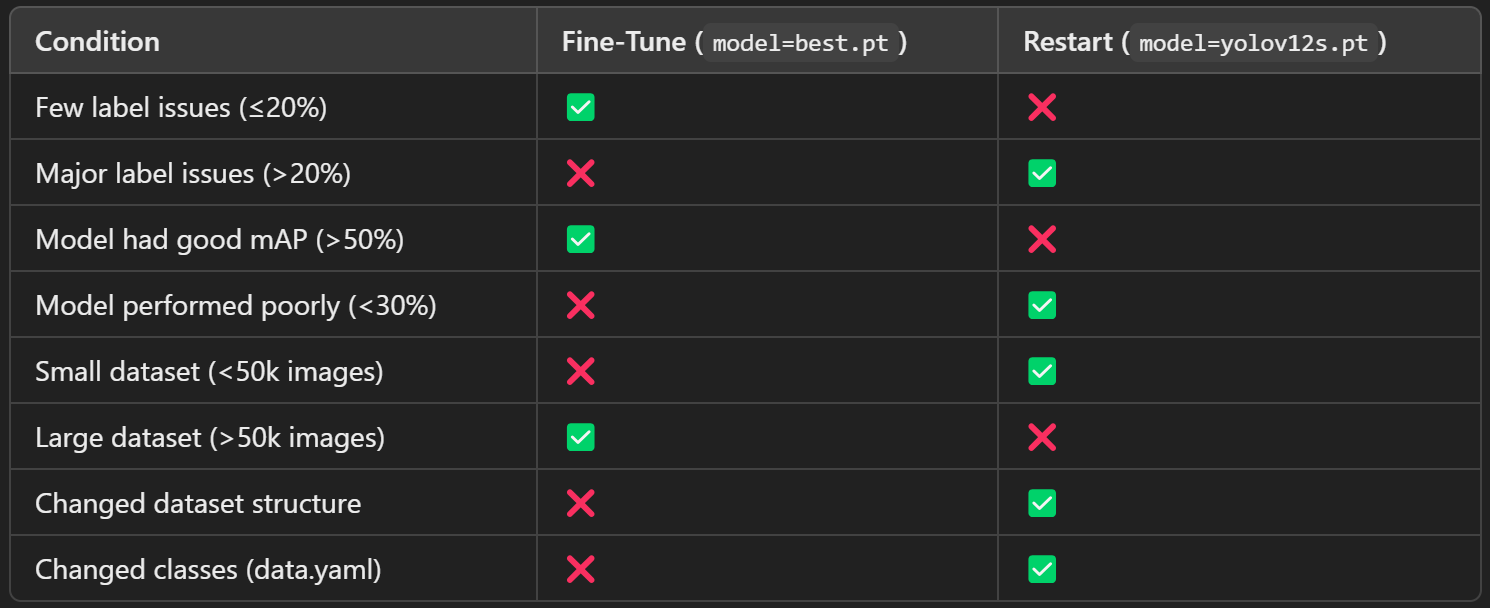


In [17]:
# Load the JSON file
with open(f'train_results_3.json', 'r') as f:
    loaded_dict_1 = json.load(f)

with open(f'train_results_7.json', 'r') as f:
    loaded_dict_3 = json.load(f)

print(loaded_dict_1['overall_results'])
print(loaded_dict_1['classes'])
print(loaded_dict_1['precision'])
print(loaded_dict_3['overall_results'])

{'metrics/precision(B)': 0.8379509409410031, 'metrics/recall(B)': 0.8340697420725605, 'metrics/mAP50(B)': 0.8743221753396418, 'metrics/mAP50-95(B)': 0.6110917759615287, 'fitness': 0.63741481589934}
{'0': 'acm', '1': 'anderson_bridge', '2': 'apple_marina_bay', '3': 'art_sci_museum', '4': 'cavenagh_bridge', '5': 'dal_obelisk', '6': 'esplanade', '7': 'flyer', '8': 'fullerton_hotel', '9': 'helix_bridge', '10': 'jubilee_bridge', '11': 'lv_marina_bay', '12': 'mbs', '13': 'mbs_hotel', '14': 'merlion', '15': 'nat_gallery', '16': 'one_fullerton', '17': 'sa_cathedral', '18': 'sg_river', '19': 'stamford_raffles_statue', '20': 'the_arts_house', '21': 'vic_concert_hall'}
[0.7118643295634446, 0.8262684478319191, 1.0, 1.0, 0.6622281848000042, 0.579223006776451, 0.8974358279147508, 0.9227028985800916, 0.86995199533341, 0.7819657787283687, 0.5748159815557935, 0.9235117451800099, 0.7447514943661874, 1.0, 0.7431257942370612, 0.880558763536011, 0.9028674641736439, 0.9583063862274788, 0.7639862809354335, 1

In [18]:
df_1 = pd.DataFrame({
    "Class": ["all"] + list(loaded_dict_1['classes'].values()),
    "Precision": [loaded_dict_1['overall_results']["metrics/precision(B)"]] + loaded_dict_1['precision'], 
    "Box(R)": [loaded_dict_1['overall_results']["metrics/recall(B)"]] + loaded_dict_1['recall'],
    "mAP50": [loaded_dict_1['overall_results']["metrics/mAP50(B)"]] + loaded_dict_1['ap50'],
    "mAP50-95": [loaded_dict_1['overall_results']["metrics/mAP50-95(B)"]] + loaded_dict_1['ap50_95']
})
df_1

Class  Precision    Box(R)     mAP50  mAP50-95
0                       all   0.837951  0.834070  0.874322  0.611092
1                       acm   0.711864  0.707022  0.716794  0.536198
2           anderson_bridge   0.826268  0.953372  0.961667  0.546000
3          apple_marina_bay   1.000000  0.777579  0.995000  0.744850
4            art_sci_museum   1.000000  0.950996  0.984677  0.740589
5           cavenagh_bridge   0.662228  0.818182  0.822038  0.468312
6               dal_obelisk   0.579223  1.000000  0.995000  0.922212
7                 esplanade   0.897436  0.909091  0.935851  0.590417
8                     flyer   0.922703  0.852975  0.895237  0.512087
9           fullerton_hotel   0.869952  0.911765  0.937943  0.703599
10             helix_bridge   0.781966  0.857143  0.901200  0.474714
11           jubilee_bridge   0.574816  0.521165  0.508647  0.311415
12            lv_marina_bay   0.923512  0.929164  0.957143  0.721648
13                      mbs   0.744751  0.782609  0.772418  0.457074
14                mbs_hotel   1.000000  0.870265  0.968043  0.691026
15                  merlion   0.743126  0.764706  0.779920  0.428547
16              nat_gallery   0.880559  0.776631  0.868323  0.660292
17            one_fullerton   0.902867  1.000000  0.990000  0.608799
18             sa_cathedral   0.958306  0.857143  0.885414  0.693308
19                 sg_river   0.763986  0.789474  0.825798  0.636271
20  stamford_raffles_statue   1.000000  0.886921  0.976111  0.681833
21           the_arts_house   0.804738  0.600000  0.730556  0.648000
22         vic_concert_hall   0.886618  0.833333  0.827308  0.666829

In [19]:
df_3 = pd.DataFrame({
    "Class": ["all"] + list(loaded_dict_3['classes'].values()),
    "Precision": [loaded_dict_3['overall_results']["metrics/precision(B)"]] + loaded_dict_3['precision'], 
    "Box(R)": [loaded_dict_3['overall_results']["metrics/recall(B)"]] + loaded_dict_3['recall'],
    "mAP50": [loaded_dict_3['overall_results']["metrics/mAP50(B)"]] + loaded_dict_3['ap50'],
    "mAP50-95": [loaded_dict_3['overall_results']["metrics/mAP50-95(B)"]] + loaded_dict_3['ap50_95']
})
df_3

Class  Precision    Box(R)     mAP50  mAP50-95
0                       all   0.886111  0.828768  0.875570  0.606921
1                       acm   0.703146  0.714286  0.709413  0.554605
2           anderson_bridge   1.000000  0.948963  0.995000  0.466813
3          apple_marina_bay   0.976821  1.000000  0.995000  0.782104
4            art_sci_museum   1.000000  0.930641  0.993333  0.771576
5           cavenagh_bridge   0.797068  0.818182  0.842786  0.486022
6               dal_obelisk   0.873829  1.000000  0.995000  0.895500
7                 esplanade   0.906421  0.881053  0.898631  0.544966
8                     flyer   0.923429  0.861725  0.904728  0.568378
9           fullerton_hotel   0.885611  0.911765  0.926982  0.694255
10             helix_bridge   1.000000  0.844088  0.928493  0.442425
11           jubilee_bridge   0.719402  0.538462  0.653611  0.309486
12            lv_marina_bay   0.923884  0.934383  0.973571  0.694678
13                      mbs   0.861994  0.815088  0.752068  0.417532
14                mbs_hotel   0.974306  0.840000  0.929722  0.661158
15                  merlion   0.787853  0.655865  0.735288  0.416583
16              nat_gallery   0.877563  0.755191  0.808701  0.653746
17            one_fullerton   0.888337  0.923077  0.960837  0.564288
18             sa_cathedral   0.984805  0.857143  0.871962  0.712303
19                 sg_river   0.835800  0.763158  0.824804  0.627809
20  stamford_raffles_statue   0.944693  0.813572  0.906502  0.673216
21           the_arts_house   0.721116  0.600000  0.769286  0.700357
22         vic_concert_hall   0.908356  0.826255  0.886820  0.714470

In [86]:
model.args

{'task': 'detect',
 'mode': 'train',
 'model': 'yolo12s.pt',
 'data': 'data.yaml',
 'epochs': 500,
 'time': None,
 'patience': 100,
 'batch': 32,
 'imgsz': 640,
 'save': True,
 'save_period': -1,
 'cache': False,
 'device': None,
 'workers': 8,
 'project': None,
 'name': 'train4',
 'exist_ok': False,
 'pretrained': True,
 'optimizer': 'auto',
 'verbose': True,
 'seed': 0,
 'deterministic': True,
 'single_cls': False,
 'rect': False,
 'cos_lr': False,
 'close_mosaic': 10,
 'resume': False,
 'amp': True,
 'fraction': 1.0,
 'profile': False,
 'freeze': None,
 'multi_scale': False,
 'overlap_mask': True,
 'mask_ratio': 4,
 'dropout': 0.0,
 'val': True,
 'split': 'val',
 'save_json': False,
 'save_hybrid': False,
 'conf': None,
 'iou': 0.7,
 'max_det': 300,
 'half': False,
 'dnn': False,
 'plots': True,
 'source': None,
 'vid_stride': 1,
 'stream_buffer': False,
 'visualize': False,
 'augment': False,
 'agnostic_nms': False,
 'classes': None,
 'retina_masks': False,
 'embed': None,
 'show':

In [ ]:
Image(filename=f'runs/detect/train/confusion_matrix.png', width=800)

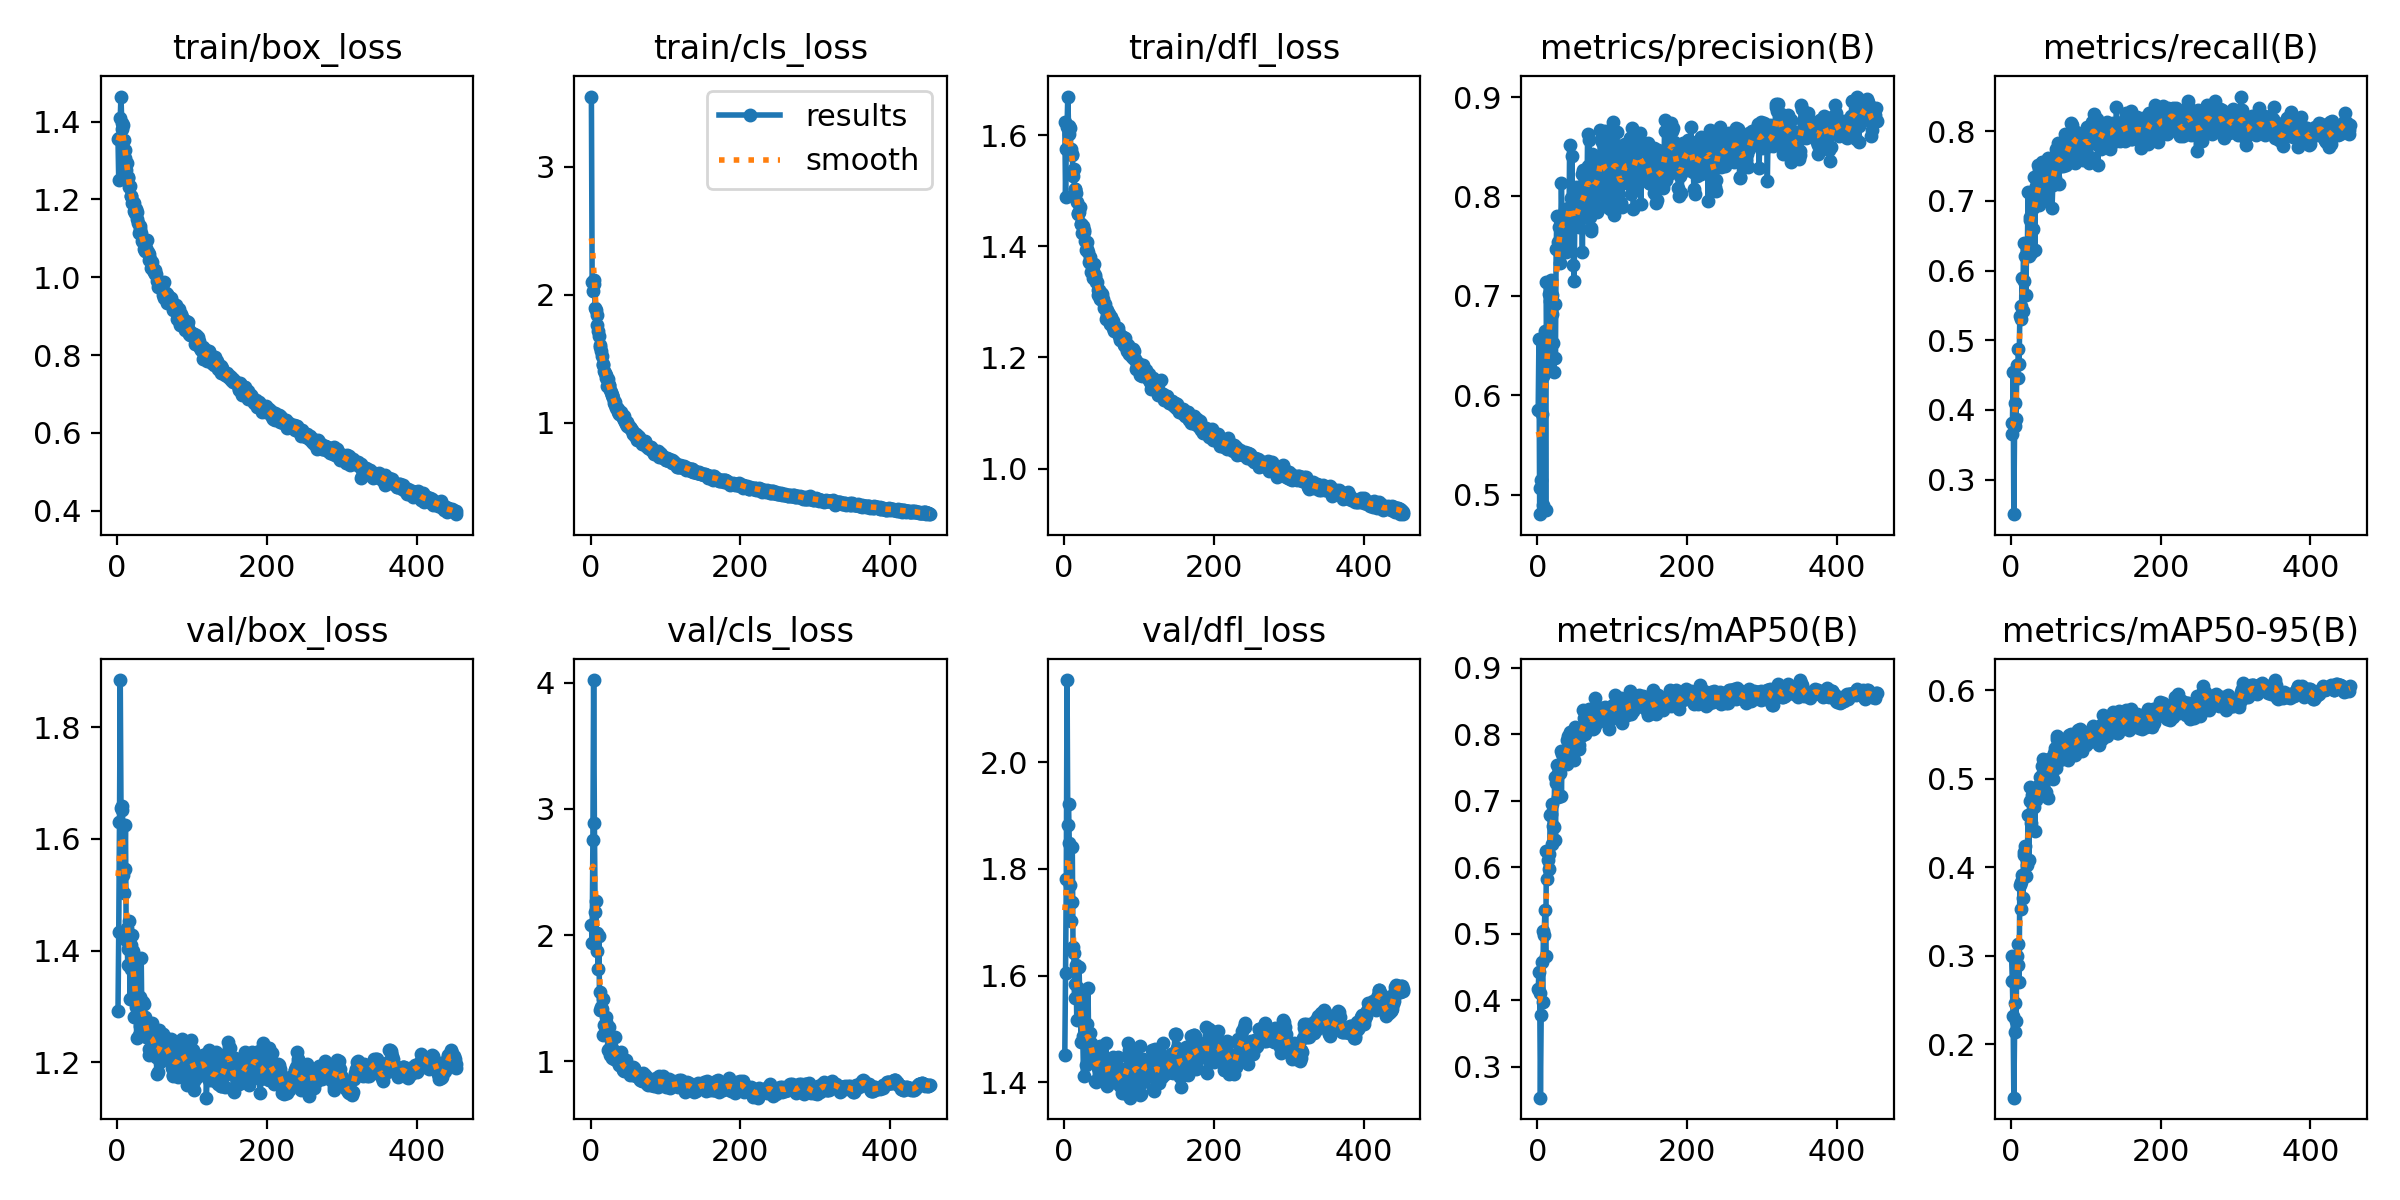

In [3]:
Image(filename=f'runs/detect/train3/results.png', width=800)

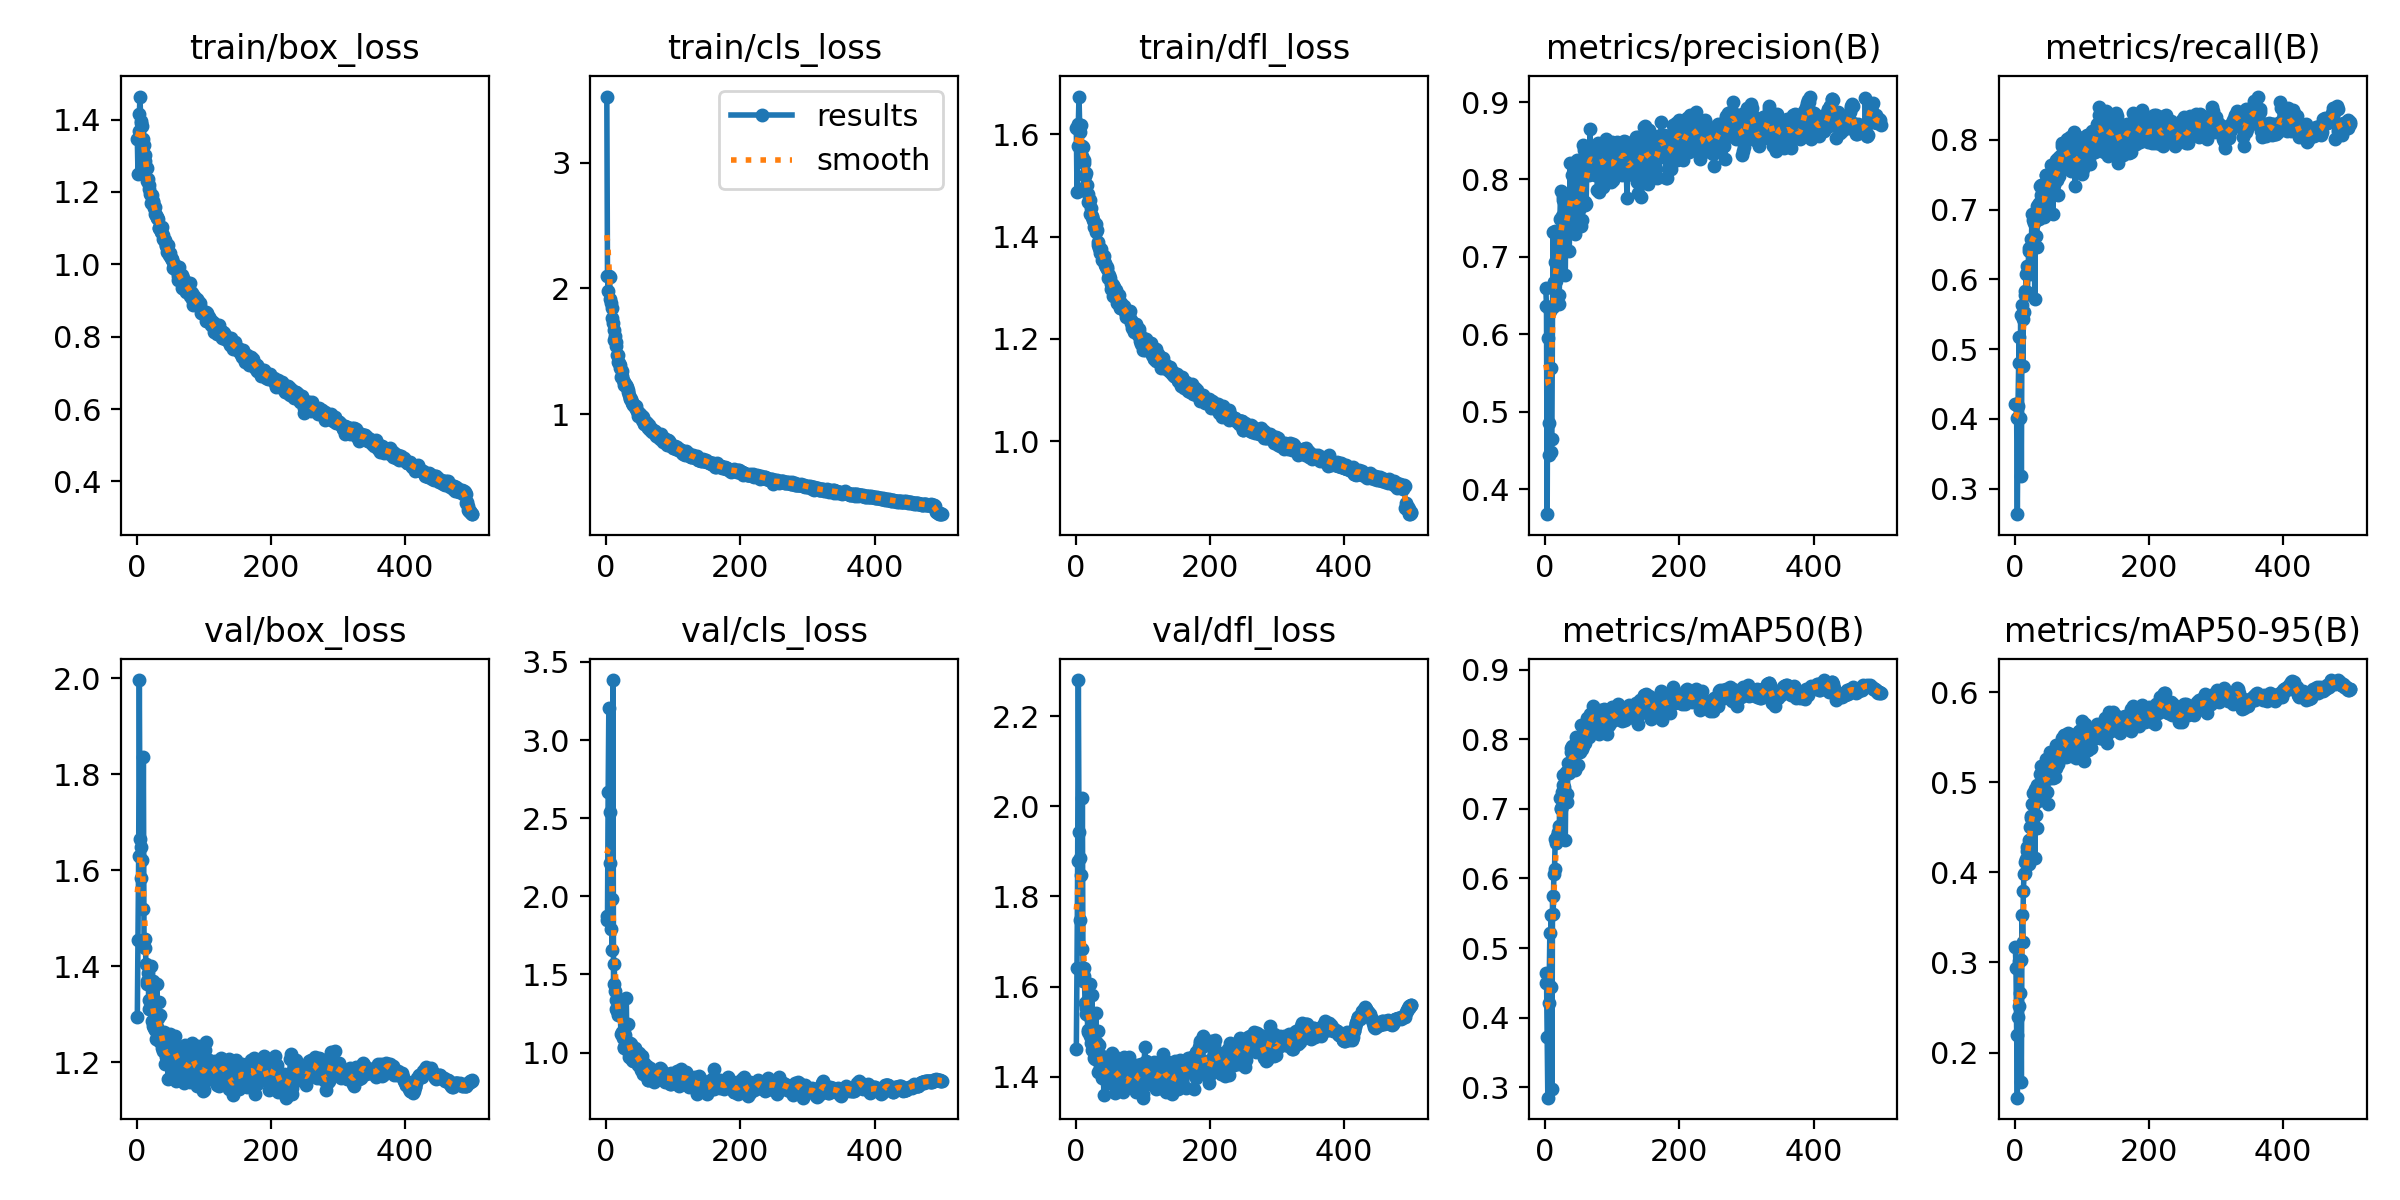

In [10]:
Image(filename=f'runs/detect/train5/results.png', width=800)

In [ ]:
Image(filename=f'runs/detect/train/val_batch1_labels.jpg', width=800)

In [22]:
model_3 = YOLO("runs/detect/train3/weights/best.pt")
model_5 = YOLO("runs/detect/train5/weights/best.pt")
model_6 = YOLO("runs/detect/train6/weights/best.pt")
model_8 = YOLO("runs/detect/train8/weights/best.pt")
model_9 = YOLO("runs/detect/train9/weights/best.pt")

# model_3("sample/online_test_3.jpg")[0].show()
# model_5("sample/online_test_2.jpg")[0].show()
# model_6("sample/online_test_2.jpg")[0].show()
# model_8("sample/online_test_2.jpg")[0].show()
# model_9("sample/online_test_2.jpg")[0].show()



image 1/1 C:\Users\ngyin\Documents\NUS Stackables\SP 1\Practice Module (landmark recognition)\data\sample\online_test_3.jpg: 384x640 (no detections), 37.5ms
Speed: 2.9ms preprocess, 37.5ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)
